In [2257]:
COLLABORATORS = "Hussein Eisa, Reshma Vangala, Gabriel Moffat (Didi)"

In [2258]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Collection & Cleaning

In [2259]:
# Loading the Excel file into a DataFrame
df = pd.read_excel("new_sif_data_table_2023_24prelim_en_august2025.xlsx")

In [2260]:
# Getting the number of rows and columns in the DataFrame
df.shape

(4936, 49)

In [2261]:
pd.set_option('display.max_columns', None) #to show all columns
df.head(2) # Displaying the first 2 rows of the DataFrame

Board Number  Board Name              Board Type School Number  \
0       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        902344   
1       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        019186   

                                    School Name School Type  \
0  Algoma Education Connection Secondary School      Public   
1                     Anna McCrea Public School      Public   

  School Special Condition Code School Level School Language Grade Range  \
0                   Alternative    Secondary         English        9-12   
1                Not applicable   Elementary         English        JK-8   

  Building Suite P.O. Box            Street               Municipality  \
0            NaN      NaN  550 Northern Ave  Sault Ste. Marie, City of   
1            NaN      NaN       250 Mark St  Sault Ste. Marie, City of   

              City Province Postal Code  Phone Number    Fax Number  \
0  Sault Ste Marie  Ontario      P6B4J4  705-945-7194  705-945-7173   
1  Sault Ste Marie  Ontario      P6A3M7  705-945-7106  705-945-7221   

                                      School Website          Board Website  \
0                              http://www.adsb.on.ca  http://www.adsb.on.ca   
1  http://www.adsb.on.ca/sites/schools/amc/defaul...  http://www.adsb.on.ca   

  Enrolment  Latitude Longitude  \
0       170  46.53477  -84.3077   
1       280  46.50593  -84.2873   

  Percentage of Students Whose First Language Is Not English  \
0                                                  0           
1                                               0.05           

  Percentage of Students Whose First Language Is Not French  \
0                                                  1          
1                                                  1          

  Percentage of Students Who Are New to Canada from a Non-English Speaking Country  \
0                                                  0                                 
1                                                  0                                 

  Percentage of Students Who Are New to Canada from a Non-French Speaking Country  \
0                                                  0                                
1                                                  0                                

  Percentage of Students Receiving Special Education Services  \
0                                                0.4            
1                                                0.2            

  Percentage of Students Identified as Gifted  \
0                                           0   
1                                           0   

  Percentage of Grade 3 Students Achieving the Provincial Standard in Reading  \
0                                                NaN                            
1                                               0.73                            

   Change in Grade 3 Reading Achievement Over Three Years  \
0                                                NaN        
1                                              -16.0        

  Percentage of Grade 3 Students Achieving the Provincial Standard in Writing  \
0                                                NaN                            
1                                               0.77                            

   Change in Grade 3 Writing Achievement Over Three Years  \
0                                                NaN        
1                                               -8.0        

  Percentage of Grade 3 Students Achieving the Provincial Standard in Mathematics  \
0                                                NaN                                
1                                               0.67                                

   Change in Grade 3 Mathematics Achievement Over Three Years  \
0                                                NaN            
1                                              -18.0            

  Percentage of Grade 6 Students Achieving the 

In [2262]:
## Displaying summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4936 entries, 0 to 4935
Data columns (total 49 columns):
 #   Column                                                                            Non-Null Count  Dtype         
---  ------                                                                            --------------  -----         
 0   Board Number                                                                      4936 non-null   object        
 1   Board Name                                                                        4936 non-null   object        
 2   Board Type                                                                        4936 non-null   object        
 3   School Number                                                                     4936 non-null   object        
 4   School Name                                                                       4936 non-null   object        
 5   School Type                                                   

* Dtype conversion needed
* Missing values

#### First, we are going to start with cleaning of data:

In [2263]:
df.columns #for renaming of columns

Index(['Board Number', 'Board Name', 'Board Type', 'School Number',
       'School Name', 'School Type', 'School Special Condition Code',
       'School Level', 'School Language', 'Grade Range', 'Building Suite',
       'P.O. Box', 'Street', 'Municipality', 'City', 'Province', 'Postal Code',
       'Phone Number', 'Fax Number', 'School Website', 'Board Website',
       'Enrolment', 'Latitude', 'Longitude',
       'Percentage of Students Whose First Language Is Not English',
       'Percentage of Students Whose First Language Is Not French',
       'Percentage of Students Who Are New to Canada from a Non-English Speaking Country',
       'Percentage of Students Who Are New to Canada from a Non-French Speaking Country',
       'Percentage of Students Receiving Special Education Services',
       'Percentage of Students Identified as Gifted',
       'Percentage of Grade 3 Students Achieving the Provincial Standard in Reading',
       'Change in Grade 3 Reading Achievement Over Three Years

In [2264]:
#renaming columns to format suitable for analysis 
df.rename(columns = {'Board Number': 'Board_Number', 'Board Name': 'Board_Name', 'Board Type': 'Board_Type', 
                     'School Number': 'School_Number', 'School Name': 'School_Name', 'School Type': 'School_Type', 
                     'School Special Condition Code': 'School_Spec_Cond_Code', 'School Level': 'School_Level', 
                     'School Language': 'School_Lang', 'Grade Range': 'Grade_Range', 'Building Suite': 'Building_Suite', 
                     'P.O. Box': 'PO_Box', 'Postal Code': 'Postal_Code', 'Phone Number': 'Phone_Number', 'Fax Number': 'Fax_Number', 
                     'School Website': 'School_Website', 'Board Website': 'Board_Website', 
                     'Percentage of Students Whose First Language Is Not English': '%Stud_FirstLang_Not_Eng',
                     'Percentage of Students Whose First Language Is Not French':'%Stud_FirstLang_Not_Fr',
                     'Percentage of Students Who Are New to Canada from a Non-English Speaking Country':'%Stud_New_Canada_Non-Eng_Cntry',
                     'Percentage of Students Who Are New to Canada from a Non-French Speaking Country':'%Stud_New_Canada_Non-Fr_Cntry',
                     'Percentage of Students Receiving Special Education Services':'%Stud_Special_Ed',
                     'Percentage of Students Identified as Gifted':'%Stud_Gifted',
                     'Percentage of Grade 3 Students Achieving the Provincial Standard in Reading':'%Grade3_Reading',
                     'Change in Grade 3 Reading Achievement Over Three Years':'Change_G3_Read_3Yr',
                     'Percentage of Grade 3 Students Achieving the Provincial Standard in Writing':'%Grade3_Writing',
                     'Change in Grade 3 Writing Achievement Over Three Years':'Change_G3_Write_3Yr',
                     'Percentage of Grade 3 Students Achieving the Provincial Standard in Mathematics':'%Grade3_Math',
                     'Change in Grade 3 Mathematics Achievement Over Three Years':'Change_G3_Math_3Yr',
                     'Percentage of Grade 6 Students Achieving the Provincial Standard in Reading':'%Grade6_Reading',
                     'Change in Grade 6 Reading Achievement Over Three Years':'Change_G6_Read_3Yr',
                     'Percentage of Grade 6 Students Achieving the Provincial Standard in Writing':'%Grade6_Writing',
                     'Change in Grade 6 Writing Achievement Over Three Years':'Change_G6_Write_3Yr',
                     'Percentage of Grade 6 Students Achieving the Provincial Standard in Mathematics':'%Grade6_Math',
                     'Change in Grade 6 Mathematics Achievement Over Three Years':'Change_G6_Math_3Yr',
                     'Percentage of Grade 9 Students Achieving the Provincial Standard in Mathematics':'%Grade9_Math',
                     'Change in Grade 9 Mathematics Achievement Over Three Years':'Change_G9_Math_3Yr',
                     'Percentage of Students That Passed the Grade 10 OSSLT on Their First Attempt':'%Grade10_OSSLT',
                     'Change in Grade 10 OSSLT Literacy Achievement Over Three Years':'Change_G10_OSSLT_3Yr',
                     'Percentage of School-Aged Children Who Live in Low-Income Households':'%Child_Livein_LowInc_HH',
                     'Percentage of Students Whose Parents Have No Degree, Diploma or Certificate':'%Stud_Par_NoDegDipCert',
                     'Extract Date':'Extract_Date'}, inplace = True)

In [2265]:
#checking renaming of columns
df.head(2)

Board_Number  Board_Name              Board_Type School_Number  \
0       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        902344   
1       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        019186   

                                    School_Name School_Type  \
0  Algoma Education Connection Secondary School      Public   
1                     Anna McCrea Public School      Public   

  School_Spec_Cond_Code School_Level School_Lang Grade_Range Building_Suite  \
0           Alternative    Secondary     English        9-12            NaN   
1        Not applicable   Elementary     English        JK-8            NaN   

  PO_Box            Street               Municipality             City  \
0    NaN  550 Northern Ave  Sault Ste. Marie, City of  Sault Ste Marie   
1    NaN       250 Mark St  Sault Ste. Marie, City of  Sault Ste Marie   

  Province Postal_Code  Phone_Number    Fax_Number  \
0  Ontario      P6B4J4  705-945-7194  705-945-7173   
1  Ontario      P6A3M7  705-945-7106  705-945-7221   

                                      School_Website          Board_Website  \
0                              http://www.adsb.on.ca  http://www.adsb.on.ca   
1  http://www.adsb.on.ca/sites/schools/amc/defaul...  http://www.adsb.on.ca   

  Enrolment  Latitude Longitude %Stud_FirstLang_Not_Eng  \
0       170  46.53477  -84.3077                       0   
1       280  46.50593  -84.2873                    0.05   

  %Stud_FirstLang_Not_Fr %Stud_New_Canada_Non-Eng_Cntry  \
0                      1                              0   
1                      1                              0   

  %Stud_New_Canada_Non-Fr_Cntry %Stud_Special_Ed %Stud_Gifted %Grade3_Reading  \
0                             0              0.4            0             NaN   
1                             0              0.2            0            0.73   

   Change_G3_Read_3Yr %Grade3_Writing  Change_G3_Write_3Yr %Grade3_Math  \
0                 NaN             NaN                  NaN          NaN   
1               -16.0            0.77                 -8.0         0.67   

   Change_G3_Math_3Yr %Grade6_Reading  Change_G6_Read_3Yr %Grade6_Writing  \
0                 NaN             NaN                 NaN             NaN   
1               -18.0            0.92                19.0               1   

   Change_G6_Write_3Yr %Grade6_Math  Change_G6_Math_3Yr %Grade9_Math  \
0                  NaN          NaN                 NaN          N/D   
1                 23.0         0.62                12.0          NaN   

   Change_G9_Math_3Yr %Grade10_OSSLT  Change_G10_OSSLT_3Yr  \
0                 NaN            N/R                   NaN   
1                 NaN            NaN                   NaN   

  %Child_Livein_LowInc_HH %Stud_Par_NoDegDipCert Extract_Date  
0                    0.15                   0.05   2025-08-01  
1                       0                      0   2025-08-01

#### We are going to look at .unique() for each column to see if any cleaning might be needed

In [2266]:
#doing for loop to go through columns and get unique values at once 
for col in df.columns: 
    print(f"--- {col} ---")
    print(df[col].unique()) 
    print("\n")

--- Board_Number ---
['B28010' 'B67202' 'B66010' 'B80012' 'B66001' 'B67164' 'B67008' 'B67172'
 'B80055' 'B66303' 'B67318' 'B28118' 'B28100' 'B29114' 'B67326' 'B29130'
 'B29106' 'B67334' 'B29122' 'B67300' 'B66311' 'B66150' 'B28002' 'B67083'
 'B67105' 'B66060' 'B66168' 'B80020' 'B66028' 'B67113' 'B66133' 'B67121'
 'B66141' 'B66222' 'B67016' 'B29025' 'B15148' 'B80047' 'B66079' 'B28045'
 'B29050' 'B80039' 'B28061' 'B66036' 'B66206' 'B67032' 'B15199' 'B15202'
 'B28037' 'B67156' 'B80004' 'B29017' 'B29009' 'B29041' 'B67180' 'B66184'
 'B66125' 'B79910' 'B67067' 'B76686' 'B28029' 'B28053' 'B67199' 'B66214'
 'B66109' 'B67091' 'B67040' 'B29033' 'B29076' 'B28070' 'B66044' 'B29068'
 'B67059' 'B66052' 'B66087' 'B66192' 'B66117' 'B67148' 'B66176' 'B67130'
 'B67024' 'B67075' 'B66095']


--- Board_Name ---
['Algoma DSB' 'Algonquin and Lakeshore CDSB' 'Avon Maitland DSB'
 'Bloorview SA' 'Bluewater DSB' 'Brant Haldimand Norfolk CDSB'
 'Bruce-Grey CDSB' 'CDSB of Eastern Ontario' 'CHEO SA' 'CS Viamonde'
 '

#### We are going to start with working on the Enrolment column

In [2267]:
#replacing SP in Enrolment with values between 1 and 49 based on glossary (https://www.app.edu.gov.on.ca/eng/sift/glossary.asp)
df['Enrolment'] = df['Enrolment'].apply(lambda x: np.random.randint(1, 50) if x == 'SP' else x) 

In [2268]:
df['Enrolment'].unique() #checking that SP no longer present

array(['170', '280', '190', '445', '180', '370', '165', '70', '100',
       '305', '240', '85', '365', '160', '535', '315', '270', '205', 31,
       '50', '210', '975', '260', '230', 41, '125', '245', '290', '135',
       '935', 19, '130', '155', '525', '65', '355', '320', '1255', '140',
       '345', '465', '120', '220', '570', '845', '265', 32, '385', '435',
       '325', 23, '350', '540', 48, '250', '410', '425', '785', nan,
       '275', 24, '455', '485', '310', '500', '150', '340', '395', '145',
       '400', '235', '405', '925', '450', '415', '295', '185', '740',
       '510', '430', '1385', '490', '615', '60', '335', '625', '95',
       '200', '790', '770', '705', '480', '495', '300', '640', '585',
       '175', '1225', '635', '360', 16, '1805', '225', '1015', '330',
       '75', '1310', '655', '590', '380', '90', '560', '715', '255',
       '995', '215', '515', '375', '760', '470', 6, '115', 39, 4, 28,
       '105', '55', '80', 21, 25, '520', '110', 42, '195', 18, '550', 35,
  

#### Now, we are going to check SP, NA, N/R, N/D, Null for columns 24 - 47. We will remove rows that have SP, NA, N/R, N/D, Null for those columns based on information not given for various reasons (https://www.app.edu.gov.on.ca/eng/sift/glossary.asp) and we can't use it for analysis

In [2269]:
df.columns #to get the column names

Index(['Board_Number', 'Board_Name', 'Board_Type', 'School_Number',
       'School_Name', 'School_Type', 'School_Spec_Cond_Code', 'School_Level',
       'School_Lang', 'Grade_Range', 'Building_Suite', 'PO_Box', 'Street',
       'Municipality', 'City', 'Province', 'Postal_Code', 'Phone_Number',
       'Fax_Number', 'School_Website', 'Board_Website', 'Enrolment',
       'Latitude', 'Longitude', '%Stud_FirstLang_Not_Eng',
       '%Stud_FirstLang_Not_Fr', '%Stud_New_Canada_Non-Eng_Cntry',
       '%Stud_New_Canada_Non-Fr_Cntry', '%Stud_Special_Ed', '%Stud_Gifted',
       '%Grade3_Reading', 'Change_G3_Read_3Yr', '%Grade3_Writing',
       'Change_G3_Write_3Yr', '%Grade3_Math', 'Change_G3_Math_3Yr',
       '%Grade6_Reading', 'Change_G6_Read_3Yr', '%Grade6_Writing',
       'Change_G6_Write_3Yr', '%Grade6_Math', 'Change_G6_Math_3Yr',
       '%Grade9_Math', 'Change_G9_Math_3Yr', '%Grade10_OSSLT',
       'Change_G10_OSSLT_3Yr', '%Child_Livein_LowInc_HH',
       '%Stud_Par_NoDegDipCert', 'Extract_D

In [2270]:
cols = ['%Stud_FirstLang_Not_Eng',
   '%Stud_FirstLang_Not_Fr',
       '%Stud_New_Canada_Non-Eng_Cntry',
       '%Stud_New_Canada_Non-Fr_Cntry', 
        '%Stud_Special_Ed', 
        '%Stud_Gifted',
       '%Grade3_Reading', 
        'Change_G3_Read_3Yr', 
        '%Grade3_Writing',
       'Change_G3_Write_3Yr', 
        '%Grade3_Math',
        'Change_G3_Math_3Yr',
       '%Grade6_Reading',
        'Change_G6_Read_3Yr', 
        '%Grade6_Writing',
       'Change_G6_Write_3Yr', 
        '%Grade6_Math',
        'Change_G6_Math_3Yr',
       '%Grade9_Math', 
        'Change_G9_Math_3Yr',
        '%Grade10_OSSLT',
       'Change_G10_OSSLT_3Yr',
        '%Child_Livein_LowInc_HH',
       '%Stud_Par_NoDegDipCert'
] #selection of columns need

#getting rows where SP,NA,N/D,N/R,null values exist in achievement columns
selection1 = (df[cols].isin(['SP', 'NA', 'N/D', 'N/R']) | df[cols].isna()).all(axis=1) 

bad_rows_df = df[selection1] #data frame
print(bad_rows_df.shape)
bad_rows_df.head(20) #for output

(229, 49)


Board_Number                    Board_Name               Board_Type  \
20        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
28        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
38        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
67        B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
71        B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
75        B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
83        B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
87        B66010             Avon Maitland DSB   Pub Dist Sch Brd (E/F)   
153       B66001                 Bluewater DSB   Pub Dist Sch Brd (E/F)   
179       B66001                 Bluewater DSB   Pub Dist Sch Brd (E/F)   
194       B67164  Brant Haldimand Norfolk CDSB  Cath Dist Sch Brd (E/F)   
206       B67164  Brant Haldimand Norfolk CDSB  Cath Dist Sch Brd (E/F)   
268       B67172       CDSB of Eastern Ontario  Cath Dist Sch Brd (E/F)   
273       B67172       CDSB of Eastern Ontario  Cath Dist Sch Brd (E/F)   
275       B67172       CDSB of Eastern Ontario  Cath Dist Sch Brd (E/F)   
279       B80055                       CHEO SA      Provincial/Hospital   
309       B66303                   CS Viamonde   Pub Dist Sch Brd (E/F)   
315       B66303                   CS Viamonde   Pub Dist Sch Brd (E/F)   
364       B67318       CS catholique MonAvenir  Cath Dist Sch Brd (E/F)   
378       B67318       CS catholique MonAvenir  Cath Dist Sch Brd (E/F)   

    School_Number                                        School_Name  \
20         917370                             Hornepayne High School   
28         891150            North Shore Adolescent Education School   
38         672610               Superior Heights Community Education   
67         799556                                     St James Major   
71         824330                 St Martin of Tours Catholic School   
75         764248                         St Patrick Catholic School   
83         834301  St. Genevieve Catholic School/Ecole Catholique...   
87         893048           Avon Maitland District E-learning Centre   
153        633884        Highpoint Senior School (Elementary) School   
179        529826                           St Edmunds Public School   
194        740848            Pope Francis Catholic Elementary School   
206        706139                  St. Mary Catholic Learning Centre   
268        745698    St. James Catholic Education Centre High School   
273        818968                           St. Luke Catholic School   
275        765428             St. Matthew Catholic Elementary School   
279        428833                                        CHEO School   
309        532816                  École élémentaire Franco-Jeunesse   
315        156264                 École élémentaire Georges-P-Vanier   
364        759085                       ÉIC de l'Ascension - Vaughan   
378        867769                       ÉSC de l'Ascension - Vaughan   

    School_Type School_Spec_Cond_Code School_Level School_Lang Grade_Range  \
20       Public        Not applicable    Secondary     English        9-12   
28       Public        Not applicable    Secondary     English        9-12   
38       Public        Not applicable   Elementary     English         7-8   
67     Catholic        Not applicable   Elementary     English        JK-8   
71     Catholic        Not applicable   Elementary     English        JK-8   
75     Catholic        Not applicable   Elementary     English        JK-8   
83     Catholic        Not applicable   Elementary     English        JK-8   
87       Public        Not applicable    Secondary     English        9-12   
153      Public        Not applicable   Elementary     English         7-8   
179      Public        Not applicable   Elementary     English        JK-3   
194    Catholic        Not applicable   Elementary     En

In [2271]:
df = df[~selection1].copy() #removing rows above

In [2272]:
df.shape #checking. rows should now be 4707

(4707, 49)

In [2273]:
df.head(20) #to see df again

Board_Number  Board_Name              Board_Type School_Number  \
0        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        902344   
1        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        019186   
2        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        043362   
3        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        054542   
4        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        490822   
5        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        137967   
6        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        285552   
7        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        891347   
8        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        093548   
9        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        900869   
10       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        101214   
11       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        161276   
12       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        165042   
13       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        293055   
14       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        908010   
15       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        186783   
16       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        202614   
17       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        227331   
18       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        230561   
19       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        237191   

                                     School_Name School_Type  \
0   Algoma Education Connection Secondary School      Public   
1                      Anna McCrea Public School      Public   
2                   Ben R McMullin Public School      Public   
3                      Blind River Public School      Public   
4          Boreal French Immersion Public School      Public   
5             Central Algoma Intermediate School      Public   
6                   Central Algoma Public School      Public   
7                Central Algoma Secondary School      Public   
8                   Central Avenue Public School      Public   
9                           Chapleau High School      Public   
10                        Chapleau Public School      Public   
11                       East View Public School      Public   
12                Echo Bay Central Public School      Public   
13               Elliot Lake Intermediate School      Public   
14                  Elliot Lake Secondary School      Public   
15                      Esten Park Public School      Public   
16               Francis H Clergue Public School      Public   
17                      Grand View Public School      Public   
18                       Greenwood Public School      Public   
19                     H M Robbins Public School      Public   

   School_Spec_Cond_Code School_Level School_Lang Grade_Range Building_Suite  \
0            Alternative    Secondary     English        9-12            NaN   
1         Not applicable   Elementary     English        JK-8            NaN   
2         Not applicable   Elementary     English        JK-8            NaN   
3         Not applicable   Elementary     English        JK-8            NaN   
4         Not applicable   Elementary     English        JK-8            NaN   
5         Not applicable   Elementary     English         7-8            NaN   
6         Not applicable   Elementary     English        JK-6            NaN   
7         Not applicable    Secondary     English        9-12            NaN   
8         Not applicable   Elementary     English        JK-8            NaN   
9         Not applicable    Secondary     English        9-12            NaN   
10        Not applicable   Elementary     English        JK-8            NaN   
11        Not applicable   Elementary     English        JK-8            NaN   
12        Not applicable   Elementary     English        JK-6            NaN   
13        Not applicable   Elementary     English         7-8            NaN   
14      

#### Based on the above, I see that some columns have values as percentages as opposed to decimals. I'm going to fix this

In [2274]:
df.columns #to get column names

Index(['Board_Number', 'Board_Name', 'Board_Type', 'School_Number',
       'School_Name', 'School_Type', 'School_Spec_Cond_Code', 'School_Level',
       'School_Lang', 'Grade_Range', 'Building_Suite', 'PO_Box', 'Street',
       'Municipality', 'City', 'Province', 'Postal_Code', 'Phone_Number',
       'Fax_Number', 'School_Website', 'Board_Website', 'Enrolment',
       'Latitude', 'Longitude', '%Stud_FirstLang_Not_Eng',
       '%Stud_FirstLang_Not_Fr', '%Stud_New_Canada_Non-Eng_Cntry',
       '%Stud_New_Canada_Non-Fr_Cntry', '%Stud_Special_Ed', '%Stud_Gifted',
       '%Grade3_Reading', 'Change_G3_Read_3Yr', '%Grade3_Writing',
       'Change_G3_Write_3Yr', '%Grade3_Math', 'Change_G3_Math_3Yr',
       '%Grade6_Reading', 'Change_G6_Read_3Yr', '%Grade6_Writing',
       'Change_G6_Write_3Yr', '%Grade6_Math', 'Change_G6_Math_3Yr',
       '%Grade9_Math', 'Change_G9_Math_3Yr', '%Grade10_OSSLT',
       'Change_G10_OSSLT_3Yr', '%Child_Livein_LowInc_HH',
       '%Stud_Par_NoDegDipCert', 'Extract_D

In [2275]:
cols_to_fix = [
       '%Stud_FirstLang_Not_Eng',
       '%Stud_FirstLang_Not_Fr', 
       '%Stud_New_Canada_Non-Eng_Cntry',
       '%Stud_New_Canada_Non-Fr_Cntry', 
       '%Stud_Special_Ed', 
       '%Stud_Gifted',
       '%Grade3_Reading',
       '%Grade3_Writing',
       '%Grade3_Math',
       '%Grade6_Reading',
       '%Grade6_Writing',
       '%Grade6_Math',
       '%Grade9_Math',
       '%Grade10_OSSLT',
       '%Child_Livein_LowInc_HH',
       '%Stud_Par_NoDegDipCert',
]

#function to change percentages to decimals 
def percent_fix(val): 
    if pd.isna(val):
        return np.nan
    if isinstance(val, str) and val.endswith('%'):
        return float(val.strip('%')) / 100
    if isinstance(val, str):
        try:
            num = float(val)
            if num > 1:
                return num / 100
            return num
        except ValueError:
            return val 
    else:
        return val

#fixing columns
for col in cols_to_fix:
    df[col] = df[col].apply(percent_fix)

In [2276]:
df.head(20) #to see if it worked

Board_Number  Board_Name              Board_Type School_Number  \
0        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        902344   
1        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        019186   
2        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        043362   
3        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        054542   
4        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        490822   
5        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        137967   
6        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        285552   
7        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        891347   
8        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        093548   
9        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        900869   
10       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        101214   
11       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        161276   
12       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        165042   
13       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        293055   
14       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        908010   
15       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        186783   
16       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        202614   
17       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        227331   
18       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        230561   
19       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        237191   

                                     School_Name School_Type  \
0   Algoma Education Connection Secondary School      Public   
1                      Anna McCrea Public School      Public   
2                   Ben R McMullin Public School      Public   
3                      Blind River Public School      Public   
4          Boreal French Immersion Public School      Public   
5             Central Algoma Intermediate School      Public   
6                   Central Algoma Public School      Public   
7                Central Algoma Secondary School      Public   
8                   Central Avenue Public School      Public   
9                           Chapleau High School      Public   
10                        Chapleau Public School      Public   
11                       East View Public School      Public   
12                Echo Bay Central Public School      Public   
13               Elliot Lake Intermediate School      Public   
14                  Elliot Lake Secondary School      Public   
15                      Esten Park Public School      Public   
16               Francis H Clergue Public School      Public   
17                      Grand View Public School      Public   
18                       Greenwood Public School      Public   
19                     H M Robbins Public School      Public   

   School_Spec_Cond_Code School_Level School_Lang Grade_Range Building_Suite  \
0            Alternative    Secondary     English        9-12            NaN   
1         Not applicable   Elementary     English        JK-8            NaN   
2         Not applicable   Elementary     English        JK-8            NaN   
3         Not applicable   Elementary     English        JK-8            NaN   
4         Not applicable   Elementary     English        JK-8            NaN   
5         Not applicable   Elementary     English         7-8            NaN   
6         Not applicable   Elementary     English        JK-6            NaN   
7         Not applicable    Secondary     English        9-12            NaN   
8         Not applicable   Elementary     English        JK-8            NaN   
9         Not applicable    Secondary     English        9-12            NaN   
10        Not applicable   Elementary     English        JK-8            NaN   
11        Not applicable   Elementary     English        JK-8            NaN   
12        Not applicable   Elementary     English        JK-6            NaN   
13        Not applicable   Elementary     English         7-8            NaN   
14      

#### Now, we are going to move on to dtype conversion

In [2277]:
# Checking info for a subset of columns to inspect data types and identify if dtype conversion is needed.
df[['Board_Number', 'Board_Name', 'Board_Type', 'School_Number',
       'School_Name', 'School_Type', 'School_Spec_Cond_Code',
       'School_Level', 'School_Lang', 'Grade_Range', 'Building_Suite',
       'PO_Box', 'Street', 'Municipality', 'City', 'Province', 'Postal_Code']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 4707 entries, 0 to 4935
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Board_Number           4707 non-null   object
 1   Board_Name             4707 non-null   object
 2   Board_Type             4707 non-null   object
 3   School_Number          4707 non-null   object
 4   School_Name            4707 non-null   object
 5   School_Type            4707 non-null   object
 6   School_Spec_Cond_Code  4707 non-null   object
 7   School_Level           4707 non-null   object
 8   School_Lang            4707 non-null   object
 9   Grade_Range            4707 non-null   object
 10  Building_Suite         19 non-null     object
 11  PO_Box                 96 non-null     object
 12  Street                 4707 non-null   object
 13  Municipality           4707 non-null   object
 14  City                   4707 non-null   object
 15  Province               470

In [2278]:
df[['Board_Number', 'Board_Name', 'Board_Type', 'School_Number',
       'School_Name', 'School_Type', 'School_Spec_Cond_Code',
       'School_Level', 'School_Lang', 'Grade_Range', 'Building_Suite',
       'PO_Box', 'Street', 'Municipality', 'City', 'Province', 'Postal_Code']].head(2)

Board_Number  Board_Name              Board_Type School_Number  \
0       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        902344   
1       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        019186   

                                    School_Name School_Type  \
0  Algoma Education Connection Secondary School      Public   
1                     Anna McCrea Public School      Public   

  School_Spec_Cond_Code School_Level School_Lang Grade_Range Building_Suite  \
0           Alternative    Secondary     English        9-12            NaN   
1        Not applicable   Elementary     English        JK-8            NaN   

  PO_Box            Street               Municipality             City  \
0    NaN  550 Northern Ave  Sault Ste. Marie, City of  Sault Ste Marie   
1    NaN       250 Mark St  Sault Ste. Marie, City of  Sault Ste Marie   

  Province Postal_Code  
0  Ontario      P6B4J4  
1  Ontario      P6A3M7

In [2279]:
# Converting selected columns to 'category' dtype to optimize memory and improve performance.
# Because they have many repeated text values like city and province names.
df['School_Type'] = df['School_Type'].astype('category')       # Limited set of school types (e.g., Public, Catholic)
df['Board_Type'] = df['Board_Type'].astype('category')         # Typically few types like Public, Catholic etc..
df['Province'] = df['Province'].astype('category')             # Fixed number of provinces.      
df['Municipality'] = df['Municipality'].astype('category')     # Many municipalities, but still repeated entries.
df['City'] = df['City'].astype('category')                     # Cities are repeated across rows

In [2280]:
# To confirm if dtype conversion to category has been successfully applied
df[['Board_Number', 'Board_Name', 'Board_Type', 'School_Number',
       'School_Name', 'School_Type', 'School_Spec_Cond_Code',
       'School_Level', 'School_Lang', 'Grade_Range', 'Building_Suite',
       'PO_Box', 'Street', 'Municipality', 'City', 'Province', 'Postal_Code']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 4707 entries, 0 to 4935
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Board_Number           4707 non-null   object  
 1   Board_Name             4707 non-null   object  
 2   Board_Type             4707 non-null   category
 3   School_Number          4707 non-null   object  
 4   School_Name            4707 non-null   object  
 5   School_Type            4707 non-null   category
 6   School_Spec_Cond_Code  4707 non-null   object  
 7   School_Level           4707 non-null   object  
 8   School_Lang            4707 non-null   object  
 9   Grade_Range            4707 non-null   object  
 10  Building_Suite         19 non-null     object  
 11  PO_Box                 96 non-null     object  
 12  Street                 4707 non-null   object  
 13  Municipality           4707 non-null   category
 14  City                   4707 non-null   catego

In [2281]:
# Checking info for contact, location, and enrollment columns
# To understand their data types and identify if any dtype conversions are needed
df[['Phone_Number', 'Fax_Number', 'School_Website', 'Board_Website',
       'Enrolment', 'Latitude', 'Longitude']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 4707 entries, 0 to 4935
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Phone_Number    4544 non-null   object
 1   Fax_Number      4351 non-null   object
 2   School_Website  4606 non-null   object
 3   Board_Website   4707 non-null   object
 4   Enrolment       4707 non-null   object
 5   Latitude        4707 non-null   object
 6   Longitude       4707 non-null   object
dtypes: object(7)
memory usage: 294.2+ KB


In [2282]:
df[['Phone_Number', 'Fax_Number', 'School_Website', 'Board_Website',
       'Enrolment', 'Latitude', 'Longitude']].head(2)

Phone_Number    Fax_Number  \
0  705-945-7194  705-945-7173   
1  705-945-7106  705-945-7221   

                                      School_Website          Board_Website  \
0                              http://www.adsb.on.ca  http://www.adsb.on.ca   
1  http://www.adsb.on.ca/sites/schools/amc/defaul...  http://www.adsb.on.ca   

  Enrolment  Latitude Longitude  
0       170  46.53477  -84.3077  
1       280  46.50593  -84.2873

In [2283]:
# Convert 'Latitude' and 'Longitude' columns to float numbers. And convert 'Enrolment' column to numeric.
# This ensures coordinates like 46.53477 and -84.3077 are stored correctly for mapping and analysis. And will also ensure appropriate dtype for enrolment for analysis.
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce') 
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
df['Enrolment'] = pd.to_numeric(df['Enrolment'], errors='coerce')

In [2284]:
# To confirm if dtype conversion to numeric has been successfully applied
df[['Phone_Number', 'Fax_Number', 'School_Website', 'Board_Website',
       'Enrolment', 'Latitude', 'Longitude']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 4707 entries, 0 to 4935
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Phone_Number    4544 non-null   object 
 1   Fax_Number      4351 non-null   object 
 2   School_Website  4606 non-null   object 
 3   Board_Website   4707 non-null   object 
 4   Enrolment       4707 non-null   int64  
 5   Latitude        4707 non-null   float64
 6   Longitude       4707 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 294.2+ KB


In [2285]:
# Checking info for percentage columns related to student demographics
# to review their data types and identify if any data type conversion is needed.
(df[[
    '%Stud_FirstLang_Not_Eng',
    '%Stud_FirstLang_Not_Fr', 
    '%Stud_New_Canada_Non-Eng_Cntry',
    '%Stud_New_Canada_Non-Fr_Cntry', 
    '%Stud_Special_Ed', 
    '%Stud_Gifted'
]]).info()

<class 'pandas.core.frame.DataFrame'>
Index: 4707 entries, 0 to 4935
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   %Stud_FirstLang_Not_Eng         4707 non-null   object
 1   %Stud_FirstLang_Not_Fr          4707 non-null   object
 2   %Stud_New_Canada_Non-Eng_Cntry  4707 non-null   object
 3   %Stud_New_Canada_Non-Fr_Cntry   4707 non-null   object
 4   %Stud_Special_Ed                4707 non-null   object
 5   %Stud_Gifted                    4707 non-null   object
dtypes: object(6)
memory usage: 257.4+ KB


In [2286]:
(df[[
    '%Stud_FirstLang_Not_Eng',
    '%Stud_FirstLang_Not_Fr', 
    '%Stud_New_Canada_Non-Eng_Cntry',
    '%Stud_New_Canada_Non-Fr_Cntry',
    '%Stud_Special_Ed', '%Stud_Gifted'
]]).head(2)

%Stud_FirstLang_Not_Eng %Stud_FirstLang_Not_Fr  \
0                       0                      1   
1                    0.05                      1   

  %Stud_New_Canada_Non-Eng_Cntry %Stud_New_Canada_Non-Fr_Cntry  \
0                              0                             0   
1                              0                             0   

  %Stud_Special_Ed %Stud_Gifted  
0              0.4            0  
1              0.2            0

##### Object dtype issue - your numbers are treated as text(words), not math values.
     * you cannot calculate trends because the computer can't do math with text.
##### How to fix it: you need to convert the text-number into real numbers like float
                    * pd.to_numeric(df, errors='ignore')
                    * we are doing errors='ignore' to maintain values like SP,NA,N/R,N/D which have specific meaning based on the glossary (https://www.app.edu.gov.on.ca/eng/sift/glossary.asp). We will just exclude them when doing analysis

In [2287]:
# Convert percentage columns to numeric
# This ensures the data is numeric for calculations and analysis.
df['%Stud_FirstLang_Not_Eng'] = pd.to_numeric(
    df['%Stud_FirstLang_Not_Eng'], errors='ignore')
df['%Stud_FirstLang_Not_Fr'] = pd.to_numeric(
    df['%Stud_FirstLang_Not_Fr'], errors='ignore')
df['%Stud_New_Canada_Non-Eng_Cntry'] = pd.to_numeric(
    df['%Stud_New_Canada_Non-Eng_Cntry'], errors='ignore')
df['%Stud_New_Canada_Non-Fr_Cntry'] = pd.to_numeric(
    df['%Stud_New_Canada_Non-Fr_Cntry'], errors='ignore')
df['%Stud_Special_Ed'] = pd.to_numeric(
    df['%Stud_Special_Ed'], errors='ignore')
df['%Stud_Gifted'] = pd.to_numeric(
    df['%Stud_Gifted'], errors='ignore')

/var/folders/r5/580fy3592075knzhrq4w52nm0000gp/T/ipykernel_30115/3856131350.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df['%Stud_FirstLang_Not_Eng'] = pd.to_numeric(
/var/folders/r5/580fy3592075knzhrq4w52nm0000gp/T/ipykernel_30115/3856131350.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df['%Stud_FirstLang_Not_Fr'] = pd.to_numeric(
/var/folders/r5/580fy3592075knzhrq4w52nm0000gp/T/ipykernel_30115/3856131350.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df['%Stud_New_Canada_Non-Eng_Cntry'] = pd.to_numeric(
/var/folders/r5/580fy3592075knzhrq4w52nm0000gp/T/ipykernel_30115/3856131350.py:9: FutureWarning: errors='ignore' is de

In [2288]:
# To confirm if dtype conversion to numeric has been successfully applied
(df[[
    '%Stud_FirstLang_Not_Eng',
    '%Stud_FirstLang_Not_Fr', 
    '%Stud_New_Canada_Non-Eng_Cntry',
    '%Stud_New_Canada_Non-Fr_Cntry', 
    '%Stud_Special_Ed', '%Stud_Gifted'
]]).info()

<class 'pandas.core.frame.DataFrame'>
Index: 4707 entries, 0 to 4935
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   %Stud_FirstLang_Not_Eng         4707 non-null   object
 1   %Stud_FirstLang_Not_Fr          4707 non-null   object
 2   %Stud_New_Canada_Non-Eng_Cntry  4707 non-null   object
 3   %Stud_New_Canada_Non-Fr_Cntry   4707 non-null   object
 4   %Stud_Special_Ed                4707 non-null   object
 5   %Stud_Gifted                    4707 non-null   object
dtypes: object(6)
memory usage: 257.4+ KB


In [2289]:
# Checking info for Grade 3 achievement and change columns
# to verify data types and identify if any dtype conversion is needed
(df[[
     '%Grade3_Reading', 'Change_G3_Read_3Yr', '%Grade3_Writing',
     'Change_G3_Write_3Yr', '%Grade3_Math', 'Change_G3_Math_3Yr'
]]).info()

<class 'pandas.core.frame.DataFrame'>
Index: 4707 entries, 0 to 4935
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   %Grade3_Reading      3524 non-null   object 
 1   Change_G3_Read_3Yr   3335 non-null   float64
 2   %Grade3_Writing      3524 non-null   object 
 3   Change_G3_Write_3Yr  3336 non-null   float64
 4   %Grade3_Math         3524 non-null   object 
 5   Change_G3_Math_3Yr   3388 non-null   float64
dtypes: float64(3), object(3)
memory usage: 257.4+ KB


In [2290]:
(df[[
    '%Grade3_Reading', 'Change_G3_Read_3Yr', '%Grade3_Writing',
    'Change_G3_Write_3Yr', '%Grade3_Math', 'Change_G3_Math_3Yr'
]]).head(2)

%Grade3_Reading  Change_G3_Read_3Yr %Grade3_Writing  Change_G3_Write_3Yr  \
0             NaN                 NaN             NaN                  NaN   
1            0.73               -16.0            0.77                 -8.0   

  %Grade3_Math  Change_G3_Math_3Yr  
0          NaN                 NaN  
1         0.67               -18.0

In [2291]:
# Convert Grade 3 achievement percentage columns to numeric
df['%Grade3_Reading'] = pd.to_numeric(
    df['%Grade3_Reading'], errors='ignore')
df['%Grade3_Writing'] = pd.to_numeric(
    df['%Grade3_Writing'], errors='ignore')
df['%Grade3_Math'] = pd.to_numeric(
    df['%Grade3_Math'], errors='ignore')

/var/folders/r5/580fy3592075knzhrq4w52nm0000gp/T/ipykernel_30115/2783116526.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df['%Grade3_Reading'] = pd.to_numeric(
/var/folders/r5/580fy3592075knzhrq4w52nm0000gp/T/ipykernel_30115/2783116526.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df['%Grade3_Writing'] = pd.to_numeric(
/var/folders/r5/580fy3592075knzhrq4w52nm0000gp/T/ipykernel_30115/2783116526.py:6: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df['%Grade3_Math'] = pd.to_numeric(


In [2292]:
# To confirm if dtype conversion to numeric has been successfully applied
df[[
    '%Grade3_Reading', 'Change_G3_Read_3Yr', '%Grade3_Writing',
    'Change_G3_Write_3Yr', '%Grade3_Math', 'Change_G3_Math_3Yr'
]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 4707 entries, 0 to 4935
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   %Grade3_Reading      3524 non-null   object 
 1   Change_G3_Read_3Yr   3335 non-null   float64
 2   %Grade3_Writing      3524 non-null   object 
 3   Change_G3_Write_3Yr  3336 non-null   float64
 4   %Grade3_Math         3524 non-null   object 
 5   Change_G3_Math_3Yr   3388 non-null   float64
dtypes: float64(3), object(3)
memory usage: 257.4+ KB


In [2293]:
# Checking info for Grade 6 achievement and change columns
# to verify data types and identify if any dtype conversion is needed.
df[['%Grade6_Reading', 'Change_G6_Read_3Yr', '%Grade6_Writing',
       'Change_G6_Write_3Yr', '%Grade6_Math', 'Change_G6_Math_3Yr']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 4707 entries, 0 to 4935
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   %Grade6_Reading      3348 non-null   object 
 1   Change_G6_Read_3Yr   3207 non-null   float64
 2   %Grade6_Writing      3348 non-null   object 
 3   Change_G6_Write_3Yr  3208 non-null   float64
 4   %Grade6_Math         3348 non-null   object 
 5   Change_G6_Math_3Yr   3205 non-null   float64
dtypes: float64(3), object(3)
memory usage: 257.4+ KB


In [2294]:
df[['%Grade6_Reading', 'Change_G6_Read_3Yr', '%Grade6_Writing',
       'Change_G6_Write_3Yr', '%Grade6_Math', 'Change_G6_Math_3Yr']].head(3)

%Grade6_Reading  Change_G6_Read_3Yr %Grade6_Writing  Change_G6_Write_3Yr  \
0             NaN                 NaN             NaN                  NaN   
1            0.92                19.0               1                 23.0   
2             0.6                -3.0            0.53                 -5.0   

  %Grade6_Math  Change_G6_Math_3Yr  
0          NaN                 NaN  
1         0.62                12.0  
2         0.27                -5.0

In [2295]:
# Convert Grade 6 achievement percentage columns to numeric type
df['%Grade6_Reading'] = pd.to_numeric(
    df['%Grade6_Reading'], errors='ignore')
df['%Grade6_Writing'] = pd.to_numeric(
    df['%Grade6_Writing'], errors='ignore')
df['%Grade6_Math'] = pd.to_numeric(
    df['%Grade6_Math'], errors='ignore')

/var/folders/r5/580fy3592075knzhrq4w52nm0000gp/T/ipykernel_30115/1437376707.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df['%Grade6_Reading'] = pd.to_numeric(
/var/folders/r5/580fy3592075knzhrq4w52nm0000gp/T/ipykernel_30115/1437376707.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df['%Grade6_Writing'] = pd.to_numeric(
/var/folders/r5/580fy3592075knzhrq4w52nm0000gp/T/ipykernel_30115/1437376707.py:6: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df['%Grade6_Math'] = pd.to_numeric(


In [2296]:
# To confirm if dtype conversion to numeric has been successfully applied
df[['%Grade6_Reading', 'Change_G6_Read_3Yr', '%Grade6_Writing',
       'Change_G6_Write_3Yr', '%Grade6_Math', 'Change_G6_Math_3Yr']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 4707 entries, 0 to 4935
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   %Grade6_Reading      3348 non-null   object 
 1   Change_G6_Read_3Yr   3207 non-null   float64
 2   %Grade6_Writing      3348 non-null   object 
 3   Change_G6_Write_3Yr  3208 non-null   float64
 4   %Grade6_Math         3348 non-null   object 
 5   Change_G6_Math_3Yr   3205 non-null   float64
dtypes: float64(3), object(3)
memory usage: 257.4+ KB


In [2297]:
df.columns

Index(['Board_Number', 'Board_Name', 'Board_Type', 'School_Number',
       'School_Name', 'School_Type', 'School_Spec_Cond_Code', 'School_Level',
       'School_Lang', 'Grade_Range', 'Building_Suite', 'PO_Box', 'Street',
       'Municipality', 'City', 'Province', 'Postal_Code', 'Phone_Number',
       'Fax_Number', 'School_Website', 'Board_Website', 'Enrolment',
       'Latitude', 'Longitude', '%Stud_FirstLang_Not_Eng',
       '%Stud_FirstLang_Not_Fr', '%Stud_New_Canada_Non-Eng_Cntry',
       '%Stud_New_Canada_Non-Fr_Cntry', '%Stud_Special_Ed', '%Stud_Gifted',
       '%Grade3_Reading', 'Change_G3_Read_3Yr', '%Grade3_Writing',
       'Change_G3_Write_3Yr', '%Grade3_Math', 'Change_G3_Math_3Yr',
       '%Grade6_Reading', 'Change_G6_Read_3Yr', '%Grade6_Writing',
       'Change_G6_Write_3Yr', '%Grade6_Math', 'Change_G6_Math_3Yr',
       '%Grade9_Math', 'Change_G9_Math_3Yr', '%Grade10_OSSLT',
       'Change_G10_OSSLT_3Yr', '%Child_Livein_LowInc_HH',
       '%Stud_Par_NoDegDipCert', 'Extract_D

In [2298]:
# Checking data types and non-null counts for Grade 9 and Grade 10 achievement values,
# socio-economic indicators, and the extract date
# to verify if data types are appropriate for analysis
df[['%Grade9_Math', 'Change_G9_Math_3Yr', '%Grade10_OSSLT',
       'Change_G10_OSSLT_3Yr', '%Child_Livein_LowInc_HH',
       '%Stud_Par_NoDegDipCert',
       'Extract_Date']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 4707 entries, 0 to 4935
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   %Grade9_Math             777 non-null    object        
 1   Change_G9_Math_3Yr       684 non-null    float64       
 2   %Grade10_OSSLT           794 non-null    object        
 3   Change_G10_OSSLT_3Yr     737 non-null    float64       
 4   %Child_Livein_LowInc_HH  4707 non-null   object        
 5   %Stud_Par_NoDegDipCert   4707 non-null   object        
 6   Extract_Date             4707 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 294.2+ KB


In [2299]:
df[['%Grade9_Math', 'Change_G9_Math_3Yr', '%Grade10_OSSLT',
       'Change_G10_OSSLT_3Yr', '%Child_Livein_LowInc_HH',
       '%Stud_Par_NoDegDipCert',
       'Extract_Date']].head(3)

%Grade9_Math  Change_G9_Math_3Yr %Grade10_OSSLT  Change_G10_OSSLT_3Yr  \
0          N/D                 NaN            N/R                   NaN   
1          NaN                 NaN            NaN                   NaN   
2          NaN                 NaN            NaN                   NaN   

  %Child_Livein_LowInc_HH %Stud_Par_NoDegDipCert Extract_Date  
0                    0.15                   0.05   2025-08-01  
1                       0                      0   2025-08-01  
2                    0.15                    0.1   2025-08-01

In [2300]:
# Convert percentage columns to numeric type.

df['%Grade9_Math'] = pd.to_numeric(
    df['%Grade9_Math'], errors='ignore')
df['%Grade10_OSSLT'] = pd.to_numeric(
    df['%Grade10_OSSLT'], errors='ignore')
df['%Child_Livein_LowInc_HH'] = pd.to_numeric(
    df['%Child_Livein_LowInc_HH'], errors='ignore')
df['%Stud_Par_NoDegDipCert'] = pd.to_numeric(
    df['%Stud_Par_NoDegDipCert'], errors='ignore')

/var/folders/r5/580fy3592075knzhrq4w52nm0000gp/T/ipykernel_30115/385470245.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df['%Grade9_Math'] = pd.to_numeric(
/var/folders/r5/580fy3592075knzhrq4w52nm0000gp/T/ipykernel_30115/385470245.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df['%Grade10_OSSLT'] = pd.to_numeric(
/var/folders/r5/580fy3592075knzhrq4w52nm0000gp/T/ipykernel_30115/385470245.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df['%Child_Livein_LowInc_HH'] = pd.to_numeric(
/var/folders/r5/580fy3592075knzhrq4w52nm0000gp/T/ipykernel_30115/385470245.py:9: FutureWarning: errors='ignore' is deprecated and will raise in a f

In [2301]:
# To confirm if dtype conversion to numeric has been successfully applied.
df[['%Grade9_Math', 'Change_G9_Math_3Yr', '%Grade10_OSSLT',
       'Change_G10_OSSLT_3Yr', '%Child_Livein_LowInc_HH',
       '%Stud_Par_NoDegDipCert',
       'Extract_Date']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 4707 entries, 0 to 4935
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   %Grade9_Math             777 non-null    object        
 1   Change_G9_Math_3Yr       684 non-null    float64       
 2   %Grade10_OSSLT           794 non-null    object        
 3   Change_G10_OSSLT_3Yr     737 non-null    float64       
 4   %Child_Livein_LowInc_HH  4707 non-null   object        
 5   %Stud_Par_NoDegDipCert   4707 non-null   object        
 6   Extract_Date             4707 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 294.2+ KB


In [2302]:
# Final check: Displaying overall DataFrame structure
# All necessary data type conversions (e.g., numeric and categorical) have been completed
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4707 entries, 0 to 4935
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Board_Number                    4707 non-null   object        
 1   Board_Name                      4707 non-null   object        
 2   Board_Type                      4707 non-null   category      
 3   School_Number                   4707 non-null   object        
 4   School_Name                     4707 non-null   object        
 5   School_Type                     4707 non-null   category      
 6   School_Spec_Cond_Code           4707 non-null   object        
 7   School_Level                    4707 non-null   object        
 8   School_Lang                     4707 non-null   object        
 9   Grade_Range                     4707 non-null   object        
 10  Building_Suite                  19 non-null     object        
 11  PO_Box   

In [2303]:
df.head(20) #looking at the df again

Board_Number  Board_Name              Board_Type School_Number  \
0        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        902344   
1        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        019186   
2        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        043362   
3        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        054542   
4        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        490822   
5        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        137967   
6        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        285552   
7        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        891347   
8        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        093548   
9        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        900869   
10       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        101214   
11       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        161276   
12       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        165042   
13       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        293055   
14       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        908010   
15       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        186783   
16       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        202614   
17       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        227331   
18       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        230561   
19       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        237191   

                                     School_Name School_Type  \
0   Algoma Education Connection Secondary School      Public   
1                      Anna McCrea Public School      Public   
2                   Ben R McMullin Public School      Public   
3                      Blind River Public School      Public   
4          Boreal French Immersion Public School      Public   
5             Central Algoma Intermediate School      Public   
6                   Central Algoma Public School      Public   
7                Central Algoma Secondary School      Public   
8                   Central Avenue Public School      Public   
9                           Chapleau High School      Public   
10                        Chapleau Public School      Public   
11                       East View Public School      Public   
12                Echo Bay Central Public School      Public   
13               Elliot Lake Intermediate School      Public   
14                  Elliot Lake Secondary School      Public   
15                      Esten Park Public School      Public   
16               Francis H Clergue Public School      Public   
17                      Grand View Public School      Public   
18                       Greenwood Public School      Public   
19                     H M Robbins Public School      Public   

   School_Spec_Cond_Code School_Level School_Lang Grade_Range Building_Suite  \
0            Alternative    Secondary     English        9-12            NaN   
1         Not applicable   Elementary     English        JK-8            NaN   
2         Not applicable   Elementary     English        JK-8            NaN   
3         Not applicable   Elementary     English        JK-8            NaN   
4         Not applicable   Elementary     English        JK-8            NaN   
5         Not applicable   Elementary     English         7-8            NaN   
6         Not applicable   Elementary     English        JK-6            NaN   
7         Not applicable    Secondary     English        9-12            NaN   
8         Not applicable   Elementary     English        JK-8            NaN   
9         Not applicable    Secondary     English        9-12            NaN   
10        Not applicable   Elementary     English        JK-8            NaN   
11        Not applicable   Elementary     English        JK-8            NaN   
12        Not applicable   Elementary     English        JK-6            NaN   
13        Not applicable   Elementary     English         7-8            NaN   
14      

#### Checking the total number of missing (NaN) values in each column
##### This helps identify where data is incomplete and may need to be handled

In [2304]:
df.isnull().sum()

Board_Number                         0
Board_Name                           0
Board_Type                           0
School_Number                        0
School_Name                          0
School_Type                          0
School_Spec_Cond_Code                0
School_Level                         0
School_Lang                          0
Grade_Range                          0
Building_Suite                    4688
PO_Box                            4611
Street                               0
Municipality                         0
City                                 0
Province                             0
Postal_Code                          0
Phone_Number                       163
Fax_Number                         356
School_Website                     101
Board_Website                        0
Enrolment                            0
Latitude                             0
Longitude                            0
%Stud_FirstLang_Not_Eng              0
%Stud_FirstLang_Not_Fr   

### 'Building Suite' and 'P.O. Box', Missing Values 4908 & 4831

In [2305]:
# Dropping columns with excessive missing values that are not essential for analysis
# 'Building Suite' and 'P.O. Box' have too many NaNs. Moreover, they really are just providing additional address info that will not be needed
df.drop(columns=['Building_Suite', 'PO_Box'], inplace=True)

In [2306]:
# Checking remaining columns to confirm 'Building Suite' and 'P.O. Box' are removed
df.columns

Index(['Board_Number', 'Board_Name', 'Board_Type', 'School_Number',
       'School_Name', 'School_Type', 'School_Spec_Cond_Code', 'School_Level',
       'School_Lang', 'Grade_Range', 'Street', 'Municipality', 'City',
       'Province', 'Postal_Code', 'Phone_Number', 'Fax_Number',
       'School_Website', 'Board_Website', 'Enrolment', 'Latitude', 'Longitude',
       '%Stud_FirstLang_Not_Eng', '%Stud_FirstLang_Not_Fr',
       '%Stud_New_Canada_Non-Eng_Cntry', '%Stud_New_Canada_Non-Fr_Cntry',
       '%Stud_Special_Ed', '%Stud_Gifted', '%Grade3_Reading',
       'Change_G3_Read_3Yr', '%Grade3_Writing', 'Change_G3_Write_3Yr',
       '%Grade3_Math', 'Change_G3_Math_3Yr', '%Grade6_Reading',
       'Change_G6_Read_3Yr', '%Grade6_Writing', 'Change_G6_Write_3Yr',
       '%Grade6_Math', 'Change_G6_Math_3Yr', '%Grade9_Math',
       'Change_G9_Math_3Yr', '%Grade10_OSSLT', 'Change_G10_OSSLT_3Yr',
       '%Child_Livein_LowInc_HH', '%Stud_Par_NoDegDipCert', 'Extract_Date'],
      dtype='object')

## Phone Number, Missing Values - 163

In [2307]:
df[df['Phone_Number'].isnull()].head(20)

Board_Number                       Board_Name               Board_Type  \
37        B28010                       Algoma DSB   Pub Dist Sch Brd (E/F)   
143       B66001                    Bluewater DSB   Pub Dist Sch Brd (E/F)   
158       B66001                    Bluewater DSB   Pub Dist Sch Brd (E/F)   
177       B66001                    Bluewater DSB   Pub Dist Sch Brd (E/F)   
413       B67318          CS catholique MonAvenir  Cath Dist Sch Brd (E/F)   
490       B67326           CSDC de l'Est ontarien  Cath Dist Sch Brd (E/F)   
491       B67326           CSDC de l'Est ontarien  Cath Dist Sch Brd (E/F)   
582       B67334  CSDC du Centre-Est de l'Ontario  Cath Dist Sch Brd (E/F)   
583       B67334  CSDC du Centre-Est de l'Ontario  Cath Dist Sch Brd (E/F)   
595       B67334  CSDC du Centre-Est de l'Ontario  Cath Dist Sch Brd (E/F)   
597       B67334  CSDC du Centre-Est de l'Ontario  Cath Dist Sch Brd (E/F)   
598       B67334  CSDC du Centre-Est de l'Ontario  Cath Dist Sch Brd (E/F)   
602       B67334  CSDC du Centre-Est de l'Ontario  Cath Dist Sch Brd (E/F)   
607       B67334  CSDC du Centre-Est de l'Ontario  Cath Dist Sch Brd (E/F)   
611       B67334  CSDC du Centre-Est de l'Ontario  Cath Dist Sch Brd (E/F)   
620       B67334  CSDC du Centre-Est de l'Ontario  Cath Dist Sch Brd (E/F)   
628       B67334  CSDC du Centre-Est de l'Ontario  Cath Dist Sch Brd (E/F)   
629       B67334  CSDC du Centre-Est de l'Ontario  Cath Dist Sch Brd (E/F)   
638       B67334  CSDC du Centre-Est de l'Ontario  Cath Dist Sch Brd (E/F)   
655       B29122           CSDC du Nouvel-Ontario  Cath Dist Sch Brd (E/F)   

    School_Number                                        School_Name  \
37         958050  Superior Heights Collegiate and Vocational School   
143        331307                        East Ridge Community School   
158        007681                     John Diefenbaker Senior School   
177        290604                     Saugeen District Senior School   
413        779909                                    ÉÉC Sainte-Anne   
490        733228   École intermédiaire catholique - Pavillon Embrun   
491        770396  École intermédiaire catholique - Pavillon Hawk...   
582        752899           École intermédiaire catholique Mer Bleue   
583        685986      École intermédiaire catholique Paul-Desmarais   
595        846435              École secondaire catholique Mer Bleue   
597        758231         École secondaire catholique Paul-Desmarais   
598        832670          École secondaire catholique Pierre-Savard   
602        757618  École secondaire catholique d'apprentissage vi...   
607        866248     École élémentaire catholique Au Coeur d'Ottawa   
611        688091     École élémentaire catholique Des Deux-Rivières   
620        744957        École élémentaire catholique Jonathan-Pitre   
628        761251            École élémentaire catholique Notre-Dame   
629        735920  École élémentaire catholique Notre-Dame-des-Ch...   
638        752625            École élémentaire catholique Saint-Rémi   
655        755770         École secondaire catholique La Renaissance   

    School_Type School_Spec_Cond_Code School_Level School_Lang Grade_Range  \
37       Public        Not applicable    Secondary     English        9-12   
143      Public        Not applicable   Elementary     English        JK-8   
158      Public        Not applicable   Elementary     English         7-8   
177      Public        Not applicable   Elementary     English         7-8   
413    Catholic        Not applicable   Elementary      French        JK-6   
490    Catholic        Not applicable   Elementary      French         7-8   
491    Catholic        Not applicable   Elementary      French         7-8   
582    Catholic        Not applicable   Elementary      French         7-8   
583    Catholic        Not applicable   Elementary      French         7-8   
595    Catholic        Not applicable    Secondary      French        9-

 * Phone Number has 163 missing values
 * Since the dataset covers only Ontario public schools (no private schools),we can fill missing phone numbers with the Ontario Ministry of Education's general contact number: 416-325-2929
 * This ensures no missing phone number info while still providing a relevant contact

In [2308]:
df['Phone_Number'] = df['Phone_Number'].fillna('416-325-2929') #filling missing phone number values

In [2309]:
# Checking if any missing values remain in the 'Phone Number' column
df[df['Phone_Number'].isnull()]

Empty DataFrame
Columns: [Board_Number, Board_Name, Board_Type, School_Number, School_Name, School_Type, School_Spec_Cond_Code, School_Level, School_Lang, Grade_Range, Street, Municipality, City, Province, Postal_Code, Phone_Number, Fax_Number, School_Website, Board_Website, Enrolment, Latitude, Longitude, %Stud_FirstLang_Not_Eng, %Stud_FirstLang_Not_Fr, %Stud_New_Canada_Non-Eng_Cntry, %Stud_New_Canada_Non-Fr_Cntry, %Stud_Special_Ed, %Stud_Gifted, %Grade3_Reading, Change_G3_Read_3Yr, %Grade3_Writing, Change_G3_Write_3Yr, %Grade3_Math, Change_G3_Math_3Yr, %Grade6_Reading, Change_G6_Read_3Yr, %Grade6_Writing, Change_G6_Write_3Yr, %Grade6_Math, Change_G6_Math_3Yr, %Grade9_Math, Change_G9_Math_3Yr, %Grade10_OSSLT, Change_G10_OSSLT_3Yr, %Child_Livein_LowInc_HH, %Stud_Par_NoDegDipCert, Extract_Date]
Index: []

## Fax Number, Missing values - 356

In [2310]:
df[df['Fax_Number'].isnull()].head(20)

Board_Number                    Board_Name               Board_Type  \
13        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
37        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
44        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
55        B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
128       B66010             Avon Maitland DSB   Pub Dist Sch Brd (E/F)   
129       B66010             Avon Maitland DSB   Pub Dist Sch Brd (E/F)   
137       B66001                 Bluewater DSB   Pub Dist Sch Brd (E/F)   
143       B66001                 Bluewater DSB   Pub Dist Sch Brd (E/F)   
147       B66001                 Bluewater DSB   Pub Dist Sch Brd (E/F)   
158       B66001                 Bluewater DSB   Pub Dist Sch Brd (E/F)   
177       B66001                 Bluewater DSB   Pub Dist Sch Brd (E/F)   
181       B66001                 Bluewater DSB   Pub Dist Sch Brd (E/F)   
184       B67164  Brant Haldimand Norfolk CDSB  Cath Dist Sch Brd (E/F)   
185       B67164  Brant Haldimand Norfolk CDSB  Cath Dist Sch Brd (E/F)   
186       B67164  Brant Haldimand Norfolk CDSB  Cath Dist Sch Brd (E/F)   
187       B67164  Brant Haldimand Norfolk CDSB  Cath Dist Sch Brd (E/F)   
189       B67164  Brant Haldimand Norfolk CDSB  Cath Dist Sch Brd (E/F)   
190       B67164  Brant Haldimand Norfolk CDSB  Cath Dist Sch Brd (E/F)   
191       B67164  Brant Haldimand Norfolk CDSB  Cath Dist Sch Brd (E/F)   
192       B67164  Brant Haldimand Norfolk CDSB  Cath Dist Sch Brd (E/F)   

    School_Number                                        School_Name  \
13         293055                    Elliot Lake Intermediate School   
37         958050  Superior Heights Collegiate and Vocational School   
44         144872                    White Pines Intermediate School   
55         690932           Nicholson Catholic College (Grade 7 & 8)   
128        893395                Stratford District Secondary School   
129        097284                      Stratford Intermediate School   
137        918587             Bluewater Alternative Education School   
143        331307                        East Ridge Community School   
147        180789                      Georgian Bay Community School   
158        007681                     John Diefenbaker Senior School   
177        290604                     Saugeen District Senior School   
181        569565                Walkerton District Community School   
184        690015                           Blessed Sacrament School   
185        696900                             Christ the King School   
186        714453                                  Holy Cross School   
187        716960                                 Holy Family School   
189        750259    Madonna Della Libera Catholic Elementary School   
190        736481     Notre Dame Catholic Catholic Elementary School   
191        739200                                  Notre Dame School   
192        743968                          Our Lady of Fatima School   

    School_Type School_Spec_Cond_Code School_Level School_Lang Grade_Range  \
13       Public        Not applicable   Elementary     English         7-8   
37       Public        Not applicable    Secondary     English        9-12   
44       Public        Not applicable   Elementary     English         7-8   
55     Catholic        Not applicable   Elementary     English         7-8   
128      Public        Not applicable    Secondary     English        9-12   
129      Public        Not applicable   Elementary     English         7-8   
137      Public           Alternative    Secondary     English        9-12   
143      Public        Not applicable   Elementary     English        JK-8   
147      Public        Not applicable   Elementary     English        JK-8   
158      Public        Not applicable   Elementary     English         7-8   
177      Public        Not applicable   Elementary     En

 * Fax Number: We're going to fill in the missing fax numbers with the general fax number of the Ontario Ministry of Education: 416-325-2929
 * Although fax communication is more specialized - often used to send official or sensitive documents, we are making a reasonable assumption that the Ministry's main office can redirect incoming faxes to the appropriate school or department if needed.
 * This approach helps preserve completeness of contact data in the dataset while still providing a valid, functional fallback number. It ensures that no entry is left blank, and it supports consistency in downstream reporting or presentation tools that expect a contact value to be present for all schools.

In [2311]:
df['Fax_Number'] = df['Fax_Number'].fillna('416-325-2929') #filling missing fax numbers

In [2312]:
# Checking if any missing values remain in the 'Fax Number' column
df[df['Fax_Number'].isnull()]

Empty DataFrame
Columns: [Board_Number, Board_Name, Board_Type, School_Number, School_Name, School_Type, School_Spec_Cond_Code, School_Level, School_Lang, Grade_Range, Street, Municipality, City, Province, Postal_Code, Phone_Number, Fax_Number, School_Website, Board_Website, Enrolment, Latitude, Longitude, %Stud_FirstLang_Not_Eng, %Stud_FirstLang_Not_Fr, %Stud_New_Canada_Non-Eng_Cntry, %Stud_New_Canada_Non-Fr_Cntry, %Stud_Special_Ed, %Stud_Gifted, %Grade3_Reading, Change_G3_Read_3Yr, %Grade3_Writing, Change_G3_Write_3Yr, %Grade3_Math, Change_G3_Math_3Yr, %Grade6_Reading, Change_G6_Read_3Yr, %Grade6_Writing, Change_G6_Write_3Yr, %Grade6_Math, Change_G6_Math_3Yr, %Grade9_Math, Change_G9_Math_3Yr, %Grade10_OSSLT, Change_G10_OSSLT_3Yr, %Child_Livein_LowInc_HH, %Stud_Par_NoDegDipCert, Extract_Date]
Index: []

## School Website, Missing Values - 101

In [2313]:
df[df['School_Website'].isnull()].head(20)

Board_Number                    Board_Name               Board_Type  \
13        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
55        B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
137       B66001                 Bluewater DSB   Pub Dist Sch Brd (E/F)   
158       B66001                 Bluewater DSB   Pub Dist Sch Brd (E/F)   
271       B67172       CDSB of Eastern Ontario  Cath Dist Sch Brd (E/F)   
356       B67318       CS catholique MonAvenir  Cath Dist Sch Brd (E/F)   
363       B67318       CS catholique MonAvenir  Cath Dist Sch Brd (E/F)   
366       B67318       CS catholique MonAvenir  Cath Dist Sch Brd (E/F)   
369       B67318       CS catholique MonAvenir  Cath Dist Sch Brd (E/F)   
370       B67318       CS catholique MonAvenir  Cath Dist Sch Brd (E/F)   
377       B67318       CS catholique MonAvenir  Cath Dist Sch Brd (E/F)   
385       B67318       CS catholique MonAvenir  Cath Dist Sch Brd (E/F)   
393       B67318       CS catholique MonAvenir  Cath Dist Sch Brd (E/F)   
394       B67318       CS catholique MonAvenir  Cath Dist Sch Brd (E/F)   
397       B67318       CS catholique MonAvenir  Cath Dist Sch Brd (E/F)   
403       B67318       CS catholique MonAvenir  Cath Dist Sch Brd (E/F)   
407       B67318       CS catholique MonAvenir  Cath Dist Sch Brd (E/F)   
413       B67318       CS catholique MonAvenir  Cath Dist Sch Brd (E/F)   
424       B67318       CS catholique MonAvenir  Cath Dist Sch Brd (E/F)   
557       B29106     CSDC des Grandes Rivières  Cath Dist Sch Brd (E/F)   

    School_Number                               School_Name School_Type  \
13         293055           Elliot Lake Intermediate School      Public   
55         690932  Nicholson Catholic College (Grade 7 & 8)    Catholic   
137        918587    Bluewater Alternative Education School      Public   
158        007681            John Diefenbaker Senior School      Public   
271        767431   St. Joseph Intermediate Catholic School    Catholic   
356        849732                ÉIC Père-Philippe-Lamarche    Catholic   
363        839486                        ÉIC Sainte-Trinité    Catholic   
366        780213                     ÉSC Monseigneur-Jamot    Catholic   
369        854087                         ÉSC Pape-François    Catholic   
370        846041                ÉSC Père-Philippe-Lamarche    Catholic   
377        865368                        ÉSC Sainte-Trinité    Catholic   
385        837115                         ÉÉC Jean-Béliveau    Catholic   
393        732080                   ÉÉC Notre-Dame-de-Grâce    Catholic   
394        828752              ÉÉC Notre-Dame-de-la-Huronie    Catholic   
397        773943                         ÉÉC Pape-François    Catholic   
403        788438                      ÉÉC Saint-Jean-Bosco    Catholic   
407        841308                          ÉÉC Saint-Michel    Catholic   
413        779909                           ÉÉC Sainte-Anne    Catholic   
424        760021                         ÉÉC du Bon-Berger    Catholic   
557        836152             École catholique Sainte-Marie    Catholic   

    School_Spec_Cond_Code School_Level School_Lang Grade_Range  \
13         Not applicable   Elementary     English         7-8   
55         Not applicable   Elementary     English         7-8   
137           Alternative    Secondary     English        9-12   
158        Not applicable   Elementary     English         7-8   
271        Not applicable   Elementary     English         7-8   
356        Not applicable   Elementary      French         7-8   
363        Not applicable   Elementary      French         7-8   
366        Not applicable    Secondary      French        9-12   
369        Not applicable    Secondary      French        9-12   
370        Not applicable    Secondary      French        9-12   
377        Not applicable    Secondary      French        9-12   
385        Not applicable   Elementary      French        JK

 * School Website: Some schools have missing website information
 * To handle this, we are filling missing values with the URL to the Ontario government's "Find Your School" page: https://www.ontario.ca/page/find-your-school
 * This ensures that users of the dataset still have a way to find more information about the school, even if the specific school’s website is not listed.
 * It maintains completeness of the dataset while pointing users to a reliable resource.

In [2314]:
#filling missing school website
df['School_Website'] = df['School_Website'].fillna('https://www.ontario.ca/page/find-your-school')

In [2315]:
# Checking if any missing values remain in the 'School Website' column
df[df['School_Website'].isnull()]

Empty DataFrame
Columns: [Board_Number, Board_Name, Board_Type, School_Number, School_Name, School_Type, School_Spec_Cond_Code, School_Level, School_Lang, Grade_Range, Street, Municipality, City, Province, Postal_Code, Phone_Number, Fax_Number, School_Website, Board_Website, Enrolment, Latitude, Longitude, %Stud_FirstLang_Not_Eng, %Stud_FirstLang_Not_Fr, %Stud_New_Canada_Non-Eng_Cntry, %Stud_New_Canada_Non-Fr_Cntry, %Stud_Special_Ed, %Stud_Gifted, %Grade3_Reading, Change_G3_Read_3Yr, %Grade3_Writing, Change_G3_Write_3Yr, %Grade3_Math, Change_G3_Math_3Yr, %Grade6_Reading, Change_G6_Read_3Yr, %Grade6_Writing, Change_G6_Write_3Yr, %Grade6_Math, Change_G6_Math_3Yr, %Grade9_Math, Change_G9_Math_3Yr, %Grade10_OSSLT, Change_G10_OSSLT_3Yr, %Child_Livein_LowInc_HH, %Stud_Par_NoDegDipCert, Extract_Date]
Index: []

In [2316]:
df.isnull().sum()

Board_Number                         0
Board_Name                           0
Board_Type                           0
School_Number                        0
School_Name                          0
School_Type                          0
School_Spec_Cond_Code                0
School_Level                         0
School_Lang                          0
Grade_Range                          0
Street                               0
Municipality                         0
City                                 0
Province                             0
Postal_Code                          0
Phone_Number                         0
Fax_Number                           0
School_Website                       0
Board_Website                        0
Enrolment                            0
Latitude                             0
Longitude                            0
%Stud_FirstLang_Not_Eng              0
%Stud_FirstLang_Not_Fr               0
%Stud_New_Canada_Non-Eng_Cntry       0
%Stud_New_Canada_Non-Fr_C

# %Grade3_Reading - 1183 Missing Values

#### I'm assuming that %Grade3_Reading is null where the Grade Range does not include Grade 3. I will check that below

In [2317]:
df[df['%Grade3_Reading'].isnull()].head(20) #the data seems to support my assumption

Board_Number                    Board_Name               Board_Type  \
0        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
5        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
7        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
9        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
13       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
14       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
24       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
25       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
26       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
37       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
39       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
42       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
43       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
44       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
48       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
53       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
54       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
55       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
60       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
77       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   

   School_Number                                        School_Name  \
0         902344       Algoma Education Connection Secondary School   
5         137967                 Central Algoma Intermediate School   
7         891347                    Central Algoma Secondary School   
9         900869                               Chapleau High School   
13        293055                    Elliot Lake Intermediate School   
14        908010                       Elliot Lake Secondary School   
24        920533             Korah Collegiate and Vocational School   
25        018309                          Korah Intermediate School   
26        926086                           Michipicoten High School   
37        958050  Superior Heights Collegiate and Vocational School   
39        106913               Superior Heights Intermediate School   
42        895270                         W C Eaket Secondary School   
43        953148       White Pines Collegiate and Vocational School   
44        144872                    White Pines Intermediate School   
48        715298               Holy Cross Catholic Secondary School   
53        728420                   Loyola Community Learning Centre   
54        835099                         Nicholson Catholic College   
55        690932           Nicholson Catholic College (Grade 7 & 8)   
60        752932         Regiopolis/Notre-Dame Catholic High School   
77        706744                 St Paul Catholic Elementary School   

   School_Type School_Spec_Cond_Code School_Level School_Lang Grade_Range  \
0       Public           Alternative    Secondary     English        9-12   
5       Public        Not applicable   Elementary     English         7-8   
7       Public        Not applicable    Secondary     English        9-12   
9       Public        Not applicable    Secondary     English        9-12   
13      Public        Not applicable   Elementary     English         7-8   
14      Public        Not applicable    Secondary     English        9-12   
24      Public        Not applicable    Secondary     English        9-12   
25      Public        Not applicable   Elementary     English         7-8   
26      Public        Not applicable    Secondary     English        9-12   
37      Public        Not applicable    Secondary     English        9-12   
39      Public        Not applicable   Elementary     English         7-8   
42      Public        Not applic

In [2318]:
df['Grade_Range'].unique() #to see the grade ranges that include Grade 3

array(['9-12', 'JK-8', '7-8', 'JK-6', 'JK-2', '1-8', 'JK-3', '4-8', '6-8',
       'JK-4', '5-8', 'JK-5', 'K-8', 'K-6', '1-5', '1-6'], dtype=object)

In [2319]:
df[(df['Grade_Range'].isin(['JK-8','JK-6','1-8','JK-3','JK-4','JK-5','K-8', 'K-6', '1-5', '1-6'])) & (df['%Grade3_Reading'].isna())].head(10)

Board_Number                 Board_Name               Board_Type  \
131        B80012               Bloorview SA      Provincial/Hospital   
163        B66001              Bluewater DSB   Pub Dist Sch Brd (E/F)   
424        B67318    CS catholique MonAvenir  Cath Dist Sch Brd (E/F)   
548        B29106  CSDC des Grandes Rivières  Cath Dist Sch Brd (E/F)   
1322       B80020               Grandview SA      Provincial/Hospital   
1645       B66141     Hamilton-Wentworth DSB   Pub Dist Sch Brd (E/F)   
1778       B67016           Huron Perth CDSB  Cath Dist Sch Brd (E/F)   
1836       B66079    Kawartha Pine Ridge DSB   Pub Dist Sch Brd (E/F)   
1917       B80039            KidsAbility E A      Provincial/Hospital   
2605       B66125                   Peel DSB   Pub Dist Sch Brd (E/F)   

     School_Number                                 School_Name School_Type  \
131         417556                  Bloorview School Authority    Hospital   
163         293750  Kincardine Township-Tiverton Public School      Public   
424         760021                           ÉÉC du Bon-Berger    Catholic   
548         805580              École catholique Louis-Rhéaume    Catholic   
1322        425729                            Grandview School    Hospital   
1645        018961  Frank Panabaker South Senior Public School      Public   
1778        713678                 St Patricks Separate School    Catholic   
1836        242780                   Hampton Jr. Public School      Public   
1917        301825                          KidsAbility School    Hospital   
2605        193097                  Fallingbrook Middle School      Public   

     School_Spec_Cond_Code School_Level School_Lang Grade_Range  \
131         Not applicable   Elementary     English        JK-8   
163         Not applicable   Elementary     English        JK-3   
424         Not applicable   Elementary      French        JK-6   
548         Not applicable   Elementary      French        JK-3   
1322        Not applicable   Elementary     English        JK-8   
1645        Not applicable   Elementary     English        JK-8   
1778        Not applicable   Elementary     English        JK-3   
1836        Not applicable   Elementary     English        JK-3   
1917        Not applicable   Elementary     English        JK-3   
2605        Not applicable   Elementary     English        JK-8   

                    Street                        Municipality         City  \
131         150 Kilgour Rd                    Toronto, City of      Toronto   
163          1805 Hwy 21 2         Kincardine, Municipality of   Kincardine   
424       343 Jones Avenue                    Toronto, City of      Toronto   
548      600 Pine Nord rue                    Timmins, City of      Timmins   
1322     600 Townline Rd S                     Oshawa, City of       Oshawa   
1645       295 Nakoma Road               Hamilton, Township of     Ancaster   
1778            94 Mill St         West Perth, Municipality of       Dublin   
1836        43 Ormiston St         Clarington, Municipality of      Hampton   
1917       500 Hallmark Dr  Waterloo, Regional Municipality of     Waterloo   
2605  5187 Fallingbrook Dr                Mississauga, City of  Mississauga   

     Province Postal_Code  Phone_Number    Fax_Number  \
131   Ontario      M4G1R8  416-424-3831  416-425-2981   
163   Ontario      N2Z2X4  519-396-3371  519-370-2936   
424   Ontario      M4J3G4  416-461-2674  416-465-1108   
548   Ontario      P4N6M3  705-264-4747  705-264-6065   
1322  Ontario      L1H0C8  905-576-8403  905-576-4414   
1645  Ontario      L9G1T2  905-648-4439  905-648-4450   
1778  Ontario      N0K1E0  519-345-2033  519-345-2809   
1836  Ontario      L0B1J0  905-263-2252  905-263-4759   
1917  Ontario      N2K3P5  519-886-8886  519-885-6222   
2605  Ontario      L5V1N7  905-812-7470  905-812-7472   

                                         School_Website  \
131                       http://www.bloorviews

#### So based on the above, we can see that there are some Grade 3 inclusive grade ranges that contain null values for %Grade3_Reading. So, we are going to do a histplot to determine whether we should replace those values with mean or median

In [2320]:
plot_data1 = pd.to_numeric(df['%Grade3_Reading'], errors='coerce') #for getting stats and plotting
plot_data1.describe() #to see stats

count    3363.000000
mean        0.715795
std         0.160688
min         0.060000
25%         0.620000
50%         0.730000
75%         0.830000
max         1.000000
Name: %Grade3_Reading, dtype: float64

In [2321]:
plot_data1.value_counts().head(5) #to see mode

%Grade3_Reading
0.67    102
0.83    102
0.71     92
0.74     92
0.80     91
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

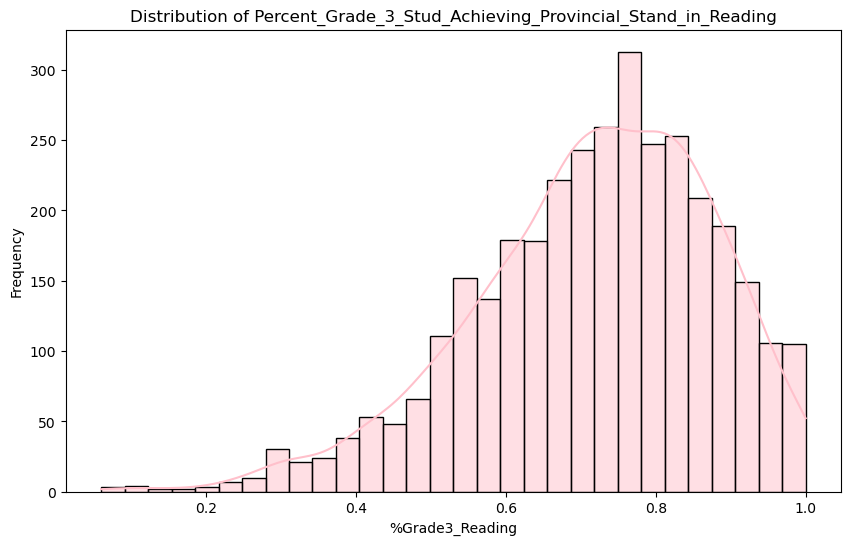

In [2322]:
#plotting a hist for Percent_Grade_3_Stud_Achieving_Provincial_Stand_in_Reading
plt.figure(figsize=(10, 6)) 
sns.histplot(plot_data1.dropna(), kde=True, bins=30, color='pink') 
plt.title('Distribution of Percent_Grade_3_Stud_Achieving_Provincial_Stand_in_Reading') #title and labels
plt.xlabel('%Grade3_Reading')
plt.ylabel('Frequency')

#### Based on the above, we can see that mean (0.715795), median (0.730000) and mode (0.67,0.83) for %Grade3_Reading have some variation. The graph shows a left skew (negatively skewed). Therefore, I will resolve the missing null values by imputation based on median.

In [2323]:
#to fill null with median
df.loc[df['Grade_Range'].isin(['JK-8','JK-6','1-8','JK-3','JK-4','JK-5','K-8', 'K-6', '1-5', '1-6']), '%Grade3_Reading'] = (
    df.loc[df['Grade_Range'].isin(['JK-8','JK-6','1-8','JK-3','JK-4','JK-5','K-8', 'K-6', '1-5', '1-6']), '%Grade3_Reading']
        .fillna(plot_data1.median())
)

In [2324]:
#to check if change was done correctly
df[(df['Grade_Range'].isin(['JK-8','JK-6','1-8','JK-3','JK-4','JK-5','K-8', 'K-6', '1-5', '1-6'])) & (df['%Grade3_Reading'].isna())]

Empty DataFrame
Columns: [Board_Number, Board_Name, Board_Type, School_Number, School_Name, School_Type, School_Spec_Cond_Code, School_Level, School_Lang, Grade_Range, Street, Municipality, City, Province, Postal_Code, Phone_Number, Fax_Number, School_Website, Board_Website, Enrolment, Latitude, Longitude, %Stud_FirstLang_Not_Eng, %Stud_FirstLang_Not_Fr, %Stud_New_Canada_Non-Eng_Cntry, %Stud_New_Canada_Non-Fr_Cntry, %Stud_Special_Ed, %Stud_Gifted, %Grade3_Reading, Change_G3_Read_3Yr, %Grade3_Writing, Change_G3_Write_3Yr, %Grade3_Math, Change_G3_Math_3Yr, %Grade6_Reading, Change_G6_Read_3Yr, %Grade6_Writing, Change_G6_Write_3Yr, %Grade6_Math, Change_G6_Math_3Yr, %Grade9_Math, Change_G9_Math_3Yr, %Grade10_OSSLT, Change_G10_OSSLT_3Yr, %Child_Livein_LowInc_HH, %Stud_Par_NoDegDipCert, Extract_Date]
Index: []

In [2325]:
df.isnull().sum() #to see null values remaining

Board_Number                         0
Board_Name                           0
Board_Type                           0
School_Number                        0
School_Name                          0
School_Type                          0
School_Spec_Cond_Code                0
School_Level                         0
School_Lang                          0
Grade_Range                          0
Street                               0
Municipality                         0
City                                 0
Province                             0
Postal_Code                          0
Phone_Number                         0
Fax_Number                           0
School_Website                       0
Board_Website                        0
Enrolment                            0
Latitude                             0
Longitude                            0
%Stud_FirstLang_Not_Eng              0
%Stud_FirstLang_Not_Fr               0
%Stud_New_Canada_Non-Eng_Cntry       0
%Stud_New_Canada_Non-Fr_C

# Change_G3_Read_3Yr - 1372 Missing Values

### I am assuming that Change_G3_Read_3Yr is null when the Grade Range does not include Grade 3. I will check that below.

In [2326]:
df[df['Change_G3_Read_3Yr'].isnull()].head(20) #the data seems to support my assumption

Board_Number                    Board_Name               Board_Type  \
0        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
4        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
5        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
7        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
9        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
10       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
13       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
14       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
16       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
21       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
24       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
25       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
26       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
35       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
37       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
39       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
42       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
43       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
44       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
48       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   

   School_Number                                        School_Name  \
0         902344       Algoma Education Connection Secondary School   
4         490822              Boreal French Immersion Public School   
5         137967                 Central Algoma Intermediate School   
7         891347                    Central Algoma Secondary School   
9         900869                               Chapleau High School   
10        101214                             Chapleau Public School   
13        293055                    Elliot Lake Intermediate School   
14        908010                       Elliot Lake Secondary School   
16        202614                    Francis H Clergue Public School   
21        264750                           Hornepayne Public School   
24        920533             Korah Collegiate and Vocational School   
25        018309                          Korah Intermediate School   
26        926086                           Michipicoten High School   
35        515396                       Sir James Dunn Public School   
37        958050  Superior Heights Collegiate and Vocational School   
39        106913               Superior Heights Intermediate School   
42        895270                         W C Eaket Secondary School   
43        953148       White Pines Collegiate and Vocational School   
44        144872                    White Pines Intermediate School   
48        715298               Holy Cross Catholic Secondary School   

   School_Type School_Spec_Cond_Code School_Level School_Lang Grade_Range  \
0       Public           Alternative    Secondary     English        9-12   
4       Public        Not applicable   Elementary     English        JK-8   
5       Public        Not applicable   Elementary     English         7-8   
7       Public        Not applicable    Secondary     English        9-12   
9       Public        Not applicable    Secondary     English        9-12   
10      Public        Not applicable   Elementary     English        JK-8   
13      Public        Not applicable   Elementary     English         7-8   
14      Public        Not applicable    Secondary     English        9-12   
16      Public        Not applicable   Elementary     English        JK-8   
21      Public        Not applicable   Elementary     English        JK-8   
24      Public        Not applicable    Secondary     English        9-12   
25      Public        Not applic

In [2327]:
df[(df['Grade_Range'].isin(['JK-8','JK-6','1-8','JK-3','JK-4','JK-5','K-8', 'K-6', '1-5', '1-6'])) & (df['Change_G3_Read_3Yr'].isna())].head(10)

Board_Number                    Board_Name               Board_Type  \
4         B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
10        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
16        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
21        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
35        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
63        B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
131       B80012                  Bloorview SA      Provincial/Hospital   
163       B66001                 Bluewater DSB   Pub Dist Sch Brd (E/F)   
195       B67164  Brant Haldimand Norfolk CDSB  Cath Dist Sch Brd (E/F)   
209       B67164  Brant Haldimand Norfolk CDSB  Cath Dist Sch Brd (E/F)   

    School_Number                                 School_Name School_Type  \
4          490822       Boreal French Immersion Public School      Public   
10         101214                      Chapleau Public School      Public   
16         202614             Francis H Clergue Public School      Public   
21         264750                    Hornepayne Public School      Public   
35         515396                Sir James Dunn Public School      Public   
63         868370                Sacred Heart Catholic School    Catholic   
131        417556                  Bloorview School Authority    Hospital   
163        293750  Kincardine Township-Tiverton Public School      Public   
195        753084                         Resurrection School    Catholic   
209        834831                      St. Michael's C School    Catholic   

    School_Spec_Cond_Code School_Level School_Lang Grade_Range  \
4          Not applicable   Elementary     English        JK-8   
10         Not applicable   Elementary     English        JK-8   
16         Not applicable   Elementary     English        JK-8   
21         Not applicable   Elementary     English        JK-8   
35         Not applicable   Elementary     English        JK-8   
63         Not applicable   Elementary     English        JK-8   
131        Not applicable   Elementary     English        JK-8   
163        Not applicable   Elementary     English        JK-3   
195        Not applicable   Elementary     English        JK-8   
209        Not applicable   Elementary     English        JK-8   

                Street                    Municipality             City  \
4     232 Northern Ave       Sault Ste. Marie, City of  Sault Ste Marie   
10          24 Pine St           Chapleau, Township of         Chapleau   
16       80 Weldon Ave       Sault Ste. Marie, City of  Sault Ste Marie   
21      162 Fourth Ave         Hornepayne, Township of       Hornepayne   
35     36 McKinley Ave            Middlesex, County of             Wawa   
63           57 Hwy 95  Frontenac Islands, Township of     Wolfe Island   
131     150 Kilgour Rd                Toronto, City of          Toronto   
163      1805 Hwy 21 2     Kincardine, Municipality of       Kincardine   
195    17 Ravenwood Rd              Brantford, City of        Brantford   
209  972 St. John's RD                  Norfolk County           SIMCOE   

    Province Postal_Code  Phone_Number    Fax_Number  \
4    Ontario      P6B4H6  705-945-7149  705-945-7349   
10   Ontario      P0M1K0  705-864-1170  705-864-1606   
16   Ontario      P6B3C6  705-945-7136  705-945-7144   
21   Ontario      P0M1Z0  807-868-2503  807-868-2126   
35   Ontario      P0S1K0  705-856-2517  705-856-2974   
63   Ontario      K0H2Y0  613-385-2348  613-385-1415   
131  Ontario      M4G1R8  416-424-3831  416-425-2981   
163  Ontario      N2Z2X4  519-396-3371  519-370-2936   
195  Ontario      N3R6L4  519-752-5900  416-325-2929   
209  Ontario      N3Y4K1  519-426-5462  416-325-2929   

                                        School_Website  \
4                          http://rosedale.adsb.on.ca/   
10   http://www.adsb.on.ca/content/schools/s

### Based on the above, we can see that some Grade 3–inclusive grade ranges contain null values for Change_G3_Read_3Yr. Therefore, we will create a histogram plot to determine whether these values should be replaced with the mean or the median.

In [2328]:
plot_data2 = pd.to_numeric(df['Change_G3_Read_3Yr'], errors='coerce') #for getting stats and plotting
plot_data2.describe() #to see stats

count    3335.000000
mean       -1.098051
std        15.701445
min       -71.000000
25%       -10.000000
50%        -1.000000
75%         8.000000
max        69.000000
Name: Change_G3_Read_3Yr, dtype: float64

In [2329]:
plot_data2.value_counts().head(5) #to see mode

Change_G3_Read_3Yr
-3.0    112
 0.0    111
-2.0    105
 2.0    103
-6.0    102
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

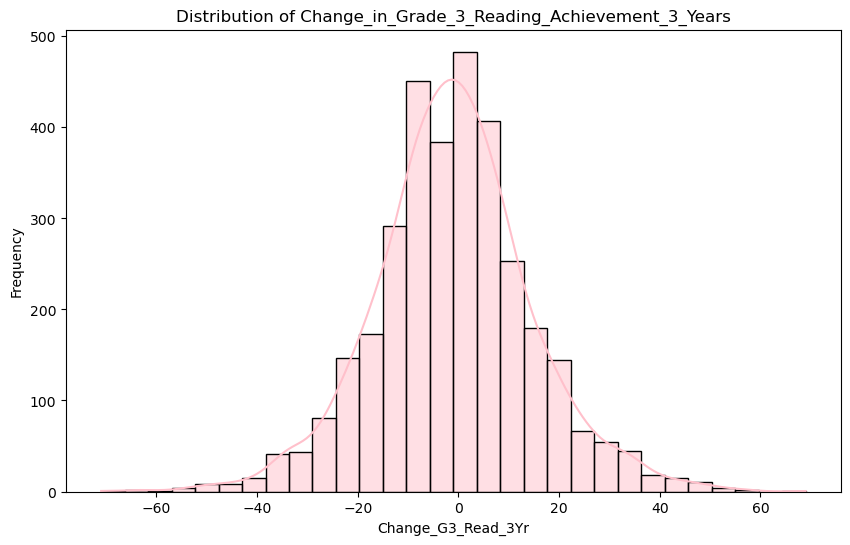

In [2330]:
#plotting a hist for Change_in_Grade_3_Reading_Achievement_3_Years
plt.figure(figsize=(10, 6)) 
sns.histplot(plot_data2.dropna(), kde=True, bins=30, color='pink') 
plt.title('Distribution of Change_in_Grade_3_Reading_Achievement_3_Years') #title and labels
plt.xlabel('Change_G3_Read_3Yr')
plt.ylabel('Frequency')

#### Based on the above, we can see that mean ( -1.098051), median (-1.000000) and mode (-3.0,0) for Change_G3_Read_3Yr have some variation. However, the graph seems to represent a normal distribution or very slightly right-skewed(Positively skewed). Therefore, I will resolve the missing null values by imputation based on mean

In [2331]:
#to fill null with mean
df.loc[df['Grade_Range'].isin(['JK-8','JK-6','1-8','JK-3','JK-4','JK-5','K-8', 'K-6', '1-5', '1-6']), 'Change_G3_Read_3Yr'] = (
    df.loc[df['Grade_Range'].isin(['JK-8','JK-6','1-8','JK-3','JK-4','JK-5','K-8', 'K-6', '1-5', '1-6']), 'Change_G3_Read_3Yr'].fillna(plot_data2.mean())
)

In [2332]:
#to check if change was done correctly
df[(df['Grade_Range'].isin(['JK-8','JK-6','1-8','JK-3','JK-4','JK-5','K-8', 'K-6', '1-5', '1-6'])) & (df['Change_G3_Read_3Yr'].isna())]

Empty DataFrame
Columns: [Board_Number, Board_Name, Board_Type, School_Number, School_Name, School_Type, School_Spec_Cond_Code, School_Level, School_Lang, Grade_Range, Street, Municipality, City, Province, Postal_Code, Phone_Number, Fax_Number, School_Website, Board_Website, Enrolment, Latitude, Longitude, %Stud_FirstLang_Not_Eng, %Stud_FirstLang_Not_Fr, %Stud_New_Canada_Non-Eng_Cntry, %Stud_New_Canada_Non-Fr_Cntry, %Stud_Special_Ed, %Stud_Gifted, %Grade3_Reading, Change_G3_Read_3Yr, %Grade3_Writing, Change_G3_Write_3Yr, %Grade3_Math, Change_G3_Math_3Yr, %Grade6_Reading, Change_G6_Read_3Yr, %Grade6_Writing, Change_G6_Write_3Yr, %Grade6_Math, Change_G6_Math_3Yr, %Grade9_Math, Change_G9_Math_3Yr, %Grade10_OSSLT, Change_G10_OSSLT_3Yr, %Child_Livein_LowInc_HH, %Stud_Par_NoDegDipCert, Extract_Date]
Index: []

In [2333]:
df.isnull().sum() #to see null values remaining

Board_Number                         0
Board_Name                           0
Board_Type                           0
School_Number                        0
School_Name                          0
School_Type                          0
School_Spec_Cond_Code                0
School_Level                         0
School_Lang                          0
Grade_Range                          0
Street                               0
Municipality                         0
City                                 0
Province                             0
Postal_Code                          0
Phone_Number                         0
Fax_Number                           0
School_Website                       0
Board_Website                        0
Enrolment                            0
Latitude                             0
Longitude                            0
%Stud_FirstLang_Not_Eng              0
%Stud_FirstLang_Not_Fr               0
%Stud_New_Canada_Non-Eng_Cntry       0
%Stud_New_Canada_Non-Fr_C

# %Grade3_Writing - 1183 Missing Values

### I am assuming that %Grade3_Writing  is null when the Grade Range does not include Grade 3. I will verify this below.

In [2334]:
df[df['%Grade3_Writing'].isnull()].head(20) #the data seems to support my assumption

Board_Number                    Board_Name               Board_Type  \
0        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
5        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
7        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
9        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
13       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
14       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
24       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
25       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
26       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
37       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
39       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
42       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
43       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
44       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
48       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
53       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
54       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
55       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
60       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
77       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   

   School_Number                                        School_Name  \
0         902344       Algoma Education Connection Secondary School   
5         137967                 Central Algoma Intermediate School   
7         891347                    Central Algoma Secondary School   
9         900869                               Chapleau High School   
13        293055                    Elliot Lake Intermediate School   
14        908010                       Elliot Lake Secondary School   
24        920533             Korah Collegiate and Vocational School   
25        018309                          Korah Intermediate School   
26        926086                           Michipicoten High School   
37        958050  Superior Heights Collegiate and Vocational School   
39        106913               Superior Heights Intermediate School   
42        895270                         W C Eaket Secondary School   
43        953148       White Pines Collegiate and Vocational School   
44        144872                    White Pines Intermediate School   
48        715298               Holy Cross Catholic Secondary School   
53        728420                   Loyola Community Learning Centre   
54        835099                         Nicholson Catholic College   
55        690932           Nicholson Catholic College (Grade 7 & 8)   
60        752932         Regiopolis/Notre-Dame Catholic High School   
77        706744                 St Paul Catholic Elementary School   

   School_Type School_Spec_Cond_Code School_Level School_Lang Grade_Range  \
0       Public           Alternative    Secondary     English        9-12   
5       Public        Not applicable   Elementary     English         7-8   
7       Public        Not applicable    Secondary     English        9-12   
9       Public        Not applicable    Secondary     English        9-12   
13      Public        Not applicable   Elementary     English         7-8   
14      Public        Not applicable    Secondary     English        9-12   
24      Public        Not applicable    Secondary     English        9-12   
25      Public        Not applicable   Elementary     English         7-8   
26      Public        Not applicable    Secondary     English        9-12   
37      Public        Not applicable    Secondary     English        9-12   
39      Public        Not applicable   Elementary     English         7-8   
42      Public        Not applic

In [2335]:
df[(df['Grade_Range'].isin(['JK-8','JK-6','1-8','JK-3','JK-4','JK-5','K-8', 'K-6', '1-5', '1-6'])) & (df['%Grade3_Writing'].isna())].head(10)

Board_Number                 Board_Name               Board_Type  \
131        B80012               Bloorview SA      Provincial/Hospital   
163        B66001              Bluewater DSB   Pub Dist Sch Brd (E/F)   
424        B67318    CS catholique MonAvenir  Cath Dist Sch Brd (E/F)   
548        B29106  CSDC des Grandes Rivières  Cath Dist Sch Brd (E/F)   
1322       B80020               Grandview SA      Provincial/Hospital   
1645       B66141     Hamilton-Wentworth DSB   Pub Dist Sch Brd (E/F)   
1778       B67016           Huron Perth CDSB  Cath Dist Sch Brd (E/F)   
1836       B66079    Kawartha Pine Ridge DSB   Pub Dist Sch Brd (E/F)   
1917       B80039            KidsAbility E A      Provincial/Hospital   
2605       B66125                   Peel DSB   Pub Dist Sch Brd (E/F)   

     School_Number                                 School_Name School_Type  \
131         417556                  Bloorview School Authority    Hospital   
163         293750  Kincardine Township-Tiverton Public School      Public   
424         760021                           ÉÉC du Bon-Berger    Catholic   
548         805580              École catholique Louis-Rhéaume    Catholic   
1322        425729                            Grandview School    Hospital   
1645        018961  Frank Panabaker South Senior Public School      Public   
1778        713678                 St Patricks Separate School    Catholic   
1836        242780                   Hampton Jr. Public School      Public   
1917        301825                          KidsAbility School    Hospital   
2605        193097                  Fallingbrook Middle School      Public   

     School_Spec_Cond_Code School_Level School_Lang Grade_Range  \
131         Not applicable   Elementary     English        JK-8   
163         Not applicable   Elementary     English        JK-3   
424         Not applicable   Elementary      French        JK-6   
548         Not applicable   Elementary      French        JK-3   
1322        Not applicable   Elementary     English        JK-8   
1645        Not applicable   Elementary     English        JK-8   
1778        Not applicable   Elementary     English        JK-3   
1836        Not applicable   Elementary     English        JK-3   
1917        Not applicable   Elementary     English        JK-3   
2605        Not applicable   Elementary     English        JK-8   

                    Street                        Municipality         City  \
131         150 Kilgour Rd                    Toronto, City of      Toronto   
163          1805 Hwy 21 2         Kincardine, Municipality of   Kincardine   
424       343 Jones Avenue                    Toronto, City of      Toronto   
548      600 Pine Nord rue                    Timmins, City of      Timmins   
1322     600 Townline Rd S                     Oshawa, City of       Oshawa   
1645       295 Nakoma Road               Hamilton, Township of     Ancaster   
1778            94 Mill St         West Perth, Municipality of       Dublin   
1836        43 Ormiston St         Clarington, Municipality of      Hampton   
1917       500 Hallmark Dr  Waterloo, Regional Municipality of     Waterloo   
2605  5187 Fallingbrook Dr                Mississauga, City of  Mississauga   

     Province Postal_Code  Phone_Number    Fax_Number  \
131   Ontario      M4G1R8  416-424-3831  416-425-2981   
163   Ontario      N2Z2X4  519-396-3371  519-370-2936   
424   Ontario      M4J3G4  416-461-2674  416-465-1108   
548   Ontario      P4N6M3  705-264-4747  705-264-6065   
1322  Ontario      L1H0C8  905-576-8403  905-576-4414   
1645  Ontario      L9G1T2  905-648-4439  905-648-4450   
1778  Ontario      N0K1E0  519-345-2033  519-345-2809   
1836  Ontario      L0B1J0  905-263-2252  905-263-4759   
1917  Ontario      N2K3P5  519-886-8886  519-885-6222   
2605  Ontario      L5V1N7  905-812-7470  905-812-7472   

                                         School_Website  \
131                       http://www.bloorviews

### Based on the above, we can see that some Grade 3–inclusive grade ranges contain null values for %Grade3_Writing. Therefore, we will create a histogram plot to determine whether these values should be replaced with the mean or the median.

In [2336]:
plot_data3 = pd.to_numeric(df['%Grade3_Writing'], errors='coerce') #for getting stats and plotting
plot_data3.describe() #to see stats

count    3364.000000
mean        0.629911
std         0.182882
min         0.060000
25%         0.510000
50%         0.640000
75%         0.760000
max         1.000000
Name: %Grade3_Writing, dtype: float64

In [2337]:
plot_data3.value_counts().head(5) #to see mode

%Grade3_Writing
0.75    86
0.67    84
0.50    83
0.70    82
0.59    81
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

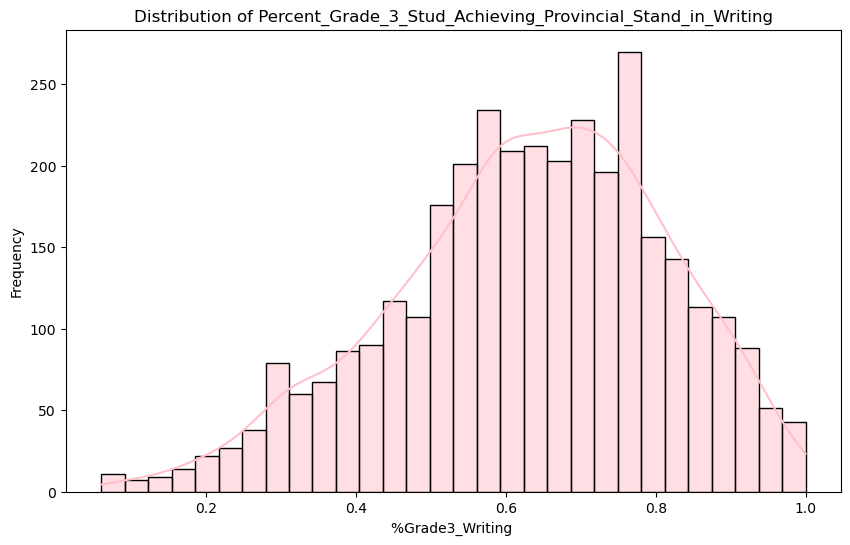

In [2338]:
#plotting a hist for Percent_Grade_3_Stud_Achieving_Provincial_Stand_in_Writing
plt.figure(figsize=(10, 6)) 
sns.histplot(plot_data3.dropna(), kde=True, bins=30, color='pink') 
plt.title('Distribution of Percent_Grade_3_Stud_Achieving_Provincial_Stand_in_Writing') #title and labels
plt.xlabel('%Grade3_Writing ')
plt.ylabel('Frequency')

#### Based on the above, we can see that mean ( 0.629911), median (0.640000) and mode (0.75) for %Grade3_Writing have variation. 'The graph shows a left skew (negatively skewed)'. Therefore, I will resolve the missing null values by imputation based on median.

In [2339]:
#to fill null with median
df.loc[df['Grade_Range'].isin(['JK-8','JK-6','1-8','JK-3','JK-4','JK-5','K-8', 'K-6', '1-5', '1-6']), '%Grade3_Writing'] = (
    df.loc[df['Grade_Range'].isin(['JK-8','JK-6','1-8','JK-3','JK-4','JK-5','K-8', 'K-6', '1-5', '1-6']), '%Grade3_Writing'].fillna(plot_data3.median())
)

In [2340]:
#to check if change was done correctly
df[(df['Grade_Range'].isin(['JK-8','JK-6','1-8','JK-3','JK-4','JK-5','K-8', 'K-6', '1-5', '1-6'])) & (df['%Grade3_Writing'].isna())]

Empty DataFrame
Columns: [Board_Number, Board_Name, Board_Type, School_Number, School_Name, School_Type, School_Spec_Cond_Code, School_Level, School_Lang, Grade_Range, Street, Municipality, City, Province, Postal_Code, Phone_Number, Fax_Number, School_Website, Board_Website, Enrolment, Latitude, Longitude, %Stud_FirstLang_Not_Eng, %Stud_FirstLang_Not_Fr, %Stud_New_Canada_Non-Eng_Cntry, %Stud_New_Canada_Non-Fr_Cntry, %Stud_Special_Ed, %Stud_Gifted, %Grade3_Reading, Change_G3_Read_3Yr, %Grade3_Writing, Change_G3_Write_3Yr, %Grade3_Math, Change_G3_Math_3Yr, %Grade6_Reading, Change_G6_Read_3Yr, %Grade6_Writing, Change_G6_Write_3Yr, %Grade6_Math, Change_G6_Math_3Yr, %Grade9_Math, Change_G9_Math_3Yr, %Grade10_OSSLT, Change_G10_OSSLT_3Yr, %Child_Livein_LowInc_HH, %Stud_Par_NoDegDipCert, Extract_Date]
Index: []

In [2341]:
df.isnull().sum() #to see null values remaining

Board_Number                         0
Board_Name                           0
Board_Type                           0
School_Number                        0
School_Name                          0
School_Type                          0
School_Spec_Cond_Code                0
School_Level                         0
School_Lang                          0
Grade_Range                          0
Street                               0
Municipality                         0
City                                 0
Province                             0
Postal_Code                          0
Phone_Number                         0
Fax_Number                           0
School_Website                       0
Board_Website                        0
Enrolment                            0
Latitude                             0
Longitude                            0
%Stud_FirstLang_Not_Eng              0
%Stud_FirstLang_Not_Fr               0
%Stud_New_Canada_Non-Eng_Cntry       0
%Stud_New_Canada_Non-Fr_C

# Change_G3_Write_3Yr - 1371 Missing Values

### I am assuming that Change_G3_Write_3Yr is null when the Grade Range does not include Grade 3. I will verify this below.

In [2342]:
df[df['Change_G3_Write_3Yr'].isnull()].head(20) #the data seems to support my assumption

Board_Number                    Board_Name               Board_Type  \
0        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
4        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
5        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
7        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
9        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
10       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
13       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
14       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
16       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
21       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
24       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
25       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
26       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
35       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
37       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
39       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
42       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
43       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
44       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
48       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   

   School_Number                                        School_Name  \
0         902344       Algoma Education Connection Secondary School   
4         490822              Boreal French Immersion Public School   
5         137967                 Central Algoma Intermediate School   
7         891347                    Central Algoma Secondary School   
9         900869                               Chapleau High School   
10        101214                             Chapleau Public School   
13        293055                    Elliot Lake Intermediate School   
14        908010                       Elliot Lake Secondary School   
16        202614                    Francis H Clergue Public School   
21        264750                           Hornepayne Public School   
24        920533             Korah Collegiate and Vocational School   
25        018309                          Korah Intermediate School   
26        926086                           Michipicoten High School   
35        515396                       Sir James Dunn Public School   
37        958050  Superior Heights Collegiate and Vocational School   
39        106913               Superior Heights Intermediate School   
42        895270                         W C Eaket Secondary School   
43        953148       White Pines Collegiate and Vocational School   
44        144872                    White Pines Intermediate School   
48        715298               Holy Cross Catholic Secondary School   

   School_Type School_Spec_Cond_Code School_Level School_Lang Grade_Range  \
0       Public           Alternative    Secondary     English        9-12   
4       Public        Not applicable   Elementary     English        JK-8   
5       Public        Not applicable   Elementary     English         7-8   
7       Public        Not applicable    Secondary     English        9-12   
9       Public        Not applicable    Secondary     English        9-12   
10      Public        Not applicable   Elementary     English        JK-8   
13      Public        Not applicable   Elementary     English         7-8   
14      Public        Not applicable    Secondary     English        9-12   
16      Public        Not applicable   Elementary     English        JK-8   
21      Public        Not applicable   Elementary     English        JK-8   
24      Public        Not applicable    Secondary     English        9-12   
25      Public        Not applic

In [2343]:
df[(df['Grade_Range'].isin(['JK-8','JK-6','1-8','JK-3','JK-4','JK-5','K-8', 'K-6', '1-5', '1-6'])) & (df['Change_G3_Write_3Yr'].isna())].head(10)

Board_Number                    Board_Name               Board_Type  \
4         B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
10        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
16        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
21        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
35        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
63        B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
131       B80012                  Bloorview SA      Provincial/Hospital   
163       B66001                 Bluewater DSB   Pub Dist Sch Brd (E/F)   
195       B67164  Brant Haldimand Norfolk CDSB  Cath Dist Sch Brd (E/F)   
209       B67164  Brant Haldimand Norfolk CDSB  Cath Dist Sch Brd (E/F)   

    School_Number                                 School_Name School_Type  \
4          490822       Boreal French Immersion Public School      Public   
10         101214                      Chapleau Public School      Public   
16         202614             Francis H Clergue Public School      Public   
21         264750                    Hornepayne Public School      Public   
35         515396                Sir James Dunn Public School      Public   
63         868370                Sacred Heart Catholic School    Catholic   
131        417556                  Bloorview School Authority    Hospital   
163        293750  Kincardine Township-Tiverton Public School      Public   
195        753084                         Resurrection School    Catholic   
209        834831                      St. Michael's C School    Catholic   

    School_Spec_Cond_Code School_Level School_Lang Grade_Range  \
4          Not applicable   Elementary     English        JK-8   
10         Not applicable   Elementary     English        JK-8   
16         Not applicable   Elementary     English        JK-8   
21         Not applicable   Elementary     English        JK-8   
35         Not applicable   Elementary     English        JK-8   
63         Not applicable   Elementary     English        JK-8   
131        Not applicable   Elementary     English        JK-8   
163        Not applicable   Elementary     English        JK-3   
195        Not applicable   Elementary     English        JK-8   
209        Not applicable   Elementary     English        JK-8   

                Street                    Municipality             City  \
4     232 Northern Ave       Sault Ste. Marie, City of  Sault Ste Marie   
10          24 Pine St           Chapleau, Township of         Chapleau   
16       80 Weldon Ave       Sault Ste. Marie, City of  Sault Ste Marie   
21      162 Fourth Ave         Hornepayne, Township of       Hornepayne   
35     36 McKinley Ave            Middlesex, County of             Wawa   
63           57 Hwy 95  Frontenac Islands, Township of     Wolfe Island   
131     150 Kilgour Rd                Toronto, City of          Toronto   
163      1805 Hwy 21 2     Kincardine, Municipality of       Kincardine   
195    17 Ravenwood Rd              Brantford, City of        Brantford   
209  972 St. John's RD                  Norfolk County           SIMCOE   

    Province Postal_Code  Phone_Number    Fax_Number  \
4    Ontario      P6B4H6  705-945-7149  705-945-7349   
10   Ontario      P0M1K0  705-864-1170  705-864-1606   
16   Ontario      P6B3C6  705-945-7136  705-945-7144   
21   Ontario      P0M1Z0  807-868-2503  807-868-2126   
35   Ontario      P0S1K0  705-856-2517  705-856-2974   
63   Ontario      K0H2Y0  613-385-2348  613-385-1415   
131  Ontario      M4G1R8  416-424-3831  416-425-2981   
163  Ontario      N2Z2X4  519-396-3371  519-370-2936   
195  Ontario      N3R6L4  519-752-5900  416-325-2929   
209  Ontario      N3Y4K1  519-426-5462  416-325-2929   

                                        School_Website  \
4                          http://rosedale.adsb.on.ca/   
10   http://www.adsb.on.ca/content/schools/s

### Based on the above, we can see that some Grade 3–inclusive grade ranges contain null values for Change_G3_Write_3Yr. Therefore, we will create a histogram plot to determine whether these values should be replaced with the mean or the median.

In [2344]:
plot_data4 = pd.to_numeric(df['Change_G3_Write_3Yr'], errors='coerce') #for getting stats and plotting
plot_data4.describe() #to see stats

count    3336.000000
mean       -0.728118
std        17.502558
min       -61.000000
25%       -12.000000
50%        -1.000000
75%        10.000000
max        69.000000
Name: Change_G3_Write_3Yr, dtype: float64

In [2345]:
plot_data4.value_counts().head(5) #to see mode

Change_G3_Write_3Yr
 0.0    103
-5.0    103
-4.0     97
 2.0     96
 3.0     93
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

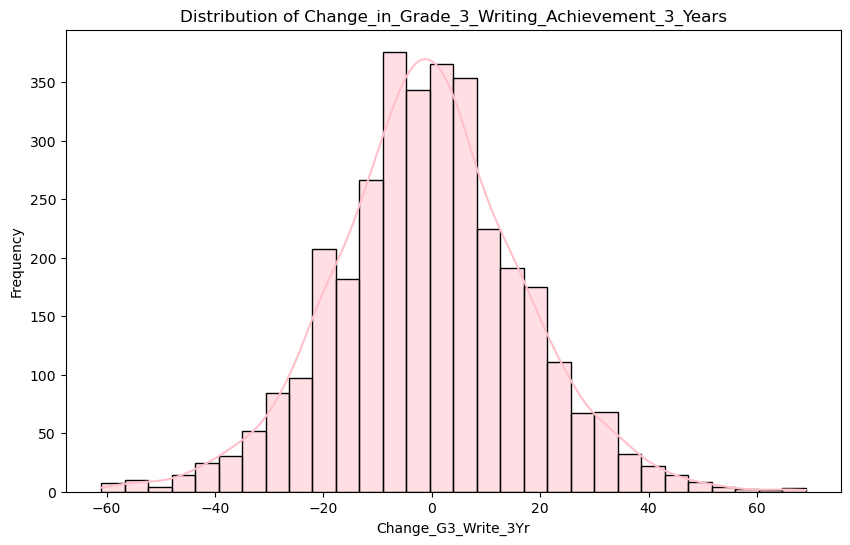

In [2346]:
#plotting a hist for Change_in_Grade_3_Writing_Achievement_3_Years
plt.figure(figsize=(10, 6)) 
sns.histplot(plot_data4.dropna(), kde=True, bins=30, color='pink') 
plt.title('Distribution of Change_in_Grade_3_Writing_Achievement_3_Years') #title and labels
plt.xlabel('Change_G3_Write_3Yr')
plt.ylabel('Frequency')

#### Based on the above, we can see that mean (-0.728118), median (-1.000000) and mode (-5.0 ,0.0) for Change_G3_Write_3Yr have variation. However, the graph seems to represent a normal distribution. Therefore, I will resolve the missing null values by imputation based on mean.

In [2347]:
#to fill null with mean
df.loc[df['Grade_Range'].isin(['JK-8','JK-6','1-8','JK-3','JK-4','JK-5','K-8', 'K-6', '1-5', '1-6']), 'Change_G3_Write_3Yr'] = (
    df.loc[df['Grade_Range'].isin(['JK-8','JK-6','1-8','JK-3','JK-4','JK-5','K-8', 'K-6', '1-5', '1-6']), 'Change_G3_Write_3Yr'].fillna(plot_data4.mean())
)

In [2348]:
#to check if change was done correctly
df[(df['Grade_Range'].isin(['JK-8','JK-6','1-8','JK-3','JK-4','JK-5','K-8', 'K-6', '1-5', '1-6'])) & (df['Change_G3_Write_3Yr'].isna())]

Empty DataFrame
Columns: [Board_Number, Board_Name, Board_Type, School_Number, School_Name, School_Type, School_Spec_Cond_Code, School_Level, School_Lang, Grade_Range, Street, Municipality, City, Province, Postal_Code, Phone_Number, Fax_Number, School_Website, Board_Website, Enrolment, Latitude, Longitude, %Stud_FirstLang_Not_Eng, %Stud_FirstLang_Not_Fr, %Stud_New_Canada_Non-Eng_Cntry, %Stud_New_Canada_Non-Fr_Cntry, %Stud_Special_Ed, %Stud_Gifted, %Grade3_Reading, Change_G3_Read_3Yr, %Grade3_Writing, Change_G3_Write_3Yr, %Grade3_Math, Change_G3_Math_3Yr, %Grade6_Reading, Change_G6_Read_3Yr, %Grade6_Writing, Change_G6_Write_3Yr, %Grade6_Math, Change_G6_Math_3Yr, %Grade9_Math, Change_G9_Math_3Yr, %Grade10_OSSLT, Change_G10_OSSLT_3Yr, %Child_Livein_LowInc_HH, %Stud_Par_NoDegDipCert, Extract_Date]
Index: []

In [2349]:
df.isnull().sum() #to see null values remaining

Board_Number                         0
Board_Name                           0
Board_Type                           0
School_Number                        0
School_Name                          0
School_Type                          0
School_Spec_Cond_Code                0
School_Level                         0
School_Lang                          0
Grade_Range                          0
Street                               0
Municipality                         0
City                                 0
Province                             0
Postal_Code                          0
Phone_Number                         0
Fax_Number                           0
School_Website                       0
Board_Website                        0
Enrolment                            0
Latitude                             0
Longitude                            0
%Stud_FirstLang_Not_Eng              0
%Stud_FirstLang_Not_Fr               0
%Stud_New_Canada_Non-Eng_Cntry       0
%Stud_New_Canada_Non-Fr_C

# %Grade3_Math - 1183 Missing Values

### I am assuming that %Grade3_Math is null when the Grade Range does not include Grade 3. I will verify this below.

In [2350]:
df[df['%Grade3_Math'].isnull()].head(20) #the data seems to support my assumption

Board_Number                    Board_Name               Board_Type  \
0        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
5        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
7        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
9        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
13       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
14       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
24       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
25       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
26       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
37       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
39       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
42       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
43       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
44       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
48       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
53       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
54       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
55       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
60       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
77       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   

   School_Number                                        School_Name  \
0         902344       Algoma Education Connection Secondary School   
5         137967                 Central Algoma Intermediate School   
7         891347                    Central Algoma Secondary School   
9         900869                               Chapleau High School   
13        293055                    Elliot Lake Intermediate School   
14        908010                       Elliot Lake Secondary School   
24        920533             Korah Collegiate and Vocational School   
25        018309                          Korah Intermediate School   
26        926086                           Michipicoten High School   
37        958050  Superior Heights Collegiate and Vocational School   
39        106913               Superior Heights Intermediate School   
42        895270                         W C Eaket Secondary School   
43        953148       White Pines Collegiate and Vocational School   
44        144872                    White Pines Intermediate School   
48        715298               Holy Cross Catholic Secondary School   
53        728420                   Loyola Community Learning Centre   
54        835099                         Nicholson Catholic College   
55        690932           Nicholson Catholic College (Grade 7 & 8)   
60        752932         Regiopolis/Notre-Dame Catholic High School   
77        706744                 St Paul Catholic Elementary School   

   School_Type School_Spec_Cond_Code School_Level School_Lang Grade_Range  \
0       Public           Alternative    Secondary     English        9-12   
5       Public        Not applicable   Elementary     English         7-8   
7       Public        Not applicable    Secondary     English        9-12   
9       Public        Not applicable    Secondary     English        9-12   
13      Public        Not applicable   Elementary     English         7-8   
14      Public        Not applicable    Secondary     English        9-12   
24      Public        Not applicable    Secondary     English        9-12   
25      Public        Not applicable   Elementary     English         7-8   
26      Public        Not applicable    Secondary     English        9-12   
37      Public        Not applicable    Secondary     English        9-12   
39      Public        Not applicable   Elementary     English         7-8   
42      Public        Not applic

In [2351]:
df[(df['Grade_Range'].isin(['JK-8','JK-6','1-8','JK-3','JK-4','JK-5','K-8', 'K-6', '1-5', '1-6'])) & (df['%Grade3_Math'].isna())].head(10)

Board_Number                 Board_Name               Board_Type  \
131        B80012               Bloorview SA      Provincial/Hospital   
163        B66001              Bluewater DSB   Pub Dist Sch Brd (E/F)   
424        B67318    CS catholique MonAvenir  Cath Dist Sch Brd (E/F)   
548        B29106  CSDC des Grandes Rivières  Cath Dist Sch Brd (E/F)   
1322       B80020               Grandview SA      Provincial/Hospital   
1645       B66141     Hamilton-Wentworth DSB   Pub Dist Sch Brd (E/F)   
1778       B67016           Huron Perth CDSB  Cath Dist Sch Brd (E/F)   
1836       B66079    Kawartha Pine Ridge DSB   Pub Dist Sch Brd (E/F)   
1917       B80039            KidsAbility E A      Provincial/Hospital   
2605       B66125                   Peel DSB   Pub Dist Sch Brd (E/F)   

     School_Number                                 School_Name School_Type  \
131         417556                  Bloorview School Authority    Hospital   
163         293750  Kincardine Township-Tiverton Public School      Public   
424         760021                           ÉÉC du Bon-Berger    Catholic   
548         805580              École catholique Louis-Rhéaume    Catholic   
1322        425729                            Grandview School    Hospital   
1645        018961  Frank Panabaker South Senior Public School      Public   
1778        713678                 St Patricks Separate School    Catholic   
1836        242780                   Hampton Jr. Public School      Public   
1917        301825                          KidsAbility School    Hospital   
2605        193097                  Fallingbrook Middle School      Public   

     School_Spec_Cond_Code School_Level School_Lang Grade_Range  \
131         Not applicable   Elementary     English        JK-8   
163         Not applicable   Elementary     English        JK-3   
424         Not applicable   Elementary      French        JK-6   
548         Not applicable   Elementary      French        JK-3   
1322        Not applicable   Elementary     English        JK-8   
1645        Not applicable   Elementary     English        JK-8   
1778        Not applicable   Elementary     English        JK-3   
1836        Not applicable   Elementary     English        JK-3   
1917        Not applicable   Elementary     English        JK-3   
2605        Not applicable   Elementary     English        JK-8   

                    Street                        Municipality         City  \
131         150 Kilgour Rd                    Toronto, City of      Toronto   
163          1805 Hwy 21 2         Kincardine, Municipality of   Kincardine   
424       343 Jones Avenue                    Toronto, City of      Toronto   
548      600 Pine Nord rue                    Timmins, City of      Timmins   
1322     600 Townline Rd S                     Oshawa, City of       Oshawa   
1645       295 Nakoma Road               Hamilton, Township of     Ancaster   
1778            94 Mill St         West Perth, Municipality of       Dublin   
1836        43 Ormiston St         Clarington, Municipality of      Hampton   
1917       500 Hallmark Dr  Waterloo, Regional Municipality of     Waterloo   
2605  5187 Fallingbrook Dr                Mississauga, City of  Mississauga   

     Province Postal_Code  Phone_Number    Fax_Number  \
131   Ontario      M4G1R8  416-424-3831  416-425-2981   
163   Ontario      N2Z2X4  519-396-3371  519-370-2936   
424   Ontario      M4J3G4  416-461-2674  416-465-1108   
548   Ontario      P4N6M3  705-264-4747  705-264-6065   
1322  Ontario      L1H0C8  905-576-8403  905-576-4414   
1645  Ontario      L9G1T2  905-648-4439  905-648-4450   
1778  Ontario      N0K1E0  519-345-2033  519-345-2809   
1836  Ontario      L0B1J0  905-263-2252  905-263-4759   
1917  Ontario      N2K3P5  519-886-8886  519-885-6222   
2605  Ontario      L5V1N7  905-812-7470  905-812-7472   

                                         School_Website  \
131                       http://www.bloorviews

### Based on the above, we can see that some Grade 3–inclusive grade ranges contain null values for %Grade3_Math . Therefore, we will create a histogram plot to determine whether these values should be replaced with the mean or the median.

In [2352]:
#Percent_Grade_3_Stud_Achieving_Provincial_Stand_in_Math
plot_data5 = pd.to_numeric(df['%Grade3_Math'], errors='coerce') #for getting stats and plotting
plot_data5.describe() #to see stats

count    3407.000000
mean        0.613302
std         0.179755
min         0.000000
25%         0.500000
50%         0.620000
75%         0.740000
max         1.000000
Name: %Grade3_Math, dtype: float64

In [2353]:
plot_data5.value_counts().head(5) #to see mode

%Grade3_Math
0.50    100
0.62     87
0.67     85
0.61     82
0.60     81
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

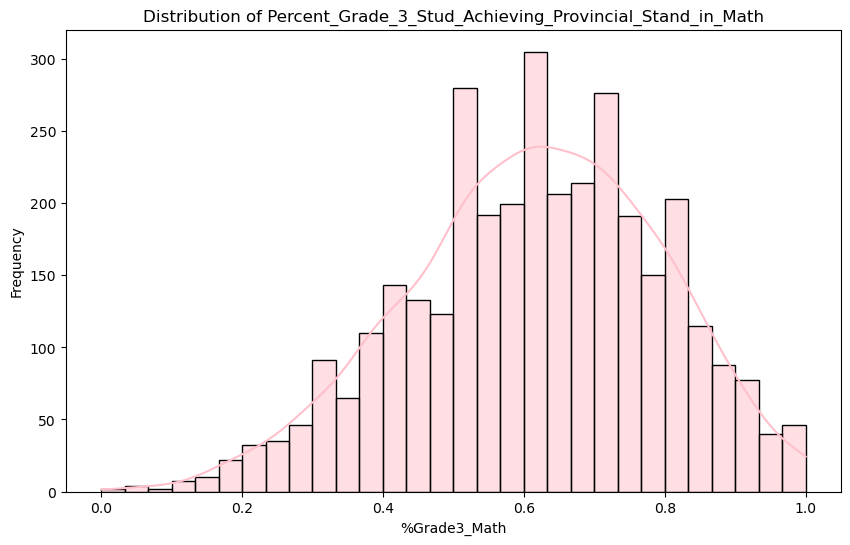

In [2354]:
#plotting a hist for Percent_Grade_3_Stud_Achieving_Provincial_Stand_in_Math
plt.figure(figsize=(10, 6)) 
sns.histplot(plot_data5.dropna(), kde=True, bins=30, color='pink') 
plt.title('Distribution of Percent_Grade_3_Stud_Achieving_Provincial_Stand_in_Math') #title and labels
plt.xlabel('%Grade3_Math')
plt.ylabel('Frequency')

#### Based on the above, we can see that mean (0.613302), median (0.620000) and mode (0.50) for %Grade3_Math have variation. 'The graph shows a left skew (negatively skewed)'. Therefore, I will resolve the missing null values by imputation based on median.

In [2355]:
#to fill null with median
df.loc[df['Grade_Range'].isin(['JK-8','JK-6','1-8','JK-3','JK-4','JK-5','K-8', 'K-6', '1-5', '1-6']), '%Grade3_Math'] = (
    df.loc[df['Grade_Range'].isin(['JK-8','JK-6','1-8','JK-3','JK-4','JK-5','K-8', 'K-6', '1-5', '1-6']), '%Grade3_Math'].fillna(plot_data5.median())
)

In [2356]:
#to check if change was done correctly
df[(df['Grade_Range'].isin(['JK-8','JK-6','1-8','JK-3','JK-4','JK-5','K-8', 'K-6', '1-5', '1-6'])) & (df['%Grade3_Math'].isna())]

Empty DataFrame
Columns: [Board_Number, Board_Name, Board_Type, School_Number, School_Name, School_Type, School_Spec_Cond_Code, School_Level, School_Lang, Grade_Range, Street, Municipality, City, Province, Postal_Code, Phone_Number, Fax_Number, School_Website, Board_Website, Enrolment, Latitude, Longitude, %Stud_FirstLang_Not_Eng, %Stud_FirstLang_Not_Fr, %Stud_New_Canada_Non-Eng_Cntry, %Stud_New_Canada_Non-Fr_Cntry, %Stud_Special_Ed, %Stud_Gifted, %Grade3_Reading, Change_G3_Read_3Yr, %Grade3_Writing, Change_G3_Write_3Yr, %Grade3_Math, Change_G3_Math_3Yr, %Grade6_Reading, Change_G6_Read_3Yr, %Grade6_Writing, Change_G6_Write_3Yr, %Grade6_Math, Change_G6_Math_3Yr, %Grade9_Math, Change_G9_Math_3Yr, %Grade10_OSSLT, Change_G10_OSSLT_3Yr, %Child_Livein_LowInc_HH, %Stud_Par_NoDegDipCert, Extract_Date]
Index: []

In [2357]:
df.isnull().sum() #to see null values remaining

Board_Number                         0
Board_Name                           0
Board_Type                           0
School_Number                        0
School_Name                          0
School_Type                          0
School_Spec_Cond_Code                0
School_Level                         0
School_Lang                          0
Grade_Range                          0
Street                               0
Municipality                         0
City                                 0
Province                             0
Postal_Code                          0
Phone_Number                         0
Fax_Number                           0
School_Website                       0
Board_Website                        0
Enrolment                            0
Latitude                             0
Longitude                            0
%Stud_FirstLang_Not_Eng              0
%Stud_FirstLang_Not_Fr               0
%Stud_New_Canada_Non-Eng_Cntry       0
%Stud_New_Canada_Non-Fr_C

# Change_G3_Math_3Yr - 1319 Missing Values


### I am assuming that Change_G3_Math_3Yr is null when the Grade Range does not include Grade 3. I will verify this below.

In [2358]:
df[df['Change_G3_Math_3Yr'].isnull()].head(20) #the data seems to support my assumption

Board_Number                    Board_Name               Board_Type  \
0        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
5        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
7        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
9        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
10       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
13       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
14       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
21       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
24       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
25       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
26       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
35       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
37       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
39       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
42       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
43       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
44       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
48       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
53       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
54       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   

   School_Number                                        School_Name  \
0         902344       Algoma Education Connection Secondary School   
5         137967                 Central Algoma Intermediate School   
7         891347                    Central Algoma Secondary School   
9         900869                               Chapleau High School   
10        101214                             Chapleau Public School   
13        293055                    Elliot Lake Intermediate School   
14        908010                       Elliot Lake Secondary School   
21        264750                           Hornepayne Public School   
24        920533             Korah Collegiate and Vocational School   
25        018309                          Korah Intermediate School   
26        926086                           Michipicoten High School   
35        515396                       Sir James Dunn Public School   
37        958050  Superior Heights Collegiate and Vocational School   
39        106913               Superior Heights Intermediate School   
42        895270                         W C Eaket Secondary School   
43        953148       White Pines Collegiate and Vocational School   
44        144872                    White Pines Intermediate School   
48        715298               Holy Cross Catholic Secondary School   
53        728420                   Loyola Community Learning Centre   
54        835099                         Nicholson Catholic College   

   School_Type School_Spec_Cond_Code School_Level School_Lang Grade_Range  \
0       Public           Alternative    Secondary     English        9-12   
5       Public        Not applicable   Elementary     English         7-8   
7       Public        Not applicable    Secondary     English        9-12   
9       Public        Not applicable    Secondary     English        9-12   
10      Public        Not applicable   Elementary     English        JK-8   
13      Public        Not applicable   Elementary     English         7-8   
14      Public        Not applicable    Secondary     English        9-12   
21      Public        Not applicable   Elementary     English        JK-8   
24      Public        Not applicable    Secondary     English        9-12   
25      Public        Not applicable   Elementary     English         7-8   
26      Public        Not applicable    Secondary     English        9-12   
35      Public        Not applic

In [2359]:
df[(df['Grade_Range'].isin(['JK-8','JK-6','1-8','JK-3','JK-4','JK-5','K-8', 'K-6', '1-5', '1-6'])) & (df['Change_G3_Math_3Yr'].isna())].head(10)

Board_Number                    Board_Name               Board_Type  \
10        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
21        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
35        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
63        B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
131       B80012                  Bloorview SA      Provincial/Hospital   
163       B66001                 Bluewater DSB   Pub Dist Sch Brd (E/F)   
195       B67164  Brant Haldimand Norfolk CDSB  Cath Dist Sch Brd (E/F)   
209       B67164  Brant Haldimand Norfolk CDSB  Cath Dist Sch Brd (E/F)   
241       B67172       CDSB of Eastern Ontario  Cath Dist Sch Brd (E/F)   
244       B67172       CDSB of Eastern Ontario  Cath Dist Sch Brd (E/F)   

    School_Number                                 School_Name School_Type  \
10         101214                      Chapleau Public School      Public   
21         264750                    Hornepayne Public School      Public   
35         515396                Sir James Dunn Public School      Public   
63         868370                Sacred Heart Catholic School    Catholic   
131        417556                  Bloorview School Authority    Hospital   
163        293750  Kincardine Township-Tiverton Public School      Public   
195        753084                         Resurrection School    Catholic   
209        834831                      St. Michael's C School    Catholic   
241        758787       Sacred Heart of Jesus Separate School    Catholic   
244        788686                          St Edward's School    Catholic   

    School_Spec_Cond_Code School_Level School_Lang Grade_Range  \
10         Not applicable   Elementary     English        JK-8   
21         Not applicable   Elementary     English        JK-8   
35         Not applicable   Elementary     English        JK-8   
63         Not applicable   Elementary     English        JK-8   
131        Not applicable   Elementary     English        JK-8   
163        Not applicable   Elementary     English        JK-3   
195        Not applicable   Elementary     English        JK-8   
209        Not applicable   Elementary     English        JK-8   
241        Not applicable   Elementary     English        JK-8   
244        Not applicable   Elementary     English        JK-8   

                Street                    Municipality          City Province  \
10          24 Pine St           Chapleau, Township of      Chapleau  Ontario   
21      162 Fourth Ave         Hornepayne, Township of    Hornepayne  Ontario   
35     36 McKinley Ave            Middlesex, County of          Wawa  Ontario   
63           57 Hwy 95  Frontenac Islands, Township of  Wolfe Island  Ontario   
131     150 Kilgour Rd                Toronto, City of       Toronto  Ontario   
163      1805 Hwy 21 2     Kincardine, Municipality of    Kincardine  Ontario   
195    17 Ravenwood Rd              Brantford, City of     Brantford  Ontario   
209  972 St. John's RD                  Norfolk County        SIMCOE  Ontario   
241       134 North St               Lanark, County of        Lanark  Ontario   
244      51 Bedford St            Westport, Village of      Westport  Ontario   

    Postal_Code  Phone_Number    Fax_Number  \
10       P0M1K0  705-864-1170  705-864-1606   
21       P0M1Z0  807-868-2503  807-868-2126   
35       P0S1K0  705-856-2517  705-856-2974   
63       K0H2Y0  613-385-2348  613-385-1415   
131      M4G1R8  416-424-3831  416-425-2981   
163      N2Z2X4  519-396-3371  519-370-2936   
195      N3R6L4  519-752-5900  416-325-2929   
209      N3Y4K1  519-426-5462  416-325-2929   
241      K0G1K0  613-259-2113  613-259-5343   
244      K0G1X0  613-273-2926  613-273-2636   

                                        School_Website  \
10   http://www.adsb.on.ca/content/schools/school_d...   
21   http://www.adsb.on.ca/sites/schools/hor/defaul...   
35   http://www.ads

### Based on the above, we can see that some Grade 3–inclusive grade ranges contain null values for Change_G3_Math_3Yr. Therefore, we will create a histogram plot to determine whether these values should be replaced with the mean or the median.

In [2360]:
plot_data6 = pd.to_numeric(df['Change_G3_Math_3Yr'], errors='coerce') #for getting stats and plotting
plot_data6.describe() #to see stats

count    3388.000000
mean        3.213400
std        17.072664
min       -70.000000
25%        -7.000000
50%         3.000000
75%        14.000000
max        64.000000
Name: Change_G3_Math_3Yr, dtype: float64

In [2361]:
plot_data6.value_counts().head(5) #to see mode

Change_G3_Math_3Yr
 6.0    96
 2.0    93
 4.0    93
-6.0    91
 5.0    89
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

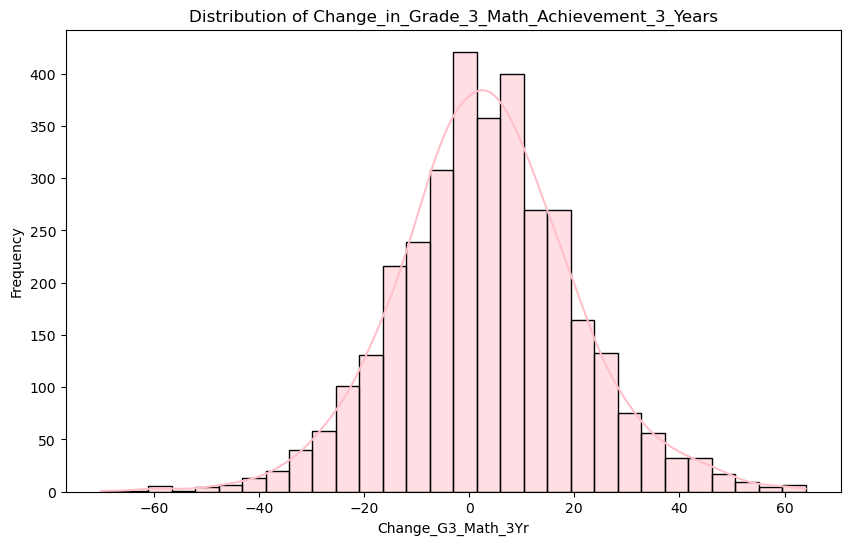

In [2362]:
#plotting a hist for Change_in_Grade_3_Math_Achievement_3_Years
plt.figure(figsize=(10, 6)) 
sns.histplot(plot_data6.dropna(), kde=True, bins=30, color='pink') 
plt.title('Distribution of Change_in_Grade_3_Math_Achievement_3_Years') #title and labels
plt.xlabel('Change_G3_Math_3Yr')
plt.ylabel('Frequency')

#### Based on the above, we can see that mean (3.213400), median (3.000000) and mode (6.0,2.0,4.0) for Change_G3_Math_3Yr have variation. However, the graph seems to represent a normal distribution. Therefore, I will resolve the missing null values by imputation based on mean.

In [2363]:
#to fill null with mean
df.loc[df['Grade_Range'].isin(['JK-8','JK-6','1-8','JK-3','JK-4','JK-5','K-8', 'K-6', '1-5', '1-6']), 'Change_G3_Math_3Yr'] = (
    df.loc[df['Grade_Range'].isin(['JK-8','JK-6','1-8','JK-3','JK-4','JK-5','K-8', 'K-6', '1-5', '1-6']), 'Change_G3_Math_3Yr'].fillna(plot_data6.mean())
)

In [2364]:
#to check if change was done correctly
df[(df['Grade_Range'].isin(['JK-8','JK-6','1-8','JK-3','JK-4','JK-5','K-8', 'K-6', '1-5', '1-6'])) & (df['Change_G3_Math_3Yr'].isna())]

Empty DataFrame
Columns: [Board_Number, Board_Name, Board_Type, School_Number, School_Name, School_Type, School_Spec_Cond_Code, School_Level, School_Lang, Grade_Range, Street, Municipality, City, Province, Postal_Code, Phone_Number, Fax_Number, School_Website, Board_Website, Enrolment, Latitude, Longitude, %Stud_FirstLang_Not_Eng, %Stud_FirstLang_Not_Fr, %Stud_New_Canada_Non-Eng_Cntry, %Stud_New_Canada_Non-Fr_Cntry, %Stud_Special_Ed, %Stud_Gifted, %Grade3_Reading, Change_G3_Read_3Yr, %Grade3_Writing, Change_G3_Write_3Yr, %Grade3_Math, Change_G3_Math_3Yr, %Grade6_Reading, Change_G6_Read_3Yr, %Grade6_Writing, Change_G6_Write_3Yr, %Grade6_Math, Change_G6_Math_3Yr, %Grade9_Math, Change_G9_Math_3Yr, %Grade10_OSSLT, Change_G10_OSSLT_3Yr, %Child_Livein_LowInc_HH, %Stud_Par_NoDegDipCert, Extract_Date]
Index: []

In [2365]:
df.isnull().sum() #to see null values remaining

Board_Number                         0
Board_Name                           0
Board_Type                           0
School_Number                        0
School_Name                          0
School_Type                          0
School_Spec_Cond_Code                0
School_Level                         0
School_Lang                          0
Grade_Range                          0
Street                               0
Municipality                         0
City                                 0
Province                             0
Postal_Code                          0
Phone_Number                         0
Fax_Number                           0
School_Website                       0
Board_Website                        0
Enrolment                            0
Latitude                             0
Longitude                            0
%Stud_FirstLang_Not_Eng              0
%Stud_FirstLang_Not_Fr               0
%Stud_New_Canada_Non-Eng_Cntry       0
%Stud_New_Canada_Non-Fr_C

# %Grade6_Reading - 1359 Missing Values


#### I'm assuming that %Grade6_Reading is null where the Grade Range does not include Grade 6. I will check that below

In [2366]:
df[df['%Grade6_Reading'].isnull()].head(20) #the data seems to support my assumption

Board_Number                    Board_Name               Board_Type  \
0        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
5        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
7        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
9        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
13       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
14       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
24       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
25       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
26       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
37       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
39       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
42       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
43       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
44       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
48       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
53       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
54       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
55       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
60       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
77       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   

   School_Number                                        School_Name  \
0         902344       Algoma Education Connection Secondary School   
5         137967                 Central Algoma Intermediate School   
7         891347                    Central Algoma Secondary School   
9         900869                               Chapleau High School   
13        293055                    Elliot Lake Intermediate School   
14        908010                       Elliot Lake Secondary School   
24        920533             Korah Collegiate and Vocational School   
25        018309                          Korah Intermediate School   
26        926086                           Michipicoten High School   
37        958050  Superior Heights Collegiate and Vocational School   
39        106913               Superior Heights Intermediate School   
42        895270                         W C Eaket Secondary School   
43        953148       White Pines Collegiate and Vocational School   
44        144872                    White Pines Intermediate School   
48        715298               Holy Cross Catholic Secondary School   
53        728420                   Loyola Community Learning Centre   
54        835099                         Nicholson Catholic College   
55        690932           Nicholson Catholic College (Grade 7 & 8)   
60        752932         Regiopolis/Notre-Dame Catholic High School   
77        706744                 St Paul Catholic Elementary School   

   School_Type School_Spec_Cond_Code School_Level School_Lang Grade_Range  \
0       Public           Alternative    Secondary     English        9-12   
5       Public        Not applicable   Elementary     English         7-8   
7       Public        Not applicable    Secondary     English        9-12   
9       Public        Not applicable    Secondary     English        9-12   
13      Public        Not applicable   Elementary     English         7-8   
14      Public        Not applicable    Secondary     English        9-12   
24      Public        Not applicable    Secondary     English        9-12   
25      Public        Not applicable   Elementary     English         7-8   
26      Public        Not applicable    Secondary     English        9-12   
37      Public        Not applicable    Secondary     English        9-12   
39      Public        Not applicable   Elementary     English         7-8   
42      Public        Not applic

In [2367]:
df['Grade_Range'].unique() #to see the grade ranges that include Grade 6

array(['9-12', 'JK-8', '7-8', 'JK-6', 'JK-2', '1-8', 'JK-3', '4-8', '6-8',
       'JK-4', '5-8', 'JK-5', 'K-8', 'K-6', '1-5', '1-6'], dtype=object)

In [2368]:
df[(df['Grade_Range'].isin(['JK-8','JK-6','1-8','K-8','4-8','6-8','5-8','K-6','1-6'])) & (df['%Grade6_Reading'].isna())].head(10)

Board_Number               Board_Name               Board_Type  \
131        B80012             Bloorview SA      Provincial/Hospital   
278        B67172  CDSB of Eastern Ontario  Cath Dist Sch Brd (E/F)   
424        B67318  CS catholique MonAvenir  Cath Dist Sch Brd (E/F)   
1322       B80020             Grandview SA      Provincial/Hospital   
1493       B66133               Halton DSB   Pub Dist Sch Brd (E/F)   
1527       B66133               Halton DSB   Pub Dist Sch Brd (E/F)   
1532       B66133               Halton DSB   Pub Dist Sch Brd (E/F)   
1644       B66141   Hamilton-Wentworth DSB   Pub Dist Sch Brd (E/F)   
1834       B66079  Kawartha Pine Ridge DSB   Pub Dist Sch Brd (E/F)   
1856       B66079  Kawartha Pine Ridge DSB   Pub Dist Sch Brd (E/F)   

     School_Number                         School_Name School_Type  \
131         417556          Bloorview School Authority    Hospital   
278         773026  St. Thomas Aquinas Catholic School    Catholic   
424         760021                   ÉÉC du Bon-Berger    Catholic   
1322        425729                    Grandview School    Hospital   
1493        212369        George Kennedy Public School      Public   
1527        414646               Oakwood Public School      Public   
1532        433888                  Park Public School      Public   
1644        196240        Frank Panabaker North School      Public   
1834        056723       Ganaraska Trail Public School      Public   
1856        384747             Newcastle Public School      Public   

     School_Spec_Cond_Code School_Level School_Lang Grade_Range  \
131         Not applicable   Elementary     English        JK-8   
278         Not applicable   Elementary     English         6-8   
424         Not applicable   Elementary      French        JK-6   
1322        Not applicable   Elementary     English        JK-8   
1493        Not applicable   Elementary     English        JK-6   
1527        Not applicable   Elementary     English        JK-6   
1532        Not applicable   Elementary     English        JK-6   
1644        Not applicable   Elementary     English        JK-6   
1834        Not applicable   Elementary     English        JK-6   
1856        Not applicable   Elementary     English        JK-6   

                          Street                 Municipality        City  \
131               150 Kilgour Rd             Toronto, City of     Toronto   
278   1211 South Russell Rd RR 2         Russell, Township of     Russell   
424             343 Jones Avenue             Toronto, City of     Toronto   
1322           600 Townline Rd S              Oshawa, City of      Oshawa   
1493                 75 Weber Dr        Halton Hills, Town of  Georgetown   
1527               357 Bartos Dr            Oakville, Town of    Oakville   
1532              6 Hyde Park Dr        Halton Hills, Town of  Georgetown   
1644            168 Huron Avenue        Hamilton, Township of    Ancaster   
1834              34 Percival St   Port Hope, Municipality of   Port Hope   
1856                50 Glass Crt  Clarington, Municipality of   Newcastle   

     Province Postal_Code  Phone_Number    Fax_Number  \
131   Ontario      M4G1R8  416-424-3831  416-425-2981   
278   Ontario      K4R1E5  613-445-0810  613-445-1520   
424   Ontario      M4J3G4  416-461-2674  416-465-1108   
1322  Ontario      L1H0C8  905-576-8403  905-576-4414   
1493  Ontario      L7G1C5  905-877-4381  905-877-7510   
1527  Ontario      L6K3E5  905-845-0412  905-845-5634   
1532  Ontario      L7G2B6  905-877-9301  905-877-3092   
1644  Ontario      L9G1V7  905-648-4115  905-648-4280   
1834  Ontario      L1A2B7  905-885-5631  905-885-7583   
1856  Ontario      L1B1M5  905-987-4262  905-987-1642   

                                    School_Website  \
131                  http://www.bloorviewschool.ca   
278                    http://www.sta-russell.com/   
424   https://www.ontario.ca/page/find-your-school   
1322    https://grandv

### Based on the above, we can see that some Grade 6–inclusive grade ranges contain null values for %Grade6_Reading. Therefore, we will create a histogram plot to determine whether these values should be replaced with the mean or the median.

In [2369]:
plot_data7 = pd.to_numeric(df['%Grade6_Reading'], errors='coerce') #for getting stats and plotting
plot_data7.describe() #to see stats

count    3225.000000
mean        0.825826
std         0.132972
min         0.170000
25%         0.750000
50%         0.850000
75%         0.920000
max         1.000000
Name: %Grade6_Reading, dtype: float64

In [2370]:
plot_data7.value_counts().head(5) #to see mode

%Grade6_Reading
1.00    292
0.88    120
0.92    116
0.85    114
0.89    111
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

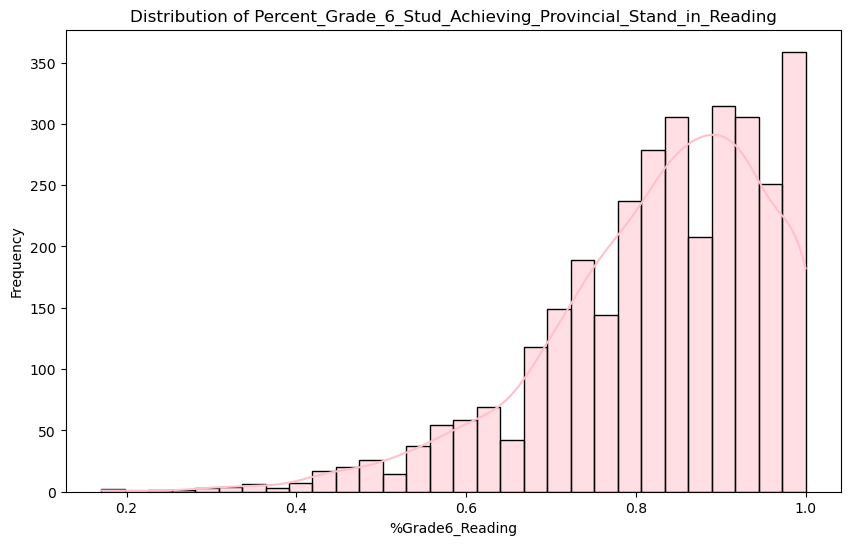

In [2371]:
#plotting a hist for Percent_Grade_6_Stud_Achieving_Provincial_Stand_in_Reading
plt.figure(figsize=(10, 6)) 
sns.histplot(plot_data7.dropna(), kde=True, bins=30, color='pink') 
plt.title('Distribution of Percent_Grade_6_Stud_Achieving_Provincial_Stand_in_Reading') #title and labels
plt.xlabel('%Grade6_Reading')
plt.ylabel('Frequency')

#### Based on the above, we can see that mean (0.825826), median (0.850000) and mode (1.00) for %Grade6_Reading have variation. 'The graph shows a left skew (negatively skewed)'. Therefore, I will resolve the missing null values by imputation based on median.

In [2372]:
#to fill null with median
df.loc[df['Grade_Range'].isin(['JK-8','JK-6','1-8','K-8','4-8','6-8','5-8','K-6','1-6']), '%Grade6_Reading'] = (
    df.loc[df['Grade_Range'].isin(['JK-8','JK-6','1-8','K-8','4-8','6-8','5-8','K-6','1-6']), '%Grade6_Reading'].fillna(plot_data7.median())
)

In [2373]:
#to check if change was done correctly
df[(df['Grade_Range'].isin(['JK-8','JK-6','1-8','K-8','4-8','6-8','5-8','K-6','1-6'])) & (df['%Grade6_Reading'].isna())]

Empty DataFrame
Columns: [Board_Number, Board_Name, Board_Type, School_Number, School_Name, School_Type, School_Spec_Cond_Code, School_Level, School_Lang, Grade_Range, Street, Municipality, City, Province, Postal_Code, Phone_Number, Fax_Number, School_Website, Board_Website, Enrolment, Latitude, Longitude, %Stud_FirstLang_Not_Eng, %Stud_FirstLang_Not_Fr, %Stud_New_Canada_Non-Eng_Cntry, %Stud_New_Canada_Non-Fr_Cntry, %Stud_Special_Ed, %Stud_Gifted, %Grade3_Reading, Change_G3_Read_3Yr, %Grade3_Writing, Change_G3_Write_3Yr, %Grade3_Math, Change_G3_Math_3Yr, %Grade6_Reading, Change_G6_Read_3Yr, %Grade6_Writing, Change_G6_Write_3Yr, %Grade6_Math, Change_G6_Math_3Yr, %Grade9_Math, Change_G9_Math_3Yr, %Grade10_OSSLT, Change_G10_OSSLT_3Yr, %Child_Livein_LowInc_HH, %Stud_Par_NoDegDipCert, Extract_Date]
Index: []

In [2374]:
df.isnull().sum() #to see null values remaining

Board_Number                         0
Board_Name                           0
Board_Type                           0
School_Number                        0
School_Name                          0
School_Type                          0
School_Spec_Cond_Code                0
School_Level                         0
School_Lang                          0
Grade_Range                          0
Street                               0
Municipality                         0
City                                 0
Province                             0
Postal_Code                          0
Phone_Number                         0
Fax_Number                           0
School_Website                       0
Board_Website                        0
Enrolment                            0
Latitude                             0
Longitude                            0
%Stud_FirstLang_Not_Eng              0
%Stud_FirstLang_Not_Fr               0
%Stud_New_Canada_Non-Eng_Cntry       0
%Stud_New_Canada_Non-Fr_C

# Change_G6_Read_3Yr - 1500 Missing Values

### I am assuming that Change_G6_Read_3Yr is null when the Grade Range does not include Grade 6. I will verify this below.

In [2375]:
df[df['Change_G6_Read_3Yr'].isnull()].head(20) #the data seems to support my assumption

Board_Number                    Board_Name               Board_Type  \
0        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
5        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
7        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
9        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
13       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
14       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
21       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
24       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
25       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
26       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
37       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
39       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
42       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
43       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
44       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
48       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
53       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
54       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
55       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
60       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   

   School_Number                                        School_Name  \
0         902344       Algoma Education Connection Secondary School   
5         137967                 Central Algoma Intermediate School   
7         891347                    Central Algoma Secondary School   
9         900869                               Chapleau High School   
13        293055                    Elliot Lake Intermediate School   
14        908010                       Elliot Lake Secondary School   
21        264750                           Hornepayne Public School   
24        920533             Korah Collegiate and Vocational School   
25        018309                          Korah Intermediate School   
26        926086                           Michipicoten High School   
37        958050  Superior Heights Collegiate and Vocational School   
39        106913               Superior Heights Intermediate School   
42        895270                         W C Eaket Secondary School   
43        953148       White Pines Collegiate and Vocational School   
44        144872                    White Pines Intermediate School   
48        715298               Holy Cross Catholic Secondary School   
53        728420                   Loyola Community Learning Centre   
54        835099                         Nicholson Catholic College   
55        690932           Nicholson Catholic College (Grade 7 & 8)   
60        752932         Regiopolis/Notre-Dame Catholic High School   

   School_Type School_Spec_Cond_Code School_Level School_Lang Grade_Range  \
0       Public           Alternative    Secondary     English        9-12   
5       Public        Not applicable   Elementary     English         7-8   
7       Public        Not applicable    Secondary     English        9-12   
9       Public        Not applicable    Secondary     English        9-12   
13      Public        Not applicable   Elementary     English         7-8   
14      Public        Not applicable    Secondary     English        9-12   
21      Public        Not applicable   Elementary     English        JK-8   
24      Public        Not applicable    Secondary     English        9-12   
25      Public        Not applicable   Elementary     English         7-8   
26      Public        Not applicable    Secondary     English        9-12   
37      Public        Not applicable    Secondary     English        9-12   
39      Public        Not applic

In [2376]:
df[(df['Grade_Range'].isin(['JK-8','JK-6','1-8','K-8','4-8','6-8','5-8','K-6','1-6'])) & (df['Change_G6_Read_3Yr'].isna())].head(10)

Board_Number                    Board_Name               Board_Type  \
21        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
63        B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
131       B80012                  Bloorview SA      Provincial/Hospital   
164       B66001                 Bluewater DSB   Pub Dist Sch Brd (E/F)   
192       B67164  Brant Haldimand Norfolk CDSB  Cath Dist Sch Brd (E/F)   
201       B67164  Brant Haldimand Norfolk CDSB  Cath Dist Sch Brd (E/F)   
223       B67008               Bruce-Grey CDSB  Cath Dist Sch Brd (E/F)   
244       B67172       CDSB of Eastern Ontario  Cath Dist Sch Brd (E/F)   
278       B67172       CDSB of Eastern Ontario  Cath Dist Sch Brd (E/F)   
280       B66303                   CS Viamonde   Pub Dist Sch Brd (E/F)   

    School_Number                         School_Name School_Type  \
21         264750            Hornepayne Public School      Public   
63         868370        Sacred Heart Catholic School    Catholic   
131        417556          Bloorview School Authority    Hospital   
164        323900       Lucknow Central Public School      Public   
192        743968           Our Lady of Fatima School    Catholic   
201        782050                St. Cecilia's School    Catholic   
223        864218        Sacred Heart Separate School    Catholic   
244        788686                  St Edward's School    Catholic   
278        773026  St. Thomas Aquinas Catholic School    Catholic   
280        023549            Académie Alexandre-Dumas      Public   

    School_Spec_Cond_Code School_Level School_Lang Grade_Range  \
21         Not applicable   Elementary     English        JK-8   
63         Not applicable   Elementary     English        JK-8   
131        Not applicable   Elementary     English        JK-8   
164        Not applicable   Elementary     English        JK-8   
192        Not applicable   Elementary     English        JK-8   
201        Not applicable   Elementary     English        JK-8   
223        Not applicable   Elementary     English        JK-8   
244        Not applicable   Elementary     English        JK-8   
278        Not applicable   Elementary     English         6-8   
280        Not applicable   Elementary      French        JK-6   

                         Street                    Municipality          City  \
21               162 Fourth Ave         Hornepayne, Township of    Hornepayne   
63                    57 Hwy 95  Frontenac Islands, Township of  Wolfe Island   
131              150 Kilgour Rd                Toronto, City of       Toronto   
164                  463 Bob St      Huron-Kinloss, Township of       Lucknow   
192               120 Talbot Rd                  Norfolk County     Courtland   
201             3 Lynn Park Ave                  Norfolk County    Port Dover   
223                18 Gordon St    South Bruce, Municipality of     Teeswater   
244               51 Bedford St            Westport, Village of      Westport   
278  1211 South Russell Rd RR 2            Russell, Township of       Russell   
280    255 Coronation promenade                Toronto, City of   Scarborough   

    Province Postal_Code  Phone_Number    Fax_Number  \
21   Ontario      P0M1Z0  807-868-2503  807-868-2126   
63   Ontario      K0H2Y0  613-385-2348  613-385-1415   
131  Ontario      M4G1R8  416-424-3831  416-425-2981   
164  Ontario      N0G2H0  519-528-3022  519-370-2938   
192  Ontario      N0J1E0  519-688-0049  416-325-2929   
201  Ontario      N0A1N5  519-583-0231  416-325-2929   
223  Ontario      N0G2S0  519-392-6854  519-392-8597   
244  Ontario      K0G1X0  613-273-2926  613-273-2636   
278  Ontario      K4R1E5  613-445-0810  613-445-1520   
280  Ontario      M1E2J3  416-283-7749  416-283-3080   

                                        School_Website  \
21   http://www.adsb.on.ca/sites/schools/hor/defaul...   
63   https://www.alcdsb.on.ca/school/shrt/Pages/def...   
131     

### Based on the above, we can see that some Grade 6–inclusive grade ranges contain null values for Change_G6_Read_3Yr. Therefore, we will create a histogram plot to determine whether these values should be replaced with the mean or the median.

In [2377]:
plot_data8 = pd.to_numeric(df['Change_G6_Read_3Yr'], errors='coerce') #for getting stats and plotting
plot_data8.describe() #to see stats

count    3207.000000
mean       -2.420954
std        11.866271
min       -61.000000
25%        -9.000000
50%        -2.000000
75%         4.000000
max        52.000000
Name: Change_G6_Read_3Yr, dtype: float64

In [2378]:
plot_data8.value_counts().head(5) #to see mode

Change_G6_Read_3Yr
 0.0    274
-3.0    143
-6.0    123
-5.0    122
-4.0    121
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

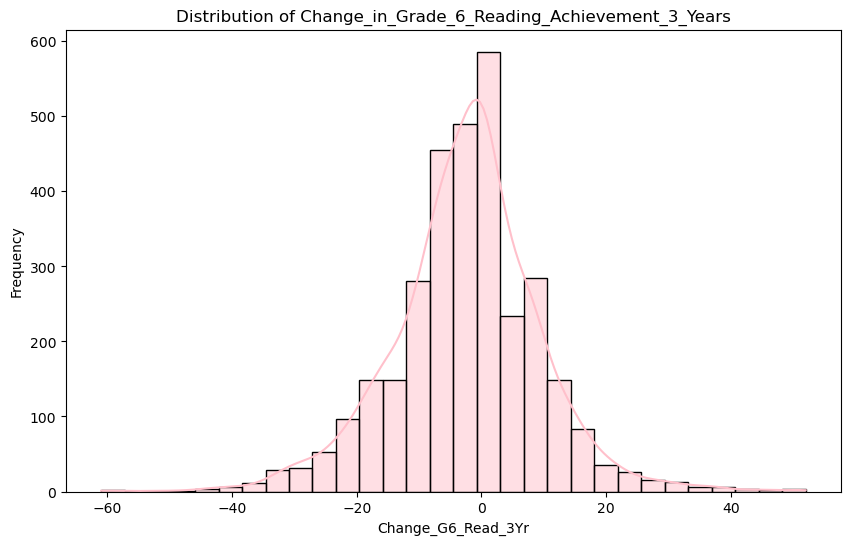

In [2379]:
#plotting a hist for Change_in_Grade_6_Reading_Achievement_3_Years
plt.figure(figsize=(10, 6)) 
sns.histplot(plot_data8.dropna(), kde=True, bins=30, color='pink') 
plt.title('Distribution of Change_in_Grade_6_Reading_Achievement_3_Years') #title and labels
plt.xlabel('Change_G6_Read_3Yr')
plt.ylabel('Frequency')

#### Based on the above, we can see that mean (-2.420954), median (-2.000000) and mode (0.0) for Change_G6_Read_3Yr have variation. However, the graph seems to represent a normal distribution. Therefore, I will resolve the missing null values by imputation based on mean.

In [2380]:
#to fill null with mean
df.loc[df['Grade_Range'].isin(['JK-8','JK-6','1-8','K-8','4-8','6-8','5-8','K-6','1-6']), 'Change_G6_Read_3Yr'] = (
    df.loc[df['Grade_Range'].isin(['JK-8','JK-6','1-8','K-8','4-8','6-8','5-8','K-6','1-6']), 'Change_G6_Read_3Yr'].fillna(plot_data8.mean())
)

In [2381]:
#to check if change was done correctly
df[(df['Grade_Range'].isin(['JK-8','JK-6','1-8','K-8','4-8','6-8','5-8','K-6','1-6'])) & (df['Change_G6_Read_3Yr'].isna())]

Empty DataFrame
Columns: [Board_Number, Board_Name, Board_Type, School_Number, School_Name, School_Type, School_Spec_Cond_Code, School_Level, School_Lang, Grade_Range, Street, Municipality, City, Province, Postal_Code, Phone_Number, Fax_Number, School_Website, Board_Website, Enrolment, Latitude, Longitude, %Stud_FirstLang_Not_Eng, %Stud_FirstLang_Not_Fr, %Stud_New_Canada_Non-Eng_Cntry, %Stud_New_Canada_Non-Fr_Cntry, %Stud_Special_Ed, %Stud_Gifted, %Grade3_Reading, Change_G3_Read_3Yr, %Grade3_Writing, Change_G3_Write_3Yr, %Grade3_Math, Change_G3_Math_3Yr, %Grade6_Reading, Change_G6_Read_3Yr, %Grade6_Writing, Change_G6_Write_3Yr, %Grade6_Math, Change_G6_Math_3Yr, %Grade9_Math, Change_G9_Math_3Yr, %Grade10_OSSLT, Change_G10_OSSLT_3Yr, %Child_Livein_LowInc_HH, %Stud_Par_NoDegDipCert, Extract_Date]
Index: []

In [2382]:
df.isnull().sum() #to see null values remaining

Board_Number                         0
Board_Name                           0
Board_Type                           0
School_Number                        0
School_Name                          0
School_Type                          0
School_Spec_Cond_Code                0
School_Level                         0
School_Lang                          0
Grade_Range                          0
Street                               0
Municipality                         0
City                                 0
Province                             0
Postal_Code                          0
Phone_Number                         0
Fax_Number                           0
School_Website                       0
Board_Website                        0
Enrolment                            0
Latitude                             0
Longitude                            0
%Stud_FirstLang_Not_Eng              0
%Stud_FirstLang_Not_Fr               0
%Stud_New_Canada_Non-Eng_Cntry       0
%Stud_New_Canada_Non-Fr_C

# %Grade6_Writing - 1359 Missing Values

### I am assuming that %Grade6_Writing  is null when the Grade Range does not include Grade 6. I will verify this below.

In [2383]:
df[df['%Grade6_Writing'].isnull()].head(20) #the data seems to support my assumption

Board_Number                    Board_Name               Board_Type  \
0        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
5        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
7        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
9        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
13       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
14       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
24       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
25       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
26       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
37       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
39       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
42       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
43       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
44       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
48       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
53       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
54       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
55       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
60       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
77       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   

   School_Number                                        School_Name  \
0         902344       Algoma Education Connection Secondary School   
5         137967                 Central Algoma Intermediate School   
7         891347                    Central Algoma Secondary School   
9         900869                               Chapleau High School   
13        293055                    Elliot Lake Intermediate School   
14        908010                       Elliot Lake Secondary School   
24        920533             Korah Collegiate and Vocational School   
25        018309                          Korah Intermediate School   
26        926086                           Michipicoten High School   
37        958050  Superior Heights Collegiate and Vocational School   
39        106913               Superior Heights Intermediate School   
42        895270                         W C Eaket Secondary School   
43        953148       White Pines Collegiate and Vocational School   
44        144872                    White Pines Intermediate School   
48        715298               Holy Cross Catholic Secondary School   
53        728420                   Loyola Community Learning Centre   
54        835099                         Nicholson Catholic College   
55        690932           Nicholson Catholic College (Grade 7 & 8)   
60        752932         Regiopolis/Notre-Dame Catholic High School   
77        706744                 St Paul Catholic Elementary School   

   School_Type School_Spec_Cond_Code School_Level School_Lang Grade_Range  \
0       Public           Alternative    Secondary     English        9-12   
5       Public        Not applicable   Elementary     English         7-8   
7       Public        Not applicable    Secondary     English        9-12   
9       Public        Not applicable    Secondary     English        9-12   
13      Public        Not applicable   Elementary     English         7-8   
14      Public        Not applicable    Secondary     English        9-12   
24      Public        Not applicable    Secondary     English        9-12   
25      Public        Not applicable   Elementary     English         7-8   
26      Public        Not applicable    Secondary     English        9-12   
37      Public        Not applicable    Secondary     English        9-12   
39      Public        Not applicable   Elementary     English         7-8   
42      Public        Not applic

In [2384]:
df[(df['Grade_Range'].isin(['JK-8','JK-6','1-8','K-8','4-8','6-8','5-8','K-6','1-6'])) & (df['%Grade6_Writing'].isna())].head(10)

Board_Number               Board_Name               Board_Type  \
131        B80012             Bloorview SA      Provincial/Hospital   
278        B67172  CDSB of Eastern Ontario  Cath Dist Sch Brd (E/F)   
424        B67318  CS catholique MonAvenir  Cath Dist Sch Brd (E/F)   
1322       B80020             Grandview SA      Provincial/Hospital   
1493       B66133               Halton DSB   Pub Dist Sch Brd (E/F)   
1527       B66133               Halton DSB   Pub Dist Sch Brd (E/F)   
1532       B66133               Halton DSB   Pub Dist Sch Brd (E/F)   
1644       B66141   Hamilton-Wentworth DSB   Pub Dist Sch Brd (E/F)   
1834       B66079  Kawartha Pine Ridge DSB   Pub Dist Sch Brd (E/F)   
1856       B66079  Kawartha Pine Ridge DSB   Pub Dist Sch Brd (E/F)   

     School_Number                         School_Name School_Type  \
131         417556          Bloorview School Authority    Hospital   
278         773026  St. Thomas Aquinas Catholic School    Catholic   
424         760021                   ÉÉC du Bon-Berger    Catholic   
1322        425729                    Grandview School    Hospital   
1493        212369        George Kennedy Public School      Public   
1527        414646               Oakwood Public School      Public   
1532        433888                  Park Public School      Public   
1644        196240        Frank Panabaker North School      Public   
1834        056723       Ganaraska Trail Public School      Public   
1856        384747             Newcastle Public School      Public   

     School_Spec_Cond_Code School_Level School_Lang Grade_Range  \
131         Not applicable   Elementary     English        JK-8   
278         Not applicable   Elementary     English         6-8   
424         Not applicable   Elementary      French        JK-6   
1322        Not applicable   Elementary     English        JK-8   
1493        Not applicable   Elementary     English        JK-6   
1527        Not applicable   Elementary     English        JK-6   
1532        Not applicable   Elementary     English        JK-6   
1644        Not applicable   Elementary     English        JK-6   
1834        Not applicable   Elementary     English        JK-6   
1856        Not applicable   Elementary     English        JK-6   

                          Street                 Municipality        City  \
131               150 Kilgour Rd             Toronto, City of     Toronto   
278   1211 South Russell Rd RR 2         Russell, Township of     Russell   
424             343 Jones Avenue             Toronto, City of     Toronto   
1322           600 Townline Rd S              Oshawa, City of      Oshawa   
1493                 75 Weber Dr        Halton Hills, Town of  Georgetown   
1527               357 Bartos Dr            Oakville, Town of    Oakville   
1532              6 Hyde Park Dr        Halton Hills, Town of  Georgetown   
1644            168 Huron Avenue        Hamilton, Township of    Ancaster   
1834              34 Percival St   Port Hope, Municipality of   Port Hope   
1856                50 Glass Crt  Clarington, Municipality of   Newcastle   

     Province Postal_Code  Phone_Number    Fax_Number  \
131   Ontario      M4G1R8  416-424-3831  416-425-2981   
278   Ontario      K4R1E5  613-445-0810  613-445-1520   
424   Ontario      M4J3G4  416-461-2674  416-465-1108   
1322  Ontario      L1H0C8  905-576-8403  905-576-4414   
1493  Ontario      L7G1C5  905-877-4381  905-877-7510   
1527  Ontario      L6K3E5  905-845-0412  905-845-5634   
1532  Ontario      L7G2B6  905-877-9301  905-877-3092   
1644  Ontario      L9G1V7  905-648-4115  905-648-4280   
1834  Ontario      L1A2B7  905-885-5631  905-885-7583   
1856  Ontario      L1B1M5  905-987-4262  905-987-1642   

                                    School_Website  \
131                  http://www.bloorviewschool.ca   
278                    http://www.sta-russell.com/   
424   https://www.ontario.ca/page/find-your-school   
1322    https://grandv

### Based on the above, we can see that some Grade 6–inclusive grade ranges contain null values for %Grade6_Writing. Therefore, we will create a histogram plot to determine whether these values should be replaced with the mean or the median.

In [2385]:
#Percent_Grade_6_Stud_Achieving_Provincial_Stand_in_Writing
plot_data9 = pd.to_numeric(df['%Grade6_Writing'], errors='coerce') #for getting stats and plotting
plot_data9.describe() #to see stats

count    3226.000000
mean        0.792188
std         0.140846
min         0.180000
25%         0.710000
50%         0.810000
75%         0.900000
max         1.000000
Name: %Grade6_Writing, dtype: float64

In [2386]:
plot_data9.value_counts().head(5) #to see mode

%Grade6_Writing
1.00    125
0.88    116
0.90    112
0.89    103
0.81    101
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

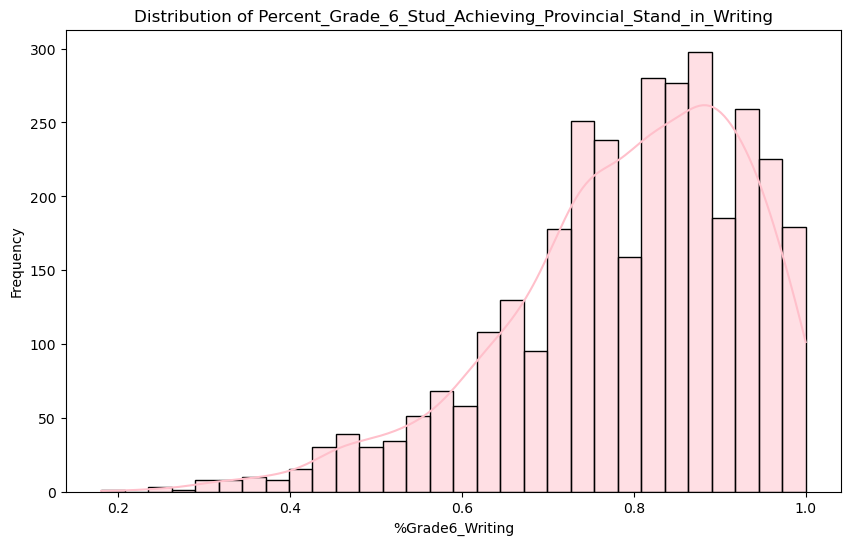

In [2387]:
#plotting a hist for Percent_Grade_6_Stud_Achieving_Provincial_Stand_in_Writing
plt.figure(figsize=(10, 6)) 
sns.histplot(plot_data9.dropna(), kde=True, bins=30, color='pink') 
plt.title('Distribution of Percent_Grade_6_Stud_Achieving_Provincial_Stand_in_Writing') #title and labels
plt.xlabel('%Grade6_Writing')
plt.ylabel('Frequency')

#### Based on the above, we can see that mean (0.792188), median (0.810000) and mode (1.00) for %Grade6_Writing have variation. 'The graph shows a left skew (negatively skewed)'. Therefore, I will resolve the missing null values by imputation based on median.

In [2388]:
#to fill null with median
df.loc[df['Grade_Range'].isin(['JK-8','JK-6','1-8','K-8','4-8','6-8','5-8','K-6','1-6']), '%Grade6_Writing'] = (
    df.loc[df['Grade_Range'].isin(['JK-8','JK-6','1-8','K-8','4-8','6-8','5-8','K-6','1-6']), '%Grade6_Writing'].fillna(plot_data9.median())
)

In [2389]:
#to check if change was done correctly
df[(df['Grade_Range'].isin(['JK-8','JK-6','1-8','K-8','4-8','6-8','5-8','K-6','1-6'])) & (df['%Grade6_Writing'].isna())]

Empty DataFrame
Columns: [Board_Number, Board_Name, Board_Type, School_Number, School_Name, School_Type, School_Spec_Cond_Code, School_Level, School_Lang, Grade_Range, Street, Municipality, City, Province, Postal_Code, Phone_Number, Fax_Number, School_Website, Board_Website, Enrolment, Latitude, Longitude, %Stud_FirstLang_Not_Eng, %Stud_FirstLang_Not_Fr, %Stud_New_Canada_Non-Eng_Cntry, %Stud_New_Canada_Non-Fr_Cntry, %Stud_Special_Ed, %Stud_Gifted, %Grade3_Reading, Change_G3_Read_3Yr, %Grade3_Writing, Change_G3_Write_3Yr, %Grade3_Math, Change_G3_Math_3Yr, %Grade6_Reading, Change_G6_Read_3Yr, %Grade6_Writing, Change_G6_Write_3Yr, %Grade6_Math, Change_G6_Math_3Yr, %Grade9_Math, Change_G9_Math_3Yr, %Grade10_OSSLT, Change_G10_OSSLT_3Yr, %Child_Livein_LowInc_HH, %Stud_Par_NoDegDipCert, Extract_Date]
Index: []

In [2390]:
df.isnull().sum() #to see null values remaining

Board_Number                         0
Board_Name                           0
Board_Type                           0
School_Number                        0
School_Name                          0
School_Type                          0
School_Spec_Cond_Code                0
School_Level                         0
School_Lang                          0
Grade_Range                          0
Street                               0
Municipality                         0
City                                 0
Province                             0
Postal_Code                          0
Phone_Number                         0
Fax_Number                           0
School_Website                       0
Board_Website                        0
Enrolment                            0
Latitude                             0
Longitude                            0
%Stud_FirstLang_Not_Eng              0
%Stud_FirstLang_Not_Fr               0
%Stud_New_Canada_Non-Eng_Cntry       0
%Stud_New_Canada_Non-Fr_C

# Change_G6_Write_3Yr - 1499 Missing Values

### I am assuming that Change_G6_Write_3Yr  is null when the Grade Range does not include Grade 6. I will verify this below.

In [2391]:
df[df['Change_G6_Write_3Yr'].isnull()].head(20) #the data seems to support my assumption

Board_Number                    Board_Name               Board_Type  \
0        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
5        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
7        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
9        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
13       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
14       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
21       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
24       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
25       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
26       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
37       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
39       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
42       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
43       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
44       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
48       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
53       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
54       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
55       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
60       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   

   School_Number                                        School_Name  \
0         902344       Algoma Education Connection Secondary School   
5         137967                 Central Algoma Intermediate School   
7         891347                    Central Algoma Secondary School   
9         900869                               Chapleau High School   
13        293055                    Elliot Lake Intermediate School   
14        908010                       Elliot Lake Secondary School   
21        264750                           Hornepayne Public School   
24        920533             Korah Collegiate and Vocational School   
25        018309                          Korah Intermediate School   
26        926086                           Michipicoten High School   
37        958050  Superior Heights Collegiate and Vocational School   
39        106913               Superior Heights Intermediate School   
42        895270                         W C Eaket Secondary School   
43        953148       White Pines Collegiate and Vocational School   
44        144872                    White Pines Intermediate School   
48        715298               Holy Cross Catholic Secondary School   
53        728420                   Loyola Community Learning Centre   
54        835099                         Nicholson Catholic College   
55        690932           Nicholson Catholic College (Grade 7 & 8)   
60        752932         Regiopolis/Notre-Dame Catholic High School   

   School_Type School_Spec_Cond_Code School_Level School_Lang Grade_Range  \
0       Public           Alternative    Secondary     English        9-12   
5       Public        Not applicable   Elementary     English         7-8   
7       Public        Not applicable    Secondary     English        9-12   
9       Public        Not applicable    Secondary     English        9-12   
13      Public        Not applicable   Elementary     English         7-8   
14      Public        Not applicable    Secondary     English        9-12   
21      Public        Not applicable   Elementary     English        JK-8   
24      Public        Not applicable    Secondary     English        9-12   
25      Public        Not applicable   Elementary     English         7-8   
26      Public        Not applicable    Secondary     English        9-12   
37      Public        Not applicable    Secondary     English        9-12   
39      Public        Not applic

In [2392]:
df[(df['Grade_Range'].isin(['JK-8','JK-6','1-8','K-8','4-8','6-8','5-8','K-6','1-6'])) & (df['Change_G6_Write_3Yr'].isna())].head(10)

Board_Number                    Board_Name               Board_Type  \
21        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
63        B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
131       B80012                  Bloorview SA      Provincial/Hospital   
164       B66001                 Bluewater DSB   Pub Dist Sch Brd (E/F)   
192       B67164  Brant Haldimand Norfolk CDSB  Cath Dist Sch Brd (E/F)   
201       B67164  Brant Haldimand Norfolk CDSB  Cath Dist Sch Brd (E/F)   
223       B67008               Bruce-Grey CDSB  Cath Dist Sch Brd (E/F)   
244       B67172       CDSB of Eastern Ontario  Cath Dist Sch Brd (E/F)   
278       B67172       CDSB of Eastern Ontario  Cath Dist Sch Brd (E/F)   
280       B66303                   CS Viamonde   Pub Dist Sch Brd (E/F)   

    School_Number                         School_Name School_Type  \
21         264750            Hornepayne Public School      Public   
63         868370        Sacred Heart Catholic School    Catholic   
131        417556          Bloorview School Authority    Hospital   
164        323900       Lucknow Central Public School      Public   
192        743968           Our Lady of Fatima School    Catholic   
201        782050                St. Cecilia's School    Catholic   
223        864218        Sacred Heart Separate School    Catholic   
244        788686                  St Edward's School    Catholic   
278        773026  St. Thomas Aquinas Catholic School    Catholic   
280        023549            Académie Alexandre-Dumas      Public   

    School_Spec_Cond_Code School_Level School_Lang Grade_Range  \
21         Not applicable   Elementary     English        JK-8   
63         Not applicable   Elementary     English        JK-8   
131        Not applicable   Elementary     English        JK-8   
164        Not applicable   Elementary     English        JK-8   
192        Not applicable   Elementary     English        JK-8   
201        Not applicable   Elementary     English        JK-8   
223        Not applicable   Elementary     English        JK-8   
244        Not applicable   Elementary     English        JK-8   
278        Not applicable   Elementary     English         6-8   
280        Not applicable   Elementary      French        JK-6   

                         Street                    Municipality          City  \
21               162 Fourth Ave         Hornepayne, Township of    Hornepayne   
63                    57 Hwy 95  Frontenac Islands, Township of  Wolfe Island   
131              150 Kilgour Rd                Toronto, City of       Toronto   
164                  463 Bob St      Huron-Kinloss, Township of       Lucknow   
192               120 Talbot Rd                  Norfolk County     Courtland   
201             3 Lynn Park Ave                  Norfolk County    Port Dover   
223                18 Gordon St    South Bruce, Municipality of     Teeswater   
244               51 Bedford St            Westport, Village of      Westport   
278  1211 South Russell Rd RR 2            Russell, Township of       Russell   
280    255 Coronation promenade                Toronto, City of   Scarborough   

    Province Postal_Code  Phone_Number    Fax_Number  \
21   Ontario      P0M1Z0  807-868-2503  807-868-2126   
63   Ontario      K0H2Y0  613-385-2348  613-385-1415   
131  Ontario      M4G1R8  416-424-3831  416-425-2981   
164  Ontario      N0G2H0  519-528-3022  519-370-2938   
192  Ontario      N0J1E0  519-688-0049  416-325-2929   
201  Ontario      N0A1N5  519-583-0231  416-325-2929   
223  Ontario      N0G2S0  519-392-6854  519-392-8597   
244  Ontario      K0G1X0  613-273-2926  613-273-2636   
278  Ontario      K4R1E5  613-445-0810  613-445-1520   
280  Ontario      M1E2J3  416-283-7749  416-283-3080   

                                        School_Website  \
21   http://www.adsb.on.ca/sites/schools/hor/defaul...   
63   https://www.alcdsb.on.ca/school/shrt/Pages/def...   
131     

### Based on the above, we can see that some Grade 6–inclusive grade ranges contain null values for Change_G6_Write_3Yr . Therefore, we will create a histogram plot to determine whether these values should be replaced with the mean or the median.

In [2393]:
#Change_in_Grade_6_Writing_Achievement_3_Years 
plot_data10 = pd.to_numeric(df['Change_G6_Write_3Yr'], errors='coerce') #for getting stats and plotting
plot_data10.describe() #to see stats

count    3208.000000
mean       -3.366584
std        13.028463
min       -57.000000
25%       -11.000000
50%        -3.000000
75%         4.000000
max        70.000000
Name: Change_G6_Write_3Yr, dtype: float64

In [2394]:
plot_data10.value_counts().head(5) #to see mode

Change_G6_Write_3Yr
 0.0    153
-5.0    141
-3.0    128
-2.0    121
-4.0    113
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

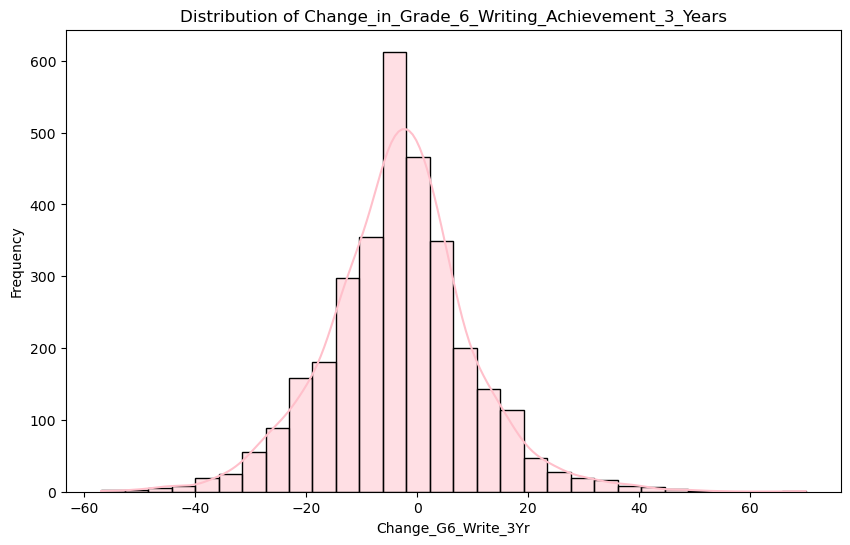

In [2395]:
#plotting a hist for Change_in_Grade_6_Writing_Achievement_3_Years
plt.figure(figsize=(10, 6)) 
sns.histplot(plot_data10.dropna(), kde=True, bins=30, color='pink') 
plt.title('Distribution of Change_in_Grade_6_Writing_Achievement_3_Years') #title and labels
plt.xlabel('Change_G6_Write_3Yr')
plt.ylabel('Frequency')

#### Based on the above, we can see that mean (-3.366584), median (-3.000000) and mode (0.0) for Change_G6_Write_3Yr have variation. However, the graph seems to represent a normal distribution. Therefore, I will resolve the missing null values by imputation based on mean.

In [2396]:
#to fill null with mean
df.loc[df['Grade_Range'].isin(['JK-8','JK-6','1-8','K-8','4-8','6-8','5-8','K-6','1-6']), 'Change_G6_Write_3Yr'] = (
    df.loc[df['Grade_Range'].isin(['JK-8','JK-6','1-8','K-8','4-8','6-8','5-8','K-6','1-6']), 'Change_G6_Write_3Yr'].fillna(plot_data10.mean())
)

In [2397]:
#Change_in_Grade_6_Writing_Achievement_3_Years
#to check if change was done correctly
df[(df['Grade_Range'].isin(['JK-8','JK-6','1-8','K-8','4-8','6-8','5-8','K-6','1-6'])) & (df['Change_G6_Write_3Yr'].isna())]

Empty DataFrame
Columns: [Board_Number, Board_Name, Board_Type, School_Number, School_Name, School_Type, School_Spec_Cond_Code, School_Level, School_Lang, Grade_Range, Street, Municipality, City, Province, Postal_Code, Phone_Number, Fax_Number, School_Website, Board_Website, Enrolment, Latitude, Longitude, %Stud_FirstLang_Not_Eng, %Stud_FirstLang_Not_Fr, %Stud_New_Canada_Non-Eng_Cntry, %Stud_New_Canada_Non-Fr_Cntry, %Stud_Special_Ed, %Stud_Gifted, %Grade3_Reading, Change_G3_Read_3Yr, %Grade3_Writing, Change_G3_Write_3Yr, %Grade3_Math, Change_G3_Math_3Yr, %Grade6_Reading, Change_G6_Read_3Yr, %Grade6_Writing, Change_G6_Write_3Yr, %Grade6_Math, Change_G6_Math_3Yr, %Grade9_Math, Change_G9_Math_3Yr, %Grade10_OSSLT, Change_G10_OSSLT_3Yr, %Child_Livein_LowInc_HH, %Stud_Par_NoDegDipCert, Extract_Date]
Index: []

In [2398]:
df.isnull().sum() #to see null values remaining

Board_Number                         0
Board_Name                           0
Board_Type                           0
School_Number                        0
School_Name                          0
School_Type                          0
School_Spec_Cond_Code                0
School_Level                         0
School_Lang                          0
Grade_Range                          0
Street                               0
Municipality                         0
City                                 0
Province                             0
Postal_Code                          0
Phone_Number                         0
Fax_Number                           0
School_Website                       0
Board_Website                        0
Enrolment                            0
Latitude                             0
Longitude                            0
%Stud_FirstLang_Not_Eng              0
%Stud_FirstLang_Not_Fr               0
%Stud_New_Canada_Non-Eng_Cntry       0
%Stud_New_Canada_Non-Fr_C

# %Grade6_Math - 1359 Missing Values

### I am assuming that %Grade6_Math is null when the Grade Range does not include Grade 6. I will verify this below.

In [2399]:
df[df['%Grade6_Math'].isnull()].head(20) #the data seems to support my assumption

Board_Number                    Board_Name               Board_Type  \
0        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
5        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
7        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
9        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
13       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
14       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
24       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
25       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
26       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
37       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
39       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
42       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
43       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
44       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
48       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
53       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
54       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
55       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
60       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
77       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   

   School_Number                                        School_Name  \
0         902344       Algoma Education Connection Secondary School   
5         137967                 Central Algoma Intermediate School   
7         891347                    Central Algoma Secondary School   
9         900869                               Chapleau High School   
13        293055                    Elliot Lake Intermediate School   
14        908010                       Elliot Lake Secondary School   
24        920533             Korah Collegiate and Vocational School   
25        018309                          Korah Intermediate School   
26        926086                           Michipicoten High School   
37        958050  Superior Heights Collegiate and Vocational School   
39        106913               Superior Heights Intermediate School   
42        895270                         W C Eaket Secondary School   
43        953148       White Pines Collegiate and Vocational School   
44        144872                    White Pines Intermediate School   
48        715298               Holy Cross Catholic Secondary School   
53        728420                   Loyola Community Learning Centre   
54        835099                         Nicholson Catholic College   
55        690932           Nicholson Catholic College (Grade 7 & 8)   
60        752932         Regiopolis/Notre-Dame Catholic High School   
77        706744                 St Paul Catholic Elementary School   

   School_Type School_Spec_Cond_Code School_Level School_Lang Grade_Range  \
0       Public           Alternative    Secondary     English        9-12   
5       Public        Not applicable   Elementary     English         7-8   
7       Public        Not applicable    Secondary     English        9-12   
9       Public        Not applicable    Secondary     English        9-12   
13      Public        Not applicable   Elementary     English         7-8   
14      Public        Not applicable    Secondary     English        9-12   
24      Public        Not applicable    Secondary     English        9-12   
25      Public        Not applicable   Elementary     English         7-8   
26      Public        Not applicable    Secondary     English        9-12   
37      Public        Not applicable    Secondary     English        9-12   
39      Public        Not applicable   Elementary     English         7-8   
42      Public        Not applic

In [2400]:
df[(df['Grade_Range'].isin(['JK-8','JK-6','1-8','K-8','4-8','6-8','5-8','K-6','1-6'])) & (df['%Grade6_Math'].isna())].head(10)

Board_Number               Board_Name               Board_Type  \
131        B80012             Bloorview SA      Provincial/Hospital   
278        B67172  CDSB of Eastern Ontario  Cath Dist Sch Brd (E/F)   
424        B67318  CS catholique MonAvenir  Cath Dist Sch Brd (E/F)   
1322       B80020             Grandview SA      Provincial/Hospital   
1493       B66133               Halton DSB   Pub Dist Sch Brd (E/F)   
1527       B66133               Halton DSB   Pub Dist Sch Brd (E/F)   
1532       B66133               Halton DSB   Pub Dist Sch Brd (E/F)   
1644       B66141   Hamilton-Wentworth DSB   Pub Dist Sch Brd (E/F)   
1834       B66079  Kawartha Pine Ridge DSB   Pub Dist Sch Brd (E/F)   
1856       B66079  Kawartha Pine Ridge DSB   Pub Dist Sch Brd (E/F)   

     School_Number                         School_Name School_Type  \
131         417556          Bloorview School Authority    Hospital   
278         773026  St. Thomas Aquinas Catholic School    Catholic   
424         760021                   ÉÉC du Bon-Berger    Catholic   
1322        425729                    Grandview School    Hospital   
1493        212369        George Kennedy Public School      Public   
1527        414646               Oakwood Public School      Public   
1532        433888                  Park Public School      Public   
1644        196240        Frank Panabaker North School      Public   
1834        056723       Ganaraska Trail Public School      Public   
1856        384747             Newcastle Public School      Public   

     School_Spec_Cond_Code School_Level School_Lang Grade_Range  \
131         Not applicable   Elementary     English        JK-8   
278         Not applicable   Elementary     English         6-8   
424         Not applicable   Elementary      French        JK-6   
1322        Not applicable   Elementary     English        JK-8   
1493        Not applicable   Elementary     English        JK-6   
1527        Not applicable   Elementary     English        JK-6   
1532        Not applicable   Elementary     English        JK-6   
1644        Not applicable   Elementary     English        JK-6   
1834        Not applicable   Elementary     English        JK-6   
1856        Not applicable   Elementary     English        JK-6   

                          Street                 Municipality        City  \
131               150 Kilgour Rd             Toronto, City of     Toronto   
278   1211 South Russell Rd RR 2         Russell, Township of     Russell   
424             343 Jones Avenue             Toronto, City of     Toronto   
1322           600 Townline Rd S              Oshawa, City of      Oshawa   
1493                 75 Weber Dr        Halton Hills, Town of  Georgetown   
1527               357 Bartos Dr            Oakville, Town of    Oakville   
1532              6 Hyde Park Dr        Halton Hills, Town of  Georgetown   
1644            168 Huron Avenue        Hamilton, Township of    Ancaster   
1834              34 Percival St   Port Hope, Municipality of   Port Hope   
1856                50 Glass Crt  Clarington, Municipality of   Newcastle   

     Province Postal_Code  Phone_Number    Fax_Number  \
131   Ontario      M4G1R8  416-424-3831  416-425-2981   
278   Ontario      K4R1E5  613-445-0810  613-445-1520   
424   Ontario      M4J3G4  416-461-2674  416-465-1108   
1322  Ontario      L1H0C8  905-576-8403  905-576-4414   
1493  Ontario      L7G1C5  905-877-4381  905-877-7510   
1527  Ontario      L6K3E5  905-845-0412  905-845-5634   
1532  Ontario      L7G2B6  905-877-9301  905-877-3092   
1644  Ontario      L9G1V7  905-648-4115  905-648-4280   
1834  Ontario      L1A2B7  905-885-5631  905-885-7583   
1856  Ontario      L1B1M5  905-987-4262  905-987-1642   

                                    School_Website  \
131                  http://www.bloorviewschool.ca   
278                    http://www.sta-russell.com/   
424   https://www.ontario.ca/page/find-your-school   
1322    https://grandv

### Based on the above, we can see that some Grade 6–inclusive grade ranges contain null values for %Grade6_Math. Therefore, we will create a histogram plot to determine whether these values should be replaced with the mean or the median.

In [2401]:
plot_data11 = pd.to_numeric(df['%Grade6_Math'], errors='coerce') #for getting stats and plotting
plot_data11.describe() #to see stats

count    3223.000000
mean        0.488219
std         0.195678
min         0.000000
25%         0.350000
50%         0.480000
75%         0.625000
max         1.000000
Name: %Grade6_Math, dtype: float64

In [2402]:
plot_data11.value_counts().head(5) #to see mode

%Grade6_Math
0.50    82
0.38    76
0.58    75
0.62    71
0.44    71
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

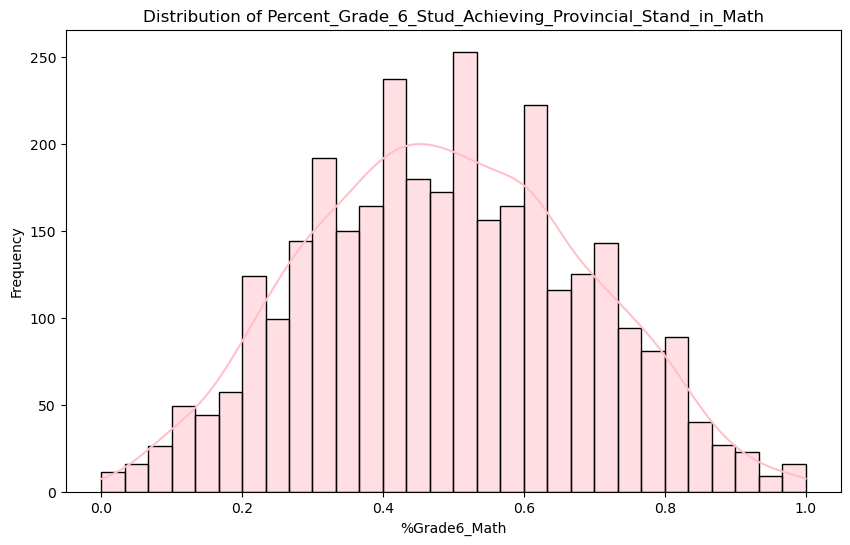

In [2403]:
#plotting a hist for Percent_Grade_6_Stud_Achieving_Provincial_Stand_in_Math
plt.figure(figsize=(10, 6)) 
sns.histplot(plot_data11.dropna(), kde=True, bins=30, color='pink') 
plt.title('Distribution of Percent_Grade_6_Stud_Achieving_Provincial_Stand_in_Math') #title and labels
plt.xlabel('%Grade6_Math')
plt.ylabel('Frequency')

#### Based on the above, we can see that mean (0.488219), median (0.480000) and mode (0.50) for Percent_Grade_6_Stud_Achieving_Provincial_Stand_in_Math are similar. And the graph seems to represent a normal distribution. Therefore, I will resolve the missing null values by imputation based on mean.

In [2404]:
#to fill null with mean
df.loc[df['Grade_Range'].isin(['JK-8','JK-6','1-8','K-8','4-8','6-8','5-8','K-6','1-6']), '%Grade6_Math'] = (
    df.loc[df['Grade_Range'].isin(['JK-8','JK-6','1-8','K-8','4-8','6-8','5-8','K-6','1-6']), '%Grade6_Math'].fillna(plot_data11.mean())
)

In [2405]:
#to check if change was done correctly
df[(df['Grade_Range'].isin(['JK-8','JK-6','1-8','K-8','4-8','6-8','5-8','K-6','1-6'])) & (df['%Grade6_Math'].isna())]

Empty DataFrame
Columns: [Board_Number, Board_Name, Board_Type, School_Number, School_Name, School_Type, School_Spec_Cond_Code, School_Level, School_Lang, Grade_Range, Street, Municipality, City, Province, Postal_Code, Phone_Number, Fax_Number, School_Website, Board_Website, Enrolment, Latitude, Longitude, %Stud_FirstLang_Not_Eng, %Stud_FirstLang_Not_Fr, %Stud_New_Canada_Non-Eng_Cntry, %Stud_New_Canada_Non-Fr_Cntry, %Stud_Special_Ed, %Stud_Gifted, %Grade3_Reading, Change_G3_Read_3Yr, %Grade3_Writing, Change_G3_Write_3Yr, %Grade3_Math, Change_G3_Math_3Yr, %Grade6_Reading, Change_G6_Read_3Yr, %Grade6_Writing, Change_G6_Write_3Yr, %Grade6_Math, Change_G6_Math_3Yr, %Grade9_Math, Change_G9_Math_3Yr, %Grade10_OSSLT, Change_G10_OSSLT_3Yr, %Child_Livein_LowInc_HH, %Stud_Par_NoDegDipCert, Extract_Date]
Index: []

In [2406]:
df.isnull().sum() #to see null values remaining

Board_Number                         0
Board_Name                           0
Board_Type                           0
School_Number                        0
School_Name                          0
School_Type                          0
School_Spec_Cond_Code                0
School_Level                         0
School_Lang                          0
Grade_Range                          0
Street                               0
Municipality                         0
City                                 0
Province                             0
Postal_Code                          0
Phone_Number                         0
Fax_Number                           0
School_Website                       0
Board_Website                        0
Enrolment                            0
Latitude                             0
Longitude                            0
%Stud_FirstLang_Not_Eng              0
%Stud_FirstLang_Not_Fr               0
%Stud_New_Canada_Non-Eng_Cntry       0
%Stud_New_Canada_Non-Fr_C

# Change_G6_Math_3Yr - 1502 Missing Values

#### I am assuming that Change_G6_Math_3Yr is null when the Grade Range does not include Grade 6. I will verify this below.

In [2407]:
df[df['Change_G6_Math_3Yr'].isnull()].head(20) #the data seems to support my assumption

Board_Number                    Board_Name               Board_Type  \
0        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
5        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
7        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
9        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
13       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
14       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
21       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
24       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
25       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
26       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
37       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
39       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
42       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
43       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
44       B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
48       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
53       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
54       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
55       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
60       B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   

   School_Number                                        School_Name  \
0         902344       Algoma Education Connection Secondary School   
5         137967                 Central Algoma Intermediate School   
7         891347                    Central Algoma Secondary School   
9         900869                               Chapleau High School   
13        293055                    Elliot Lake Intermediate School   
14        908010                       Elliot Lake Secondary School   
21        264750                           Hornepayne Public School   
24        920533             Korah Collegiate and Vocational School   
25        018309                          Korah Intermediate School   
26        926086                           Michipicoten High School   
37        958050  Superior Heights Collegiate and Vocational School   
39        106913               Superior Heights Intermediate School   
42        895270                         W C Eaket Secondary School   
43        953148       White Pines Collegiate and Vocational School   
44        144872                    White Pines Intermediate School   
48        715298               Holy Cross Catholic Secondary School   
53        728420                   Loyola Community Learning Centre   
54        835099                         Nicholson Catholic College   
55        690932           Nicholson Catholic College (Grade 7 & 8)   
60        752932         Regiopolis/Notre-Dame Catholic High School   

   School_Type School_Spec_Cond_Code School_Level School_Lang Grade_Range  \
0       Public           Alternative    Secondary     English        9-12   
5       Public        Not applicable   Elementary     English         7-8   
7       Public        Not applicable    Secondary     English        9-12   
9       Public        Not applicable    Secondary     English        9-12   
13      Public        Not applicable   Elementary     English         7-8   
14      Public        Not applicable    Secondary     English        9-12   
21      Public        Not applicable   Elementary     English        JK-8   
24      Public        Not applicable    Secondary     English        9-12   
25      Public        Not applicable   Elementary     English         7-8   
26      Public        Not applicable    Secondary     English        9-12   
37      Public        Not applicable    Secondary     English        9-12   
39      Public        Not applic

In [2408]:
df[(df['Grade_Range'].isin(['JK-8','JK-6','1-8','K-8','4-8','6-8','5-8','K-6','1-6'])) & (df['Change_G6_Math_3Yr'].isna())].head(10)

Board_Number                    Board_Name               Board_Type  \
21        B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
63        B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
131       B80012                  Bloorview SA      Provincial/Hospital   
164       B66001                 Bluewater DSB   Pub Dist Sch Brd (E/F)   
192       B67164  Brant Haldimand Norfolk CDSB  Cath Dist Sch Brd (E/F)   
201       B67164  Brant Haldimand Norfolk CDSB  Cath Dist Sch Brd (E/F)   
223       B67008               Bruce-Grey CDSB  Cath Dist Sch Brd (E/F)   
244       B67172       CDSB of Eastern Ontario  Cath Dist Sch Brd (E/F)   
278       B67172       CDSB of Eastern Ontario  Cath Dist Sch Brd (E/F)   
280       B66303                   CS Viamonde   Pub Dist Sch Brd (E/F)   

    School_Number                         School_Name School_Type  \
21         264750            Hornepayne Public School      Public   
63         868370        Sacred Heart Catholic School    Catholic   
131        417556          Bloorview School Authority    Hospital   
164        323900       Lucknow Central Public School      Public   
192        743968           Our Lady of Fatima School    Catholic   
201        782050                St. Cecilia's School    Catholic   
223        864218        Sacred Heart Separate School    Catholic   
244        788686                  St Edward's School    Catholic   
278        773026  St. Thomas Aquinas Catholic School    Catholic   
280        023549            Académie Alexandre-Dumas      Public   

    School_Spec_Cond_Code School_Level School_Lang Grade_Range  \
21         Not applicable   Elementary     English        JK-8   
63         Not applicable   Elementary     English        JK-8   
131        Not applicable   Elementary     English        JK-8   
164        Not applicable   Elementary     English        JK-8   
192        Not applicable   Elementary     English        JK-8   
201        Not applicable   Elementary     English        JK-8   
223        Not applicable   Elementary     English        JK-8   
244        Not applicable   Elementary     English        JK-8   
278        Not applicable   Elementary     English         6-8   
280        Not applicable   Elementary      French        JK-6   

                         Street                    Municipality          City  \
21               162 Fourth Ave         Hornepayne, Township of    Hornepayne   
63                    57 Hwy 95  Frontenac Islands, Township of  Wolfe Island   
131              150 Kilgour Rd                Toronto, City of       Toronto   
164                  463 Bob St      Huron-Kinloss, Township of       Lucknow   
192               120 Talbot Rd                  Norfolk County     Courtland   
201             3 Lynn Park Ave                  Norfolk County    Port Dover   
223                18 Gordon St    South Bruce, Municipality of     Teeswater   
244               51 Bedford St            Westport, Village of      Westport   
278  1211 South Russell Rd RR 2            Russell, Township of       Russell   
280    255 Coronation promenade                Toronto, City of   Scarborough   

    Province Postal_Code  Phone_Number    Fax_Number  \
21   Ontario      P0M1Z0  807-868-2503  807-868-2126   
63   Ontario      K0H2Y0  613-385-2348  613-385-1415   
131  Ontario      M4G1R8  416-424-3831  416-425-2981   
164  Ontario      N0G2H0  519-528-3022  519-370-2938   
192  Ontario      N0J1E0  519-688-0049  416-325-2929   
201  Ontario      N0A1N5  519-583-0231  416-325-2929   
223  Ontario      N0G2S0  519-392-6854  519-392-8597   
244  Ontario      K0G1X0  613-273-2926  613-273-2636   
278  Ontario      K4R1E5  613-445-0810  613-445-1520   
280  Ontario      M1E2J3  416-283-7749  416-283-3080   

                                        School_Website  \
21   http://www.adsb.on.ca/sites/schools/hor/defaul...   
63   https://www.alcdsb.on.ca/school/shrt/Pages/def...   
131     

### Based on the above, we can see that some Grade 6–inclusive grade ranges contain null values for Change_G6_Math_3Yr. Therefore, we will create a histogram plot to determine whether these values should be replaced with the mean or the median.

In [2409]:
#Change_in_Grade_6_Math_Achievement_3_Years
plot_data12 = pd.to_numeric(df['Change_G6_Math_3Yr'], errors='coerce') #for getting stats and plotting
plot_data12.describe() #to see stats

count    3205.000000
mean        3.741030
std        17.019936
min       -89.000000
25%        -6.000000
50%         3.000000
75%        14.000000
max        88.000000
Name: Change_G6_Math_3Yr, dtype: float64

In [2410]:
plot_data12.value_counts().head(5) #to see mode

Change_G6_Math_3Yr
 3.0    108
-3.0     93
 0.0     92
-2.0     91
 2.0     90
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

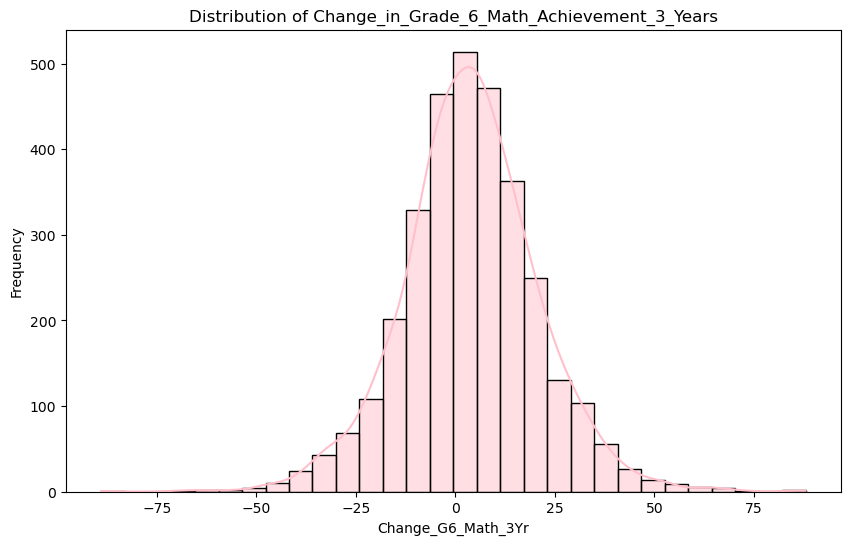

In [2411]:
#plotting a hist for Change_in_Grade_6_Math_Achievement_3_Years
plt.figure(figsize=(10, 6)) 
sns.histplot(plot_data12.dropna(), kde=True, bins=30, color='pink') 
plt.title('Distribution of Change_in_Grade_6_Math_Achievement_3_Years') #title and labels
plt.xlabel('Change_G6_Math_3Yr')
plt.ylabel('Frequency')

#### Based on the above, we can see that mean (3.741030), median (3.000000) and mode (3.0) for Change_G6_Math_3Yr have only slight variation. And the graph shows a normal distribution. Therefore, I will resolve the missing null values by imputation based on mean.

In [2412]:
#to fill null with mean
df.loc[df['Grade_Range'].isin(['JK-8','JK-6','1-8','K-8','4-8','6-8','5-8','K-6','1-6']), 'Change_G6_Math_3Yr'] = (
    df.loc[df['Grade_Range'].isin(['JK-8','JK-6','1-8','K-8','4-8','6-8','5-8','K-6','1-6']), 'Change_G6_Math_3Yr'].fillna(plot_data12.mean())
)

In [2413]:
#to check if change was done correctly
df[(df['Grade_Range'].isin(['JK-8','JK-6','1-8','K-8','4-8','6-8','5-8','K-6','1-6'])) & (df['Change_G6_Math_3Yr'].isna())]

Empty DataFrame
Columns: [Board_Number, Board_Name, Board_Type, School_Number, School_Name, School_Type, School_Spec_Cond_Code, School_Level, School_Lang, Grade_Range, Street, Municipality, City, Province, Postal_Code, Phone_Number, Fax_Number, School_Website, Board_Website, Enrolment, Latitude, Longitude, %Stud_FirstLang_Not_Eng, %Stud_FirstLang_Not_Fr, %Stud_New_Canada_Non-Eng_Cntry, %Stud_New_Canada_Non-Fr_Cntry, %Stud_Special_Ed, %Stud_Gifted, %Grade3_Reading, Change_G3_Read_3Yr, %Grade3_Writing, Change_G3_Write_3Yr, %Grade3_Math, Change_G3_Math_3Yr, %Grade6_Reading, Change_G6_Read_3Yr, %Grade6_Writing, Change_G6_Write_3Yr, %Grade6_Math, Change_G6_Math_3Yr, %Grade9_Math, Change_G9_Math_3Yr, %Grade10_OSSLT, Change_G10_OSSLT_3Yr, %Child_Livein_LowInc_HH, %Stud_Par_NoDegDipCert, Extract_Date]
Index: []

In [2414]:
df.isnull().sum() #to see null values remaining

Board_Number                         0
Board_Name                           0
Board_Type                           0
School_Number                        0
School_Name                          0
School_Type                          0
School_Spec_Cond_Code                0
School_Level                         0
School_Lang                          0
Grade_Range                          0
Street                               0
Municipality                         0
City                                 0
Province                             0
Postal_Code                          0
Phone_Number                         0
Fax_Number                           0
School_Website                       0
Board_Website                        0
Enrolment                            0
Latitude                             0
Longitude                            0
%Stud_FirstLang_Not_Eng              0
%Stud_FirstLang_Not_Fr               0
%Stud_New_Canada_Non-Eng_Cntry       0
%Stud_New_Canada_Non-Fr_C

# %Grade9_Math - 3930 Missing Values
 

### I am assuming that %Grade9_Math is null when the Grade Range does not include Grade 9. I will verify this below.

In [2415]:
df[df['%Grade9_Math'].isnull()].head(20) #the data seems to support my assumption

Board_Number  Board_Name              Board_Type School_Number  \
1        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        019186   
2        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        043362   
3        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        054542   
4        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        490822   
5        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        137967   
6        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        285552   
8        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        093548   
10       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        101214   
11       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        161276   
12       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        165042   
13       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        293055   
15       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        186783   
16       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        202614   
17       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        227331   
18       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        230561   
19       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        237191   
21       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        264750   
22       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        278270   
23       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        302350   
25       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        018309   

                              School_Name School_Type School_Spec_Cond_Code  \
1               Anna McCrea Public School      Public        Not applicable   
2            Ben R McMullin Public School      Public        Not applicable   
3               Blind River Public School      Public        Not applicable   
4   Boreal French Immersion Public School      Public        Not applicable   
5      Central Algoma Intermediate School      Public        Not applicable   
6            Central Algoma Public School      Public        Not applicable   
8            Central Avenue Public School      Public        Not applicable   
10                 Chapleau Public School      Public        Not applicable   
11                East View Public School      Public        Not applicable   
12         Echo Bay Central Public School      Public        Not applicable   
13        Elliot Lake Intermediate School      Public        Not applicable   
15               Esten Park Public School      Public        Not applicable   
16        Francis H Clergue Public School      Public        Not applicable   
17               Grand View Public School      Public        Not applicable   
18                Greenwood Public School      Public        Not applicable   
19              H M Robbins Public School      Public        Not applicable   
21               Hornepayne Public School      Public        Not applicable   
22          Isabel Fletcher Public School      Public        Not applicable   
23                  Kiwedin Public School      Public        Not applicable   
25              Korah Intermediate School      Public        Not applicable   

   School_Level School_Lang Grade_Range                  Street  \
1    Elementary     English        JK-8             250 Mark St   
2    Elementary     English        JK-8         24 Paradise Ave   
3    Elementary     English        JK-8            19 Hanes Ave   
4    Elementary     English        JK-8        232 Northern Ave   
5    Elementary     English         7-8      32 Kensington Road   
6    Elementary     English        JK-6           5 Margaret St   
8    Elementary     English        JK-8          81 Central Ave   
10   Elementary     English        JK-8              24 Pine St   
11   Elementary     English        JK-8          75 Arizona Ave   
12   Elementary     English        JK-6           290 Church St   
13   Elementary     English         7-8  303 Mississauga Avenue   
15   Elementary     English        JK-8         115 Hergott Ave   
16   Elementary     En

In [2416]:
df['Grade_Range'].unique() #to see the grade ranges that include Grade 9

array(['9-12', 'JK-8', '7-8', 'JK-6', 'JK-2', '1-8', 'JK-3', '4-8', '6-8',
       'JK-4', '5-8', 'JK-5', 'K-8', 'K-6', '1-5', '1-6'], dtype=object)

In [2417]:
df[(df['Grade_Range'] == '9-12') & (df['%Grade9_Math'].isna())].head(10)

Board_Number                       Board_Name               Board_Type  \
53         B67202     Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
137        B66001                    Bluewater DSB   Pub Dist Sch Brd (E/F)   
602        B67334  CSDC du Centre-Est de l'Ontario  Cath Dist Sch Brd (E/F)   
729        B66311        CÉP de l'Est de l'Ontario   Pub Dist Sch Brd (E/F)   
827        B66150                      DSB Niagara   Pub Dist Sch Brd (E/F)   
1152       B66060                       Durham DSB   Pub Dist Sch Brd (E/F)   
1275       B66168                   Grand Erie DSB   Pub Dist Sch Brd (E/F)   
1313       B66168                   Grand Erie DSB   Pub Dist Sch Brd (E/F)   
1389       B66028         Greater Essex County DSB   Pub Dist Sch Brd (E/F)   
1491       B66133                       Halton DSB   Pub Dist Sch Brd (E/F)   

     School_Number                                        School_Name  \
53          728420                   Loyola Community Learning Centre   
137         918587             Bluewater Alternative Education School   
602         757618  École secondaire catholique d'apprentissage vi...   
729         922609          École secondaire des adultes Le Carrefour   
827         922854          Lifetime Learning Centre Secondary School   
1152        905585                Durham Alternative Secondary School   
1275        891304                   Grand Erie Learning Alternatives   
1313        916412  Tollgate Technological Skills Centre Secondary...   
1389        953822        Windsor Public Alternative Secondary School   
1491        940968                Gary Allan High School - Burlington   

     School_Type    School_Spec_Cond_Code School_Level School_Lang  \
53      Catholic                    Adult    Secondary     English   
137       Public              Alternative    Secondary     English   
602     Catholic           Not applicable    Secondary      French   
729       Public                    Adult    Secondary      French   
827       Public              Alternative    Secondary     English   
1152      Public              Alternative    Secondary     English   
1275      Public              Alternative    Secondary     English   
1313      Public  Vocational/Occupational    Secondary     English   
1389      Public              Alternative    Secondary     English   
1491      Public              Alternative    Secondary     English   

     Grade_Range                     Street                      Municipality  \
53          9-12       1440 Princess Street                 Kingston, City of   
137         9-12           351 1St Avenue 2  Arran-Elderslie, Municipality of   
602         9-12             96 Empress Ave                   Ottawa, City of   
729         9-12  2445 St-Laurent boulevard                   Ottawa, City of   
827         9-12            34 Catherine St           St. Catharines, City of   
1152        9-12          240 Simcoe Street                   Oshawa, City of   
1275        9-12              365 Rawdon St                Brantford, City of   
1313        9-12            112 Tollgate Rd                Brantford, City of   
1389        9-12            284 Cameron Ave                  Windsor, City of   
1491        9-12                3250 New St               Burlington, City of   

               City Province Postal_Code  Phone_Number    Fax_Number  \
53         Kingston  Ontario      K7M3E5  613-544-3361  613-547-0999   
137         Chesley  Ontario      N0G1L0  519-363-2014  416-325-2929   
602          Ottawa  Ontario      K1R7G3  416-325-2929  416-325-2929   
729          Ottawa  Ontario      K1G6C3  613-731-7212  613-731-9629   
827   St Catharines  Ontario      L2R5E7  905-646-3737  905-646-9377   
1152         Oshawa  Ontario      L1H4H4  905-579-1990  905-579-9722   
1275      Brantford  Ontario      N3S6J3  519-753-6079  519-753-6690   
1313      Brantford  Ontario      N3R4Z6  519-759-3691  519-759-6444   
1389        Windsor 

### Based on the above, we can see that some Grade 9–inclusive grade ranges contain null values for %Grade9_Math. Therefore, we will create a histogram plot to determine whether these values should be replaced with the mean or the median.

In [2418]:
plot_data13 = pd.to_numeric(df['%Grade9_Math'], errors='coerce') #for getting stats and plotting
plot_data13.describe() #to see stats

count    744.000000
mean       0.501022
std        0.177308
min        0.000000
25%        0.380000
50%        0.500000
75%        0.620000
max        1.000000
Name: %Grade9_Math, dtype: float64

In [2419]:
plot_data13.value_counts().head(5) #to see mode

%Grade9_Math
0.42    26
0.60    22
0.56    22
0.58    21
0.43    19
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

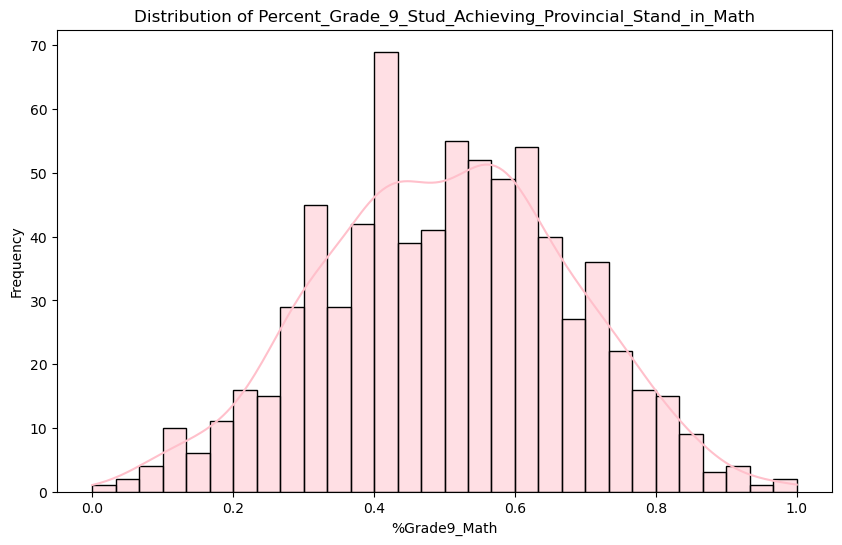

In [2420]:
#plotting a hist for Percent_Grade_9_Stud_Achieving_Provincial_Stand_in_Math
plt.figure(figsize=(10, 6)) 
sns.histplot(plot_data13.dropna(), kde=True, bins=30, color='pink') 
plt.title('Distribution of Percent_Grade_9_Stud_Achieving_Provincial_Stand_in_Math') #title and labels
plt.xlabel('%Grade9_Math')
plt.ylabel('Frequency')

#### Based on the above, we can see that mean (0.501022), median (0.500000) and mode (0.42) for %Grade9_Math are somewhat similar. And the graph seems to represent a normal distribution. Therefore, I will resolve the missing null values by imputation based on mean.

In [2421]:
#to fill null with mean
df.loc[df['Grade_Range'] == '9-12', '%Grade9_Math'] = (
    df.loc[df['Grade_Range'] == '9-12', '%Grade9_Math'].fillna(plot_data13.mean())
)

In [2422]:
#to check if change was done correctly
df[(df['Grade_Range'] == '9-12') & (df['%Grade9_Math'].isna())]

Empty DataFrame
Columns: [Board_Number, Board_Name, Board_Type, School_Number, School_Name, School_Type, School_Spec_Cond_Code, School_Level, School_Lang, Grade_Range, Street, Municipality, City, Province, Postal_Code, Phone_Number, Fax_Number, School_Website, Board_Website, Enrolment, Latitude, Longitude, %Stud_FirstLang_Not_Eng, %Stud_FirstLang_Not_Fr, %Stud_New_Canada_Non-Eng_Cntry, %Stud_New_Canada_Non-Fr_Cntry, %Stud_Special_Ed, %Stud_Gifted, %Grade3_Reading, Change_G3_Read_3Yr, %Grade3_Writing, Change_G3_Write_3Yr, %Grade3_Math, Change_G3_Math_3Yr, %Grade6_Reading, Change_G6_Read_3Yr, %Grade6_Writing, Change_G6_Write_3Yr, %Grade6_Math, Change_G6_Math_3Yr, %Grade9_Math, Change_G9_Math_3Yr, %Grade10_OSSLT, Change_G10_OSSLT_3Yr, %Child_Livein_LowInc_HH, %Stud_Par_NoDegDipCert, Extract_Date]
Index: []

In [2423]:
df.isnull().sum() #to see null values remaining

Board_Number                         0
Board_Name                           0
Board_Type                           0
School_Number                        0
School_Name                          0
School_Type                          0
School_Spec_Cond_Code                0
School_Level                         0
School_Lang                          0
Grade_Range                          0
Street                               0
Municipality                         0
City                                 0
Province                             0
Postal_Code                          0
Phone_Number                         0
Fax_Number                           0
School_Website                       0
Board_Website                        0
Enrolment                            0
Latitude                             0
Longitude                            0
%Stud_FirstLang_Not_Eng              0
%Stud_FirstLang_Not_Fr               0
%Stud_New_Canada_Non-Eng_Cntry       0
%Stud_New_Canada_Non-Fr_C

# Change_G9_Math_3Yr - 4023 Missing Values

### I am assuming that Change_G9_Math_3Yr is null when the Grade Range does not include Grade 9. I will verify this below.

In [2424]:
df[df['Change_G9_Math_3Yr'].isnull()].head(20) #the data seems to support my assumption

Board_Number  Board_Name              Board_Type School_Number  \
0        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        902344   
1        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        019186   
2        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        043362   
3        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        054542   
4        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        490822   
5        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        137967   
6        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        285552   
8        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        093548   
9        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        900869   
10       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        101214   
11       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        161276   
12       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        165042   
13       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        293055   
15       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        186783   
16       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        202614   
17       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        227331   
18       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        230561   
19       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        237191   
21       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        264750   
22       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        278270   

                                     School_Name School_Type  \
0   Algoma Education Connection Secondary School      Public   
1                      Anna McCrea Public School      Public   
2                   Ben R McMullin Public School      Public   
3                      Blind River Public School      Public   
4          Boreal French Immersion Public School      Public   
5             Central Algoma Intermediate School      Public   
6                   Central Algoma Public School      Public   
8                   Central Avenue Public School      Public   
9                           Chapleau High School      Public   
10                        Chapleau Public School      Public   
11                       East View Public School      Public   
12                Echo Bay Central Public School      Public   
13               Elliot Lake Intermediate School      Public   
15                      Esten Park Public School      Public   
16               Francis H Clergue Public School      Public   
17                      Grand View Public School      Public   
18                       Greenwood Public School      Public   
19                     H M Robbins Public School      Public   
21                      Hornepayne Public School      Public   
22                 Isabel Fletcher Public School      Public   

   School_Spec_Cond_Code School_Level School_Lang Grade_Range  \
0            Alternative    Secondary     English        9-12   
1         Not applicable   Elementary     English        JK-8   
2         Not applicable   Elementary     English        JK-8   
3         Not applicable   Elementary     English        JK-8   
4         Not applicable   Elementary     English        JK-8   
5         Not applicable   Elementary     English         7-8   
6         Not applicable   Elementary     English        JK-6   
8         Not applicable   Elementary     English        JK-8   
9         Not applicable    Secondary     English        9-12   
10        Not applicable   Elementary     English        JK-8   
11        Not applicable   Elementary     English        JK-8   
12        Not applicable   Elementary     English        JK-6   
13        Not applicable   Elementary     English         7-8   
15        Not applicable   Elementary     English        JK-8   
16        Not applicable   Elementary     English        JK-8   
17        Not applicable   Elementary     English        JK-8   
18        Not applicable   Elementary     English        JK-8   
19        Not applicable   Elementary 

In [2425]:
df[(df['Grade_Range'] == '9-12') & (df['Change_G9_Math_3Yr'].isna())].head(10)

Board_Number                    Board_Name               Board_Type  \
0         B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
9         B28010                    Algoma DSB   Pub Dist Sch Brd (E/F)   
53        B67202  Algonquin and Lakeshore CDSB  Cath Dist Sch Brd (E/F)   
137       B66001                 Bluewater DSB   Pub Dist Sch Brd (E/F)   
173       B66001                 Bluewater DSB   Pub Dist Sch Brd (E/F)   
207       B67164  Brant Haldimand Norfolk CDSB  Cath Dist Sch Brd (E/F)   
289       B66303                   CS Viamonde   Pub Dist Sch Brd (E/F)   
296       B66303                   CS Viamonde   Pub Dist Sch Brd (E/F)   
366       B67318       CS catholique MonAvenir  Cath Dist Sch Brd (E/F)   
369       B67318       CS catholique MonAvenir  Cath Dist Sch Brd (E/F)   

    School_Number                                   School_Name School_Type  \
0          902344  Algoma Education Connection Secondary School      Public   
9          900869                          Chapleau High School      Public   
53         728420              Loyola Community Learning Centre    Catholic   
137        918587        Bluewater Alternative Education School      Public   
173        953253              Peninsula Shores District School      Public   
207        852434         St. Mary Catholic Learning Centre Day    Catholic   
289        909858              École secondaire Franco-Jeunesse      Public   
296        954651          École secondaire Michelle-O'Bonsawin      Public   
366        780213                         ÉSC Monseigneur-Jamot    Catholic   
369        854087                             ÉSC Pape-François    Catholic   

    School_Spec_Cond_Code School_Level School_Lang Grade_Range  \
0             Alternative    Secondary     English        9-12   
9          Not applicable    Secondary     English        9-12   
53                  Adult    Secondary     English        9-12   
137           Alternative    Secondary     English        9-12   
173        Not applicable    Secondary     English        9-12   
207           Alternative    Secondary     English        9-12   
289        Not applicable    Secondary      French        9-12   
296        Not applicable    Secondary      French        9-12   
366        Not applicable    Secondary      French        9-12   
369        Not applicable    Secondary      French        9-12   

                       Street                      Municipality  \
0            550 Northern Ave         Sault Ste. Marie, City of   
9                  20 Teak St             Chapleau, Township of   
53       1440 Princess Street                 Kingston, City of   
137          351 1St Avenue 2  Arran-Elderslie, Municipality of   
173             115 George St         The South Bruce Peninsula   
207       455 Colborne Street                Brantford, City of   
289   901 promenade Rapids av                   Sarnia, City of   
296        24 Mountjoy Avenue                  Toronto, City of   
366  2350 Woodglade Boulevard           Peterborough, County of   
369           276 Sunset Blvd   Whitchurch-Stouffville, Town of   

                City Province Postal_Code  Phone_Number    Fax_Number  \
0    Sault Ste Marie  Ontario      P6B4J4  705-945-7194  705-945-7173   
9           Chapleau  Ontario      P0M1K0  705-864-1452  705-864-2367   
53          Kingston  Ontario      K7M3E5  613-544-3361  613-547-0999   
137          Chesley  Ontario      N0G1L0  519-363-2014  416-325-2929   
173          Wiarton  Ontario      N0H2T0  519-534-2205  519-370-2952   
207        Brantford  Ontario      N3S3N8  519-753-0552  519-753-6555   
289           Sarnia  Ontario      N7S6K2  519-542-5970  519-542-5479   
296          Toronto  Ontario      M4J1J6  647-805-8895  416-462-3182   
366     Peterborough  Ontario      K9K2L1  705-742-7571  705-742-8820   
369      Stouffville  Ontario      L4A3R1  905-642-3440  905-640-7136   

                                       

### Based on the above, we can see that some Grade 9–inclusive grade ranges contain null values for Change_G9_Math_3Yr. Therefore, we will create a histogram plot to determine whether these values should be replaced with the mean or the median.

In [2426]:
plot_data14 = pd.to_numeric(df['Change_G9_Math_3Yr'], errors='coerce') #for getting stats and plotting
plot_data14.describe() #to see stats

count    684.000000
mean       3.652047
std        8.486246
min       -9.000000
25%       -2.000000
50%        1.000000
75%        8.000000
max       53.000000
Name: Change_G9_Math_3Yr, dtype: float64

In [2427]:
plot_data14.value_counts().head(5) #to see mode

Change_G9_Math_3Yr
-1.0    112
-2.0     47
 0.0     34
 3.0     31
 8.0     28
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

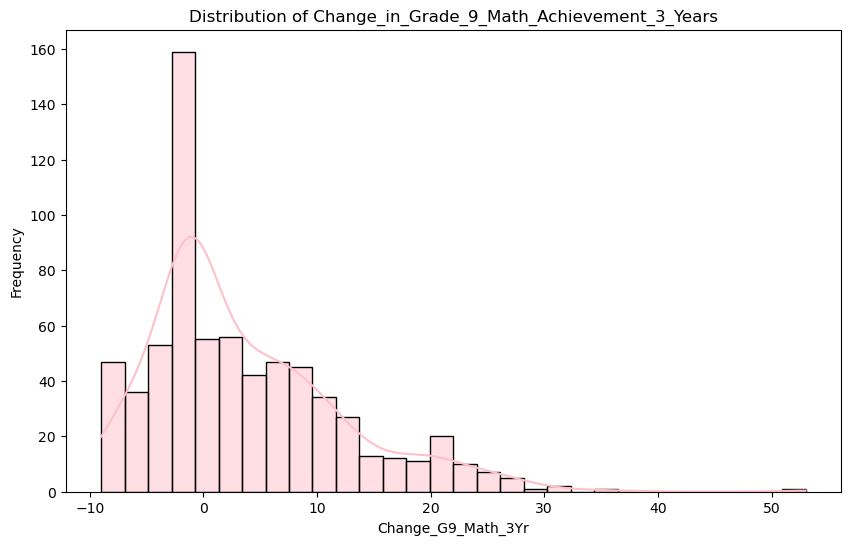

In [2428]:
#plotting a hist for Change_in_Grade_9_Math_Achievement_3_Years
plt.figure(figsize=(10, 6)) 
sns.histplot(plot_data14.dropna(), kde=True, bins=30, color='pink') 
plt.title('Distribution of Change_in_Grade_9_Math_Achievement_3_Years') #title and labels
plt.xlabel('Change_G9_Math_3Yr')
plt.ylabel('Frequency')

#### Based on the above, we can see that mean (3.652047), median (1.000000) and mode (-1.0) for Change_G9_Math_3Yr have variation. The graph shows a right skew (positively skewed). Therefore, I will resolve the missing null values by imputation based on median.

In [2429]:
#to fill null with median
df.loc[df['Grade_Range'] == '9-12', 'Change_G9_Math_3Yr'] = (
    df.loc[df['Grade_Range'] == '9-12', 'Change_G9_Math_3Yr'].fillna(plot_data14.median())
)

In [2430]:
#to check if change was done correctly
df[(df['Grade_Range'] == '9-12') & (df['Change_G9_Math_3Yr'].isna())]

Empty DataFrame
Columns: [Board_Number, Board_Name, Board_Type, School_Number, School_Name, School_Type, School_Spec_Cond_Code, School_Level, School_Lang, Grade_Range, Street, Municipality, City, Province, Postal_Code, Phone_Number, Fax_Number, School_Website, Board_Website, Enrolment, Latitude, Longitude, %Stud_FirstLang_Not_Eng, %Stud_FirstLang_Not_Fr, %Stud_New_Canada_Non-Eng_Cntry, %Stud_New_Canada_Non-Fr_Cntry, %Stud_Special_Ed, %Stud_Gifted, %Grade3_Reading, Change_G3_Read_3Yr, %Grade3_Writing, Change_G3_Write_3Yr, %Grade3_Math, Change_G3_Math_3Yr, %Grade6_Reading, Change_G6_Read_3Yr, %Grade6_Writing, Change_G6_Write_3Yr, %Grade6_Math, Change_G6_Math_3Yr, %Grade9_Math, Change_G9_Math_3Yr, %Grade10_OSSLT, Change_G10_OSSLT_3Yr, %Child_Livein_LowInc_HH, %Stud_Par_NoDegDipCert, Extract_Date]
Index: []

In [2431]:
df.isnull().sum() #to see null values remaining

Board_Number                         0
Board_Name                           0
Board_Type                           0
School_Number                        0
School_Name                          0
School_Type                          0
School_Spec_Cond_Code                0
School_Level                         0
School_Lang                          0
Grade_Range                          0
Street                               0
Municipality                         0
City                                 0
Province                             0
Postal_Code                          0
Phone_Number                         0
Fax_Number                           0
School_Website                       0
Board_Website                        0
Enrolment                            0
Latitude                             0
Longitude                            0
%Stud_FirstLang_Not_Eng              0
%Stud_FirstLang_Not_Fr               0
%Stud_New_Canada_Non-Eng_Cntry       0
%Stud_New_Canada_Non-Fr_C

# %Grade10_OSSLT - 3913 Missing Values

### I am assuming that %Grade10_OSSLT is null when the Grade Range does not include Grade 10. I will verify this below.

In [2432]:
df[df['%Grade10_OSSLT'].isnull()].head(20) #the data seems to support my assumption

Board_Number  Board_Name              Board_Type School_Number  \
1        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        019186   
2        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        043362   
3        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        054542   
4        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        490822   
5        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        137967   
6        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        285552   
8        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        093548   
10       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        101214   
11       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        161276   
12       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        165042   
13       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        293055   
15       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        186783   
16       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        202614   
17       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        227331   
18       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        230561   
19       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        237191   
21       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        264750   
22       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        278270   
23       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        302350   
25       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        018309   

                              School_Name School_Type School_Spec_Cond_Code  \
1               Anna McCrea Public School      Public        Not applicable   
2            Ben R McMullin Public School      Public        Not applicable   
3               Blind River Public School      Public        Not applicable   
4   Boreal French Immersion Public School      Public        Not applicable   
5      Central Algoma Intermediate School      Public        Not applicable   
6            Central Algoma Public School      Public        Not applicable   
8            Central Avenue Public School      Public        Not applicable   
10                 Chapleau Public School      Public        Not applicable   
11                East View Public School      Public        Not applicable   
12         Echo Bay Central Public School      Public        Not applicable   
13        Elliot Lake Intermediate School      Public        Not applicable   
15               Esten Park Public School      Public        Not applicable   
16        Francis H Clergue Public School      Public        Not applicable   
17               Grand View Public School      Public        Not applicable   
18                Greenwood Public School      Public        Not applicable   
19              H M Robbins Public School      Public        Not applicable   
21               Hornepayne Public School      Public        Not applicable   
22          Isabel Fletcher Public School      Public        Not applicable   
23                  Kiwedin Public School      Public        Not applicable   
25              Korah Intermediate School      Public        Not applicable   

   School_Level School_Lang Grade_Range                  Street  \
1    Elementary     English        JK-8             250 Mark St   
2    Elementary     English        JK-8         24 Paradise Ave   
3    Elementary     English        JK-8            19 Hanes Ave   
4    Elementary     English        JK-8        232 Northern Ave   
5    Elementary     English         7-8      32 Kensington Road   
6    Elementary     English        JK-6           5 Margaret St   
8    Elementary     English        JK-8          81 Central Ave   
10   Elementary     English        JK-8              24 Pine St   
11   Elementary     English        JK-8          75 Arizona Ave   
12   Elementary     English        JK-6           290 Church St   
13   Elementary     English         7-8  303 Mississauga Avenue   
15   Elementary     English        JK-8         115 Hergott Ave   
16   Elementary     En

In [2433]:
df[(df['Grade_Range'] == '9-12') & (df['%Grade10_OSSLT'].isna())].head(10)

Board_Number                 Board_Name               Board_Type  \
137        B66001              Bluewater DSB   Pub Dist Sch Brd (E/F)   
296        B66303                CS Viamonde   Pub Dist Sch Brd (E/F)   
729        B66311  CÉP de l'Est de l'Ontario   Pub Dist Sch Brd (E/F)   
827        B66150                DSB Niagara   Pub Dist Sch Brd (E/F)   
1389       B66028   Greater Essex County DSB   Pub Dist Sch Brd (E/F)   
1491       B66133                 Halton DSB   Pub Dist Sch Brd (E/F)   
1586       B67121    Hamilton-Wentworth CDSB  Cath Dist Sch Brd (E/F)   
1662       B66141     Hamilton-Wentworth DSB   Pub Dist Sch Brd (E/F)   
1705       B66141     Hamilton-Wentworth DSB   Pub Dist Sch Brd (E/F)   
1811       B66079    Kawartha Pine Ridge DSB   Pub Dist Sch Brd (E/F)   

     School_Number                                  School_Name School_Type  \
137         918587       Bluewater Alternative Education School      Public   
296         954651         École secondaire Michelle-O'Bonsawin      Public   
729         922609    École secondaire des adultes Le Carrefour      Public   
827         922854    Lifetime Learning Centre Secondary School      Public   
1389        953822  Windsor Public Alternative Secondary School      Public   
1491        940968          Gary Allan High School - Burlington      Public   
1586        838541  St. Charles Catholic Adult Secondary School    Catholic   
1662        934262           James Street Alternative Education      Public   
1705        918563   Turning Point Alternative Education School      Public   
1811        931273     Centre for Individual Studies Clarington      Public   

     School_Spec_Cond_Code School_Level School_Lang Grade_Range  \
137            Alternative    Secondary     English        9-12   
296         Not applicable    Secondary      French        9-12   
729                  Adult    Secondary      French        9-12   
827            Alternative    Secondary     English        9-12   
1389           Alternative    Secondary     English        9-12   
1491           Alternative    Secondary     English        9-12   
1586           Alternative    Secondary     English        9-12   
1662           Alternative    Secondary     English        9-12   
1705           Alternative    Secondary     English        9-12   
1811                 Adult    Secondary     English        9-12   

                                               Street  \
137                                  351 1St Avenue 2   
296                                24 Mountjoy Avenue   
729                         2445 St-Laurent boulevard   
827                                   34 Catherine St   
1389                                  284 Cameron Ave   
1491                                      3250 New St   
1586                                     150 East 5th   
1662                                 100 James Street   
1705  135 Fennell   Mohawk College West Campus Avenue   
1811                                  140 High Street   

                          Municipality           City Province Postal_Code  \
137   Arran-Elderslie, Municipality of        Chesley  Ontario      N0G1L0   
296                   Toronto, City of        Toronto  Ontario      M4J1J6   
729                    Ottawa, City of         Ottawa  Ontario      K1G6C3   
827            St. Catharines, City of  St Catharines  Ontario      L2R5E7   
1389                  Windsor, City of        Windsor  Ontario      N9B1Y6   
1491               Burlington, City of     Burlington  Ontario      L7N1M8   
1586                  Hanover, Town of       Hamilton  Ontario      L9A2Z8   
1662                 Hamilton, City of       Hamilton  Ontario      L8P2Z2   
1705             Hamilton, Township of       Hamilton  Ontario      L9C0E5   
1811       Clarington, Municipality of    Bowmanville  Ontario      L1C3C1   

      Phone_Number    Fax_Number  \
137   519-363-2014  416-325-2929   
296   647-805-8895  416-462-3182  

### Based on the above, we can see that some Grade 10–inclusive grade ranges contain null values for %Grade10_OSSLT. Therefore, we will create a histogram plot to determine whether these values should be replaced with the mean or the median.

In [2434]:
plot_data15 = pd.to_numeric(df['%Grade10_OSSLT'], errors='coerce') #for getting stats and plotting
plot_data15.describe() #to see stats

count    750.000000
mean       0.828453
std        0.115936
min        0.100000
25%        0.780000
50%        0.850000
75%        0.900000
max        1.000000
Name: %Grade10_OSSLT, dtype: float64

In [2435]:
plot_data15.value_counts().head(5) #to see mode

%Grade10_OSSLT
0.88    48
0.86    39
0.85    36
0.90    35
0.83    31
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

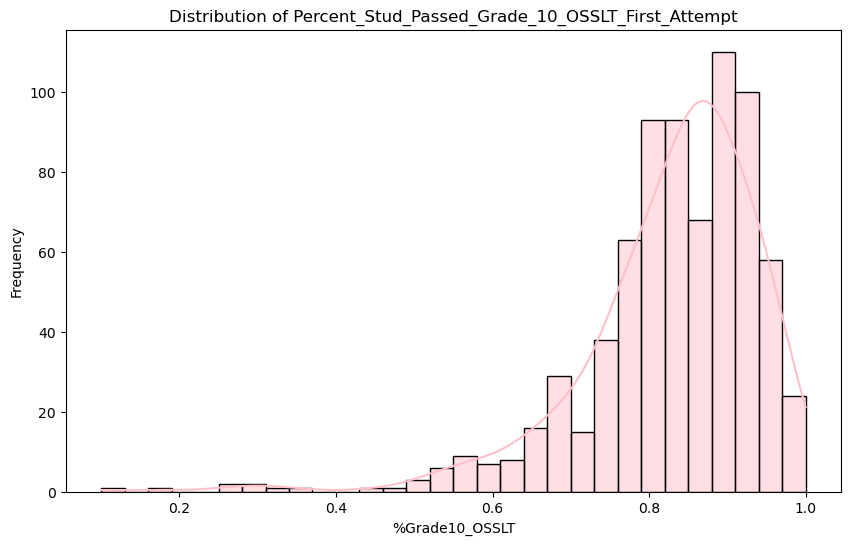

In [2436]:
#plotting a hist for Percent_Stud_Passed_Grade_10_OSSLT_First_Attempt
plt.figure(figsize=(10, 6)) 
sns.histplot(plot_data15.dropna(), kde=True, bins=30, color='pink') 
plt.title('Distribution of Percent_Stud_Passed_Grade_10_OSSLT_First_Attempt') #title and labels
plt.xlabel('%Grade10_OSSLT')
plt.ylabel('Frequency')

#### Based on the above, we can see that mean (0.828453), median (0.850000) and mode (0.88) for %Grade10_OSSLT are somewhat similar. However, the graph shows a left skew (negatively skewed). Therefore, I will resolve the missing null values by imputation based on median.

In [2437]:
#to fill null with median
df.loc[df['Grade_Range'] == '9-12', '%Grade10_OSSLT'] = (
    df.loc[df['Grade_Range'] == '9-12', '%Grade10_OSSLT'].fillna(plot_data15.median())
)

In [2438]:
#to check if change was done correctly
df[(df['Grade_Range'] == '9-12') & (df['%Grade10_OSSLT'].isna())]

Empty DataFrame
Columns: [Board_Number, Board_Name, Board_Type, School_Number, School_Name, School_Type, School_Spec_Cond_Code, School_Level, School_Lang, Grade_Range, Street, Municipality, City, Province, Postal_Code, Phone_Number, Fax_Number, School_Website, Board_Website, Enrolment, Latitude, Longitude, %Stud_FirstLang_Not_Eng, %Stud_FirstLang_Not_Fr, %Stud_New_Canada_Non-Eng_Cntry, %Stud_New_Canada_Non-Fr_Cntry, %Stud_Special_Ed, %Stud_Gifted, %Grade3_Reading, Change_G3_Read_3Yr, %Grade3_Writing, Change_G3_Write_3Yr, %Grade3_Math, Change_G3_Math_3Yr, %Grade6_Reading, Change_G6_Read_3Yr, %Grade6_Writing, Change_G6_Write_3Yr, %Grade6_Math, Change_G6_Math_3Yr, %Grade9_Math, Change_G9_Math_3Yr, %Grade10_OSSLT, Change_G10_OSSLT_3Yr, %Child_Livein_LowInc_HH, %Stud_Par_NoDegDipCert, Extract_Date]
Index: []

In [2439]:
df.isnull().sum() #to see null values remaining

Board_Number                         0
Board_Name                           0
Board_Type                           0
School_Number                        0
School_Name                          0
School_Type                          0
School_Spec_Cond_Code                0
School_Level                         0
School_Lang                          0
Grade_Range                          0
Street                               0
Municipality                         0
City                                 0
Province                             0
Postal_Code                          0
Phone_Number                         0
Fax_Number                           0
School_Website                       0
Board_Website                        0
Enrolment                            0
Latitude                             0
Longitude                            0
%Stud_FirstLang_Not_Eng              0
%Stud_FirstLang_Not_Fr               0
%Stud_New_Canada_Non-Eng_Cntry       0
%Stud_New_Canada_Non-Fr_C

# Change_G10_OSSLT_3Yr - 3970 Missing Values

### I am assuming that Change_G10_OSSLT_3Yr is null when the Grade Range does not include Grade 10. I will verify this below.

In [2440]:
df[df['Change_G10_OSSLT_3Yr'].isnull()].head(20) #the data seems to support my assumption

Board_Number  Board_Name              Board_Type School_Number  \
0        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        902344   
1        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        019186   
2        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        043362   
3        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        054542   
4        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        490822   
5        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        137967   
6        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        285552   
8        B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        093548   
10       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        101214   
11       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        161276   
12       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        165042   
13       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        293055   
15       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        186783   
16       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        202614   
17       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        227331   
18       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        230561   
19       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        237191   
21       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        264750   
22       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        278270   
23       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        302350   

                                     School_Name School_Type  \
0   Algoma Education Connection Secondary School      Public   
1                      Anna McCrea Public School      Public   
2                   Ben R McMullin Public School      Public   
3                      Blind River Public School      Public   
4          Boreal French Immersion Public School      Public   
5             Central Algoma Intermediate School      Public   
6                   Central Algoma Public School      Public   
8                   Central Avenue Public School      Public   
10                        Chapleau Public School      Public   
11                       East View Public School      Public   
12                Echo Bay Central Public School      Public   
13               Elliot Lake Intermediate School      Public   
15                      Esten Park Public School      Public   
16               Francis H Clergue Public School      Public   
17                      Grand View Public School      Public   
18                       Greenwood Public School      Public   
19                     H M Robbins Public School      Public   
21                      Hornepayne Public School      Public   
22                 Isabel Fletcher Public School      Public   
23                         Kiwedin Public School      Public   

   School_Spec_Cond_Code School_Level School_Lang Grade_Range  \
0            Alternative    Secondary     English        9-12   
1         Not applicable   Elementary     English        JK-8   
2         Not applicable   Elementary     English        JK-8   
3         Not applicable   Elementary     English        JK-8   
4         Not applicable   Elementary     English        JK-8   
5         Not applicable   Elementary     English         7-8   
6         Not applicable   Elementary     English        JK-6   
8         Not applicable   Elementary     English        JK-8   
10        Not applicable   Elementary     English        JK-8   
11        Not applicable   Elementary     English        JK-8   
12        Not applicable   Elementary     English        JK-6   
13        Not applicable   Elementary     English         7-8   
15        Not applicable   Elementary     English        JK-8   
16        Not applicable   Elementary     English        JK-8   
17        Not applicable   Elementary     English        JK-8   
18        Not applicable   Elementary     English        JK-8   
19        Not applicable   Elementary     English        JK-8   
21        Not applicable   Elementary 

In [2441]:
df[(df['Grade_Range'] == '9-12') & (df['Change_G10_OSSLT_3Yr'].isna())].head(10)

Board_Number                            Board_Name  \
0         B28010                            Algoma DSB   
53        B67202          Algonquin and Lakeshore CDSB   
137       B66001                         Bluewater DSB   
207       B67164          Brant Haldimand Norfolk CDSB   
296       B66303                           CS Viamonde   
366       B67318               CS catholique MonAvenir   
369       B67318               CS catholique MonAvenir   
452       B28118  CS public du Grand Nord de l'Ontario   
572       B29106             CSDC des Grandes Rivières   
602       B67334       CSDC du Centre-Est de l'Ontario   

                  Board_Type School_Number  \
0     Pub Dist Sch Brd (E/F)        902344   
53   Cath Dist Sch Brd (E/F)        728420   
137   Pub Dist Sch Brd (E/F)        918587   
207  Cath Dist Sch Brd (E/F)        852434   
296   Pub Dist Sch Brd (E/F)        954651   
366  Cath Dist Sch Brd (E/F)        780213   
369  Cath Dist Sch Brd (E/F)        854087   
452   Pub Dist Sch Brd (E/F)        911100   
572  Cath Dist Sch Brd (E/F)        686085   
602  Cath Dist Sch Brd (E/F)        757618   

                                           School_Name School_Type  \
0         Algoma Education Connection Secondary School      Public   
53                    Loyola Community Learning Centre    Catholic   
137             Bluewater Alternative Education School      Public   
207              St. Mary Catholic Learning Centre Day    Catholic   
296               École secondaire Michelle-O'Bonsawin      Public   
366                              ÉSC Monseigneur-Jamot    Catholic   
369                                  ÉSC Pape-François    Catholic   
452        École secondaire de la Rivière-des-Français      Public   
572             École secondaire catholique L'Alliance    Catholic   
602  École secondaire catholique d'apprentissage vi...    Catholic   

    School_Spec_Cond_Code School_Level School_Lang Grade_Range  \
0             Alternative    Secondary     English        9-12   
53                  Adult    Secondary     English        9-12   
137           Alternative    Secondary     English        9-12   
207           Alternative    Secondary     English        9-12   
296        Not applicable    Secondary      French        9-12   
366        Not applicable    Secondary      French        9-12   
369        Not applicable    Secondary      French        9-12   
452        Not applicable    Secondary      French        9-12   
572        Not applicable    Secondary      French        9-12   
602        Not applicable    Secondary      French        9-12   

                       Street                      Municipality  \
0            550 Northern Ave         Sault Ste. Marie, City of   
53       1440 Princess Street                 Kingston, City of   
137          351 1St Avenue 2  Arran-Elderslie, Municipality of   
207       455 Colborne Street                Brantford, City of   
296        24 Mountjoy Avenue                  Toronto, City of   
366  2350 Woodglade Boulevard           Peterborough, County of   
369           276 Sunset Blvd   Whitchurch-Stouffville, Town of   
452             11 Lahaie rue     French River, Municipality of   
572        44 Anson promenade           Iroquois Falls, Town of   
602            96 Empress Ave                   Ottawa, City of   

                City Province Postal_Code  Phone_Number    Fax_Number  \
0    Sault Ste Marie  Ontario      P6B4J4  705-945-7194  705-945-7173   
53          Kingston  Ontario      K7M3E5  613-544-3361  613-547-0999   
137          Chesley  Ontario      N0G1L0  519-363-2014  416-325-2929   
207        Brantford  Ontario      N3S3N8  519-753-0552  519-753-6555   
296          Toronto  Ontario      M4J1J6  647-805-8895  416-462-3182   
366     Peterborough  Ontario      K9K2L1  705-742-7571  705-742-8820   
369      Stouffville  Ontario      L4A3R1  905-642-3440  905-640-7136   
452        Noëlville  Ontario      P0M

### Based on the above, we can see that some Grade 10–inclusive grade ranges contain null values for Change_G10_OSSLT_3Yr. Therefore, we will create a histogram plot to determine whether these values should be replaced with the mean or the median.

In [2442]:
plot_data16 = pd.to_numeric(df['Change_G10_OSSLT_3Yr'], errors='coerce') #for getting stats and plotting
plot_data16.describe() #to see stats

count    737.000000
mean       2.938942
std        7.935906
min      -56.000000
25%       -1.000000
50%        3.000000
75%        6.000000
max       35.000000
Name: Change_G10_OSSLT_3Yr, dtype: float64

In [2443]:
plot_data16.value_counts().head(5) #to see mode

Change_G10_OSSLT_3Yr
3.0    62
1.0    61
0.0    54
4.0    49
6.0    48
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

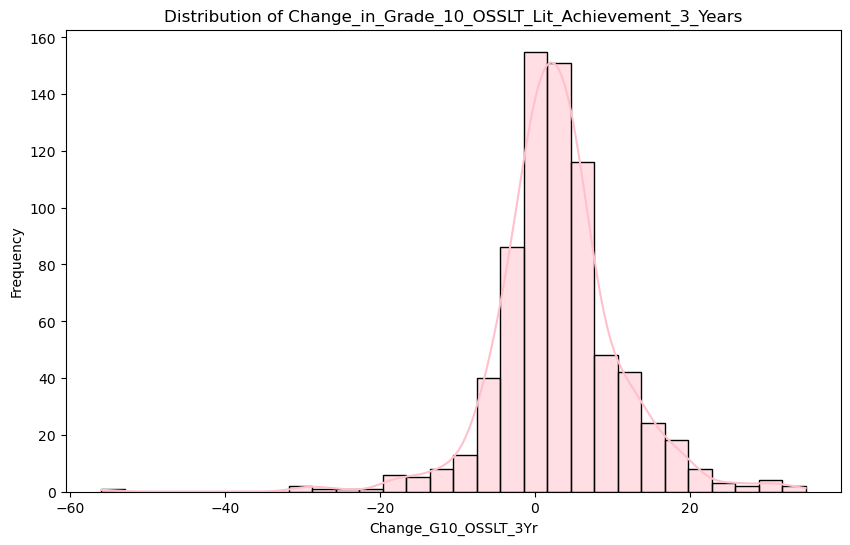

In [2444]:
#plotting a hist for Change_in_Grade_10_OSSLT_Lit_Achievement_3_Years
plt.figure(figsize=(10, 6)) 
sns.histplot(plot_data16.dropna(), kde=True, bins=30, color='pink') 
plt.title('Distribution of Change_in_Grade_10_OSSLT_Lit_Achievement_3_Years') #title and labels
plt.xlabel('Change_G10_OSSLT_3Yr')
plt.ylabel('Frequency')

#### Based on the above, we can see that mean (2.938942), median (3.000000) and mode (3.0) for Change_G10_OSSLT_3Yr are basically the same. And the graph seems to represent a normal distribution. Therefore, I will resolve the missing null values by imputation based on mean.

In [2445]:
#to fill null with mean
df.loc[df['Grade_Range'] == '9-12', 'Change_G10_OSSLT_3Yr'] = (
    df.loc[df['Grade_Range'] == '9-12', 'Change_G10_OSSLT_3Yr'].fillna(plot_data16.mean())
)

In [2446]:
#to check if change was done correctly
df[(df['Grade_Range'] == '9-12') & (df['Change_G10_OSSLT_3Yr'].isna())]

Empty DataFrame
Columns: [Board_Number, Board_Name, Board_Type, School_Number, School_Name, School_Type, School_Spec_Cond_Code, School_Level, School_Lang, Grade_Range, Street, Municipality, City, Province, Postal_Code, Phone_Number, Fax_Number, School_Website, Board_Website, Enrolment, Latitude, Longitude, %Stud_FirstLang_Not_Eng, %Stud_FirstLang_Not_Fr, %Stud_New_Canada_Non-Eng_Cntry, %Stud_New_Canada_Non-Fr_Cntry, %Stud_Special_Ed, %Stud_Gifted, %Grade3_Reading, Change_G3_Read_3Yr, %Grade3_Writing, Change_G3_Write_3Yr, %Grade3_Math, Change_G3_Math_3Yr, %Grade6_Reading, Change_G6_Read_3Yr, %Grade6_Writing, Change_G6_Write_3Yr, %Grade6_Math, Change_G6_Math_3Yr, %Grade9_Math, Change_G9_Math_3Yr, %Grade10_OSSLT, Change_G10_OSSLT_3Yr, %Child_Livein_LowInc_HH, %Stud_Par_NoDegDipCert, Extract_Date]
Index: []

In [2447]:
df.isnull().sum() #to see null values remaining

Board_Number                         0
Board_Name                           0
Board_Type                           0
School_Number                        0
School_Name                          0
School_Type                          0
School_Spec_Cond_Code                0
School_Level                         0
School_Lang                          0
Grade_Range                          0
Street                               0
Municipality                         0
City                                 0
Province                             0
Postal_Code                          0
Phone_Number                         0
Fax_Number                           0
School_Website                       0
Board_Website                        0
Enrolment                            0
Latitude                             0
Longitude                            0
%Stud_FirstLang_Not_Eng              0
%Stud_FirstLang_Not_Fr               0
%Stud_New_Canada_Non-Eng_Cntry       0
%Stud_New_Canada_Non-Fr_C

* The null values remaining at this point are when the school's grade range does not apply to the column. So there will be a separation when doing analysis.
* At this point, we are also done cleaning the data and will move on to analysis.

# 2. Analysis

#### We are posing the question: what category of students seem to be most likely to perform better on EQAO assesments?

## 2.1
* The first thing we want to look at is a comparison of performance based on rural and urban areas.
* We obtained urban and rural classifications based on: https://byjus.com/free-ias-prep/difference-between-urban-and-rural/#:~:text=Difference%20between%20Urban%20and%20Rural,areas%20have%20low%20population%20density

## 2.1 a) Assign Urban or Rural Category Using Municipality Column and Group By School Type and Urban or Rural Category

In [2448]:
df['Municipality'].unique() #to see the unique municipalities

['Sault Ste. Marie, City of', 'Blind River, Town of', 'Huron Shores, Municipality of', 'Johnson, Township of', 'Elliot Lake, City of', ..., 'Wellesley, Township of', 'Woolwich, Township of', 'Newmarket, Town of', 'King, Township of', 'Georgina, Town of']
Length: 334
Categories (334, object): ['Addington Highlands, Township of', 'Adelaide-Metcalfe, Township of', 'Adjala-Tosorontio, Township of', 'Admaston/Bromley, Township of', ..., 'Wollaston, Township of', 'Woodstock, City of', 'Woolwich, Township of', 'Zorra, Township of']

In [2449]:
#function to categorize into urban and rural
import re

def cat_urban_rural(municipality_name):
    if not isinstance(municipality_name, str):
        return 'Unknown'
    
    # Urban indicators 
    urban_pattern = r'(City of|Town of)'
    
    # Rural indicators 
    rural_pattern = r'(Townsh|Municip|Regional Municipality of|Village of|County|District|Parish)'
    
    if re.search(urban_pattern, municipality_name, flags=re.IGNORECASE):
        return 'Urban'
    elif re.search(rural_pattern, municipality_name, flags=re.IGNORECASE):
        return 'Rural'
    else:
        return 'Unknown' # safer default if unclear

df['Urban_Rural'] = df['Municipality'].apply(cat_urban_rural)
df['Urban_Rural'].head(10)

0    Urban
1    Urban
2    Urban
3    Urban
4    Urban
5    Rural
6    Rural
7    Rural
8    Urban
9    Rural
Name: Urban_Rural, dtype: object

In [2450]:
df.head(2) #to see feature engineered column on df

Board_Number  Board_Name              Board_Type School_Number  \
0       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        902344   
1       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        019186   

                                    School_Name School_Type  \
0  Algoma Education Connection Secondary School      Public   
1                     Anna McCrea Public School      Public   

  School_Spec_Cond_Code School_Level School_Lang Grade_Range  \
0           Alternative    Secondary     English        9-12   
1        Not applicable   Elementary     English        JK-8   

             Street               Municipality             City Province  \
0  550 Northern Ave  Sault Ste. Marie, City of  Sault Ste Marie  Ontario   
1       250 Mark St  Sault Ste. Marie, City of  Sault Ste Marie  Ontario   

  Postal_Code  Phone_Number    Fax_Number  \
0      P6B4J4  705-945-7194  705-945-7173   
1      P6A3M7  705-945-7106  705-945-7221   

                                      School_Website          Board_Website  \
0                              http://www.adsb.on.ca  http://www.adsb.on.ca   
1  http://www.adsb.on.ca/sites/schools/amc/defaul...  http://www.adsb.on.ca   

   Enrolment  Latitude  Longitude %Stud_FirstLang_Not_Eng  \
0        170  46.53477   -84.3077                       0   
1        280  46.50593   -84.2873                    0.05   

  %Stud_FirstLang_Not_Fr %Stud_New_Canada_Non-Eng_Cntry  \
0                      1                              0   
1                      1                              0   

  %Stud_New_Canada_Non-Fr_Cntry %Stud_Special_Ed %Stud_Gifted %Grade3_Reading  \
0                             0              0.4            0             NaN   
1                             0              0.2            0            0.73   

   Change_G3_Read_3Yr %Grade3_Writing  Change_G3_Write_3Yr %Grade3_Math  \
0                 NaN             NaN                  NaN          NaN   
1               -16.0            0.77                 -8.0         0.67   

   Change_G3_Math_3Yr %Grade6_Reading  Change_G6_Read_3Yr %Grade6_Writing  \
0                 NaN             NaN                 NaN             NaN   
1               -18.0            0.92                19.0               1   

   Change_G6_Write_3Yr %Grade6_Math  Change_G6_Math_3Yr %Grade9_Math  \
0                  NaN          NaN                 NaN          N/D   
1                 23.0         0.62                12.0          NaN   

   Change_G9_Math_3Yr %Grade10_OSSLT  Change_G10_OSSLT_3Yr  \
0                 1.0            N/R              2.938942   
1                 NaN            NaN                   NaN   

  %Child_Livein_LowInc_HH %Stud_Par_NoDegDipCert Extract_Date Urban_Rural  
0                    0.15                   0.05   2025-08-01       Urban  
1                       0                      0   2025-08-01       Urban

In [2451]:
df['Urban_Rural'].value_counts() #to see number of urban and rural

Urban_Rural
Urban      3703
Rural       970
Unknown      34
Name: count, dtype: int64

In [2452]:
pd.set_option('display.max_rows', None) #to show all rows
df[df['Urban_Rural'] == 'Unknown'] #to check that what is unknown cannot be matched

Board_Number                                     Board_Name  \
12         B28010                                     Algoma DSB   
133        B66001                                  Bluewater DSB   
151        B66001                                  Bluewater DSB   
172        B66001                                  Bluewater DSB   
173        B66001                                  Bluewater DSB   
471        B28100             CS public du Nord-Est de l'Ontario   
555        B29106                      CSDC des Grandes Rivières   
556        B29106                      CSDC des Grandes Rivières   
557        B29106                      CSDC des Grandes Rivières   
573        B29106                      CSDC des Grandes Rivières   
700        B67300         Conseil scolaire catholique Providence   
900        B28002                         DSB Ontario North East   
909        B28002                         DSB Ontario North East   
910        B28002                         DSB Ontario North East   
1357       B66028                       Greater Essex County DSB   
1360       B66028                       Greater Essex County DSB   
1376       B66028                       Greater Essex County DSB   
1377       B66028                       Greater Essex County DSB   
1805       B66079                        Kawartha Pine Ridge DSB   
1850       B66079                        Kawartha Pine Ridge DSB   
2142       B28037                                 Near North DSB   
2244       B29009                              Northeastern CDSB   
2803       B67067  Peterborough Victoria Northum Clarington CDSB   
2812       B67067  Peterborough Victoria Northum Clarington CDSB   
2859       B28029                                    Rainbow DSB   
2904       B67199                            Renfrew County CDSB   
2928       B66214                             Renfrew County DSB   
2935       B66214                             Renfrew County DSB   
4272       B66192                               Upper Canada DSB   
4279       B66192                               Upper Canada DSB   
4319       B66117                                Upper Grand DSB   
4580       B67024                             Windsor-Essex CDSB   
4589       B67024                             Windsor-Essex CDSB   
4609       B67024                             Windsor-Essex CDSB   

                   Board_Type School_Number  \
12     Pub Dist Sch Brd (E/F)        165042   
133    Pub Dist Sch Brd (E/F)        011606   
151    Pub Dist Sch Brd (E/F)        253316   
172    Pub Dist Sch Brd (E/F)        605743   
173    Pub Dist Sch Brd (E/F)        953253   
471    Pub Dist Sch Brd (E/F)        260926   
555   Cath Dist Sch Brd (E/F)        835358   
556   Cath Dist Sch Brd (E/F)        785466   
557   Cath Dist Sch Brd (E/F)        836152   
573   Cath Dist Sch Brd (E/F)        822507   
700   Cath Dist Sch Brd (E/F)        732400   
900    Pub Dist Sch Brd (E/F)        384224   
909    Pub Dist Sch Brd (E/F)        946940   
910    Pub Dist Sch Brd (E/F)        050571   
1357   Pub Dist Sch Brd (E/F)        308897   
1360   Pub Dist Sch Brd (E/F)        452734   
1376   Pub Dist Sch Brd (E/F)        939765   
1377   Pub Dist Sch Brd (E/F)        498513   
1805   Pub Dist Sch Brd (E/F)        246425   
1850   Pub Dist Sch Brd (E/F)        402908   
2142   Pub Dist Sch Brd (E/F)        076074   
2244  Cath Dist Sch Brd (E/F)        706027   
2803  Cath Dist Sch Brd (E/F)        706000   
2812  Cath Dist Sch Brd (E/F)        842893   
2859   Pub Dist Sch Brd (E/F)        314676   
2904  Cath Dist Sch Brd (E/F)        769185   
2928   Pub Dist Sch Brd (E/F)        291790   
2935   Pub Dist Sch Brd (E/F)        469114   
4272   Pub Dist Sch Brd (E/F)        544582   
4279   Pub Dist Sch Brd (E/F)        550795   
4319   Pub Dist Sch Brd (E/F)        226793   
4580  Cath Dist Sch Brd (E/F)        704245   
4589  Cath Dist Sch Brd (E/F)        757616   
4609  Cath Dist Sch Brd (E

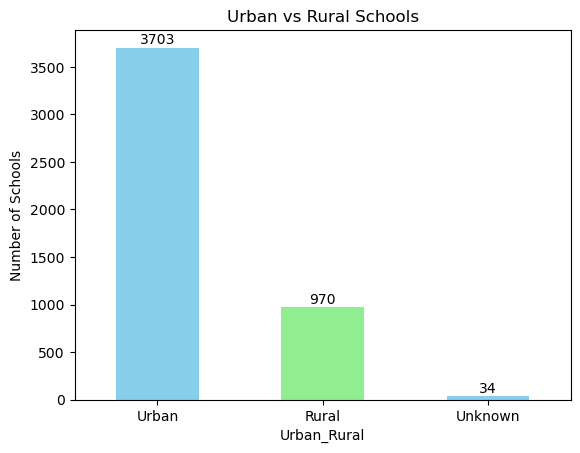

In [2453]:
#plotting
counts = df['Urban_Rural'].value_counts()
ax = counts.plot(kind='bar', color=['skyblue','lightgreen'])
plt.ylabel('Number of Schools')
plt.title('Urban vs Rural Schools')
plt.xticks(rotation=0)

# Add counts on top using enumerate
for i, count in enumerate(counts):
    ax.text(i, count + 5, str(count), ha='center', va='bottom')


* There are more urban (3703) than rural (970) schools

In [2454]:
#grouping by urban vs. rural and school type
Count_SchoolType_UrbanRural = df.groupby(['Urban_Rural', 'School_Type'], observed=True).size().reset_index(name='Count')
Count_SchoolType_UrbanRural 

Urban_Rural          School_Type  Count
0       Rural             Catholic    290
1       Rural             Hospital      1
2       Rural               Public    679
3     Unknown             Catholic     12
4     Unknown               Public     22
5       Urban             Catholic   1308
6       Urban             Hospital      2
7       Urban  Protestant Separate      1
8       Urban           Provincial      3
9       Urban               Public   2389

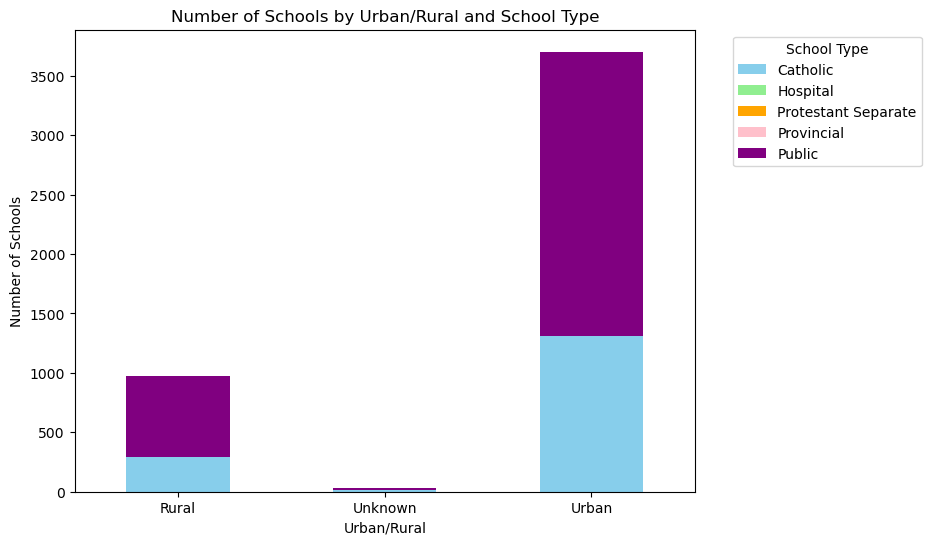

In [2455]:
pivot_df = Count_SchoolType_UrbanRural.pivot(index='Urban_Rural', columns='School_Type', values='Count')

# Plot stacked bar chart with 5 colors for 5 school types
colors = ['skyblue', 'lightgreen', 'orange', 'pink', 'purple']

pivot_df.plot(kind='bar', stacked=True, figsize=(8,6), color=colors)

plt.title('Number of Schools by Urban/Rural and School Type')
plt.xlabel('Urban/Rural')
plt.ylabel('Number of Schools')
plt.xticks(rotation=0)
plt.legend(title='School Type', bbox_to_anchor=(1.05, 1))

* Urban areas have the most schools, mainly Public (2389 schools) and Catholic (1308 schools).
* Rural areas have fewer schools, mostly Public (679 schools) and Catholic (290 schools).
* Hospital schools are very rare in rural areas (1 school) and urban areas (2 schools).
* Protestant separate schools are very rare in urban areas (1 school).
* Provincial schools are very rare in urban areas (3 schools).
* The Unknown category includes a small number of Public (22 schools) and Catholic (12 schools).
* Overall, Public and Catholic schools dominate.
* Urban areas have a wider variety of school types compared to Rural areas.

## 2.1 b)Academic Performance Analysis

In [2456]:
df.columns #to get column names

Index(['Board_Number', 'Board_Name', 'Board_Type', 'School_Number',
       'School_Name', 'School_Type', 'School_Spec_Cond_Code', 'School_Level',
       'School_Lang', 'Grade_Range', 'Street', 'Municipality', 'City',
       'Province', 'Postal_Code', 'Phone_Number', 'Fax_Number',
       'School_Website', 'Board_Website', 'Enrolment', 'Latitude', 'Longitude',
       '%Stud_FirstLang_Not_Eng', '%Stud_FirstLang_Not_Fr',
       '%Stud_New_Canada_Non-Eng_Cntry', '%Stud_New_Canada_Non-Fr_Cntry',
       '%Stud_Special_Ed', '%Stud_Gifted', '%Grade3_Reading',
       'Change_G3_Read_3Yr', '%Grade3_Writing', 'Change_G3_Write_3Yr',
       '%Grade3_Math', 'Change_G3_Math_3Yr', '%Grade6_Reading',
       'Change_G6_Read_3Yr', '%Grade6_Writing', 'Change_G6_Write_3Yr',
       '%Grade6_Math', 'Change_G6_Math_3Yr', '%Grade9_Math',
       'Change_G9_Math_3Yr', '%Grade10_OSSLT', 'Change_G10_OSSLT_3Yr',
       '%Child_Livein_LowInc_HH', '%Stud_Par_NoDegDipCert', 'Extract_Date',
       'Urban_Rural'],
      

In [2457]:
# Now group by Urban_Rural and compute the mean for grade 3 achievement values
cols = [
    '%Grade3_Reading',
    '%Grade3_Writing',
    '%Grade3_Math'
]

temp = df.copy()
temp[cols] = temp[cols].apply(pd.to_numeric, errors="coerce")

Avg_grade3_Urbanrural = temp.groupby('Urban_Rural')[cols].mean()

Avg_grade3_Urbanrural

%Grade3_Reading  %Grade3_Writing  %Grade3_Math
Urban_Rural                                                
Rural               0.703035         0.607706      0.599358
Unknown             0.744231         0.632308      0.627200
Urban               0.719105         0.635981      0.616954

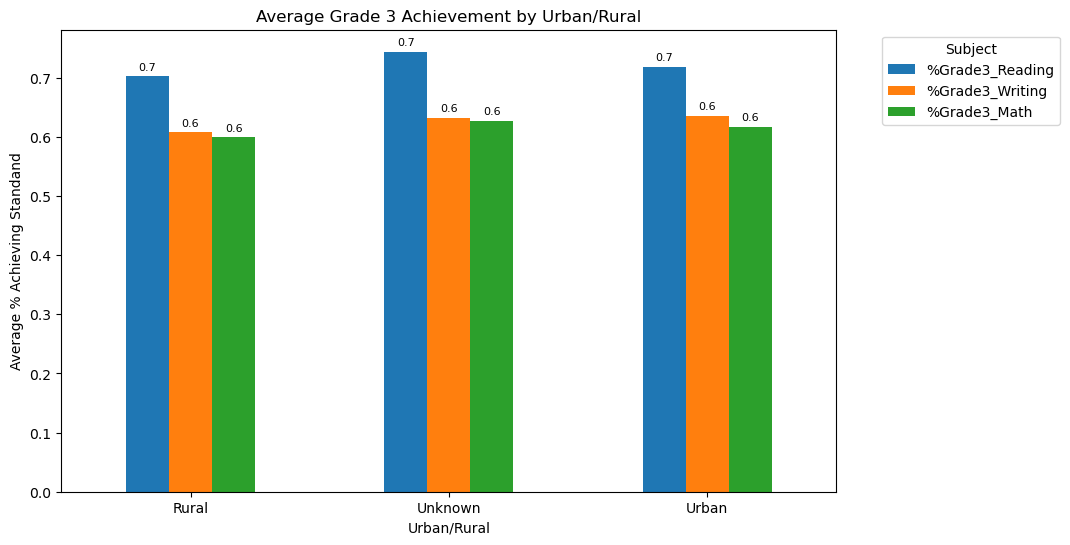

In [2458]:
#plotting results
ax = Avg_grade3_Urbanrural.plot(kind='bar', figsize=(10,6))

plt.title('Average Grade 3 Achievement by Urban/Rural')
plt.xlabel('Urban/Rural')
plt.ylabel('Average % Achieving Standand')
plt.xticks(rotation=0)
plt.legend(title='Subject', bbox_to_anchor=(1.05, 1))
# --- Add value labels on each bar ---
for container in ax.containers:
    # Add labels only for non-empty bars
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=8, padding=3)


* Urban and rural schools seem to have similar achievement values, just that urban schools are slightly higher. Now, let's see if it's the same for higher grades.

In [2459]:
# Now group by Urban_Rural and compute the mean for grade 6 achievement values
cols = [
    '%Grade6_Reading',
    '%Grade6_Writing',
    '%Grade6_Math',
]

temp = df.copy()
temp[cols] = temp[cols].apply(pd.to_numeric, errors="coerce")

Avg_grade6_Urbanrural = temp.groupby('Urban_Rural')[cols].mean()

Avg_grade6_Urbanrural

%Grade6_Reading  %Grade6_Writing  %Grade6_Math
Urban_Rural                                                
Rural               0.814915         0.762063      0.442954
Unknown             0.809583         0.731667      0.434583
Urban               0.830137         0.801700      0.500750

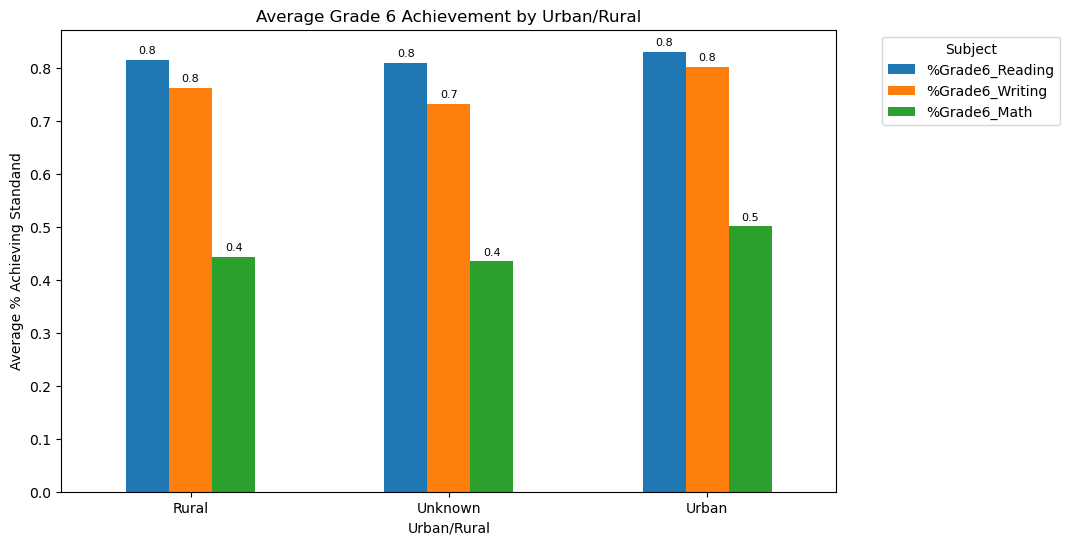

In [2460]:
ax = Avg_grade6_Urbanrural.plot(kind='bar', figsize=(10,6))

plt.title('Average Grade 6 Achievement by Urban/Rural')
plt.xlabel('Urban/Rural')
plt.ylabel('Average % Achieving Standand')
plt.xticks(rotation=0)
plt.legend(title='Subject', bbox_to_anchor=(1.05, 1))
# --- Add value labels on each bar ---
for container in ax.containers:
    # Add labels only for non-empty bars
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=8, padding=3)

* Again, urban and rural schools seem to have similar achievement values, just that urban schools are slightly better. Now, let's see if it's the same for higher grades.

In [2461]:
# Now group by Urban_Rural and compute the mean for grade 9 and 10 achievement values
cols = [
    '%Grade9_Math',
    '%Grade10_OSSLT'
]

temp = df.copy()
temp[cols] = temp[cols].apply(pd.to_numeric, errors="coerce")

Avg_grade9_10_Urbanrural = temp.groupby('Urban_Rural')[cols].mean()

Avg_grade9_10_Urbanrural

%Grade9_Math  %Grade10_OSSLT
Urban_Rural                              
Rural            0.439075        0.807551
Unknown          0.556000        0.896000
Urban            0.514939        0.833863

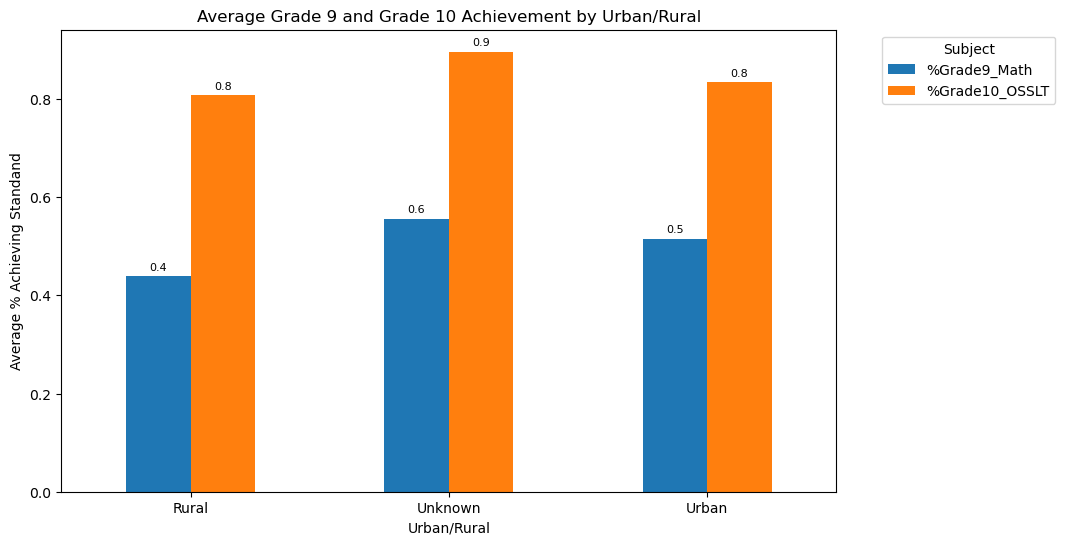

In [2462]:
ax = Avg_grade9_10_Urbanrural.plot(kind='bar', figsize=(10,6))

plt.title('Average Grade 9 and Grade 10 Achievement by Urban/Rural')
plt.xlabel('Urban/Rural')
plt.ylabel('Average % Achieving Standand')
plt.xticks(rotation=0)
plt.legend(title='Subject', bbox_to_anchor=(1.05, 1))
# --- Add value labels on each bar ---
for container in ax.containers:
    # Add labels only for non-empty bars
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=8, padding=3)

* Again, urban and rural schools seem to have similar achievement values, just that urban schools are slightly better. 

* Based on the above, it seems like urban and rural differentiations has relatively minimal impact on achievement values, although we can note that urban schools perform slightly better. Now, let's see if there's significant difference based on school type as well, which we grouped by earlier.

In [2463]:
# Now group by Urban_Rural and School_Type and compute the mean for grade 3 achievement values
cols = [
    '%Grade3_Reading',
    '%Grade3_Writing',
    '%Grade3_Math'
]

temp = df.copy()
temp[cols] = temp[cols].apply(pd.to_numeric, errors="coerce")

Avg_grade3_Urbanrural_SchoolType = temp.groupby(['Urban_Rural','School_Type'])[cols].mean()

Avg_grade3_Urbanrural_SchoolType

/var/folders/r5/580fy3592075knzhrq4w52nm0000gp/T/ipykernel_30115/2556476250.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Avg_grade3_Urbanrural_SchoolType = temp.groupby(['Urban_Rural','School_Type'])[cols].mean()


%Grade3_Reading  %Grade3_Writing  \
Urban_Rural School_Type                                             
Rural       Catholic                    0.731682         0.629500   
            Hospital                    0.730000         0.640000   
            Protestant Separate              NaN              NaN   
            Provincial                       NaN              NaN   
            Public                      0.690223         0.597935   
Unknown     Catholic                    0.805556         0.714444   
            Hospital                         NaN              NaN   
            Protestant Separate              NaN              NaN   
            Provincial                       NaN              NaN   
            Public                      0.711765         0.588824   
Urban       Catholic                    0.747009         0.659476   
            Hospital                    0.730000         0.640000   
            Protestant Separate         0.780000         0.800000   
            Provincial                  0.730000         0.640000   
            Public                      0.703333         0.622630   

                                 %Grade3_Math  
Urban_Rural School_Type                        
Rural       Catholic                 0.636273  
            Hospital                 0.620000  
            Protestant Separate           NaN  
            Provincial                    NaN  
            Public                   0.582944  
Unknown     Catholic                 0.711250  
            Hospital                      NaN  
            Protestant Separate           NaN  
            Provincial                    NaN  
            Public                   0.587647  
Urban       Catholic                 0.621464  
            Hospital                 0.620000  
            Protestant Separate      0.710000  
            Provincial               0.620000  
            Public                   0.614377

/var/folders/r5/580fy3592075knzhrq4w52nm0000gp/T/ipykernel_30115/1436209953.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp.groupby(['Urban_Rural', 'School_Type'])['%Grade3_Reading']


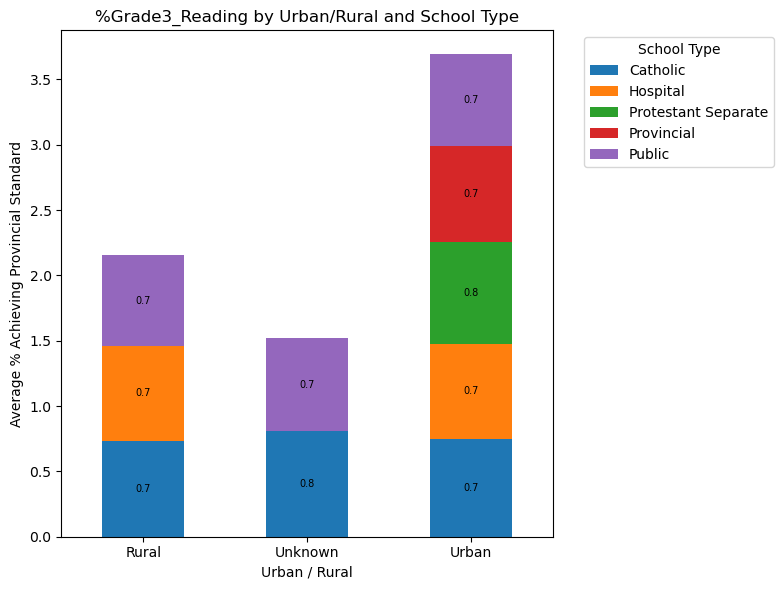

In [2464]:
# Plotting
counts = (
    temp.groupby(['Urban_Rural', 'School_Type'])['%Grade3_Reading']
    .mean()
    .unstack('School_Type')
)

# Create the bar plot and assign the Axes object
ax = counts.plot(kind='bar', stacked=True, figsize=(8,6))

plt.title('%Grade3_Reading by Urban/Rural and School Type')
plt.ylabel('Average % Achieving Provincial Standard')
plt.xlabel('Urban / Rural')
plt.xticks(rotation=0)
plt.legend(title='School Type', bbox_to_anchor=(1.05, 1))

# Add value labels on bars
for i, (index, row) in enumerate(counts.iterrows()):
    bottom = 0
    for col in counts.columns:
        value = row[col]
        if pd.notna(value) and value > 0:
            ax.text(
                i,                      # x position (bar index)
                bottom + value / 2,     # y position (middle of the segment)
                f'{value:.1f}',         # formatted value
                ha='center',
                va='center',
                fontsize=7
            )
            bottom += value  # move to next stacked level

plt.tight_layout()

/var/folders/r5/580fy3592075knzhrq4w52nm0000gp/T/ipykernel_30115/2719842235.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp.groupby(['Urban_Rural', 'School_Type'])['%Grade3_Writing']


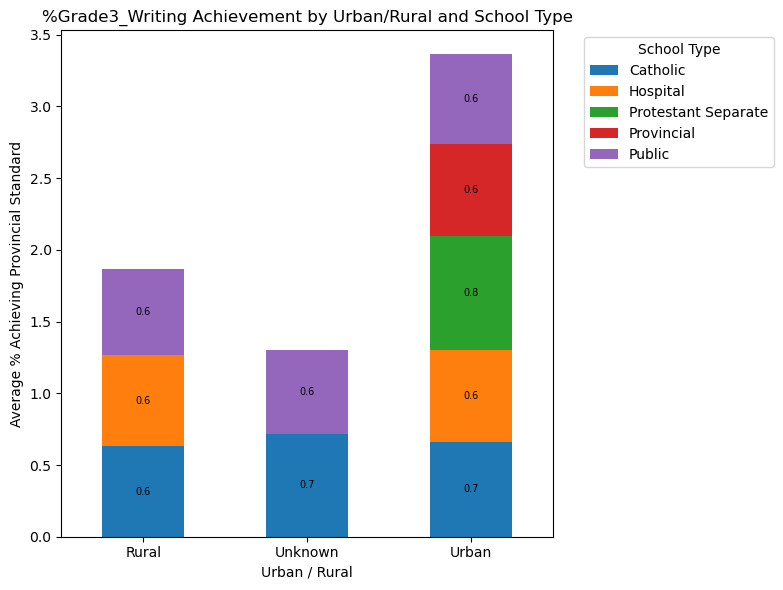

In [2465]:
counts = (
    temp.groupby(['Urban_Rural', 'School_Type'])['%Grade3_Writing']
    .mean()
    .unstack('School_Type')
)

# Create the plot and capture the Axes object
ax = counts.plot(kind='bar', stacked=True, figsize=(8,6))

plt.title('%Grade3_Writing Achievement by Urban/Rural and School Type')
plt.ylabel('Average % Achieving Provincial Standard')
plt.xlabel('Urban / Rural')
plt.xticks(rotation=0)
plt.legend(title='School Type', bbox_to_anchor=(1.05, 1))

# Add value labels on bars
for i, (index, row) in enumerate(counts.iterrows()):
    bottom = 0
    for col in counts.columns:
        value = row[col]
        if pd.notna(value) and value > 0:
            ax.text(
                i,                      # x position (bar index)
                bottom + value / 2,     # y position (middle of bar segment)
                f'{value:.1f}',         # label text (1 decimal)
                ha='center',
                va='center',
                fontsize=7
            )
            bottom += value  # move to next stacked level

plt.tight_layout()


/var/folders/r5/580fy3592075knzhrq4w52nm0000gp/T/ipykernel_30115/2973874424.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = (temp.groupby(['Urban_Rural', 'School_Type'])['%Grade3_Math'].mean().unstack('School_Type'))


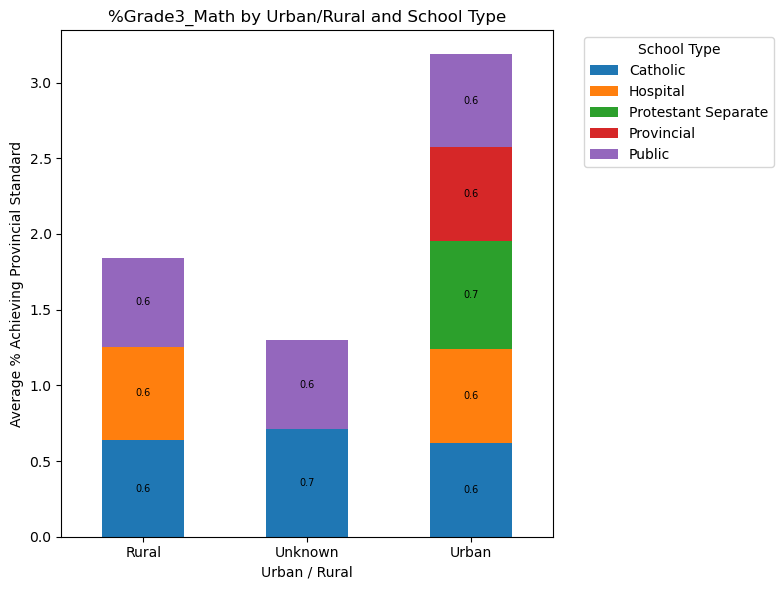

In [2466]:
#plotting 
counts = (temp.groupby(['Urban_Rural', 'School_Type'])['%Grade3_Math'].mean().unstack('School_Type'))
ax = counts.plot(kind='bar', stacked=True, figsize=(8,6))

plt.title('%Grade3_Math by Urban/Rural and School Type')
plt.ylabel('Average % Achieving Provincial Standard')
plt.xlabel('Urban / Rural')
plt.xticks(rotation=0)
plt.legend(title='School Type', bbox_to_anchor=(1.05, 1))
# Add value labels on bars
for i, (index, row) in enumerate(counts.iterrows()):
    bottom = 0
    for col in counts.columns:
        value = row[col]
        if pd.notna(value) and value > 0:
            ax.text(
                i,                      # x position (bar index)
                bottom + value / 2,     # y position (middle of bar segment)
                f'{value:.1f}',         # label text (1 decimal)
                ha='center',
                va='center',
                fontsize=7
            )
            bottom += value  # move to next stacked level
plt.tight_layout()

* Looking at the above, it seems like catholic schools are doing better than public schools in the achievement values, but only slightly so. Now, let's look at higher grades. 

In [2467]:
# Now group by Urban_Rural and School_Type and compute the mean for grade 6 achievement values
cols = [
    '%Grade6_Reading',
    '%Grade6_Writing',
    '%Grade6_Math',
]

temp = df.copy()
temp[cols] = temp[cols].apply(pd.to_numeric, errors="coerce")

Avg_grade6_Urbanrural_SchoolType = temp.groupby(['Urban_Rural','School_Type'])[cols].mean()

Avg_grade6_Urbanrural_SchoolType

/var/folders/r5/580fy3592075knzhrq4w52nm0000gp/T/ipykernel_30115/2701244154.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Avg_grade6_Urbanrural_SchoolType = temp.groupby(['Urban_Rural','School_Type'])[cols].mean()


%Grade6_Reading  %Grade6_Writing  \
Urban_Rural School_Type                                             
Rural       Catholic                    0.861461         0.796591   
            Hospital                         NaN              NaN   
            Protestant Separate              NaN              NaN   
            Provincial                       NaN              NaN   
            Public                      0.793810         0.746335   
Unknown     Catholic                    0.873750         0.723750   
            Hospital                         NaN              NaN   
            Protestant Separate              NaN              NaN   
            Provincial                       NaN              NaN   
            Public                      0.777500         0.735625   
Urban       Catholic                    0.853554         0.817583   
            Hospital                    0.850000         0.810000   
            Protestant Separate         1.000000         0.920000   
            Provincial                  0.850000         0.810000   
            Public                      0.816376         0.792374   

                                 %Grade6_Math  
Urban_Rural School_Type                        
Rural       Catholic                 0.466543  
            Hospital                      NaN  
            Protestant Separate           NaN  
            Provincial                    NaN  
            Public                   0.432306  
Unknown     Catholic                 0.495000  
            Hospital                      NaN  
            Protestant Separate           NaN  
            Provincial                    NaN  
            Public                   0.404375  
Urban       Catholic                 0.494650  
            Hospital                 0.488219  
            Protestant Separate      0.640000  
            Provincial               0.488219  
            Public                   0.504233

/var/folders/r5/580fy3592075knzhrq4w52nm0000gp/T/ipykernel_30115/81918701.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = (temp.groupby(['Urban_Rural', 'School_Type'])['%Grade6_Reading'].mean().unstack('School_Type'))


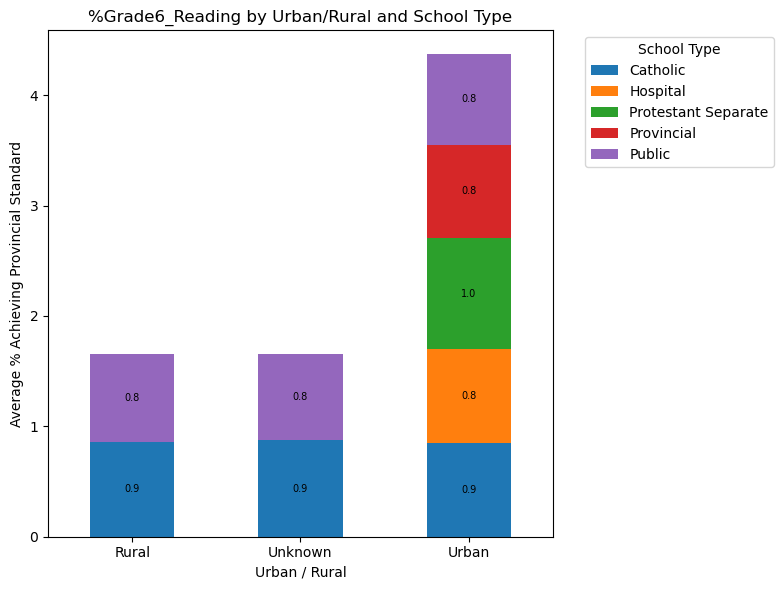

In [2468]:
#plotting 
counts = (temp.groupby(['Urban_Rural', 'School_Type'])['%Grade6_Reading'].mean().unstack('School_Type'))
ax = counts.plot(kind='bar', stacked=True, figsize=(8,6))

plt.title('%Grade6_Reading by Urban/Rural and School Type')
plt.ylabel('Average % Achieving Provincial Standard')
plt.xlabel('Urban / Rural')
plt.xticks(rotation=0)
plt.legend(title='School Type', bbox_to_anchor=(1.05, 1))
# Add value labels on bars
for i, (index, row) in enumerate(counts.iterrows()):
    bottom = 0
    for col in counts.columns:
        value = row[col]
        if pd.notna(value) and value > 0:
            ax.text(
                i,                      # x position (bar index)
                bottom + value / 2,     # y position (middle of bar segment)
                f'{value:.1f}',         # label text (1 decimal)
                ha='center',
                va='center',
                fontsize=7
            )
            bottom += value  # move to next stacked level
plt.tight_layout()

/var/folders/r5/580fy3592075knzhrq4w52nm0000gp/T/ipykernel_30115/2362176030.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = (temp.groupby(['Urban_Rural', 'School_Type'])['%Grade6_Writing'].mean().unstack('School_Type'))


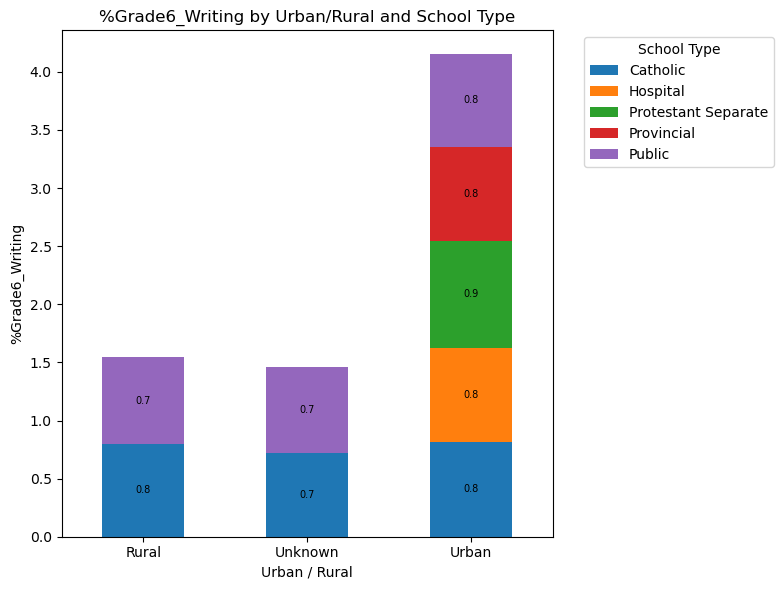

In [2469]:
#plotting 
counts = (temp.groupby(['Urban_Rural', 'School_Type'])['%Grade6_Writing'].mean().unstack('School_Type'))
ax = counts.plot(kind='bar', stacked=True, figsize=(8,6))

plt.title('%Grade6_Writing by Urban/Rural and School Type')
plt.ylabel('%Grade6_Writing')
plt.xlabel('Urban / Rural')
plt.xticks(rotation=0)
plt.legend(title='School Type', bbox_to_anchor=(1.05, 1))
# Add value labels on bars
for i, (index, row) in enumerate(counts.iterrows()):
    bottom = 0
    for col in counts.columns:
        value = row[col]
        if pd.notna(value) and value > 0:
            ax.text(
                i,                      # x position (bar index)
                bottom + value / 2,     # y position (middle of bar segment)
                f'{value:.1f}',         # label text (1 decimal)
                ha='center',
                va='center',
                fontsize=7
            )
            bottom += value  # move to next stacked level
plt.tight_layout()

/var/folders/r5/580fy3592075knzhrq4w52nm0000gp/T/ipykernel_30115/1291346701.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = temp.groupby(['Urban_Rural', 'School_Type'])['%Grade6_Math'] \


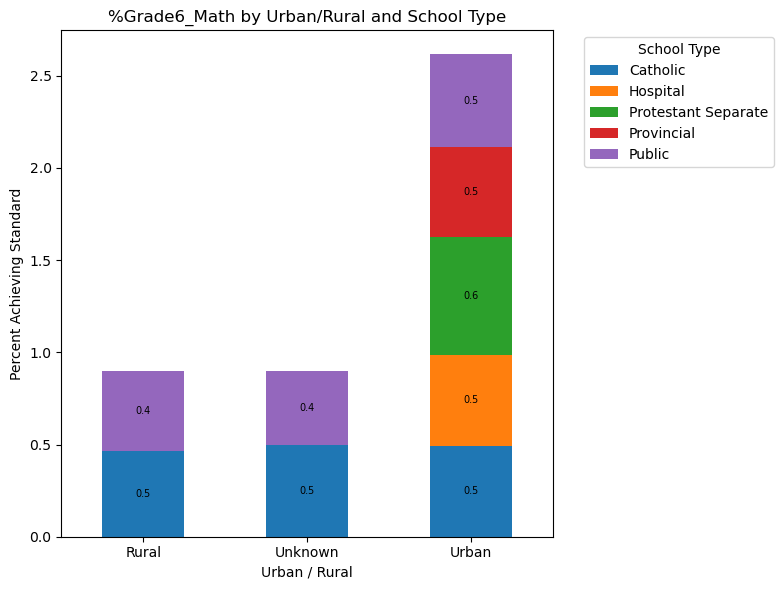

In [2470]:
import matplotlib.pyplot as plt

# Group, aggregate and pivot data
counts = temp.groupby(['Urban_Rural', 'School_Type'])['%Grade6_Math'] \
             .mean().unstack('School_Type')

# Plot and get the Axes object
ax = counts.plot(kind='bar', stacked=True, figsize=(8, 6))

# Title and axis labels
plt.title('%Grade6_Math by Urban/Rural and School Type')
plt.ylabel('Percent Achieving Standard')
plt.xlabel('Urban / Rural')

# Ticks and legend
plt.xticks(rotation=0)
plt.legend(title='School Type', bbox_to_anchor=(1.05, 1))

# Add value labels on bars
for i, (index, row) in enumerate(counts.iterrows()):
    bottom = 0
    for col in counts.columns:
        value = row[col]
        if pd.notna(value) and value > 0:
            ax.text(
                i,                      # x position (bar index)
                bottom + value / 2,     # y position (middle of bar segment)
                f'{value:.1f}',         # label text (1 decimal)
                ha='center',
                va='center',
                fontsize=7
            )
            bottom += value  # move to next stacked level


plt.tight_layout()

* Looking at the above, again, it seems like catholic schools are doing better than public schools in the achievement values, but only slightly so. There was a singular achievement value where public schools did better than catholic schools very slightly and that was in math, but for the most part the results remained consistent. Now, let's look at higher grades. 

In [2471]:
# Now group by Urban_Rural and School_Type and compute the mean for grade 9 and 10 achievement values
cols = [
    '%Grade9_Math',
    '%Grade10_OSSLT'
]
temp = df.copy()
temp[cols] = temp[cols].apply(pd.to_numeric, errors="coerce")
Avg_grade9_10_Urbanrural_SchoolType = temp.groupby(['Urban_Rural','School_Type'])[cols].mean()
Avg_grade9_10_Urbanrural_SchoolType

/var/folders/r5/580fy3592075knzhrq4w52nm0000gp/T/ipykernel_30115/2707711196.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Avg_grade9_10_Urbanrural_SchoolType = temp.groupby(['Urban_Rural','School_Type'])[cols].mean()


%Grade9_Math  %Grade10_OSSLT
Urban_Rural School_Type                                      
Rural       Catholic                 0.538750        0.859333
            Hospital                      NaN             NaN
            Protestant Separate           NaN             NaN
            Provincial                    NaN             NaN
            Public                   0.411578        0.794274
Unknown     Catholic                 0.635000        0.940000
            Hospital                      NaN             NaN
            Protestant Separate           NaN             NaN
            Provincial                    NaN             NaN
            Public                   0.503333        0.866667
Urban       Catholic                 0.529424        0.851757
            Hospital                      NaN             NaN
            Protestant Separate           NaN             NaN
            Provincial               0.501022        0.850000
            Public                   0.506987        0.823975

/var/folders/r5/580fy3592075knzhrq4w52nm0000gp/T/ipykernel_30115/58296279.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = (temp.groupby(['Urban_Rural', 'School_Type'])['%Grade9_Math'].mean().unstack('School_Type'))


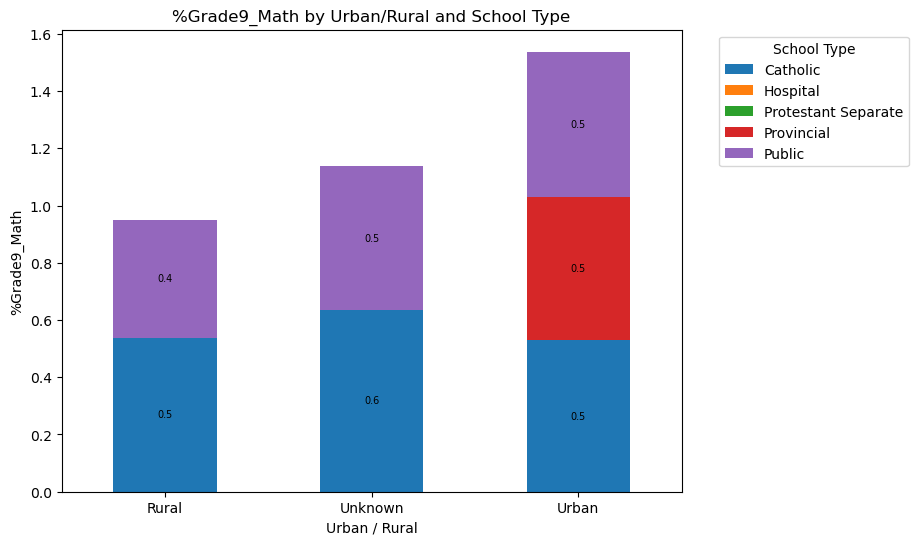

In [2472]:
#plotting 
counts = (temp.groupby(['Urban_Rural', 'School_Type'])['%Grade9_Math'].mean().unstack('School_Type'))
ax = counts.plot(kind='bar', stacked=True, figsize=(8,6))

plt.title('%Grade9_Math by Urban/Rural and School Type')
plt.ylabel('%Grade9_Math')
plt.xlabel('Urban / Rural')
plt.xticks(rotation=0)
plt.legend(title='School Type', bbox_to_anchor=(1.05, 1))
# Add value labels on bars
for i, (index, row) in enumerate(counts.iterrows()):
    bottom = 0
    for col in counts.columns:
        value = row[col]
        if pd.notna(value) and value > 0:
            ax.text(
                i,                      # x position (bar index)
                bottom + value / 2,     # y position (middle of bar segment)
                f'{value:.1f}',         # label text (1 decimal)
                ha='center',
                va='center',
                fontsize=7
            )
            bottom += value  # move to next stacked level

/var/folders/r5/580fy3592075knzhrq4w52nm0000gp/T/ipykernel_30115/1858234530.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = (temp.groupby(['Urban_Rural', 'School_Type'])['%Grade10_OSSLT'].mean().unstack('School_Type'))


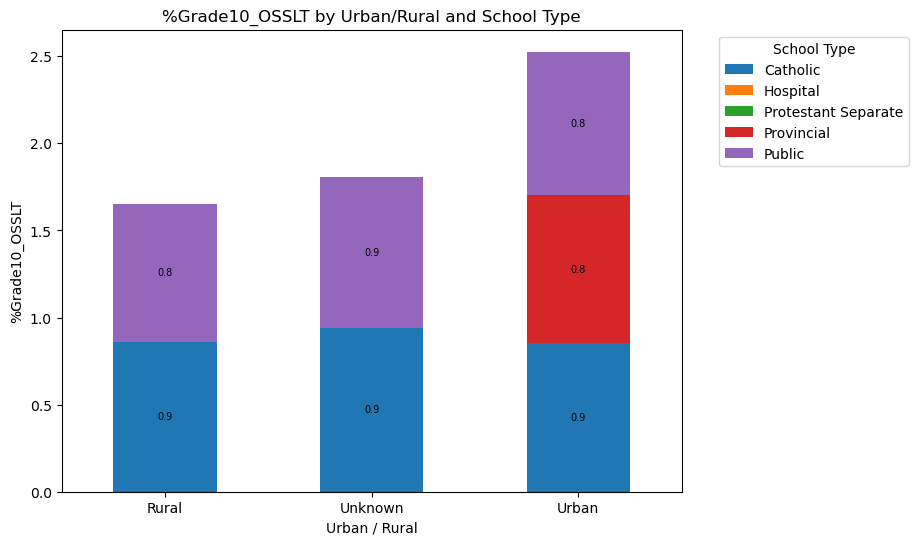

In [2473]:
#plotting 
counts = (temp.groupby(['Urban_Rural', 'School_Type'])['%Grade10_OSSLT'].mean().unstack('School_Type'))
ax = counts.plot(kind='bar', stacked=True, figsize=(8,6))

plt.title('%Grade10_OSSLT by Urban/Rural and School Type')
plt.ylabel('%Grade10_OSSLT')
plt.xlabel('Urban / Rural')
plt.xticks(rotation=0)
plt.legend(title='School Type', bbox_to_anchor=(1.05, 1))
# Add value labels on bars
for i, (index, row) in enumerate(counts.iterrows()):
    bottom = 0
    for col in counts.columns:
        value = row[col]
        if pd.notna(value) and value > 0:
            ax.text(
                i,                      # x position (bar index)
                bottom + value / 2,     # y position (middle of bar segment)
                f'{value:.1f}',         # label text (1 decimal)
                ha='center',
                va='center',
                fontsize=7
            )
            bottom += value  # move to next stacked level

* Looking at the above, again, it seems like catholic schools are doing better than public schools in the achievement values, but only slightly so. 

#### In summary, we can see:
* Urban schools perform better than rural schools in achievement values, although only slightly so.
* Catholic schools perform better than public schools in achievement values, although only slightly so again. 
* For Grade 3 achievement values, lower percentage of students met the standard for writing and math. And for Grade 6 achievement values, way lower percentage of students met the standard for just math. Moreover, higher percentage of students met the standard for reading. And the Grade 9 achievement values also show low percentage of students met the standard for math. So, there was major improvement in reading and writing between Grade 3 and 6 so that could be due to development of the kids or perhaps it indicates a higher quality of teachers in higher grades. And perhaps the math content got more difficult. 
* A large percentage of students passed the OSSLT literacy test in their first attempt when they were in grade 10.

## 2.2
* The next thing we want to look at is a comparison of performance based on language spoken.

In [2474]:
df.head(2) #to see the data

Board_Number  Board_Name              Board_Type School_Number  \
0       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        902344   
1       B28010  Algoma DSB  Pub Dist Sch Brd (E/F)        019186   

                                    School_Name School_Type  \
0  Algoma Education Connection Secondary School      Public   
1                     Anna McCrea Public School      Public   

  School_Spec_Cond_Code School_Level School_Lang Grade_Range  \
0           Alternative    Secondary     English        9-12   
1        Not applicable   Elementary     English        JK-8   

             Street               Municipality             City Province  \
0  550 Northern Ave  Sault Ste. Marie, City of  Sault Ste Marie  Ontario   
1       250 Mark St  Sault Ste. Marie, City of  Sault Ste Marie  Ontario   

  Postal_Code  Phone_Number    Fax_Number  \
0      P6B4J4  705-945-7194  705-945-7173   
1      P6A3M7  705-945-7106  705-945-7221   

                                      School_Website          Board_Website  \
0                              http://www.adsb.on.ca  http://www.adsb.on.ca   
1  http://www.adsb.on.ca/sites/schools/amc/defaul...  http://www.adsb.on.ca   

   Enrolment  Latitude  Longitude %Stud_FirstLang_Not_Eng  \
0        170  46.53477   -84.3077                       0   
1        280  46.50593   -84.2873                    0.05   

  %Stud_FirstLang_Not_Fr %Stud_New_Canada_Non-Eng_Cntry  \
0                      1                              0   
1                      1                              0   

  %Stud_New_Canada_Non-Fr_Cntry %Stud_Special_Ed %Stud_Gifted %Grade3_Reading  \
0                             0              0.4            0             NaN   
1                             0              0.2            0            0.73   

   Change_G3_Read_3Yr %Grade3_Writing  Change_G3_Write_3Yr %Grade3_Math  \
0                 NaN             NaN                  NaN          NaN   
1               -16.0            0.77                 -8.0         0.67   

   Change_G3_Math_3Yr %Grade6_Reading  Change_G6_Read_3Yr %Grade6_Writing  \
0                 NaN             NaN                 NaN             NaN   
1               -18.0            0.92                19.0               1   

   Change_G6_Write_3Yr %Grade6_Math  Change_G6_Math_3Yr %Grade9_Math  \
0                  NaN          NaN                 NaN          N/D   
1                 23.0         0.62                12.0          NaN   

   Change_G9_Math_3Yr %Grade10_OSSLT  Change_G10_OSSLT_3Yr  \
0                 1.0            N/R              2.938942   
1                 NaN            NaN                   NaN   

  %Child_Livein_LowInc_HH %Stud_Par_NoDegDipCert Extract_Date Urban_Rural  
0                    0.15                   0.05   2025-08-01       Urban  
1                       0                      0   2025-08-01       Urban

## 2.2 a) Count of schools by Language (English vs French)

In [2475]:
language_counts = df['School_Lang'].value_counts()
language_counts

School_Lang
English    4261
French      446
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of Schools by Language')

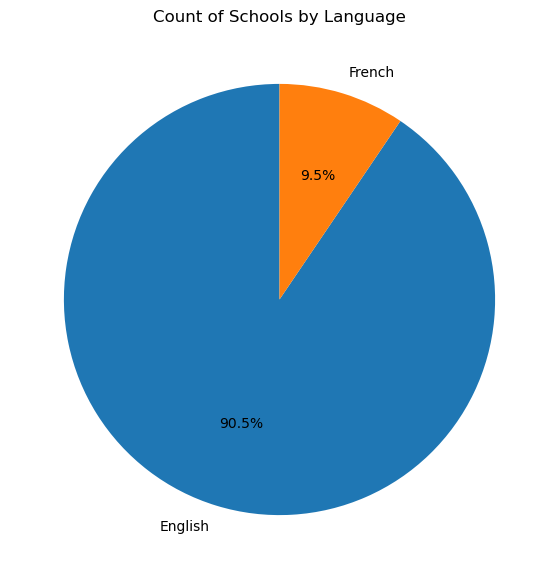

In [2476]:
# Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(
    language_counts.values,
    labels=language_counts.index,
    autopct='%1.1f%%',  
    startangle=90
)
plt.title("Count of Schools by Language")

* There's a larger amount of English based schools than French schools

## 2.2 b) Look at achievement values Based on Language of School

In [2477]:
# Now group by School_Lang and compute the mean for grade 3 achievement values
cols = [
    '%Grade3_Reading',
    '%Grade3_Writing',
    '%Grade3_Math'
]

temp = df.copy()
temp[cols] = temp[cols].apply(pd.to_numeric, errors="coerce")

Avg_grade3_Lang = temp.groupby('School_Lang')[cols].mean()

Avg_grade3_Lang

%Grade3_Reading  %Grade3_Writing  %Grade3_Math
School_Lang                                                
English             0.707668         0.628950      0.604838
French              0.815521         0.642587      0.717761

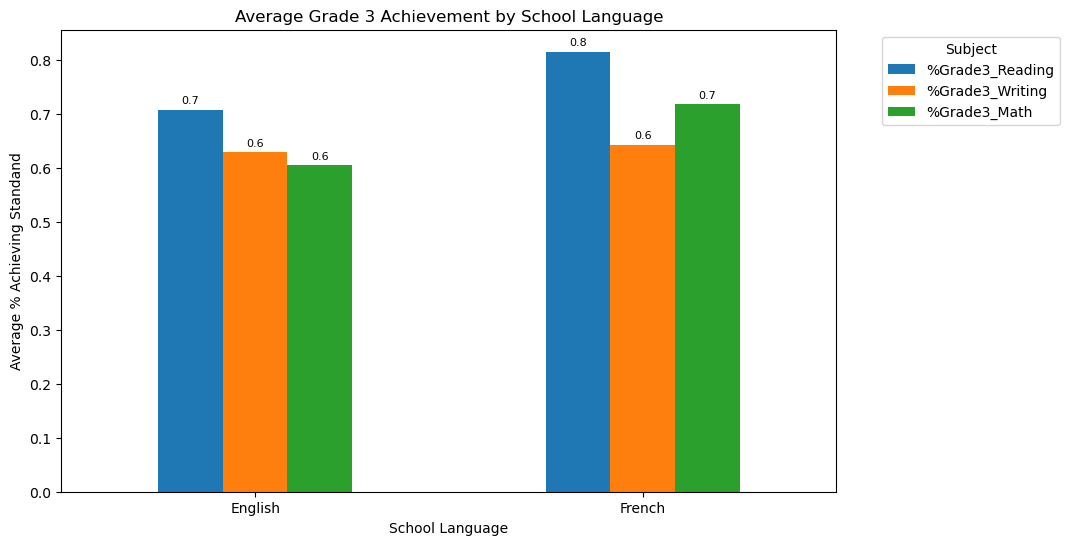

In [2478]:
#plotting results
ax = Avg_grade3_Lang.plot(kind='bar', figsize=(10,6))

plt.title('Average Grade 3 Achievement by School Language')
plt.xlabel('School Language')
plt.ylabel('Average % Achieving Standand')
plt.xticks(rotation=0)
plt.legend(title='Subject', bbox_to_anchor=(1.05, 1))
# --- Add value labels on each bar ---
for container in ax.containers:
    # Add labels only for non-empty bars
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=8, padding=3)

* English and French schools seem to have similar achievement values, just that French schools are slightly higher. Now, let's see if it's the same for higher grades.

In [2479]:
# Now group by School_Lang and compute the mean for grade 6 achievement values
cols = [
    '%Grade6_Reading',
    '%Grade6_Writing',
    '%Grade6_Math'
]

temp = df.copy()
temp[cols] = temp[cols].apply(pd.to_numeric, errors="coerce")

Avg_grade6_Lang = temp.groupby('School_Lang')[cols].mean()

Avg_grade6_Lang

%Grade6_Reading  %Grade6_Writing  %Grade6_Math
School_Lang                                                
English             0.814953         0.794685      0.482051
French              0.973785         0.770956      0.564614

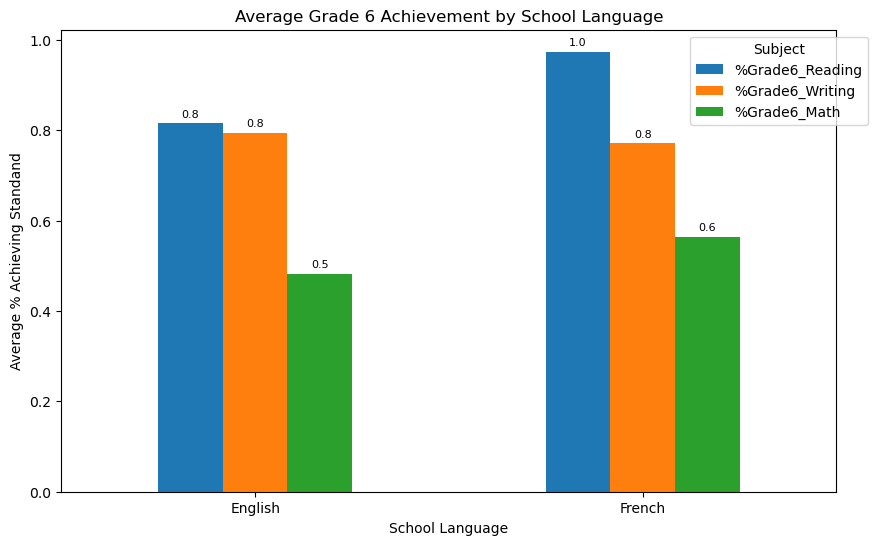

In [2480]:
#plotting results
ax = Avg_grade6_Lang.plot(kind='bar', figsize=(10,6))

plt.title('Average Grade 6 Achievement by School Language')
plt.xlabel('School Language')
plt.ylabel('Average % Achieving Standand')
plt.xticks(rotation=0)
plt.legend(title='Subject', bbox_to_anchor=(1.05, 1))
# --- Add value labels on each bar ---
for container in ax.containers:
    # Add labels only for non-empty bars
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=8, padding=3)

#### Based on the above, for the grade 6 achievement values:
* French schools did significantly better than English schools in reading
* English schools did very slightly better than French schools in writing
* French schools did slightly better than English schools in math
* So, there is slight difference between the results for Grade 3 and 6 achievement values

In [2481]:
# Now group by School_Lang and compute the mean for grade 9 and 10 achievement values
cols = [
    '%Grade9_Math',
    '%Grade10_OSSLT' 
]

temp = df.copy()
temp[cols] = temp[cols].apply(pd.to_numeric, errors="coerce")

Avg_grade9_10_Lang = temp.groupby('School_Lang')[cols].mean()

Avg_grade9_10_Lang

%Grade9_Math  %Grade10_OSSLT
School_Lang                              
English          0.492202        0.818401
French           0.566511        0.910000

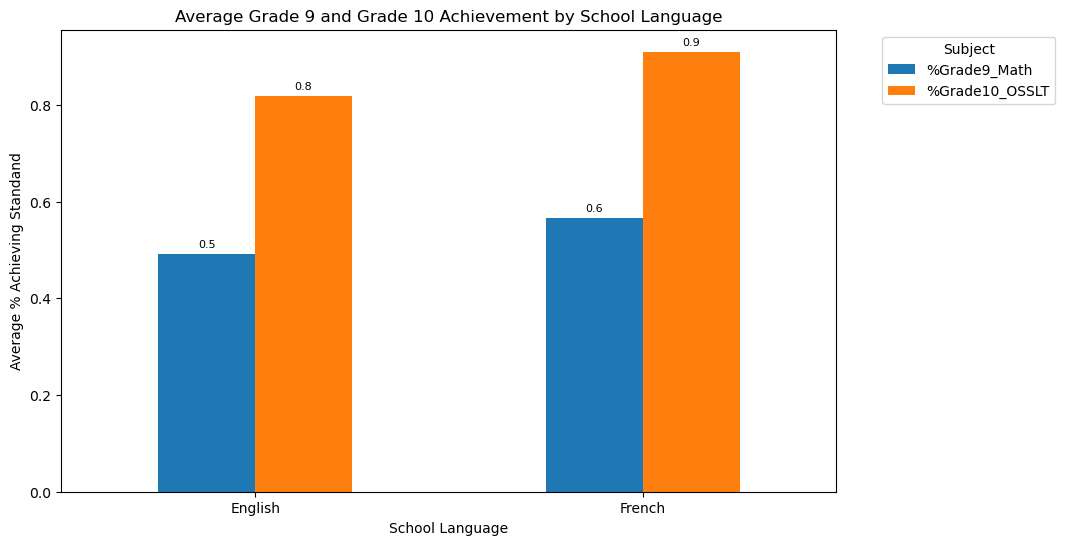

In [2482]:
#plotting results
ax = Avg_grade9_10_Lang.plot(kind='bar', figsize=(10,6))

plt.title('Average Grade 9 and Grade 10 Achievement by School Language')
plt.xlabel('School Language')
plt.ylabel('Average % Achieving Standand')
plt.xticks(rotation=0)
plt.legend(title='Subject', bbox_to_anchor=(1.05, 1))
# --- Add value labels on each bar ---
for container in ax.containers:
    # Add labels only for non-empty bars
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=8, padding=3)

* Once again, English and French schools seem to have similar achievement values, just that French schools are slightly higher.

#### In summary, we can see:
* French schools perform better than English schools, although only slightly so, except for Grade 6 reading where it was more significant.
* We can also note that higher percentage of students met the standard for reading and writing in Grade 6, so reading and writing got better between grade 3 and grade 6 (perhaps it's due to development of the kids or it may indicate a higher quality of teachers in higher grades). Meanwhile, it reduced for math (perhaps the content got more difficult). These findings are consistent with what we saw above.

## 2.2 c) Look at Achievement Values Based on Language of School and Students whose First Language is not the School's Language

## 2.2 c) i) For English schools

In [2483]:
english_schools = df[df['School_Lang'] == 'English'].copy()
performance_cols = [
    '%Grade3_Reading',
    '%Grade3_Writing',
    '%Grade3_Math'
]
english_schools[['%Stud_FirstLang_Not_Eng'] + performance_cols] = english_schools[['%Stud_FirstLang_Not_Eng'] + performance_cols].apply(
    pd.to_numeric, errors='coerce')
corr_matrix = english_schools[['%Stud_FirstLang_Not_Eng'] + performance_cols].corr()
corr_matrix

%Stud_FirstLang_Not_Eng  %Grade3_Reading  \
%Stud_FirstLang_Not_Eng                 1.000000        -0.050427   
%Grade3_Reading                        -0.050427         1.000000   
%Grade3_Writing                        -0.011140         0.836009   
%Grade3_Math                           -0.026209         0.797490   

                         %Grade3_Writing  %Grade3_Math  
%Stud_FirstLang_Not_Eng        -0.011140     -0.026209  
%Grade3_Reading                 0.836009      0.797490  
%Grade3_Writing                 1.000000      0.777481  
%Grade3_Math                    0.777481      1.000000

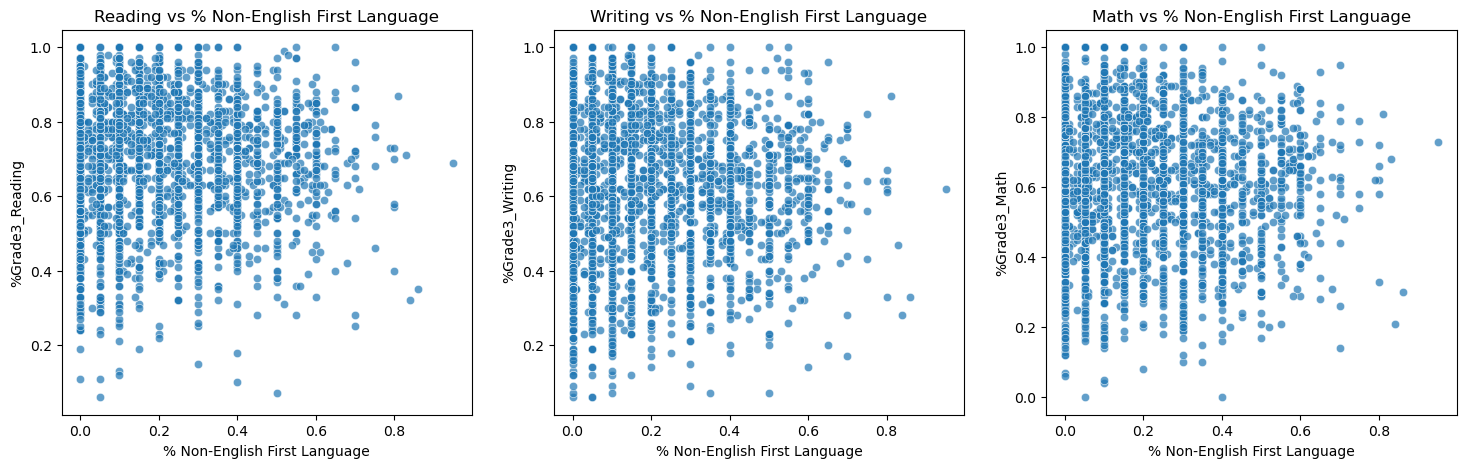

In [2484]:
#plotting scatter
fig, axes = plt.subplots(1, 3, figsize=(18,5), sharex=True, sharey=False)

for ax, y_col in zip(axes, performance_cols):
    sns.scatterplot(
        data=english_schools,
        x='%Stud_FirstLang_Not_Eng',
        y=y_col,
        alpha=0.7,
        ax=ax
    )
    ax.set_title(f"{y_col.split('_')[-1]} vs % Non-English First Language")
    ax.set_xlabel("% Non-English First Language")

Text(0.5, 1.0, 'Correlation: % Students Not English First Language vs Grade 3 Achievement')

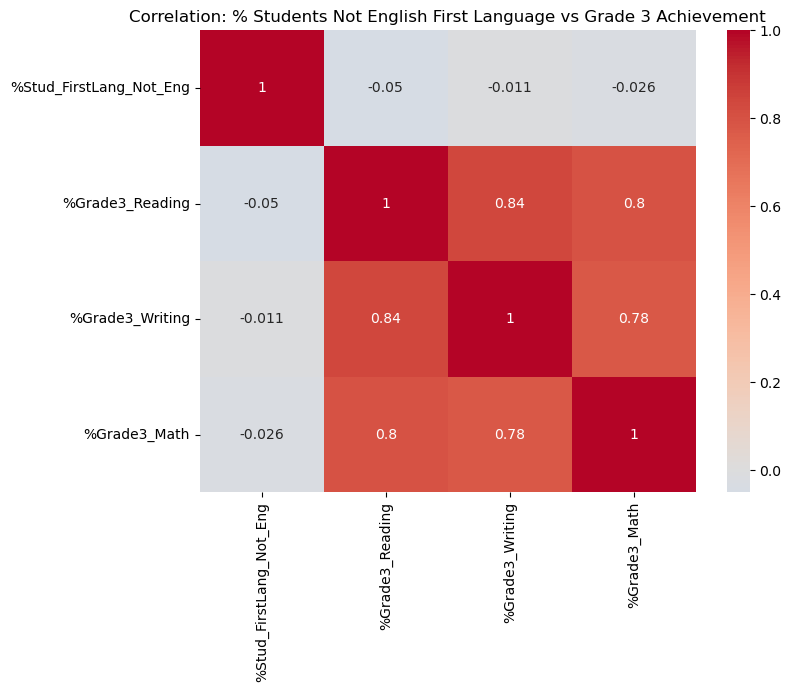

In [2485]:
#plotting heat map
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,          
    cmap='coolwarm',     
    center=0             
)
plt.title("Correlation: % Students Not English First Language vs Grade 3 Achievement")

* Based on the above, there is a very weak negative correlation between the Percentage of Students whose First Language is not English and Grade 3 achievement values. But there seems to be a strong positive correlation between the achievement values themselves. Now, let's look at the results for higher grades. 

In [2486]:
english_schools = df[df['School_Lang'] == 'English'].copy()
performance_cols = [
    '%Grade6_Reading',
    '%Grade6_Writing',
    '%Grade6_Math'
]
english_schools[['%Stud_FirstLang_Not_Eng'] + performance_cols] = english_schools[['%Stud_FirstLang_Not_Eng'] + performance_cols].apply(pd.to_numeric, errors='coerce')
corr_matrix = english_schools[['%Stud_FirstLang_Not_Eng'] + performance_cols].corr()
corr_matrix

%Stud_FirstLang_Not_Eng  %Grade6_Reading  \
%Stud_FirstLang_Not_Eng                 1.000000         0.009167   
%Grade6_Reading                         0.009167         1.000000   
%Grade6_Writing                         0.079374         0.827879   
%Grade6_Math                            0.073577         0.718643   

                         %Grade6_Writing  %Grade6_Math  
%Stud_FirstLang_Not_Eng         0.079374      0.073577  
%Grade6_Reading                 0.827879      0.718643  
%Grade6_Writing                 1.000000      0.725634  
%Grade6_Math                    0.725634      1.000000

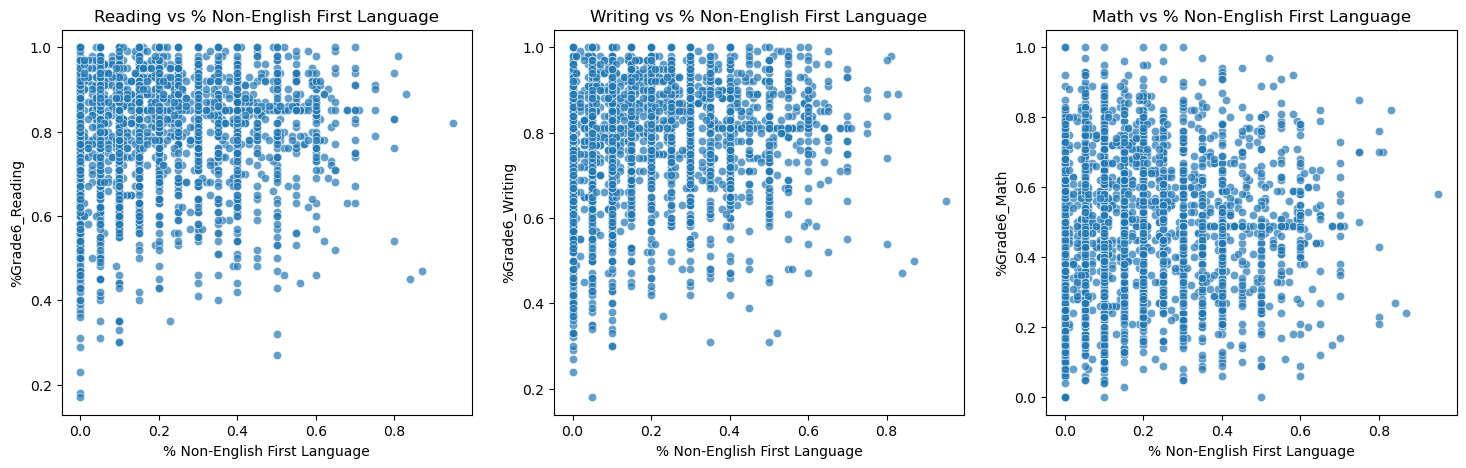

In [2487]:
#plotting scatter
fig, axes = plt.subplots(1, 3, figsize=(18,5), sharex=True, sharey=False)

for ax, y_col in zip(axes, performance_cols):
    sns.scatterplot(
        data=english_schools,
        x='%Stud_FirstLang_Not_Eng',
        y=y_col,
        alpha=0.7,
        ax=ax
    )
    ax.set_title(f"{y_col.split('_')[-1]} vs % Non-English First Language")
    ax.set_xlabel("% Non-English First Language")

Text(0.5, 1.0, 'Correlation: % Students Not English First Language vs Grade 6 Achievement')

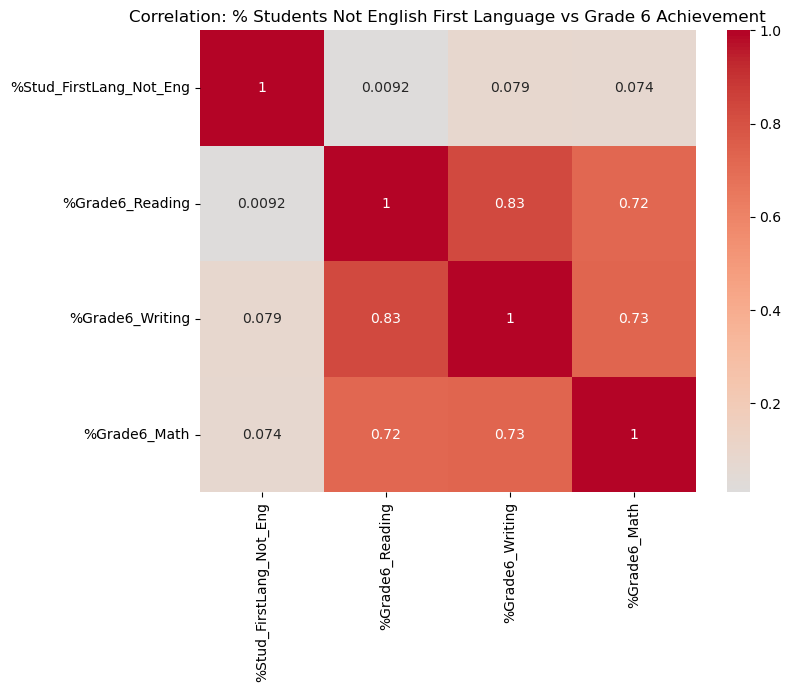

In [2488]:
#plotting heat map
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,          
    cmap='coolwarm',     
    center=0             
)
plt.title("Correlation: % Students Not English First Language vs Grade 6 Achievement")

* Based on the above, once again, there is a very weak positive correlation between the Percentage of Students whose First Language is not English and Grade 6 achievement values. However, the correlation between the writing and math achievement values and the Percentage of Students whose First Language is not English is similar and markedly stronger than the correlation between the reading achievement value and the Percentage of Students whose First Language is not English. And there also seems to be a strong positive correlation between the achievement values themselves again. Now, let's look at the results for higher grades. 

In [2489]:
english_schools = df[df['School_Lang'] == 'English'].copy()
performance_cols = [
    '%Grade9_Math',
    '%Grade10_OSSLT' 
]
english_schools[['%Stud_FirstLang_Not_Eng'] + performance_cols] = english_schools[['%Stud_FirstLang_Not_Eng'] + performance_cols].apply(pd.to_numeric, errors='coerce')
corr_matrix = english_schools[['%Stud_FirstLang_Not_Eng'] + performance_cols].corr()
corr_matrix

%Stud_FirstLang_Not_Eng  %Grade9_Math  %Grade10_OSSLT
%Stud_FirstLang_Not_Eng                 1.000000      0.233833        0.100366
%Grade9_Math                            0.233833      1.000000        0.707221
%Grade10_OSSLT                          0.100366      0.707221        1.000000

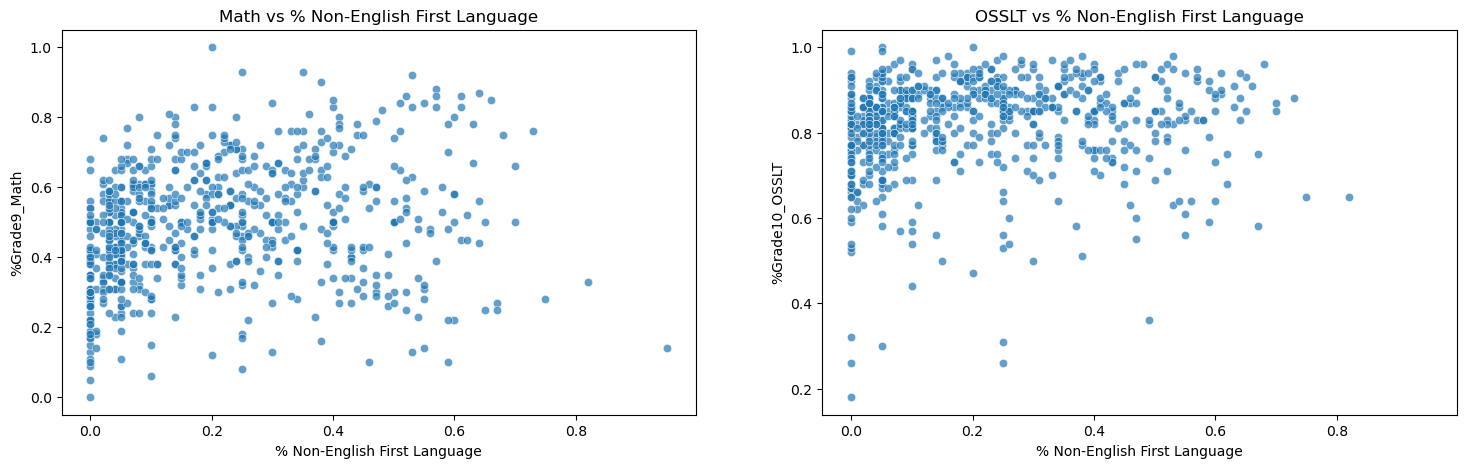

In [2490]:
#plotting scatter
fig, axes = plt.subplots(1, 2, figsize=(18,5), sharex=True, sharey=False)

for ax, y_col in zip(axes, performance_cols):
    sns.scatterplot(
        data=english_schools,
        x='%Stud_FirstLang_Not_Eng',
        y=y_col,
        alpha=0.7,
        ax=ax
    )
    ax.set_title(f"{y_col.split('_')[-1]} vs % Non-English First Language")
    ax.set_xlabel("% Non-English First Language")

Text(0.5, 1.0, 'Correlation: % Students Not English First Language vs Grade 9 and 10 Achievement')

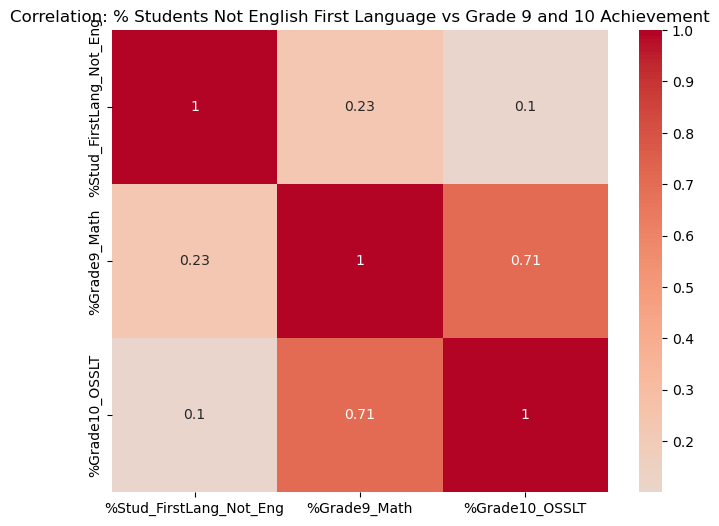

In [2491]:
#plotting heat map
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,          
    cmap='coolwarm',     
    center=0             
)
plt.title("Correlation: % Students Not English First Language vs Grade 9 and 10 Achievement")

* Based on the above, there is a weak positive correlation between the Percentage of Students whose First Language is not English and Grade 9 and 10 achievement values, although it is stronger than prior correlations, with the correlation for the grade 9 achievement value being strongest. And there also seems to be a strong positive correlation between the achievement values themselves again. 

#### In summary:
* There is very weak correlation between Percentage of Students whose First Language is not English and Grade 3 and 6 achievement values. Although with grade 6 achievement values, the correlation between the writing and math achievement values and the Percentage of Students whose First Language is not English is similar and markedly stronger than the correlation between the reading achievement value and the Percentage of Students whose First Language is not English. 
* There is a weak positive correlation between Percentage of Students whose First Language is not English and Grade 9 and 10 achievement values, although more significant, so we can say that there is more of an impact in higher grades.
* There is strong correlation between the achievement values themselves.

## 2.2 c) ii) For French schools

In [2492]:
french_schools = df[df['School_Lang'] == 'French'].copy()
performance_cols = [
    '%Grade3_Reading',
    '%Grade3_Writing',
    '%Grade3_Math'
]
french_schools[['%Stud_FirstLang_Not_Fr'] + performance_cols] = french_schools[['%Stud_FirstLang_Not_Fr'] + performance_cols].apply(pd.to_numeric, errors='coerce')
corr_matrix = french_schools[['%Stud_FirstLang_Not_Fr'] + performance_cols].corr()
corr_matrix

%Stud_FirstLang_Not_Fr  %Grade3_Reading  \
%Stud_FirstLang_Not_Fr                1.000000         0.002572   
%Grade3_Reading                       0.002572         1.000000   
%Grade3_Writing                       0.055975         0.816565   
%Grade3_Math                          0.047793         0.785068   

                        %Grade3_Writing  %Grade3_Math  
%Stud_FirstLang_Not_Fr         0.055975      0.047793  
%Grade3_Reading                0.816565      0.785068  
%Grade3_Writing                1.000000      0.778265  
%Grade3_Math                   0.778265      1.000000

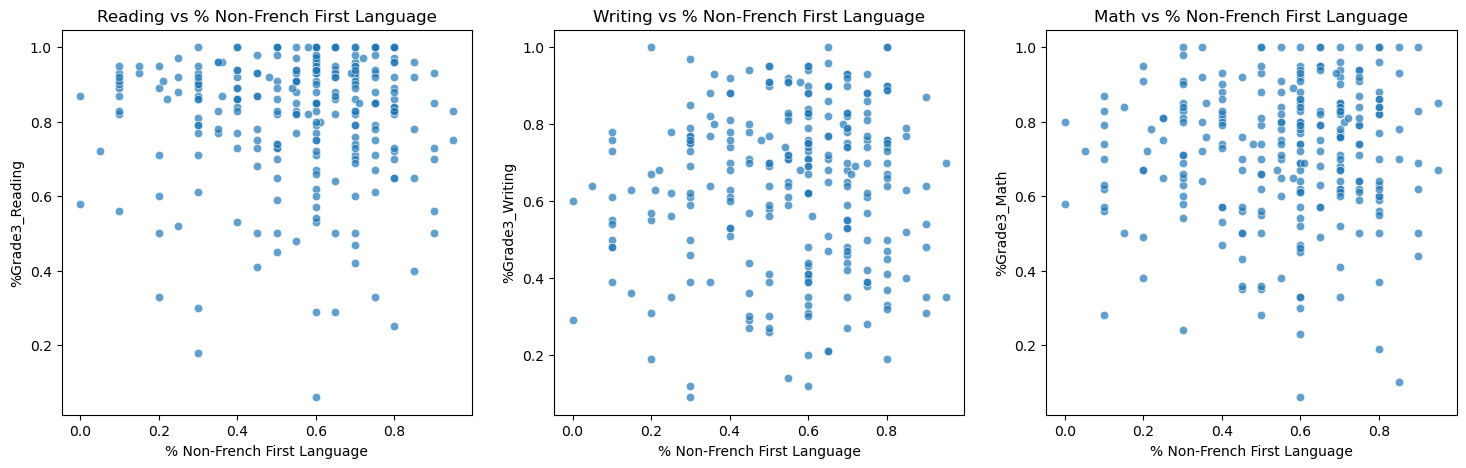

In [2493]:
#plotting scatter
fig, axes = plt.subplots(1, 3, figsize=(18,5), sharex=True, sharey=False)

for ax, y_col in zip(axes, performance_cols):
    sns.scatterplot(
        data=french_schools,
        x='%Stud_FirstLang_Not_Fr',
        y=y_col,
        alpha=0.7,
        ax=ax
    )
    ax.set_title(f"{y_col.split('_')[-1]} vs % Non-French First Language")
    ax.set_xlabel("% Non-French First Language")

Text(0.5, 1.0, 'Correlation: % Students Not French First Language vs Grade 3 Achievement')

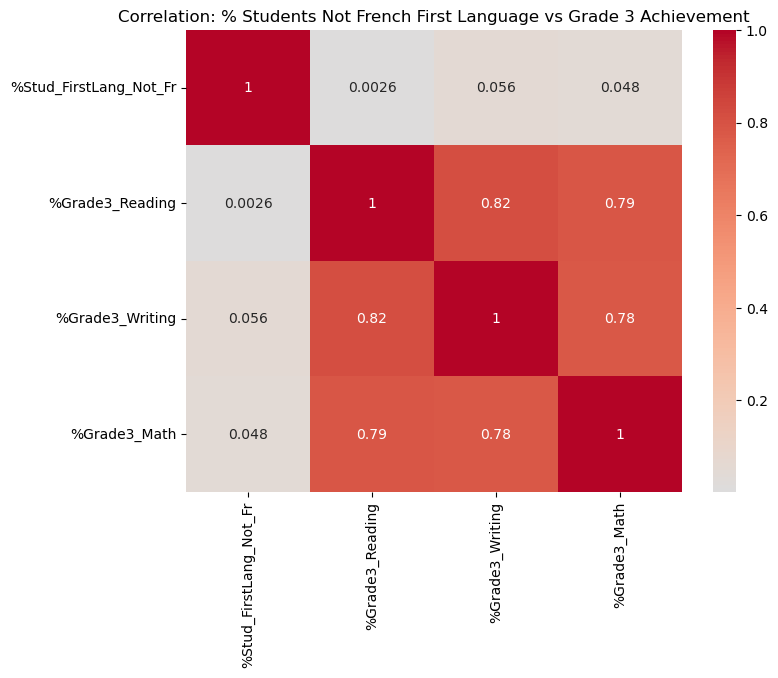

In [2494]:
#plotting heat map
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,          
    cmap='coolwarm',     
    center=0             
)
plt.title("Correlation: % Students Not French First Language vs Grade 3 Achievement")

* Based on the above, there is a very weak positive correlation between the Percentage of Students whose First Language is not French and Grade 3 achievement values. Although, like with the Grade 6 achievement values for the English schools, Percentage of Students whose First Language is not French and Grade 3 Writing and Math achievement values are similar and markedly stronger than the correlation between the reading achievement value and the Percentage of Students whose First Language is not French. Also, there seems to be a strong positive correlation between the achievement values themselves. Now, let's look at the results for higher grades. 

In [2495]:
french_schools = df[df['School_Lang'] == 'French'].copy()
performance_cols = [
    '%Grade6_Reading',
    '%Grade6_Writing',
    '%Grade6_Math'
]
french_schools[['%Stud_FirstLang_Not_Fr'] + performance_cols] = french_schools[['%Stud_FirstLang_Not_Fr'] + performance_cols].apply(pd.to_numeric, errors='coerce')
corr_matrix = french_schools[['%Stud_FirstLang_Not_Fr'] + performance_cols].corr()
corr_matrix

%Stud_FirstLang_Not_Fr  %Grade6_Reading  \
%Stud_FirstLang_Not_Fr                1.000000        -0.008963   
%Grade6_Reading                      -0.008963         1.000000   
%Grade6_Writing                       0.016921         0.481633   
%Grade6_Math                          0.196577         0.435258   

                        %Grade6_Writing  %Grade6_Math  
%Stud_FirstLang_Not_Fr         0.016921      0.196577  
%Grade6_Reading                0.481633      0.435258  
%Grade6_Writing                1.000000      0.739775  
%Grade6_Math                   0.739775      1.000000

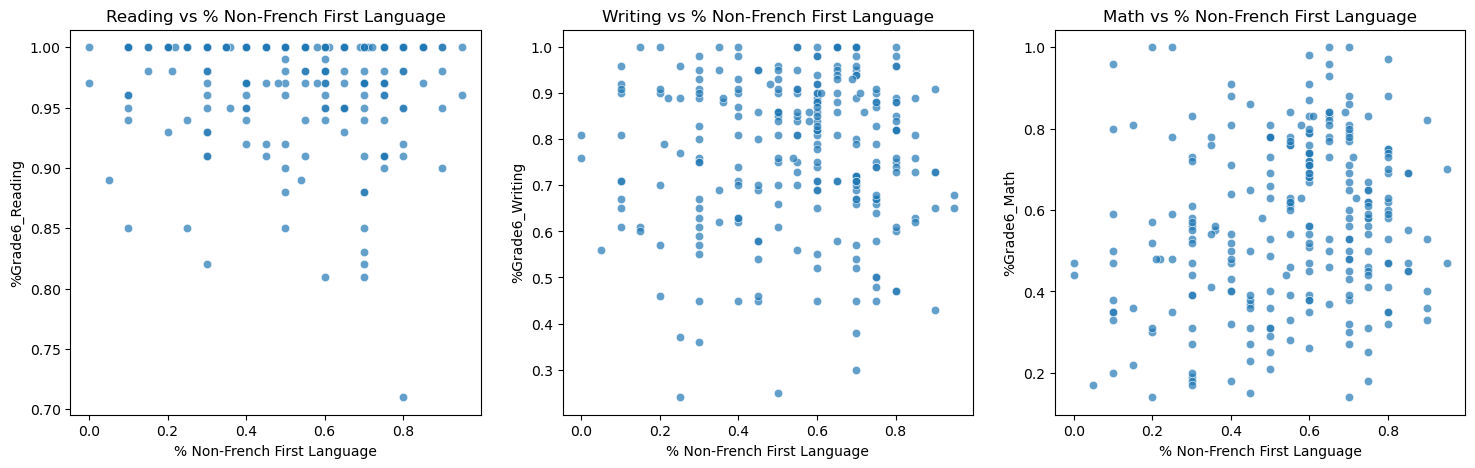

In [2496]:
#plotting scatter
fig, axes = plt.subplots(1, 3, figsize=(18,5), sharex=True, sharey=False)

for ax, y_col in zip(axes, performance_cols):
    sns.scatterplot(
        data=french_schools,
        x='%Stud_FirstLang_Not_Fr',
        y=y_col,
        alpha=0.7,
        ax=ax
    )
    ax.set_title(f"{y_col.split('_')[-1]} vs % Non-French First Language")
    ax.set_xlabel("% Non-French First Language")

Text(0.5, 1.0, 'Correlation: % Students Not French First Language vs Grade 6 Achievement')

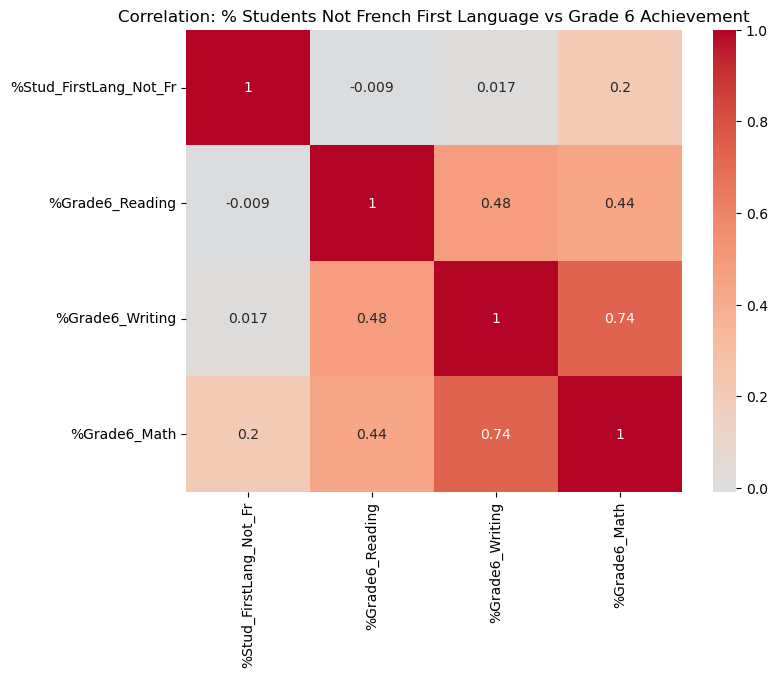

In [2497]:
#plotting heat map
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,          
    cmap='coolwarm',     
    center=0             
)
plt.title("Correlation: % Students Not French First Language vs Grade 6 Achievement")

* Based on the above, there is a respectively very weak negative and positive correlation between the Percentage of Students whose First Language is not French and Grade 6 reading and writing achievement values. However, there is just a weak positive correlation between the math achievement values and the Percentage of Students whose First Language is not French and it is markedly stronger than the rest. And there also seems to be a moderate to strong positive correlation between the achievement values themselves again. Now, let's look at the results for higher grades. 

In [2498]:
french_schools = df[df['School_Lang'] == 'French'].copy()
performance_cols = [
    '%Grade9_Math',
    '%Grade10_OSSLT' 
]
french_schools[['%Stud_FirstLang_Not_Fr'] + performance_cols] = french_schools[['%Stud_FirstLang_Not_Fr'] + performance_cols].apply(pd.to_numeric, errors='coerce')
corr_matrix = french_schools[['%Stud_FirstLang_Not_Fr'] + performance_cols].corr()
corr_matrix

%Stud_FirstLang_Not_Fr  %Grade9_Math  %Grade10_OSSLT
%Stud_FirstLang_Not_Fr                1.000000      0.225376        0.143938
%Grade9_Math                          0.225376      1.000000        0.455004
%Grade10_OSSLT                        0.143938      0.455004        1.000000

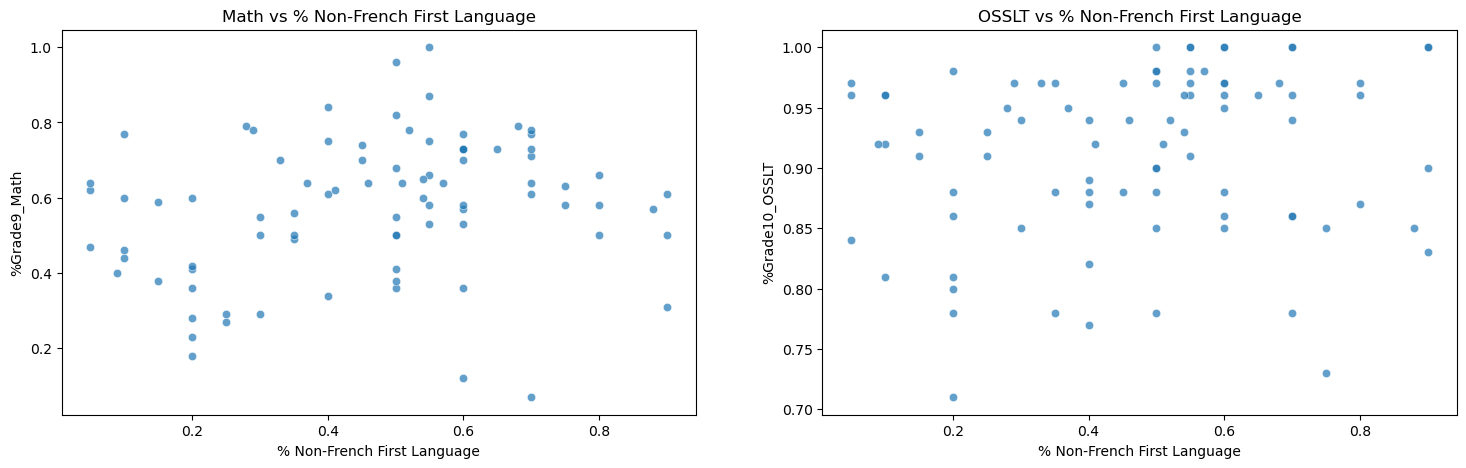

In [2499]:
#plotting scatter
fig, axes = plt.subplots(1, 2, figsize=(18,5), sharex=True, sharey=False)

for ax, y_col in zip(axes, performance_cols):
    sns.scatterplot(
        data=french_schools,
        x='%Stud_FirstLang_Not_Fr',
        y=y_col,
        alpha=0.7,
        ax=ax
    )
    ax.set_title(f"{y_col.split('_')[-1]} vs % Non-French First Language")
    ax.set_xlabel("% Non-French First Language")

Text(0.5, 1.0, 'Correlation: % Students Not French First Language vs Grade 9 and 10 Achievement')

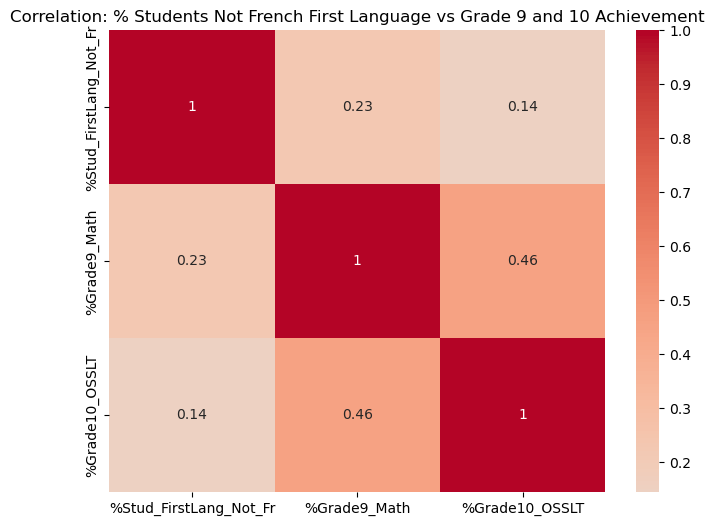

In [2500]:
#plotting heat map
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,          
    cmap='coolwarm',     
    center=0             
)
plt.title("Correlation: % Students Not French First Language vs Grade 9 and 10 Achievement")

* Based on the above, there is a weak positive correlation between the Percentage of Students whose First Language is not French and Grade 9 and 10 achievement values, but it is for the most part stronger than previous correlations, with the correlation for the grade 9 math achievement value being strongest once again. And there also seems to be a moderate positive correlation between the achievement values themselves. 

#### In summary:
* There is very weak correlation between Percentage of Students whose First Language is not English and French and Grade 3 and 6 achievement values, with the exception of the Percentage of Students whose First Language is not French and Grade 6 math achievement value. Moreover, with grade 6 achievement values, the correlation between the writing and math achievement values and the Percentage of Students whose First Language is not English is similar and markedly stronger than the correlation between the reading achievement value and the Percentage of Students whose First Language is not English. And this same trend follows with the Percentage of Students whose First Language is not French and Grade 3 achievement values.
* There is a weak positive, but more significant, correlation between Percentage of Students whose First Language is not English and French and Grade 9 and 10 achievement values, so we can say that there is more of an impact in higher grades.
* There is moderate to strong positive correlation between the achievement values themselves.

## 2.2 d) Look at Achievement Values Based on Language of School and Students who are New to Canada from Non-English and Non-French Country

## 2.2 d) i) For English schools

In [2501]:
df.columns

Index(['Board_Number', 'Board_Name', 'Board_Type', 'School_Number',
       'School_Name', 'School_Type', 'School_Spec_Cond_Code', 'School_Level',
       'School_Lang', 'Grade_Range', 'Street', 'Municipality', 'City',
       'Province', 'Postal_Code', 'Phone_Number', 'Fax_Number',
       'School_Website', 'Board_Website', 'Enrolment', 'Latitude', 'Longitude',
       '%Stud_FirstLang_Not_Eng', '%Stud_FirstLang_Not_Fr',
       '%Stud_New_Canada_Non-Eng_Cntry', '%Stud_New_Canada_Non-Fr_Cntry',
       '%Stud_Special_Ed', '%Stud_Gifted', '%Grade3_Reading',
       'Change_G3_Read_3Yr', '%Grade3_Writing', 'Change_G3_Write_3Yr',
       '%Grade3_Math', 'Change_G3_Math_3Yr', '%Grade6_Reading',
       'Change_G6_Read_3Yr', '%Grade6_Writing', 'Change_G6_Write_3Yr',
       '%Grade6_Math', 'Change_G6_Math_3Yr', '%Grade9_Math',
       'Change_G9_Math_3Yr', '%Grade10_OSSLT', 'Change_G10_OSSLT_3Yr',
       '%Child_Livein_LowInc_HH', '%Stud_Par_NoDegDipCert', 'Extract_Date',
       'Urban_Rural'],
      

In [2502]:
english_schools = df[df['School_Lang'] == 'English'].copy()
performance_cols = [
    '%Grade3_Reading',
    '%Grade3_Writing',
    '%Grade3_Math'
]
english_schools[['%Stud_New_Canada_Non-Eng_Cntry'] + performance_cols] = english_schools[['%Stud_New_Canada_Non-Eng_Cntry'] + performance_cols].apply(pd.to_numeric, errors='coerce')
corr_matrix = english_schools[['%Stud_New_Canada_Non-Eng_Cntry'] + performance_cols].corr()
corr_matrix

%Stud_New_Canada_Non-Eng_Cntry  \
%Stud_New_Canada_Non-Eng_Cntry                        1.000000   
%Grade3_Reading                                      -0.077060   
%Grade3_Writing                                      -0.051843   
%Grade3_Math                                         -0.081044   

                                %Grade3_Reading  %Grade3_Writing  %Grade3_Math  
%Stud_New_Canada_Non-Eng_Cntry        -0.077060        -0.051843     -0.081044  
%Grade3_Reading                        1.000000         0.836009      0.797490  
%Grade3_Writing                        0.836009         1.000000      0.777481  
%Grade3_Math                           0.797490         0.777481      1.000000

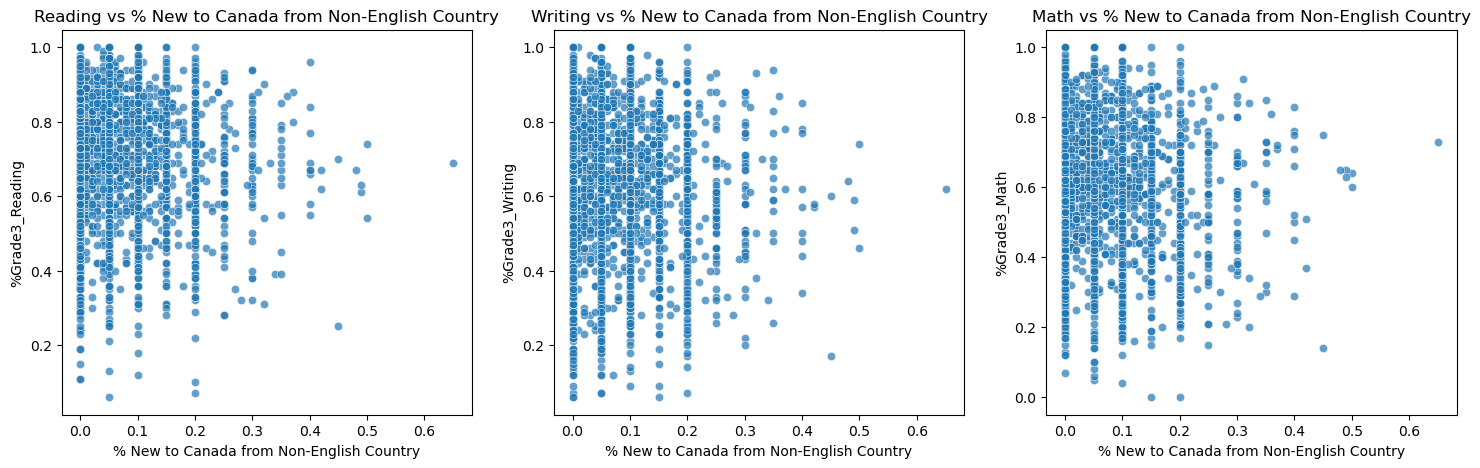

In [2503]:
#plotting scatter
fig, axes = plt.subplots(1, 3, figsize=(18,5), sharex=True, sharey=False)

for ax, y_col in zip(axes, performance_cols):
    sns.scatterplot(
        data=english_schools,
        x='%Stud_New_Canada_Non-Eng_Cntry',
        y=y_col,
        alpha=0.7,
        ax=ax
    )
    ax.set_title(f"{y_col.split('_')[-1]} vs % New to Canada from Non-English Country")
    ax.set_xlabel("% New to Canada from Non-English Country")

Text(0.5, 1.0, 'Correlation: % Students New to Canada from Non-English Country vs Grade 3 Achievement')

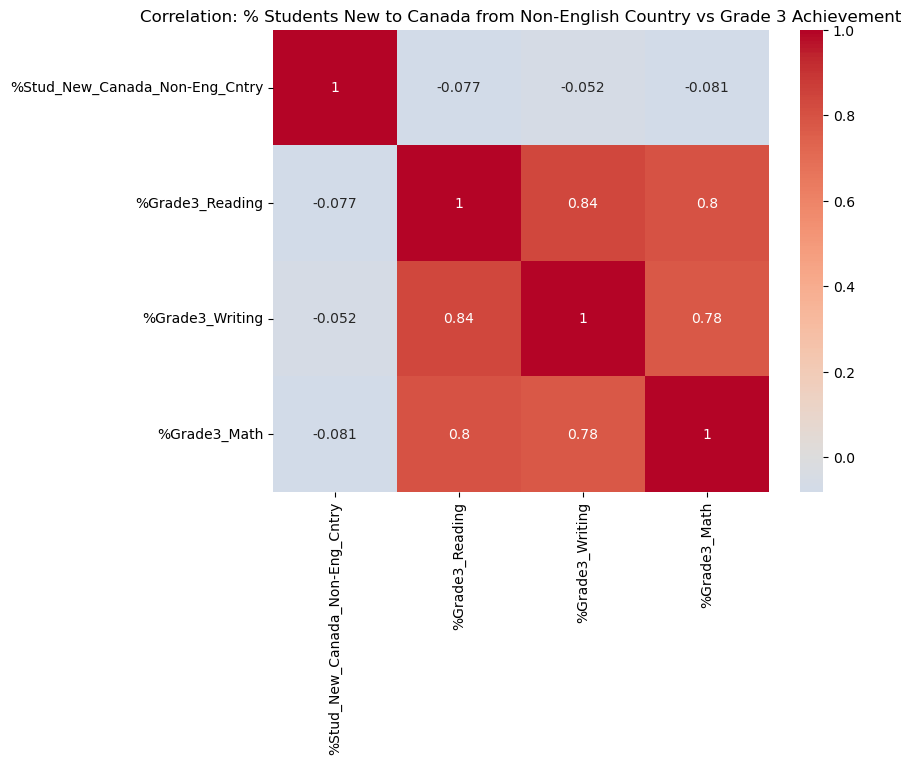

In [2504]:
#plotting heat map
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,          
    cmap='coolwarm',     
    center=0             
)
plt.title("Correlation: % Students New to Canada from Non-English Country vs Grade 3 Achievement")

* Based on the above, there is very weak negative correlation between the Percentage of Students New to Canada from Non-English Country and Grade 3 achievement values. But there seems to be a strong positive correlation between the achievement values themselves. Now, let's look at the results for higher grades. 

In [2505]:
english_schools = df[df['School_Lang'] == 'English'].copy()
performance_cols = [
    '%Grade6_Reading',
    '%Grade6_Writing',
    '%Grade6_Math'
]
english_schools[['%Stud_New_Canada_Non-Eng_Cntry'] + performance_cols] = english_schools[['%Stud_New_Canada_Non-Eng_Cntry'] + performance_cols].apply(pd.to_numeric, errors='coerce')
corr_matrix = english_schools[['%Stud_New_Canada_Non-Eng_Cntry'] + performance_cols].corr()
corr_matrix

%Stud_New_Canada_Non-Eng_Cntry  \
%Stud_New_Canada_Non-Eng_Cntry                        1.000000   
%Grade6_Reading                                      -0.058643   
%Grade6_Writing                                       0.001439   
%Grade6_Math                                         -0.004232   

                                %Grade6_Reading  %Grade6_Writing  %Grade6_Math  
%Stud_New_Canada_Non-Eng_Cntry        -0.058643         0.001439     -0.004232  
%Grade6_Reading                        1.000000         0.827879      0.718643  
%Grade6_Writing                        0.827879         1.000000      0.725634  
%Grade6_Math                           0.718643         0.725634      1.000000

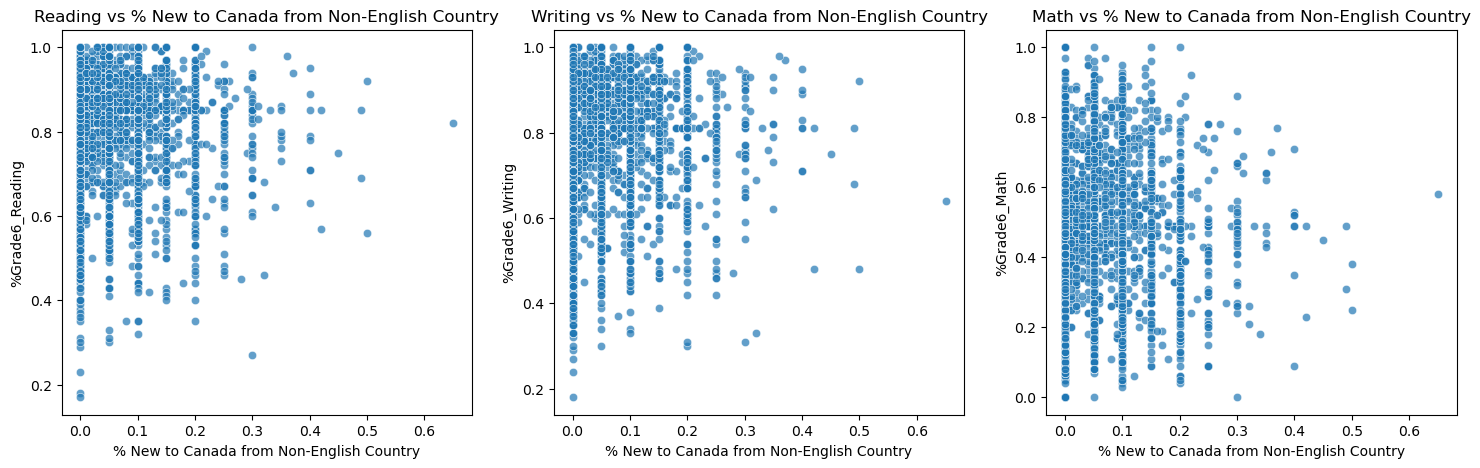

In [2506]:
#plotting scatter
fig, axes = plt.subplots(1, 3, figsize=(18,5), sharex=True, sharey=False)

for ax, y_col in zip(axes, performance_cols):
    sns.scatterplot(
        data=english_schools,
        x='%Stud_New_Canada_Non-Eng_Cntry',
        y=y_col,
        alpha=0.7,
        ax=ax
    )
    ax.set_title(f"{y_col.split('_')[-1]} vs % New to Canada from Non-English Country")
    ax.set_xlabel("% New to Canada from Non-English Country")

Text(0.5, 1.0, 'Correlation: % Students New to Canada from Non-English Country vs Grade 6 Achievement')

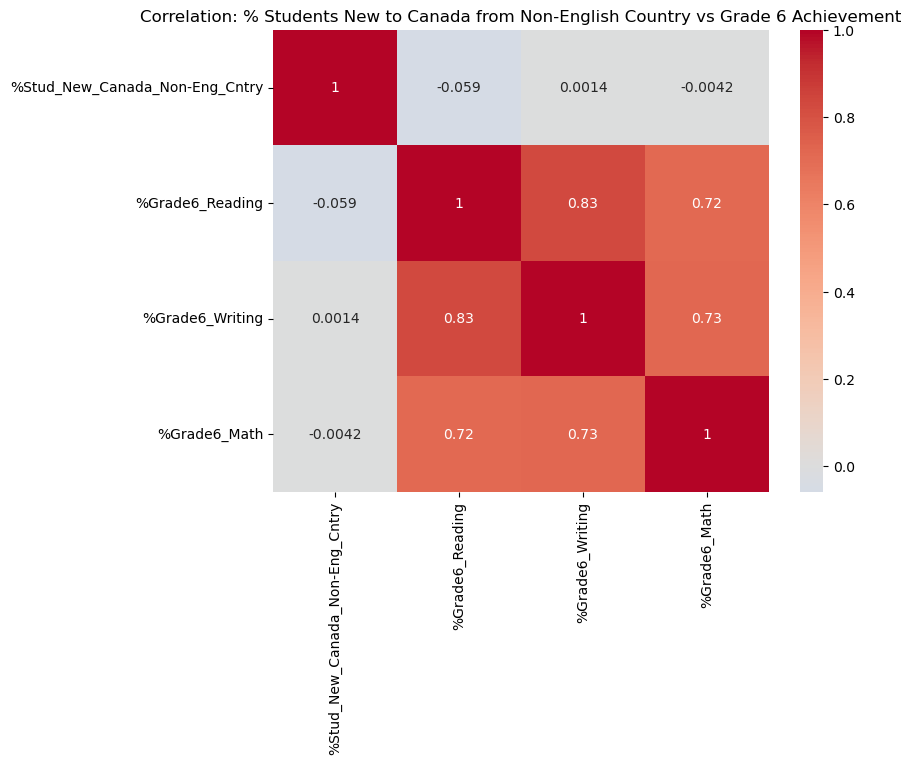

In [2507]:
#plotting heat map
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,          
    cmap='coolwarm',     
    center=0             
)
plt.title("Correlation: % Students New to Canada from Non-English Country vs Grade 6 Achievement")

* Based on the above, once again, there is very weak negative correlation between the Percentage of Students New to Canada from Non-English Country and Grade 6 achievement values, with the relationship with the Grade 6 reading achievement value being markedly stronger and Grade 6 writing achievement being very weak positive. But there seems to be a strong positive correlation between the achievement values themselves. Now, let's look at the results for higher grades. 

In [2508]:
english_schools = df[df['School_Lang'] == 'English'].copy()
performance_cols = [
    '%Grade9_Math',
    '%Grade10_OSSLT' 
]
english_schools[['%Stud_New_Canada_Non-Eng_Cntry'] + performance_cols] = english_schools[['%Stud_New_Canada_Non-Eng_Cntry'] + performance_cols].apply(pd.to_numeric, errors='coerce')
corr_matrix = english_schools[['%Stud_New_Canada_Non-Eng_Cntry'] + performance_cols].corr()
corr_matrix

%Stud_New_Canada_Non-Eng_Cntry  %Grade9_Math  \
%Stud_New_Canada_Non-Eng_Cntry                         1.00000     -0.064310   
%Grade9_Math                                          -0.06431      1.000000   
%Grade10_OSSLT                                        -0.05967      0.707221   

                                %Grade10_OSSLT  
%Stud_New_Canada_Non-Eng_Cntry       -0.059670  
%Grade9_Math                          0.707221  
%Grade10_OSSLT                        1.000000

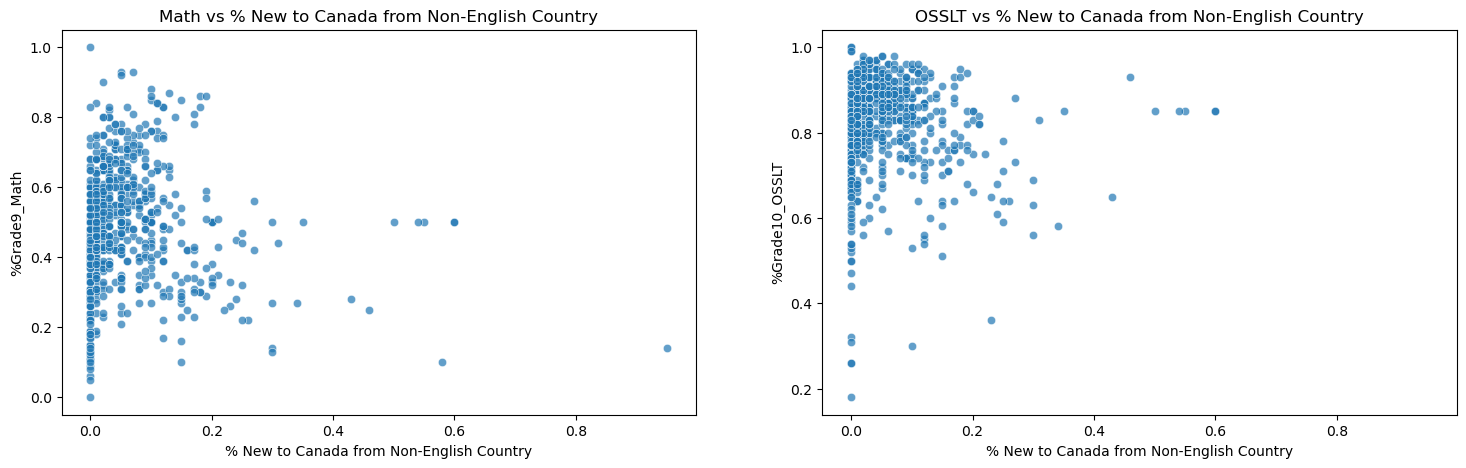

In [2509]:
#plotting scatter
fig, axes = plt.subplots(1, 2, figsize=(18,5), sharex=True, sharey=False)

for ax, y_col in zip(axes, performance_cols):
    sns.scatterplot(
        data=english_schools,
        x='%Stud_New_Canada_Non-Eng_Cntry',
        y=y_col,
        alpha=0.7,
        ax=ax
    )
    ax.set_title(f"{y_col.split('_')[-1]} vs % New to Canada from Non-English Country")
    ax.set_xlabel("% New to Canada from Non-English Country")

Text(0.5, 1.0, 'Correlation: % Students New to Canada from Non-English Country vs Grade 9 and 10 Achievement')

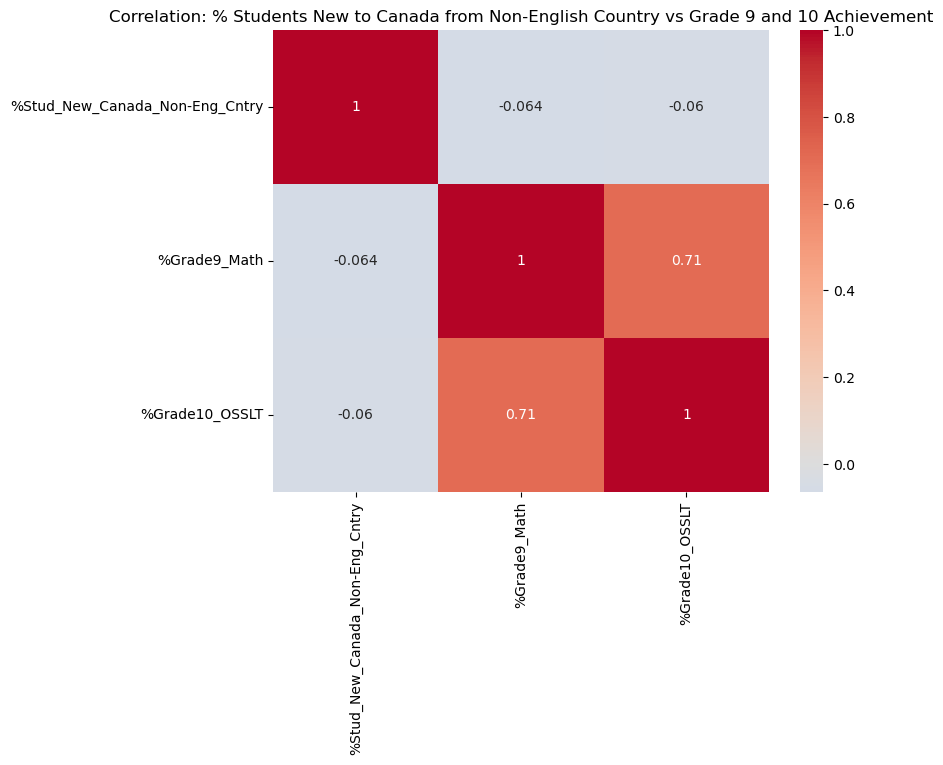

In [2510]:
#plotting heat map
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,          
    cmap='coolwarm',     
    center=0             
)
plt.title("Correlation: % Students New to Canada from Non-English Country vs Grade 9 and 10 Achievement")

* Based on the above, once again, there is very weak negative correlation between the Percentage of Students New to Canada from Non-English Country and Grade 9 and 10 achievement values. But there seems to be a strong positive correlation between the achievement values themselves. 

#### In summary:
* There is very weak negative correlation between Percentage of Students New to Canada from Non-English Country and Grade 3, 6, 9 and 10 achievement values, with the exception of Grade 6 writing achievement being very weak positive.
* There is strong positive correlation between the achievement values themselves.

## 2.2 d) ii) For French schools

In [2511]:
french_schools = df[df['School_Lang'] == 'French'].copy()
performance_cols = [
    '%Grade3_Reading',
    '%Grade3_Writing',
    '%Grade3_Math'
]
french_schools[['%Stud_New_Canada_Non-Fr_Cntry'] + performance_cols] = french_schools[['%Stud_New_Canada_Non-Fr_Cntry'] + performance_cols].apply(pd.to_numeric, errors='coerce')
corr_matrix = french_schools[['%Stud_New_Canada_Non-Fr_Cntry'] + performance_cols].corr()
corr_matrix

%Stud_New_Canada_Non-Fr_Cntry  %Grade3_Reading  \
%Stud_New_Canada_Non-Fr_Cntry                       1.000000         0.199020   
%Grade3_Reading                                     0.199020         1.000000   
%Grade3_Writing                                     0.241740         0.816565   
%Grade3_Math                                        0.104775         0.785068   

                               %Grade3_Writing  %Grade3_Math  
%Stud_New_Canada_Non-Fr_Cntry         0.241740      0.104775  
%Grade3_Reading                       0.816565      0.785068  
%Grade3_Writing                       1.000000      0.778265  
%Grade3_Math                          0.778265      1.000000

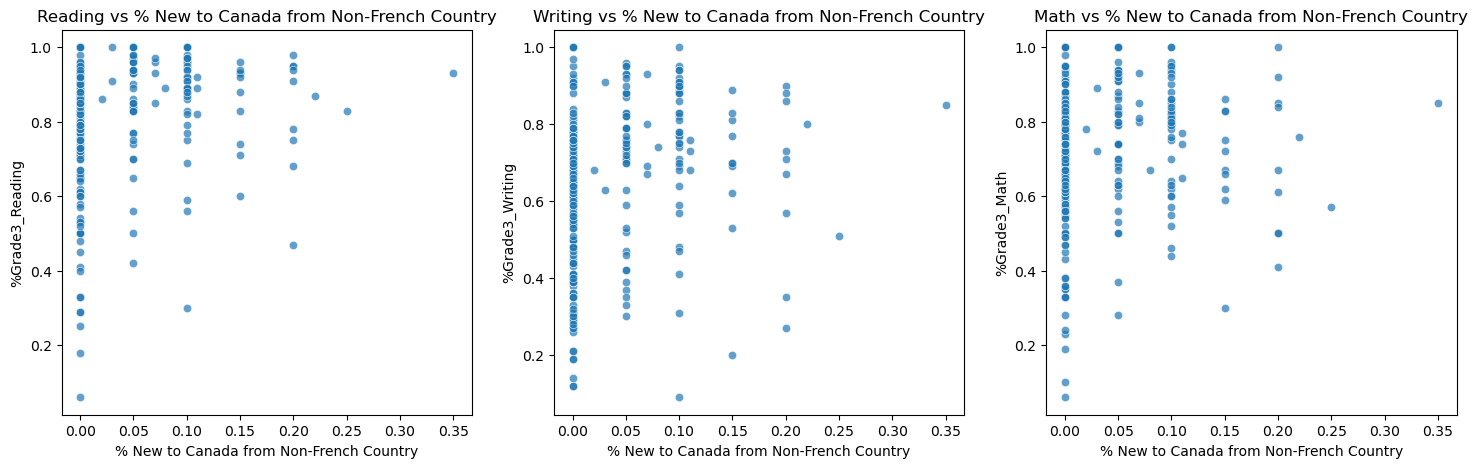

In [2512]:
#plotting scatter
fig, axes = plt.subplots(1, 3, figsize=(18,5), sharex=True, sharey=False)

for ax, y_col in zip(axes, performance_cols):
    sns.scatterplot(
        data=french_schools,
        x='%Stud_New_Canada_Non-Fr_Cntry',
        y=y_col,
        alpha=0.7,
        ax=ax
    )
    ax.set_title(f"{y_col.split('_')[-1]} vs % New to Canada from Non-French Country")
    ax.set_xlabel("% New to Canada from Non-French Country")

/Applications/anaconda3/lib/python3.13/site-packages/IPython/core/displayhook.py:292: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


Text(0.5, 1.0, 'Correlation: % Students New to Canada from Non-French Country vs Grade 3 Achievement')

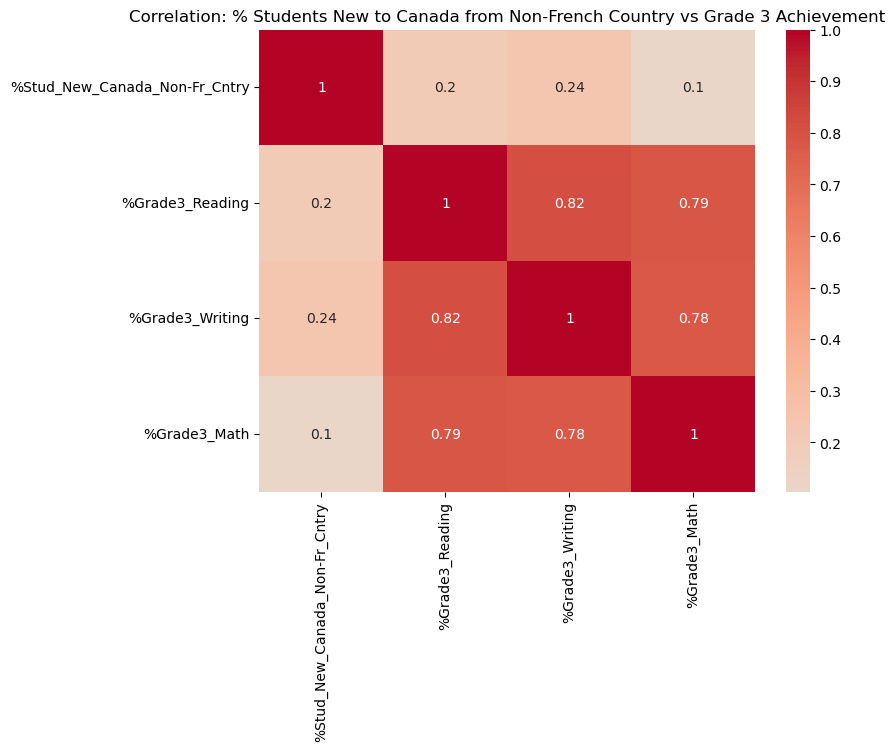

In [2513]:
#plotting heat map
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,          
    cmap='coolwarm',     
    center=0             
)
plt.title("Correlation: % Students New to Canada from Non-French Country vs Grade 3 Achievement")

* Based on the above, there is weak positive correlation between the Percentage of Students New to Canada from Non-French Country and Grade 3 achievement values, with reading and writing achievement values being stronger than math. Also, there seems to be a strong positive correlation between the achievement values themselves. Now, let's look at the results for higher grades. 

In [2514]:
french_schools = df[df['School_Lang'] == 'French'].copy()
performance_cols = [
    '%Grade6_Reading',
    '%Grade6_Writing',
    '%Grade6_Math'
]
french_schools[['%Stud_New_Canada_Non-Fr_Cntry'] + performance_cols] = french_schools[['%Stud_New_Canada_Non-Fr_Cntry'] + performance_cols].apply(pd.to_numeric, errors='coerce')
corr_matrix = french_schools[['%Stud_New_Canada_Non-Fr_Cntry'] + performance_cols].corr()
corr_matrix

%Stud_New_Canada_Non-Fr_Cntry  %Grade6_Reading  \
%Stud_New_Canada_Non-Fr_Cntry                       1.000000         0.128876   
%Grade6_Reading                                     0.128876         1.000000   
%Grade6_Writing                                     0.213403         0.481633   
%Grade6_Math                                        0.148677         0.435258   

                               %Grade6_Writing  %Grade6_Math  
%Stud_New_Canada_Non-Fr_Cntry         0.213403      0.148677  
%Grade6_Reading                       0.481633      0.435258  
%Grade6_Writing                       1.000000      0.739775  
%Grade6_Math                          0.739775      1.000000

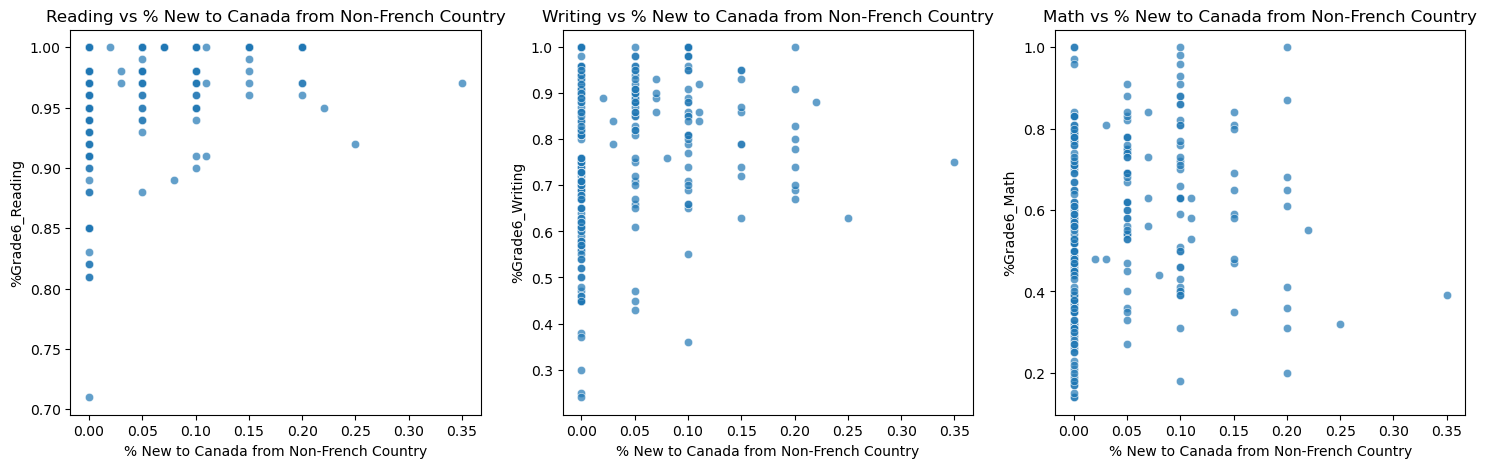

In [2515]:
#plotting scatter
fig, axes = plt.subplots(1, 3, figsize=(18,5), sharex=True, sharey=False)

for ax, y_col in zip(axes, performance_cols):
    sns.scatterplot(
        data=french_schools,
        x='%Stud_New_Canada_Non-Fr_Cntry',
        y=y_col,
        alpha=0.7,
        ax=ax
    )
    ax.set_title(f"{y_col.split('_')[-1]} vs % New to Canada from Non-French Country")
    ax.set_xlabel("% New to Canada from Non-French Country")

Text(0.5, 1.0, 'Correlation: % Students New to Canada from Non-French Country vs Grade 6 Achievement')

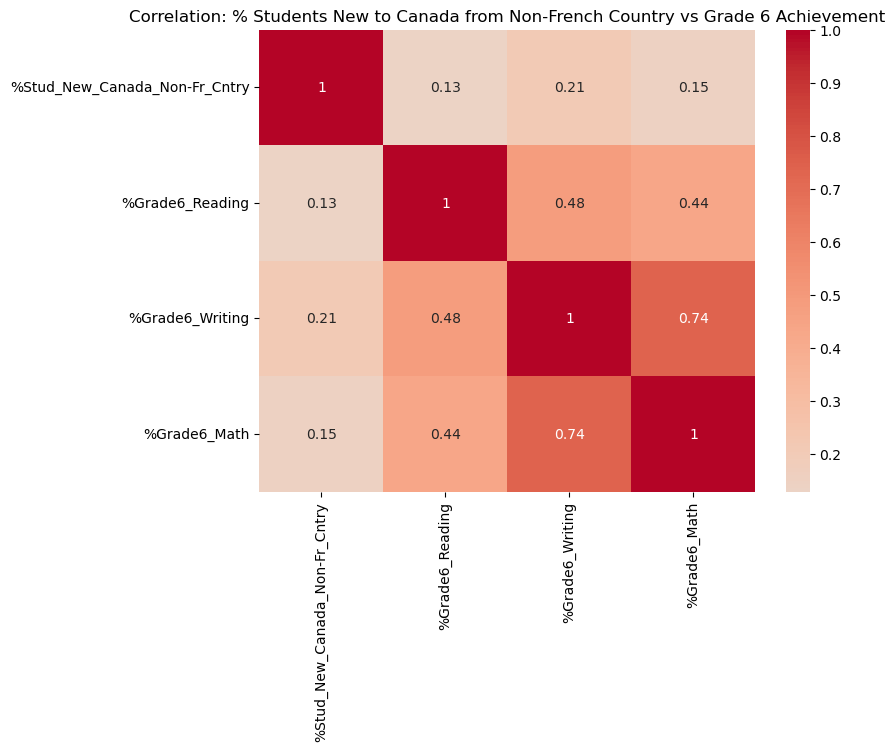

In [2516]:
#plotting heat map
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,          
    cmap='coolwarm',     
    center=0             
)
plt.title("Correlation: % Students New to Canada from Non-French Country vs Grade 6 Achievement")

* Based on the above, there is weak positive correlation between the Percentage of Students New to Canada from Non-French Country and Grade 6 achievement values, with writing achievement value being stronger than reading and math. Also, there seems to be a moderate to strong positive correlation between the achievement values themselves. Now, let's look at the results for higher grades. 

In [2517]:
french_schools = df[df['School_Lang'] == 'French'].copy()
performance_cols = [
    '%Grade9_Math',
    '%Grade10_OSSLT' 
]
french_schools[['%Stud_New_Canada_Non-Fr_Cntry'] + performance_cols] = french_schools[['%Stud_New_Canada_Non-Fr_Cntry'] + performance_cols].apply(pd.to_numeric, errors='coerce')
corr_matrix = french_schools[['%Stud_New_Canada_Non-Fr_Cntry'] + performance_cols].corr()
corr_matrix

%Stud_New_Canada_Non-Fr_Cntry  %Grade9_Math  \
%Stud_New_Canada_Non-Fr_Cntry                       1.000000     -0.044614   
%Grade9_Math                                       -0.044614      1.000000   
%Grade10_OSSLT                                     -0.077202      0.455004   

                               %Grade10_OSSLT  
%Stud_New_Canada_Non-Fr_Cntry       -0.077202  
%Grade9_Math                         0.455004  
%Grade10_OSSLT                       1.000000

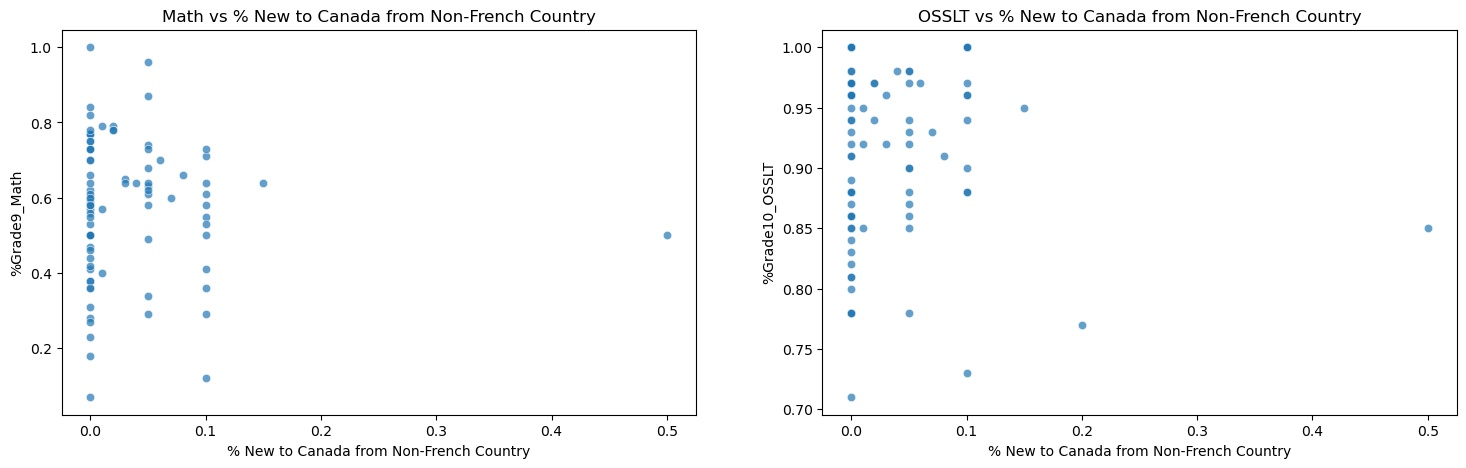

In [2518]:
#plotting scatter
fig, axes = plt.subplots(1, 2, figsize=(18,5), sharex=True, sharey=False)

for ax, y_col in zip(axes, performance_cols):
    sns.scatterplot(
        data=french_schools,
        x='%Stud_New_Canada_Non-Fr_Cntry',
        y=y_col,
        alpha=0.7,
        ax=ax
    )
    ax.set_title(f"{y_col.split('_')[-1]} vs % New to Canada from Non-French Country")
    ax.set_xlabel("% New to Canada from Non-French Country")

Text(0.5, 1.0, 'Correlation: % Students New to Canada from Non-French Country vs Grade 9 and 10 Achievement')

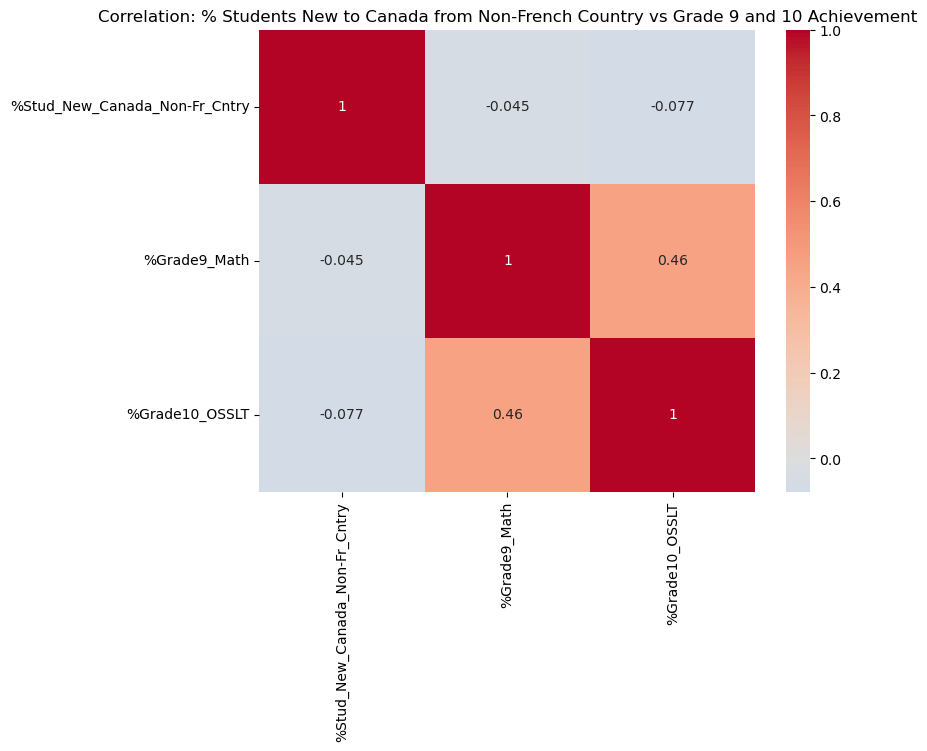

In [2519]:
#plotting heat map
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,          
    cmap='coolwarm',     
    center=0             
)
plt.title("Correlation: % Students New to Canada from Non-French Country vs Grade 9 and 10 Achievement")

* Based on the above, there is very weak negative correlation between the Percentage of Students New to Canada from Non-French Country and Grade 9 and 10 achievement values. Also, there seems to be a moderate positive correlation between the achievement values themselves. 

#### In summary:
* There is very weak negative correlation between Percentage of Students New to Canada from Non-English Country and Grade 3, 6, 9 and 10 performance.
* There is weak positive correlation between the Percentage of Students New to Canada from Non-French Country and Grade 3 and 6 performance, but there is very weak negative correlation between the Percentage of Students New to Canada from Non-French Country and Grade 9 and 10 performance. So it looks like there is more of an effect in French schools for younger grades.
* There is moderate to strong correlation between the achievement values themselves.

## 2.3
* The next thing we want to look at is a comparison of performance based on if a school is classified as special education or not.

## 2.3 a) Assign 0 or 1 to School Using School_Spec_Cond_Code

In [2520]:
df['School_Spec_Cond_Code'].unique() #to see unique values of School_Spec_Cond_Code

array(['Alternative', 'Not applicable', 'Adult',
       'Vocational/Occupational', 'Deaf', 'Blind', 'Junior High School'],
      dtype=object)

In [2521]:
#function to assign 0 or 1 based on School_Spec_Cond_Code. 1 means value is not 'Not applicable'
def cat_school_spec(school_spec_cond_code):
    # Special school indicators 
    spec_keywords = ['Alternative','Adult',
       'Vocational/Occupational','Deaf','Blind','Junior High School']
    
    if any(keyword in school_spec_cond_code for keyword in spec_keywords):
        return 1
    else:
        return 0

df['Spec_School_Identity'] = df['School_Spec_Cond_Code'].apply(cat_school_spec)
df['Spec_School_Identity'].head(10)

0    1
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Spec_School_Identity, dtype: int64

In [2522]:
df['Spec_School_Identity'].value_counts() #to see number of special schools

Spec_School_Identity
0    4629
1      78
Name: count, dtype: int64

## 2.3 b)Academic Performance Analysis

## 2.3 b i) Using Spec_School_Identity

In [2523]:
# Now group by Spec_School_Identity and compute the mean for grade 3 achievement values
cols = [
    '%Grade3_Reading',
    '%Grade3_Writing',
    '%Grade3_Math'
]

temp = df.copy()
temp[cols] = temp[cols].apply(pd.to_numeric, errors="coerce")

Avg_grade3_Spec_School_Identity = temp.groupby('Spec_School_Identity')[cols].mean()

Avg_grade3_Spec_School_Identity

%Grade3_Reading  %Grade3_Writing  %Grade3_Math
Spec_School_Identity                                                
0                            0.715904         0.629988      0.613353
1                            0.730000         0.640000      0.620000

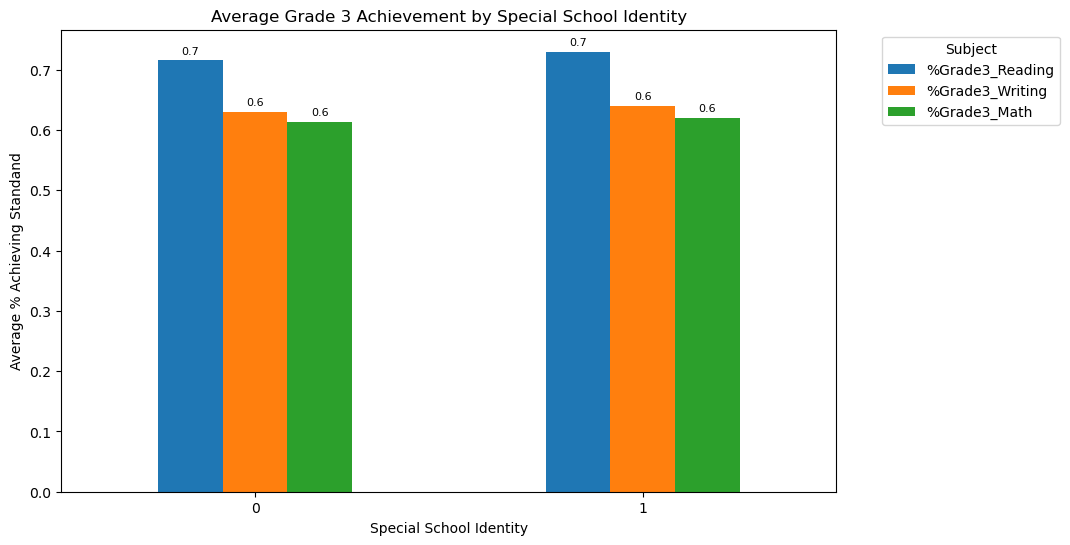

In [2524]:
#plotting results
ax = Avg_grade3_Spec_School_Identity.plot(kind='bar', figsize=(10,6))

plt.title('Average Grade 3 Achievement by Special School Identity')
plt.xlabel('Special School Identity')
plt.ylabel('Average % Achieving Standand')
plt.xticks(rotation=0)
plt.legend(title='Subject', bbox_to_anchor=(1.05, 1))
# --- Add value labels on each bar ---
for container in ax.containers:
    # Add labels only for non-empty bars
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=8, padding=3)

* Special and non special schools seem to have similar Grade 3 performance, just that special schools are slightly higher. Now, let's see if it's the same for higher grades.

In [2525]:
# Now group by Spec_School_Identity and compute the mean for grade 6 achievement values
cols = [
    '%Grade6_Reading',
    '%Grade6_Writing',
    '%Grade6_Math',
]

temp = df.copy()
temp[cols] = temp[cols].apply(pd.to_numeric, errors="coerce")

Avg_grade6_Spec_School_Identity = temp.groupby('Spec_School_Identity')[cols].mean()

Avg_grade6_Spec_School_Identity

%Grade6_Reading  %Grade6_Writing  %Grade6_Math
Spec_School_Identity                                                
0                            0.826761         0.792749      0.487836
1                            0.845556         0.854444      0.630913

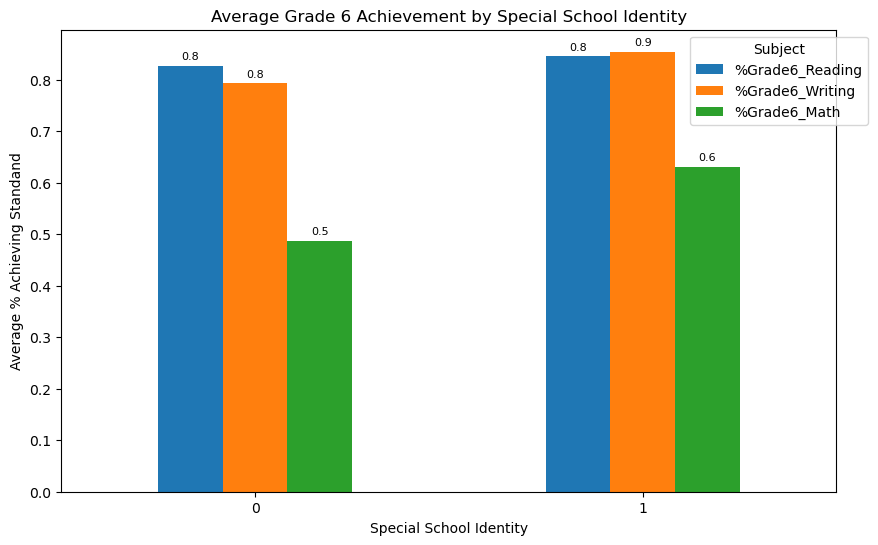

In [2526]:
#plotting results
ax = Avg_grade6_Spec_School_Identity.plot(kind='bar', figsize=(10,6))

plt.title('Average Grade 6 Achievement by Special School Identity')
plt.xlabel('Special School Identity')
plt.ylabel('Average % Achieving Standand')
plt.xticks(rotation=0)
plt.legend(title='Subject', bbox_to_anchor=(1.05, 1))
# --- Add value labels on each bar ---
for container in ax.containers:
    # Add labels only for non-empty bars
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=8, padding=3)

* Again, special and non special schools seem to have similar Grade 6 performance, just that special schools are slightly higher. Now, let's see if it's the same for higher grades.

In [2527]:
# Now group by Spec_School_Identity and compute the mean for grade 9 and 10 achievement values
cols = [
    '%Grade9_Math',
    '%Grade10_OSSLT'
]

temp = df.copy()
temp[cols] = temp[cols].apply(pd.to_numeric, errors="coerce")

Avg_grade9_10_Spec_School_Identity = temp.groupby('Spec_School_Identity')[cols].mean()

Avg_grade9_10_Spec_School_Identity

%Grade9_Math  %Grade10_OSSLT
Spec_School_Identity                              
0                         0.504521        0.834361
1                         0.447952        0.746667

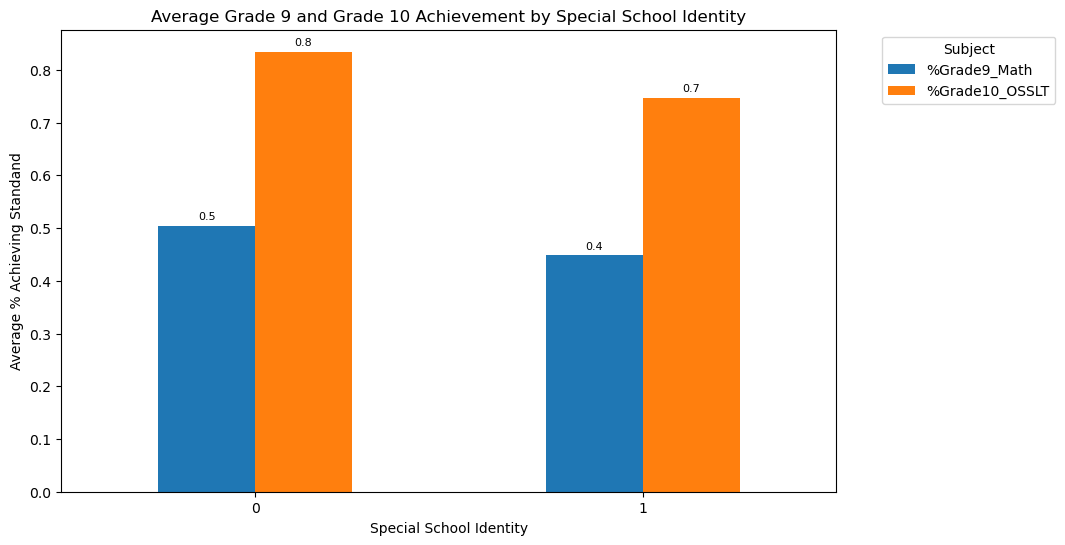

In [2528]:
#plotting results
ax = Avg_grade9_10_Spec_School_Identity.plot(kind='bar', figsize=(10,6))

plt.title('Average Grade 9 and Grade 10 Achievement by Special School Identity')
plt.xlabel('Special School Identity')
plt.ylabel('Average % Achieving Standand')
plt.xticks(rotation=0)
plt.legend(title='Subject', bbox_to_anchor=(1.05, 1))
# --- Add value labels on each bar ---
for container in ax.containers:
    # Add labels only for non-empty bars
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=8, padding=3)

* For grade 9 and 10, special and non special schools seem to have similar Grade 9 and 10 performance, just that non special schools are slightly higher, contrasting prior results.

#### In summary:
* Based on the above, it seems like special and non special school differentiations has relatively minimal impact on performance, although we can note that special schools perform slightly better in lower grades while non special schools perform slightly better in higher grades. Now, let's see if there is a correlation between the amount of students who are receiving special education and the performance.

## 2.3 b ii) Using 'Percent_Stud_Receiving_Special_Ed'

In [2529]:
df.columns

Index(['Board_Number', 'Board_Name', 'Board_Type', 'School_Number',
       'School_Name', 'School_Type', 'School_Spec_Cond_Code', 'School_Level',
       'School_Lang', 'Grade_Range', 'Street', 'Municipality', 'City',
       'Province', 'Postal_Code', 'Phone_Number', 'Fax_Number',
       'School_Website', 'Board_Website', 'Enrolment', 'Latitude', 'Longitude',
       '%Stud_FirstLang_Not_Eng', '%Stud_FirstLang_Not_Fr',
       '%Stud_New_Canada_Non-Eng_Cntry', '%Stud_New_Canada_Non-Fr_Cntry',
       '%Stud_Special_Ed', '%Stud_Gifted', '%Grade3_Reading',
       'Change_G3_Read_3Yr', '%Grade3_Writing', 'Change_G3_Write_3Yr',
       '%Grade3_Math', 'Change_G3_Math_3Yr', '%Grade6_Reading',
       'Change_G6_Read_3Yr', '%Grade6_Writing', 'Change_G6_Write_3Yr',
       '%Grade6_Math', 'Change_G6_Math_3Yr', '%Grade9_Math',
       'Change_G9_Math_3Yr', '%Grade10_OSSLT', 'Change_G10_OSSLT_3Yr',
       '%Child_Livein_LowInc_HH', '%Stud_Par_NoDegDipCert', 'Extract_Date',
       'Urban_Rural', 'Spec_S

In [2530]:
temp = df.copy()
performance_cols = [
    '%Grade3_Reading',
    '%Grade3_Writing',
    '%Grade3_Math'
]
temp[['%Stud_Special_Ed'] + performance_cols] = temp[['%Stud_Special_Ed'] + performance_cols].apply(pd.to_numeric, errors="coerce")
corr_matrix = temp[['%Stud_Special_Ed'] + performance_cols].corr()
corr_matrix

%Stud_Special_Ed  %Grade3_Reading  %Grade3_Writing  \
%Stud_Special_Ed          1.000000        -0.165585        -0.174289   
%Grade3_Reading          -0.165585         1.000000         0.823972   
%Grade3_Writing          -0.174289         0.823972         1.000000   
%Grade3_Math             -0.202969         0.802450         0.769236   

                  %Grade3_Math  
%Stud_Special_Ed     -0.202969  
%Grade3_Reading       0.802450  
%Grade3_Writing       0.769236  
%Grade3_Math          1.000000

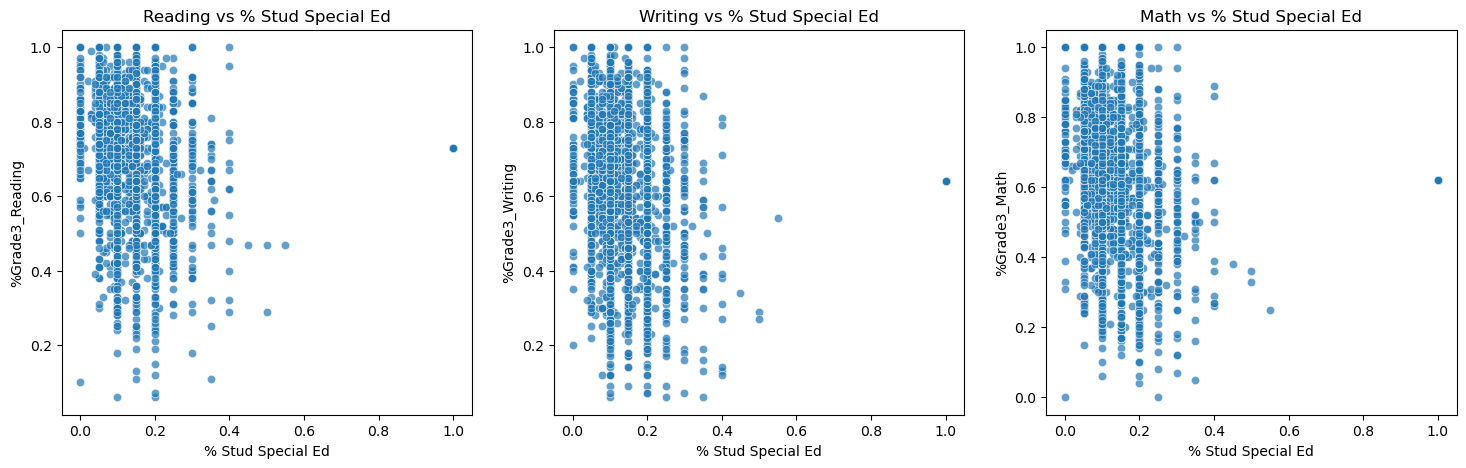

In [2531]:
#plotting scatter
fig, axes = plt.subplots(1, 3, figsize=(18,5), sharex=True, sharey=False)

for ax, y_col in zip(axes, performance_cols):
    sns.scatterplot(
        data=temp,
        x='%Stud_Special_Ed',
        y=y_col,
        alpha=0.7,
        ax=ax
    )
    ax.set_title(f"{y_col.split('_')[-1]} vs % Stud Special Ed")
    ax.set_xlabel("% Stud Special Ed")

Text(0.5, 1.0, 'Correlation: % Students Special Ed vs Grade 3 Achievement')

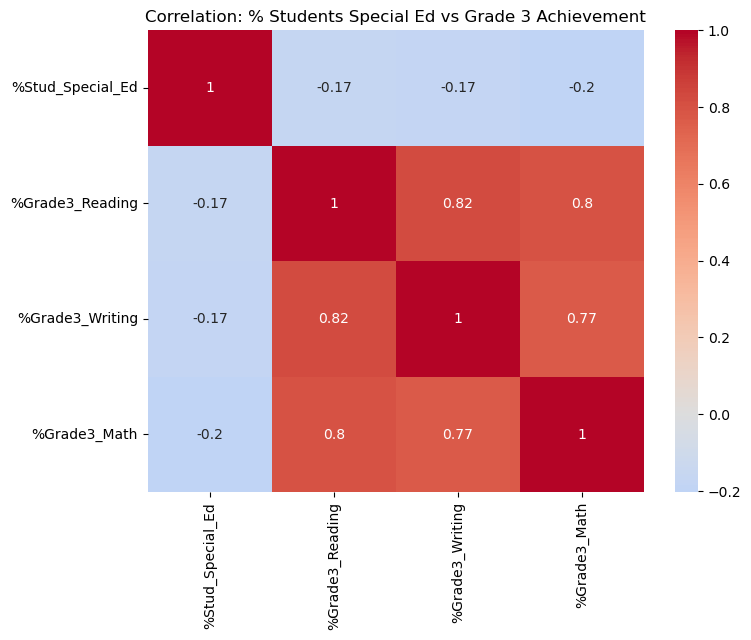

In [2532]:
#plotting heat map
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,          
    cmap='coolwarm',     
    center=0             
)
plt.title("Correlation: % Students Special Ed vs Grade 3 Achievement")

* Based on the above, there is weak negative correlation between the Percentage of Students who receive Special Ed and Grade 3 achievement values. But there seems to be a strong positive correlation between the achievement values themselves. Now, let's look at the results for higher grades. 

In [2533]:
temp = df.copy()
performance_cols = [
    '%Grade6_Reading',
    '%Grade6_Writing',
    '%Grade6_Math'
]
temp[['%Stud_Special_Ed'] + performance_cols] = temp[['%Stud_Special_Ed'] + performance_cols].apply(pd.to_numeric, errors="coerce")
corr_matrix = temp[['%Stud_Special_Ed'] + performance_cols].corr()
corr_matrix

%Stud_Special_Ed  %Grade6_Reading  %Grade6_Writing  \
%Stud_Special_Ed          1.000000        -0.215372        -0.214047   
%Grade6_Reading          -0.215372         1.000000         0.736612   
%Grade6_Writing          -0.214047         0.736612         1.000000   
%Grade6_Math             -0.268340         0.691109         0.715998   

                  %Grade6_Math  
%Stud_Special_Ed     -0.268340  
%Grade6_Reading       0.691109  
%Grade6_Writing       0.715998  
%Grade6_Math          1.000000

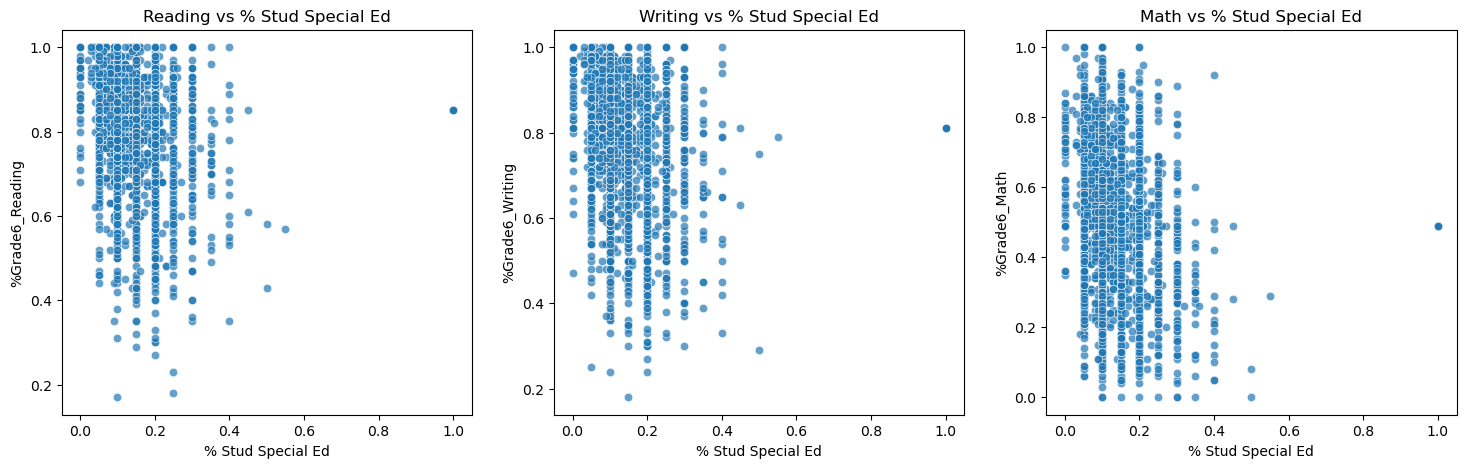

In [2534]:
#plotting scatter
fig, axes = plt.subplots(1, 3, figsize=(18,5), sharex=True, sharey=False)

for ax, y_col in zip(axes, performance_cols):
    sns.scatterplot(
        data=temp,
        x='%Stud_Special_Ed',
        y=y_col,
        alpha=0.7,
        ax=ax
    )
    ax.set_title(f"{y_col.split('_')[-1]} vs % Stud Special Ed")
    ax.set_xlabel("% Stud Special Ed")

Text(0.5, 1.0, 'Correlation: % Students Special Ed vs Grade 6 Achievement')

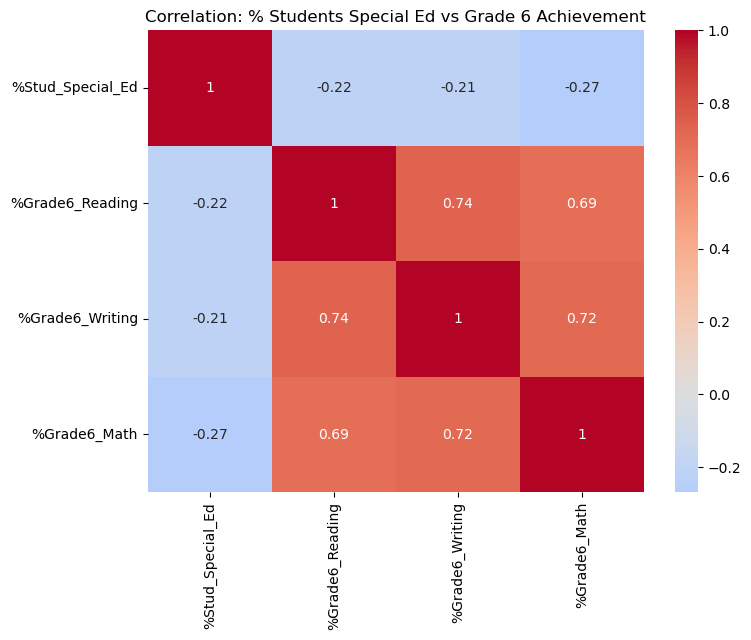

In [2535]:
#plotting heat map
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,          
    cmap='coolwarm',     
    center=0             
)
plt.title("Correlation: % Students Special Ed vs Grade 6 Achievement")

* Based on the above, there is weak negative correlation between the Percentage of Students who receive Special Ed and Grade 6 achievement values, noting that it is stronger than grade 3 achievement values. But there seems to be a strong positive correlation between the achievement values themselves. Now, let's look at the results for higher grades. 

In [2536]:
temp = df.copy()
performance_cols = [
    '%Grade9_Math',
    '%Grade10_OSSLT' 
]
temp[['%Stud_Special_Ed'] + performance_cols] = temp[['%Stud_Special_Ed'] + performance_cols].apply(pd.to_numeric, errors="coerce")
corr_matrix = temp[['%Stud_Special_Ed'] + performance_cols].corr()
corr_matrix

%Stud_Special_Ed  %Grade9_Math  %Grade10_OSSLT
%Stud_Special_Ed          1.000000     -0.357079       -0.406677
%Grade9_Math             -0.357079      1.000000        0.686573
%Grade10_OSSLT           -0.406677      0.686573        1.000000

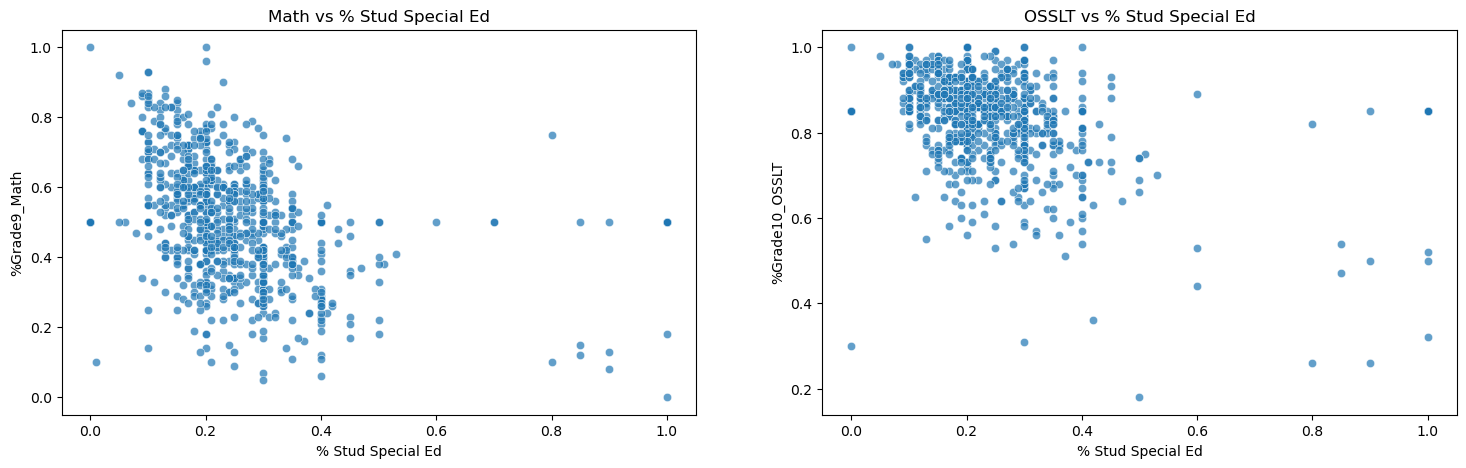

In [2537]:
#plotting scatter
fig, axes = plt.subplots(1, 2, figsize=(18,5), sharex=True, sharey=False)

for ax, y_col in zip(axes, performance_cols):
    sns.scatterplot(
        data=temp,
        x='%Stud_Special_Ed',
        y=y_col,
        alpha=0.7,
        ax=ax
    )
    ax.set_title(f"{y_col.split('_')[-1]} vs % Stud Special Ed")
    ax.set_xlabel("% Stud Special Ed")

Text(0.5, 1.0, 'Correlation: % Students Special Ed vs Grade 9 and 10 Achievement')

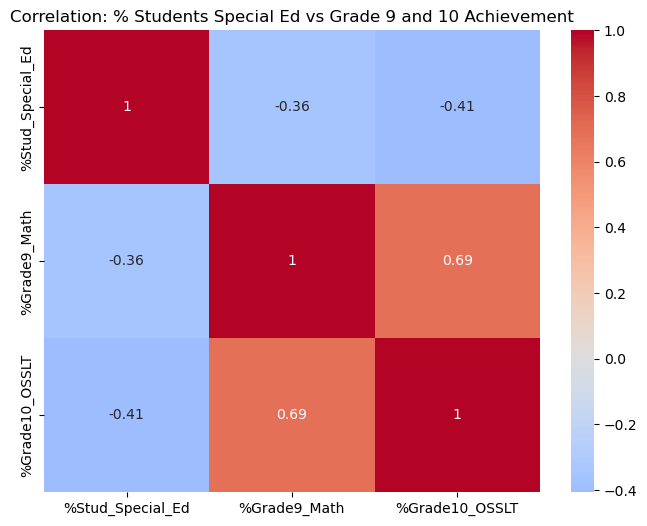

In [2538]:
#plotting heat map
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,          
    cmap='coolwarm',     
    center=0             
)
plt.title("Correlation: % Students Special Ed vs Grade 9 and 10 Achievement")

* There is a moderate negative correlation here between Percentage of Students who receive special ed and Grade 9 and 10 achievement values. But there seems to be a strong positive correlation between the achievement values themselves.

#### In summary:
* There is a negative correlation between Percentage of Students who receive special ed and achievement values, starting with being weak to becoming moderate as the grades increase.
* There seems to be a strong positive correlation between the achievement values themselves.

## 2.4
* The next thing we want to look at is a comparison of performance based on student giftedness.

In [2539]:
temp = df.copy()
performance_cols = [
    '%Grade3_Reading',
    '%Grade3_Writing',
    '%Grade3_Math'
]
temp[['%Stud_Gifted'] + performance_cols] = temp[['%Stud_Gifted'] + performance_cols].apply(pd.to_numeric, errors="coerce")
corr_matrix = temp[['%Stud_Gifted'] + performance_cols].corr()
corr_matrix

%Stud_Gifted  %Grade3_Reading  %Grade3_Writing  %Grade3_Math
%Stud_Gifted         1.000000         0.057119         0.072251      0.076659
%Grade3_Reading      0.057119         1.000000         0.823972      0.802450
%Grade3_Writing      0.072251         0.823972         1.000000      0.769236
%Grade3_Math         0.076659         0.802450         0.769236      1.000000

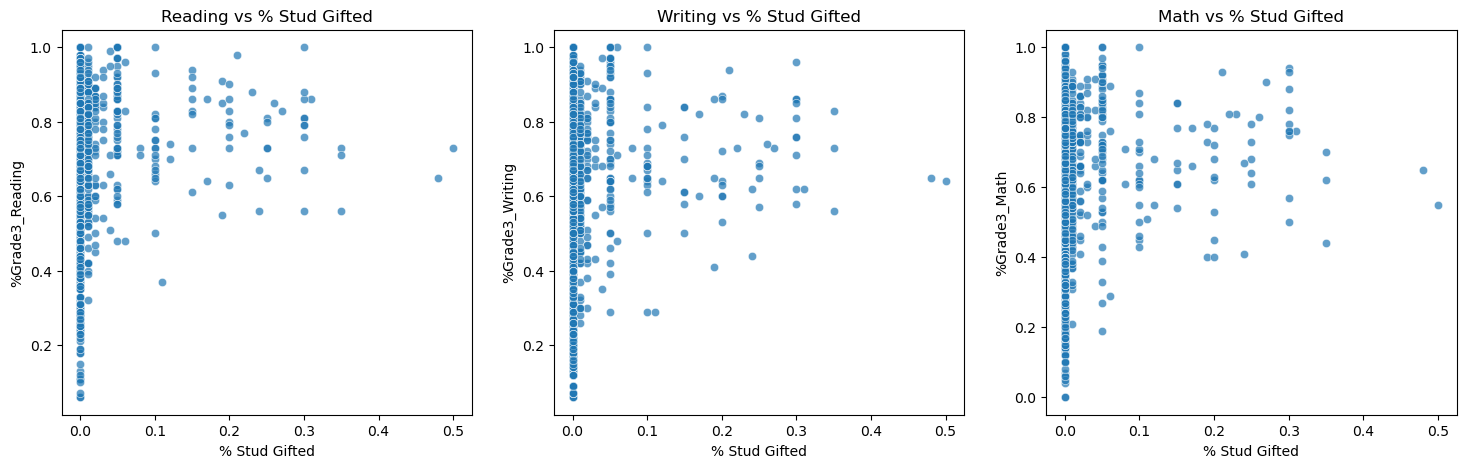

In [2540]:
#plotting scatter
fig, axes = plt.subplots(1, 3, figsize=(18,5), sharex=True, sharey=False)

for ax, y_col in zip(axes, performance_cols):
    sns.scatterplot(
        data=temp,
        x='%Stud_Gifted',
        y=y_col,
        alpha=0.7,
        ax=ax
    )
    ax.set_title(f"{y_col.split('_')[-1]} vs % Stud Gifted")
    ax.set_xlabel("% Stud Gifted")

Text(0.5, 1.0, 'Correlation: % Students Gifted vs Grade 3 Achievement')

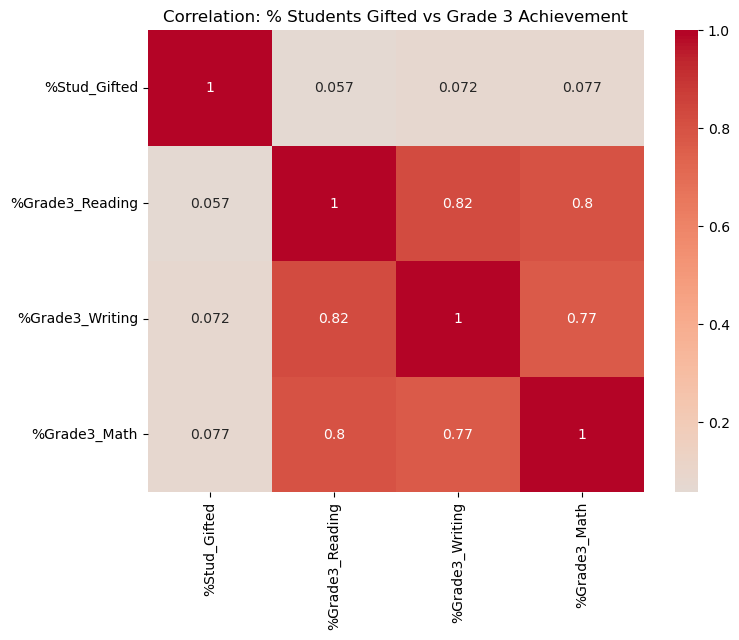

In [2541]:
#plotting heat map
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,          
    cmap='coolwarm',     
    center=0             
)
plt.title("Correlation: % Students Gifted vs Grade 3 Achievement")

* Based on the above, there is very weak positive correlation between the Percentage of Students who are gifted and Grade 3 achievement values. But there seems to be a strong positive correlation between the achievement values themselves. Now, let's look at the results for higher grades. 

In [2542]:
temp = df.copy()
performance_cols = [
    '%Grade6_Reading',
    '%Grade6_Writing',
    '%Grade6_Math'
]
temp[['%Stud_Gifted'] + performance_cols] = temp[['%Stud_Gifted'] + performance_cols].apply(pd.to_numeric, errors="coerce")
corr_matrix = temp[['%Stud_Gifted'] + performance_cols].corr()
corr_matrix

%Stud_Gifted  %Grade6_Reading  %Grade6_Writing  %Grade6_Math
%Stud_Gifted         1.000000         0.092253         0.115594      0.188565
%Grade6_Reading      0.092253         1.000000         0.736612      0.691109
%Grade6_Writing      0.115594         0.736612         1.000000      0.715998
%Grade6_Math         0.188565         0.691109         0.715998      1.000000

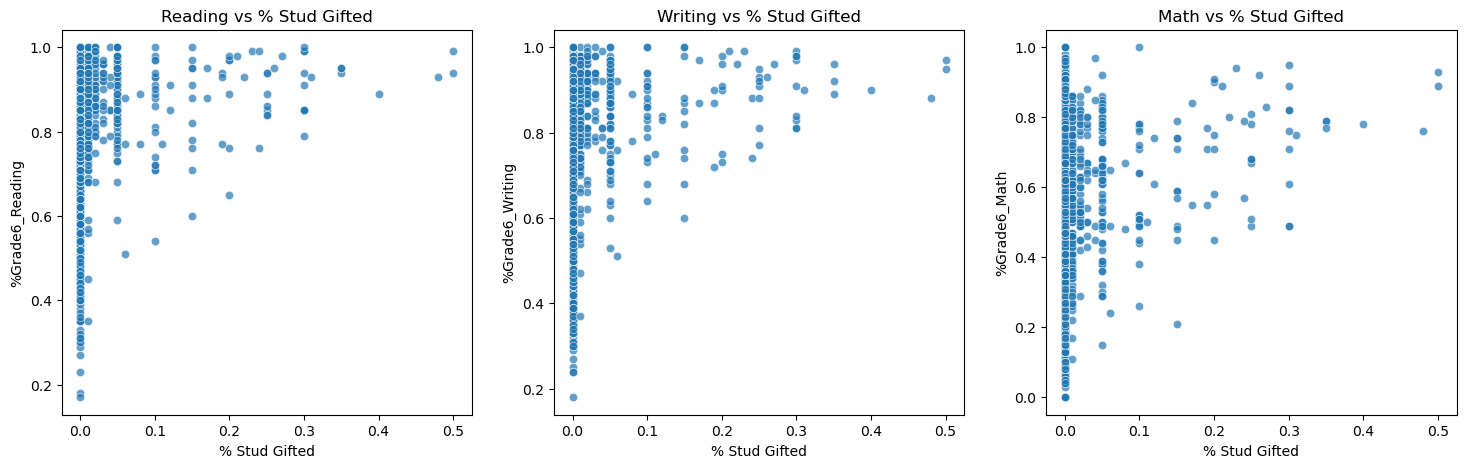

In [2543]:
#plotting scatter
fig, axes = plt.subplots(1, 3, figsize=(18,5), sharex=True, sharey=False)

for ax, y_col in zip(axes, performance_cols):
    sns.scatterplot(
        data=temp,
        x='%Stud_Gifted',
        y=y_col,
        alpha=0.7,
        ax=ax
    )
    ax.set_title(f"{y_col.split('_')[-1]} vs % Stud Gifted")
    ax.set_xlabel("% Stud Gifted")

Text(0.5, 1.0, 'Correlation: % Students Gifted vs Grade 6 Achievement')

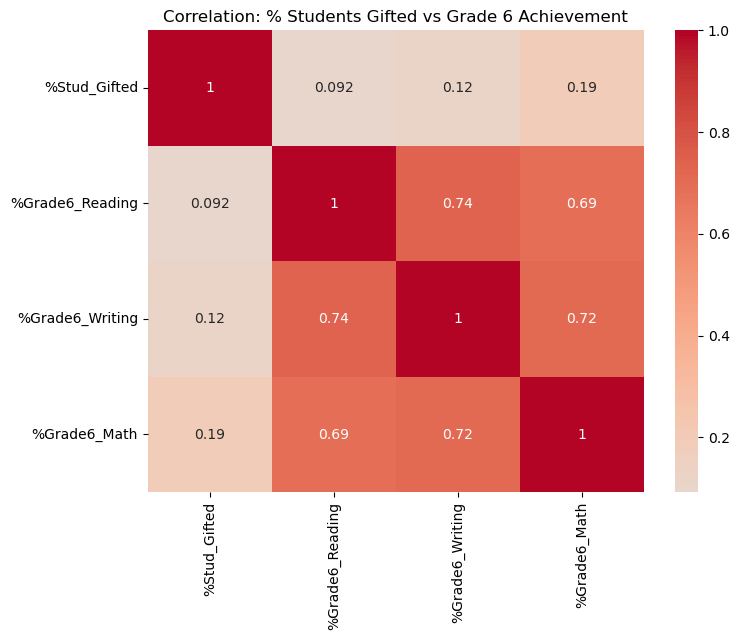

In [2544]:
#plotting heat map
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,          
    cmap='coolwarm',     
    center=0             
)
plt.title("Correlation: % Students Gifted vs Grade 6 Achievement")

* Based on the above, there is weak positive correlation between the Percentage of Students who are gifted and Grade 6 achievement values, although stronger than the relationship with grade 3 achievement values. But there seems to be a strong positive correlation between the achievement values themselves. Now, let's look at the results for higher grades. 

In [2545]:
temp = df.copy()
performance_cols = [
    '%Grade9_Math',
    '%Grade10_OSSLT' 
]
temp[['%Stud_Gifted'] + performance_cols] = temp[['%Stud_Gifted'] + performance_cols].apply(pd.to_numeric, errors="coerce")
corr_matrix = temp[['%Stud_Gifted'] + performance_cols].corr()
corr_matrix

%Stud_Gifted  %Grade9_Math  %Grade10_OSSLT
%Stud_Gifted        1.000000      0.356701        0.185987
%Grade9_Math        0.356701      1.000000        0.686573
%Grade10_OSSLT      0.185987      0.686573        1.000000

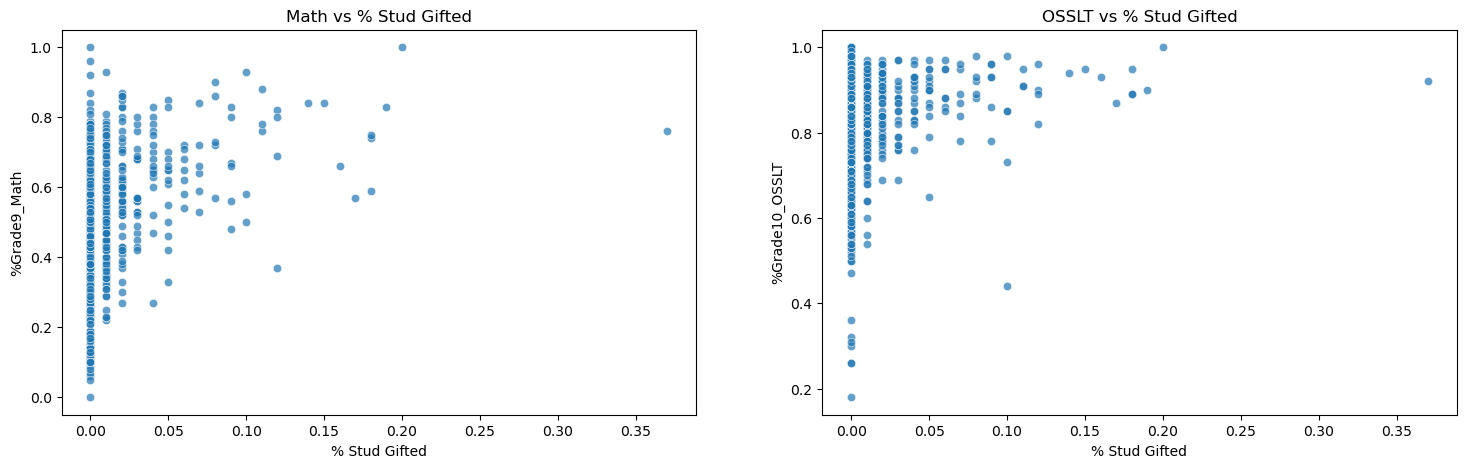

In [2546]:
#plotting scatter
fig, axes = plt.subplots(1, 2, figsize=(18,5), sharex=True, sharey=False)

for ax, y_col in zip(axes, performance_cols):
    sns.scatterplot(
        data=temp,
        x='%Stud_Gifted',
        y=y_col,
        alpha=0.7,
        ax=ax
    )
    ax.set_title(f"{y_col.split('_')[-1]} vs % Stud Gifted")
    ax.set_xlabel("% Stud Gifted")

Text(0.5, 1.0, 'Correlation: % Students Gifted vs Grade 9 and 10 Achievement')

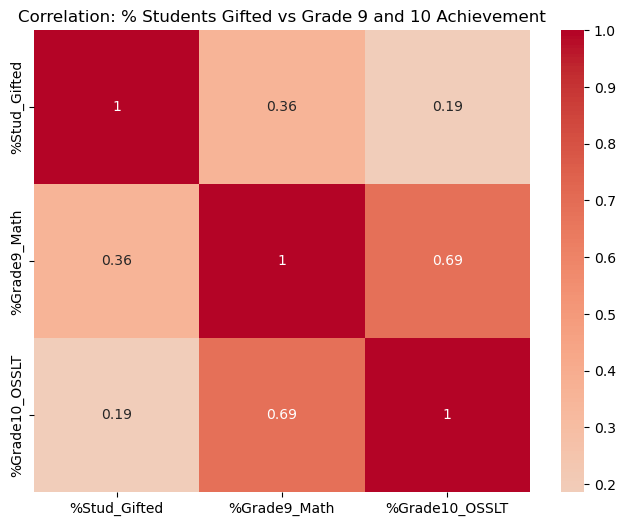

In [2547]:
#plotting heat map
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,          
    cmap='coolwarm',     
    center=0             
)
plt.title("Correlation: % Students Gifted vs Grade 9 and 10 Achievement")

* There is a weak positive correlation between Percentage of Students who are gifted and Grade 10 achievement value, but a moderate positive correlation between Percentage of Students who are gifted and Grade 9 math achievement value. But there seems to be a strong positive correlation between the achievement values themselves.

#### In summary:
* There is a positive correlation between Percentage of Students who are gifted and achievement values, starting with being very weak to becoming weak and moderate as the grades increase.
* There seems to be a strong positive correlation between the achievement values themselves.

## 2.5
* The next thing we want to look at is a comparison of performance based on student enrolment.

## 2.5 a) Assign size category to School Using Enrolment

In [2548]:
df['Enrolment'].describe() #to view stats for category markers

count    4707.00000
mean      439.06416
std       316.97690
min         7.00000
25%       230.00000
50%       360.00000
75%       545.00000
max      2695.00000
Name: Enrolment, dtype: float64

In [2549]:
#function to assign school a size category
def cat_enrolment(enrolment):
    if enrolment <= 400:
        return "Small"
    elif enrolment <= 800:
        return "Medium"
    else:
        return "Large"

df["School_Size"] = df["Enrolment"].apply(cat_enrolment)
df["School_Size"].head(10)

0     Small
1     Small
2     Small
3     Small
4    Medium
5     Small
6     Small
7     Small
8     Small
9     Small
Name: School_Size, dtype: object

In [2550]:
df['School_Size'].value_counts() #to see number in each category

School_Size
Small     2697
Medium    1539
Large      471
Name: count, dtype: int64

## 2.5 b) Academic Performance Analysis

In [2551]:
# Now group by School_Size and compute the mean for grade 3 achievement values
cols = [
    '%Grade3_Reading',
    '%Grade3_Writing',
    '%Grade3_Math'
]

temp = df.copy()
temp[cols] = temp[cols].apply(pd.to_numeric, errors="coerce")

Avg_grade3_School_Size = temp.groupby('School_Size')[cols].mean()

Avg_grade3_School_Size

%Grade3_Reading  %Grade3_Writing  %Grade3_Math
School_Size                                                
Large               0.709722         0.646944      0.635694
Medium              0.721362         0.647341      0.629624
Small               0.712925         0.619245      0.602977

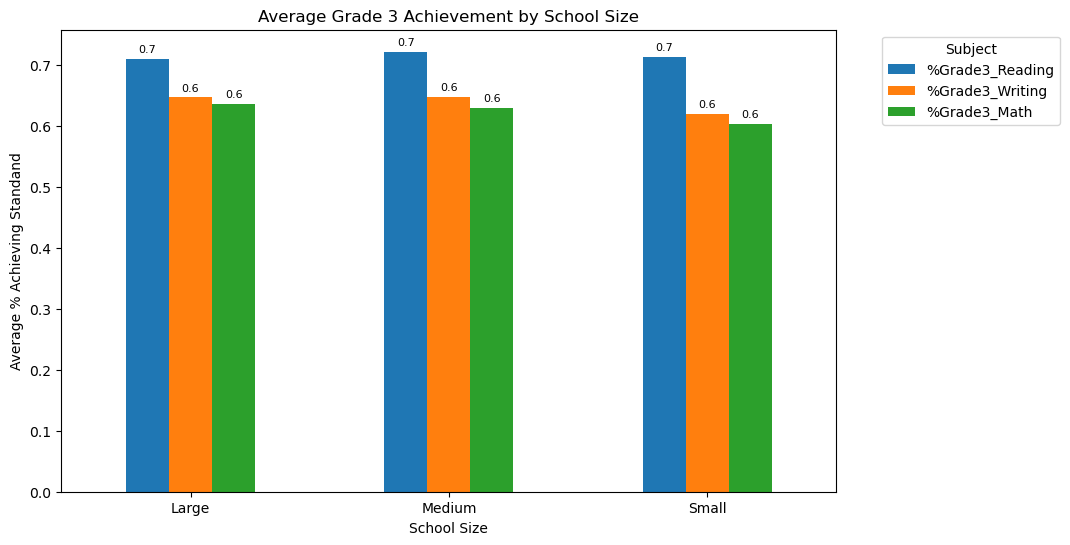

In [2552]:
#plotting results
ax = Avg_grade3_School_Size.plot(kind='bar', figsize=(10,6))

plt.title('Average Grade 3 Achievement by School Size')
plt.xlabel('School Size')
plt.ylabel('Average % Achieving Standand')
plt.xticks(rotation=0)
plt.legend(title='Subject', bbox_to_anchor=(1.05, 1))
# --- Add value labels on each bar ---
for container in ax.containers:
    # Add labels only for non-empty bars
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=8, padding=3)

* Regardless of size, schools seem to have similar Grade 3 achievement values. Now, let's see if it's the same for higher grades.

In [2553]:
# Now group by School_Size and compute the mean for grade 6 achievement values
cols = [
    '%Grade6_Reading',
    '%Grade6_Writing',
    '%Grade6_Math',
]

temp = df.copy()
temp[cols] = temp[cols].apply(pd.to_numeric, errors="coerce")

Avg_grade6_School_Size = temp.groupby('School_Size')[cols].mean()

Avg_grade6_School_Size

%Grade6_Reading  %Grade6_Writing  %Grade6_Math
School_Size                                                
Large               0.835270         0.834595      0.535000
Medium              0.829523         0.812891      0.519352
Small               0.824820         0.779005      0.467174

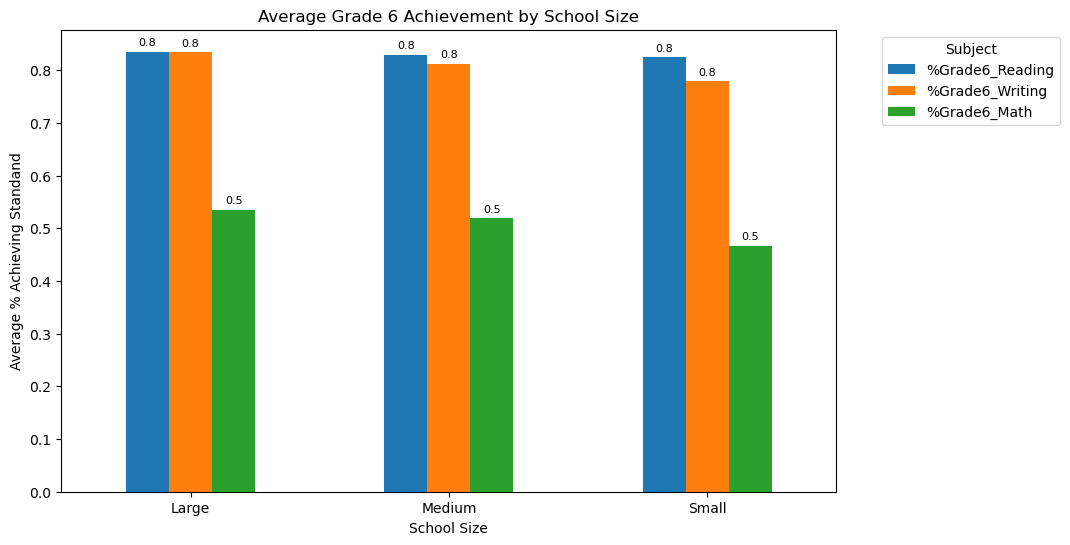

In [2554]:
ax = Avg_grade6_School_Size.plot(kind='bar', figsize=(10,6))

plt.title('Average Grade 6 Achievement by School Size')
plt.xlabel('School Size')
plt.ylabel('Average % Achieving Standand')
plt.xticks(rotation=0)
plt.legend(title='Subject', bbox_to_anchor=(1.05, 1))
# --- Add value labels on each bar ---
for container in ax.containers:
    # Add labels only for non-empty bars
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=8, padding=3)

* Regardless of size, schools seem to have similar Grade 6 achievement values, although it is notable here that there is slight increase in achievement values going from Small, Medium, to Large schools. Now, let's see if it's the same for higher grades.

In [2555]:
# Now group by School_Size and compute the mean for grade 9 and 10 achievement values
cols = [
    '%Grade9_Math',
    '%Grade10_OSSLT'
]

temp = df.copy()
temp[cols] = temp[cols].apply(pd.to_numeric, errors="coerce")

Avg_grade9_10_School_Size = temp.groupby('School_Size')[cols].mean()

Avg_grade9_10_School_Size

%Grade9_Math  %Grade10_OSSLT
School_Size                              
Large            0.553229        0.851781
Medium           0.451196        0.807059
Small            0.447367        0.805978

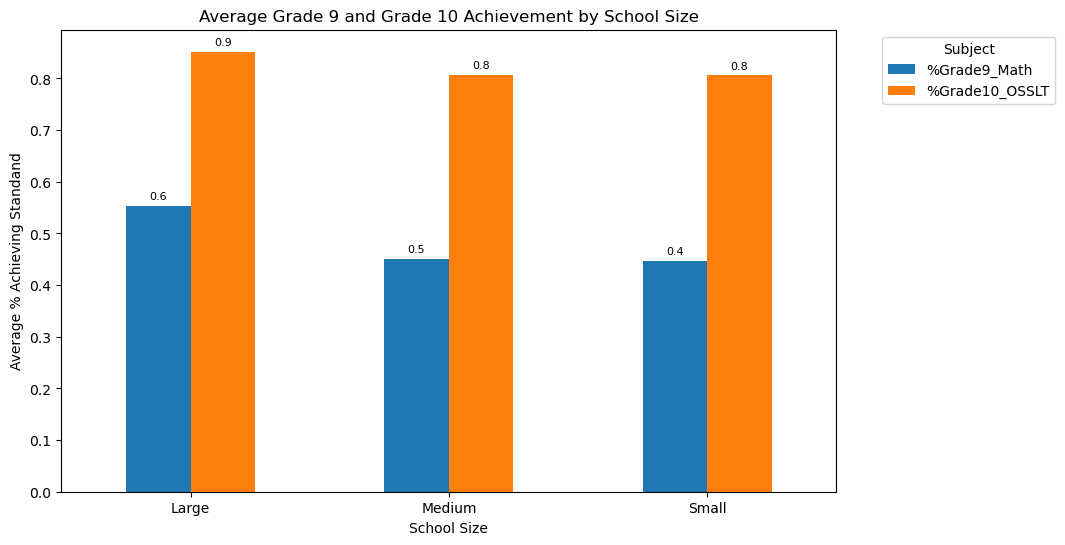

In [2556]:
ax = Avg_grade9_10_School_Size.plot(kind='bar', figsize=(10,6))

plt.title('Average Grade 9 and Grade 10 Achievement by School Size')
plt.xlabel('School Size')
plt.ylabel('Average % Achieving Standand')
plt.xticks(rotation=0)
plt.legend(title='Subject', bbox_to_anchor=(1.05, 1))
# --- Add value labels on each bar ---
for container in ax.containers:
    # Add labels only for non-empty bars
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=8, padding=3)

* Regardless of size, schools seem to have similar Grade 9 and 10 achievement values, although it is notable here that there is slight increase in achievement values going from Small, Medium, to Large schools. 

#### In summary:
* Regardless of size, schools seem to have similar achievement values, but it is notable that Grade, 6, 9, and 10 achievement values reflect slight increase in performance going from Small, Medium, to Large schools.

## 2.6
* The next thing we want to look at is if socio-economic background has an impact on achievement values.

## 2.6 a) Using 'Percent_School-Aged_Children_Live_in_Low-Income_Households'

In [2557]:
df.columns

Index(['Board_Number', 'Board_Name', 'Board_Type', 'School_Number',
       'School_Name', 'School_Type', 'School_Spec_Cond_Code', 'School_Level',
       'School_Lang', 'Grade_Range', 'Street', 'Municipality', 'City',
       'Province', 'Postal_Code', 'Phone_Number', 'Fax_Number',
       'School_Website', 'Board_Website', 'Enrolment', 'Latitude', 'Longitude',
       '%Stud_FirstLang_Not_Eng', '%Stud_FirstLang_Not_Fr',
       '%Stud_New_Canada_Non-Eng_Cntry', '%Stud_New_Canada_Non-Fr_Cntry',
       '%Stud_Special_Ed', '%Stud_Gifted', '%Grade3_Reading',
       'Change_G3_Read_3Yr', '%Grade3_Writing', 'Change_G3_Write_3Yr',
       '%Grade3_Math', 'Change_G3_Math_3Yr', '%Grade6_Reading',
       'Change_G6_Read_3Yr', '%Grade6_Writing', 'Change_G6_Write_3Yr',
       '%Grade6_Math', 'Change_G6_Math_3Yr', '%Grade9_Math',
       'Change_G9_Math_3Yr', '%Grade10_OSSLT', 'Change_G10_OSSLT_3Yr',
       '%Child_Livein_LowInc_HH', '%Stud_Par_NoDegDipCert', 'Extract_Date',
       'Urban_Rural', 'Spec_S

In [2558]:
performance_cols = [
    '%Grade3_Reading',
    '%Grade3_Writing',
    '%Grade3_Math',
    '%Grade6_Reading',
    '%Grade6_Writing',
    '%Grade6_Math',
    '%Grade9_Math',
    '%Grade10_OSSLT'
]
df[['%Child_Livein_LowInc_HH'] + performance_cols] = df[['%Child_Livein_LowInc_HH'] + performance_cols].apply(pd.to_numeric, errors='coerce')
corr_matrix = df[['%Child_Livein_LowInc_HH'] + performance_cols].corr()
corr_with_low_income = corr_matrix['%Child_Livein_LowInc_HH'][performance_cols]
corr_with_low_income


%Grade3_Reading   -0.292776
%Grade3_Writing   -0.258200
%Grade3_Math      -0.314482
%Grade6_Reading   -0.302273
%Grade6_Writing   -0.259974
%Grade6_Math      -0.270674
%Grade9_Math      -0.233539
%Grade10_OSSLT    -0.333776
Name: %Child_Livein_LowInc_HH, dtype: float64

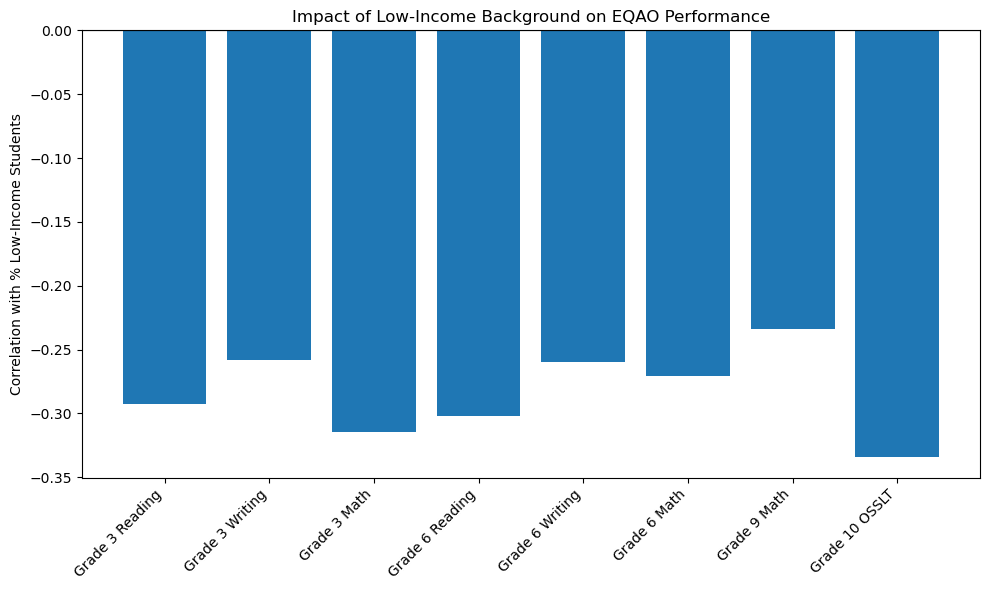

In [2559]:
#plotting
correlations = { # copied correlation results from output above
    'Grade 3 Reading': -0.292776,
    'Grade 3 Writing': -0.258200,
    'Grade 3 Math': -0.314482,
    'Grade 6 Reading': -0.302273,
    'Grade 6 Writing': -0.259974,
    'Grade 6 Math': -0.270674,
    'Grade 9 Math': -0.233539,
    'Grade 10 OSSLT': -0.333776
}

# Create bar chart
plt.figure(figsize=(10,6))
plt.bar(correlations.keys(), correlations.values())
plt.xticks(rotation=45, ha="right")
plt.ylabel("Correlation with % Low-Income Students")
plt.title("Impact of Low-Income Background on EQAO Performance")
plt.axhline(0, color="black", linewidth=0.8)  # baseline at 0
plt.tight_layout()

* Across all grade levels (3, 6, 9, and 10), the correlations are weak and negative (as the percentage of students from low-income households increases, the percentage of students meeting EQAO provincial standards decreases weakly), so there is some impact but not much, but it is more substantial than earlier correlations that we have seen. 

## 2.6 b) Using 'Percent_Stud_Parents_No_Degree_Diploma_or_Certificate'

In [2560]:
performance_cols = [
    '%Grade3_Reading',
    '%Grade3_Writing',
    '%Grade3_Math',
    '%Grade6_Reading',
    '%Grade6_Writing',
    '%Grade6_Math',
    '%Grade9_Math',
    '%Grade10_OSSLT'
]

df[['%Stud_Par_NoDegDipCert'] + performance_cols] = \
    df[['%Stud_Par_NoDegDipCert'] + performance_cols].apply(pd.to_numeric, errors='coerce')

corr_parent_edu = df[performance_cols + ['%Stud_Par_NoDegDipCert']].corr()['%Stud_Par_NoDegDipCert'].drop('%Stud_Par_NoDegDipCert')

corr_parent_edu

%Grade3_Reading   -0.268180
%Grade3_Writing   -0.235477
%Grade3_Math      -0.288777
%Grade6_Reading   -0.262136
%Grade6_Writing   -0.201215
%Grade6_Math      -0.247006
%Grade9_Math      -0.288877
%Grade10_OSSLT    -0.320093
Name: %Stud_Par_NoDegDipCert, dtype: float64

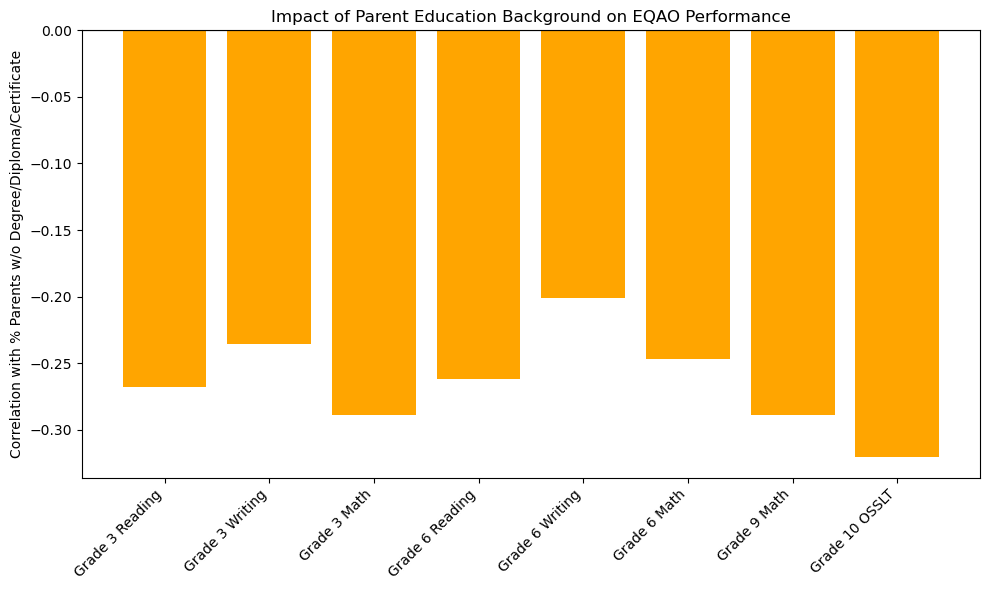

In [2561]:
#plotting
correlations = { # copied correlation results from output above
    'Grade 3 Reading': -0.268180,
    'Grade 3 Writing': -0.235477,
    'Grade 3 Math': -0.288777,
    'Grade 6 Reading': -0.262136,
    'Grade 6 Writing': -0.201215,
    'Grade 6 Math': -0.247006,
    'Grade 9 Math': -0.288877,
    'Grade 10 OSSLT': -0.320093
}
# create bar chart
plt.figure(figsize=(10,6))
plt.bar(correlations.keys(), correlations.values(), color="orange")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Correlation with % Parents w/o Degree/Diploma/Certificate")
plt.title("Impact of Parent Education Background on EQAO Performance")
plt.axhline(0, color="black", linewidth=0.8)
plt.tight_layout()

* Across all grade levels (3, 6, 9, and 10), the correlations are weak and negative (as the percentage of students whose parents have no degree, diploma, or certificate increases, the percentage of students meeting EQAO provincial standards decreases weakly), so there is some impact but not much, but again it is more substantial than earlier correlations that we have seen. 

## 2.6 c) Combining Socio-Economic Factors

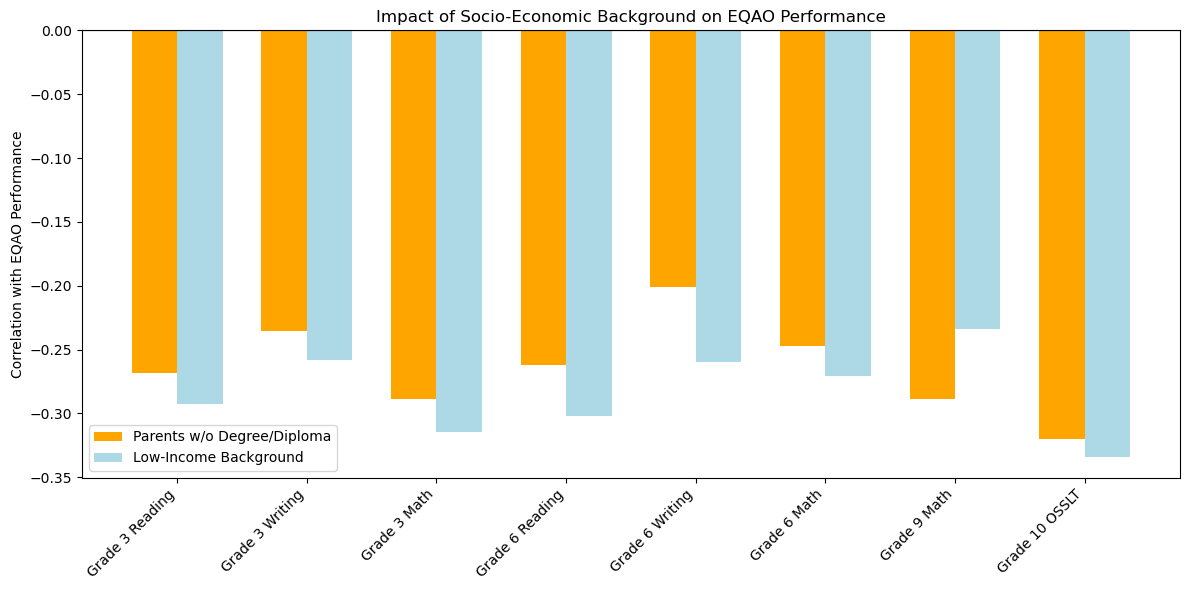

In [2562]:
#two sets of correlations
parent_ed = {
    'Grade 3 Reading': -0.268180,
    'Grade 3 Writing': -0.235477,
    'Grade 3 Math': -0.288777,
    'Grade 6 Reading': -0.262136,
    'Grade 6 Writing': -0.201215,
    'Grade 6 Math': -0.247006,
    'Grade 9 Math': -0.288877,
    'Grade 10 OSSLT': -0.320093
}

low_income = {
    'Grade 3 Reading': -0.292776,
    'Grade 3 Writing': -0.258200,
    'Grade 3 Math': -0.314482,
    'Grade 6 Reading': -0.302273,
    'Grade 6 Writing': -0.259974,
    'Grade 6 Math': -0.270674,
    'Grade 9 Math': -0.233539,
    'Grade 10 OSSLT': -0.333776
}

# Labels
ach_vals = list(parent_ed.keys())
x = np.arange(len(ach_vals))  # positions

# Bar width
width = 0.35  

plt.figure(figsize=(12,6))

# Bars for both categories
plt.bar(x - width/2, parent_ed.values(), width, label="Parents w/o Degree/Diploma", color="orange")
plt.bar(x + width/2, low_income.values(), width, label="Low-Income Background", color="lightblue")

# Formatting
plt.xticks(x, ach_vals, rotation=45, ha="right")
plt.axhline(0, color="black", linewidth=0.8)
plt.ylabel("Correlation with EQAO Performance")
plt.title("Impact of Socio-Economic Background on EQAO Performance")
plt.legend()
plt.tight_layout()


* Parents w/o Degree/Diploma appears to have greater impact than Low-Income Background on achievement values.

## 2.7
* The last thing we want to look at is if schools with Low-Income Background have improved over time

## 2.7 a) Assign Low Income Number category to School Using Percent_School-Aged_Children_Live_in_Low-Income_Households

In [2563]:
df['%Child_Livein_LowInc_HH'].describe() #to view stats for category markers

count    4696.000000
mean        0.092368
std         0.060620
min         0.000000
25%         0.050000
50%         0.100000
75%         0.100000
max         0.500000
Name: %Child_Livein_LowInc_HH, dtype: float64

In [2564]:
#function to assign school a Low Income Number category
def cat_low_income(low_income):
    if low_income <= 0.05:
        return "Low"
    elif low_income <= 0.1:
        return "Average"
    else:
        return "High"

df["Low_Income_Num"] = df["%Child_Livein_LowInc_HH"].apply(cat_low_income)
df["Low_Income_Num"].head(10)

0       High
1        Low
2       High
3       High
4    Average
5    Average
6       High
7    Average
8       High
9        Low
Name: Low_Income_Num, dtype: object

In [2565]:
df["Low_Income_Num"].value_counts() #to see number in each category

Low_Income_Num
Average    1955
Low        1600
High       1152
Name: count, dtype: int64

## 2.7 b) Academic Performance Analysis

In [2566]:
df.columns #to get column names

Index(['Board_Number', 'Board_Name', 'Board_Type', 'School_Number',
       'School_Name', 'School_Type', 'School_Spec_Cond_Code', 'School_Level',
       'School_Lang', 'Grade_Range', 'Street', 'Municipality', 'City',
       'Province', 'Postal_Code', 'Phone_Number', 'Fax_Number',
       'School_Website', 'Board_Website', 'Enrolment', 'Latitude', 'Longitude',
       '%Stud_FirstLang_Not_Eng', '%Stud_FirstLang_Not_Fr',
       '%Stud_New_Canada_Non-Eng_Cntry', '%Stud_New_Canada_Non-Fr_Cntry',
       '%Stud_Special_Ed', '%Stud_Gifted', '%Grade3_Reading',
       'Change_G3_Read_3Yr', '%Grade3_Writing', 'Change_G3_Write_3Yr',
       '%Grade3_Math', 'Change_G3_Math_3Yr', '%Grade6_Reading',
       'Change_G6_Read_3Yr', '%Grade6_Writing', 'Change_G6_Write_3Yr',
       '%Grade6_Math', 'Change_G6_Math_3Yr', '%Grade9_Math',
       'Change_G9_Math_3Yr', '%Grade10_OSSLT', 'Change_G10_OSSLT_3Yr',
       '%Child_Livein_LowInc_HH', '%Stud_Par_NoDegDipCert', 'Extract_Date',
       'Urban_Rural', 'Spec_S

In [2567]:
# Now group by Low_Income_Num and compute the mean for all achievement values
cols = [
    'Change_G3_Read_3Yr',
    'Change_G3_Write_3Yr',
    'Change_G3_Math_3Yr',
    'Change_G6_Read_3Yr',
    'Change_G6_Write_3Yr',
    'Change_G6_Math_3Yr',
    'Change_G9_Math_3Yr',
    'Change_G10_OSSLT_3Yr'
]

temp = df.copy()
temp[cols] = temp[cols].apply(pd.to_numeric, errors="coerce")

Avg_Low_Income_Num = temp.groupby('Low_Income_Num')[cols].mean()

Avg_Low_Income_Num

Change_G3_Read_3Yr  Change_G3_Write_3Yr  Change_G3_Math_3Yr  \
Low_Income_Num                                                                
Average                  -1.555057            -1.311107            2.684128   
High                     -1.003293            -0.323540            3.536110   
Low                      -0.675239            -0.364219            3.571349   

                Change_G6_Read_3Yr  Change_G6_Write_3Yr  Change_G6_Math_3Yr  \
Low_Income_Num                                                                
Average                  -2.509393            -3.180725            3.931385   
High                     -2.727271            -3.635105            2.886795   
Low                      -2.142172            -3.402726            4.053049   

                Change_G9_Math_3Yr  Change_G10_OSSLT_3Yr  
Low_Income_Num                                            
Average                   2.612500              3.207157  
High                      3.280632              3.060769  
Low                       4.441860              2.135985

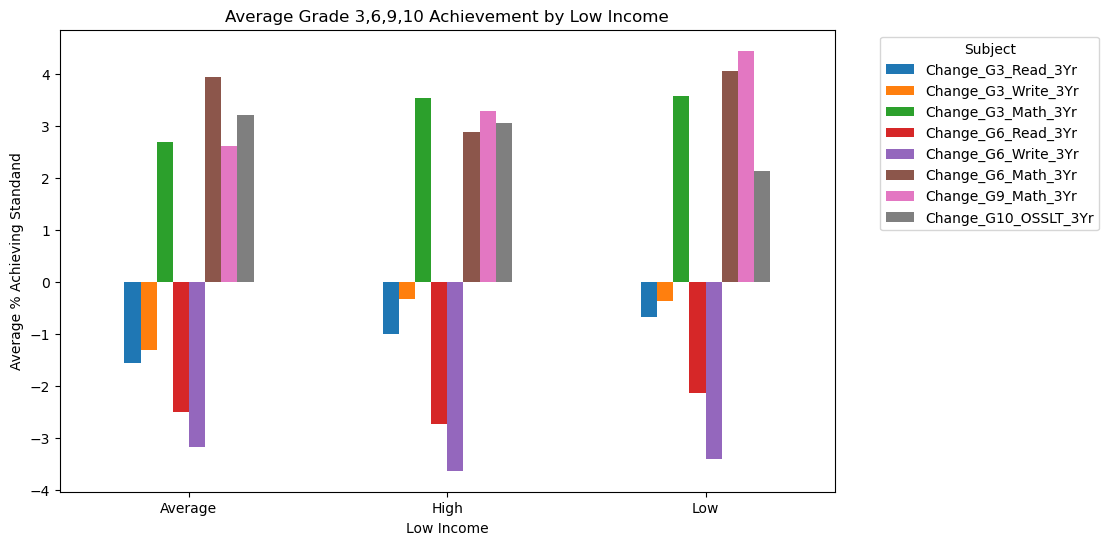

In [2568]:
Avg_Low_Income_Num.plot(kind='bar', figsize=(10,6))

plt.title('Average Grade 3,6,9,10 Achievement by Low Income')
plt.xlabel('Low Income')
plt.ylabel('Average % Achieving Standand')
plt.xticks(rotation=0)
plt.legend(title='Subject', bbox_to_anchor=(1.05, 1))

* Average and High low income numbers had greater negative change in Grade 3 reading over 3 years, average low income numbers had greatest negative change in grade 3 writing over 3 years, average low income numbers had lowest positive change in grade 3 math over 3 years. High low income numbers had greatest negative change in Grade 6 Reading and Writing over 3 years and lowest positive change in Grade 6 math over 3 years. Average low income numbers had lowest positive change in grade 9 math over 3 years. And low low income numbers had lowest positive change in grade 10 OSSLT over 3 years.
* We can also see that there is negative change in Grades 3 and 6 reading and writing, but positive change in Grades 3, 6, and 9 math and Grade 10 OSSLT, so the Ontario Ministry of Education might want to address that. 


# Final Conclusion 

## Data Cleaning and Preprocessing
* To make analysis easier and avoid syntax issues in Python, spaces were replaced with underscores, and names were shortened, using df.rename(columns={},inplace=True)
* To understand our data better, we looked at all the unique values in each column.
* While checking unique values, we noticed that the Enrolment column contains the value "SP". According to https://www.app.edu.gov.on.ca/eng/sift/glossary.asp, "SP" represents small populations, typically between 1 and 49 students. To handle this, we replaced "SP" with a random number between 1 and 49 so that the column remains numeric and usable for analysis.
* Next, we focused on columns 24–47, which contain information that was sometimes not reported or not available. These columns may have values like "SP", "NA", "N/R", "N/D", or Null. According to https://www.app.edu.gov.on.ca/eng/sift/glossary.asp, these values indicate data not provided or suppressed for privacy or other reasons. Since this information cannot be used for analysis, we decided to remove rows that contained these values for all the achievement values columns.
* We noticed that many percentage columns still contained values as strings (like "75%") or numbers greater than 1 (e.g., 75 instead of 0.75). To standardize these columns for analysis, we converted all percentages to decimal format.
* To optimize memory usage and improve performance, we converted certain columns to more suitable data types.
* Categorical Conversion – Columns with repeated text values, such as school type, board type, province, municipality, and city, were converted to the category data type. This reduces memory usage and improves performance when analyzing repeated text values.
* Numeric Conversion – Columns containing numeric values, such as Latitude, Longitude, and Enrolment, were converted to numeric types. This ensures calculations, mapping, and analysis can be performed correctly.
* Some columns, particularly percentage columns, still contain special values such as "NA", “SP”, “N/D”, "N/R". To prepare the data for analysis, we converted these columns to numeric where possible, while keeping the special values unchanged using errors=’ignore’ in pd.to_numeric. This allows calculations, summaries, and visualizations on numeric values, without altering placeholders for missing or suppressed data, which can provide a meaningful and more detailed explanation for anyone inspecting the data, as each designation has its reasoning as indicated in https://www.app.edu.gov.on.ca/eng/sift/glossary.asp.
* Building_Suite (4,908) and PO_Box (4,831) – Dropped with df.drop because they have excessive missing values that are not essential for analysis. They really are just providing additional address info that will not be needed.
* Phone_Number (163) – Since the dataset covers only Ontario publicly funded schools,we filled missing phone numbers, using fillna, with the Ontario Ministry of Education's general contact number: 416-325-2929, assuming that callers will be redirected appropriately.
* Fax_Number (356) – We are adopting a similar approach as above and filling the missing fax numbers with the general fax number of the Ontario Ministry of Education: 416-325-2929. Although fax communication is more specialized - often used to send official or sensitive documents, we are making a reasonable assumption that the Ministry's main office can redirect incoming faxes to the appropriate school or department if needed.
* School_Website (101) – Filled missing URLs with https://www.ontario.ca/page/find-your-school (Ontario “Find Your School” page).
* We did imputation: filled missing values for schools that include the grade in their Grade_Range based on the data distribution using sns.histplot: Right-skewed or left-skewed distributions – used the median to fill missing values. Approximately normal distributions – used the mean to fill missing values.

## EQAO Performance Analysis

##### Our analysis explored multiple student and school background factors to see how they affect EQAO performance across Grades 3, 6, 9, and 10.

#### 1.1 Rural vs Urban
* To classify schools, we used the Municipality column and feature engineered a column Urban_Rural.
* For all grades, urban and rural schools seem to have similar achievement values, just that urban schools are slightly better. 

#### 1.2 Urban/Rural and School Type
* For all grades, Catholic schools perform better than Public schools in EQAO achievement values, although only slightly so again.

#### 1.3 General
* For Grade 3 achievement values, a lower percentage of students met the standard for writing and math. And for Grade 6 achievement values, a way lower percentage of students met the standard for just math. Moreover, a higher percentage of students met the standard for reading. And the Grade 9 achievement values also show a low percentage of students met the standard for math. So, there was major improvement in reading and writing between Grade 3 and 6 so that could be due to development of the kids or perhaps it indicates a higher quality of teachers in higher grades. And perhaps the math content got more difficult. 

#### 2.1 Language Background
* For all grades, French schools perform better than English schools, although only slightly so, except for Grade 6 reading where it was more significant.
* There is a very weak correlation between Percentage of Students whose First Language is not English and Grade 3 and 6 achievement values. Although with grade 6 achievement values, the correlation between the writing and math achievement values and the Percentage of Students whose First Language is not English is similar and markedly stronger than the correlation between the reading achievement value and the Percentage of Students whose First Language is not English.
* There is a weak positive correlation between Percentage of Students whose First Language is not English and Grade 9 and 10 achievement values, although more significant, so we can say that there is more of an impact in higher grades.
* There is a very weak correlation between Percentage of Students whose First Language is not French and Grade 3 and 6 achievement values, with the exception of the Grade 6 math achievement values. Moreover, with grade 3 achievement values, the correlation between the writing and math achievement values and the Percentage of Students whose First Language is not French is similar and markedly stronger than the correlation between the reading achievement values and the Percentage of Students whose First Language is not French.
* There is a weak positive, but more significant, correlation between Percentage of Students whose First Language is not French and Grade 9 and 10 achievement values, so we can say that there is more of an impact in higher grades.
* There is a very weak negative correlation between Percentage of Students New to Canada from Non-English Countries and Grade 3, 6, 9 and 10 achievement values.
* There is weak positive correlation between the Percentage of Students New to Canada from Non-French Country and Grade 3 and 6 achievement values, but there is very weak negative correlation between the Percentage of Students New to Canada from Non-French Country and Grade 9 and 10 achievement values. So it looks like there is more of an effect in French schools for younger grades.

#### 2.2 General
* There is moderate to strong correlation between the achievement values themselves.

#### 3.1 Special Education Identity
* We feature engineered a new column called Spec_School_Identity using the column School_Spec_Cond_Code.
* For grades 3 and 6, Special and non-Special schools show very similar achievement values. However, special schools perform slightly higher, which is not expected.
* For grades 9 and 10, it is the reverse, Special and non-Special schools show very similar achievement values, but non special schools perform slightly higher.

#### 3.2 Percent Receiving Special Education
* There is a negative correlation between Percentage of Students who receive special ed and achievement values, starting with being weak to becoming moderate as the grades increase.
* So we can see that classification based on Spec_School_Identity was not sufficient.

#### 4 Student Giftedness 
* There is a positive correlation between Percentage of Students who are gifted and achievement values, starting with being very weak to becoming weak and moderate as the grades increase.

#### 5 Student Enrolment
* We feature engineered a new column, School_Size, using the column enrolment, doing binning.
* Regardless of size, schools seem to have similar achievement values, but it is notable that Grade, 6, 9, and 10 achievement values reflect slight increase in performance going from Small, Medium, to Large schools, which is contrary to the expectation that smaller class ratios would perform better.

#### 6. Socio-Economic Background
* Across all grades, the correlations are weak and negative, meaning that as the percentage of low-income students and parents without higher education increases, the percentage of students meeting provincial standards slightly decreases, but note that the correlations are more substantial than earlier ones that we have seen. 
* Parental obtainment of higher education played more of a role.

#### 7.1 Low-Income Background
* We feature engineered a new column, Low_Income_Num, using Percent_School-Aged_Children_Live_in_Low-Income_Households, doing binning.
* Average low income numbers did worst in grade 3 achievement valuess. High low income numbers did worst in grade 6 achievement values. Average low income numbers had lowest positive change in grade 9 math over 3 years. And low low income numbers had lowest positive change in grade 10 OSSLT over 3 years.

#### 7.2 General
* We see that there is negative change in Grades 3 and 6 reading and writing over 3 years, but positive change in Grades 3, 6, and 9 math and Grade 10 OSSLT over 3 years, so the Ontario Ministry of Education might want to address that. 

## Columns Not Used for Analysis
* We didn't use Board Number and Board Name because there are a lot of unique values, and we wouldn't be able to look at graphs using them properly.
* We didn't use Board Type because it is similar to School Type, which we used.
* We didn't use School Number and School Name because it is just a form of identifying schools.
* We didn't use school level because we used grade range, and grade range is more specific.
* We didn't use Street, City and Postal Code because we used Municipality and that was sufficient in doing analysis based on location. Also Province is all Ontario so it doesn't tell much for analysis.
* We didn't use Phone Number, Fax Number, School Website, and Board Website because it is just contact information.
* We considered using Latitude and Longitude, but ended up not doing so because we felt like we had done sufficient analysis based on location.